In [1]:
#import necessary modules
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import dataframe_image as dfi
import sqlite3
from pandasql import sqldf

sqlit = lambda q: sqldf(q, globals())

In [2]:
conn = sqlite3.connect('pdga.sqlite')
players_events_df = pd.read_sql_query("SELECT * FROM players_events", conn)

# ---
# Adding Preliminary Player Data

## Calling MPO Websites

and adding output to local html files.

Once the files were formed, commented out the calls.

In [3]:

# MPO1 = requests.get('https://www.pdga.com/players/stats?Year=2021&player_Class=1&Gender=Male&Bracket=MPO&continent=All&Country=All&StateProv=All')
# MPO2 = requests.get('https://www.pdga.com/players/stats?Year=2021&player_Class=1&Gender=Male&Bracket=MPO&continent=All&Country=All&StateProv=All&page=1')
# MPO3 = requests.get('https://www.pdga.com/players/stats?Year=2021&player_Class=1&Gender=Male&Bracket=MPO&continent=All&Country=All&StateProv=All&page=2')
# MPO4 = requests.get('https://www.pdga.com/players/stats?Year=2021&player_Class=1&Gender=Male&Bracket=MPO&continent=All&Country=All&StateProv=All&page=3')
# MPO5 = requests.get('https://www.pdga.com/players/stats?Year=2021&player_Class=1&Gender=Male&Bracket=MPO&continent=All&Country=All&StateProv=All&page=4')

# with open("MPO1.html", "w") as f:
#     f.write(MPO1.text)
# with open("MPO2.html", "w") as f:
#     f.write(MPO2.text)
# with open("MPO3.html", "w") as f:
#     f.write(MPO3.text)
# with open("MPO4.html", "w") as f:
#     f.write(MPO4.text)
# with open("MPO5.html", "w") as f:
#     f.write(MPO5.text)

In [4]:

# MPO6 = requests.get('https://www.pdga.com/players/stats?Year=2021&player_Class=1&Gender=Male&Bracket=MPO&continent=All&Country=All&StateProv=All&page=5')
# MPO7 = requests.get('https://www.pdga.com/players/stats?Year=2021&player_Class=1&Gender=Male&Bracket=MPO&continent=All&Country=All&StateProv=All&page=6')
# MPO8 = requests.get('https://www.pdga.com/players/stats?Year=2021&player_Class=1&Gender=Male&Bracket=MPO&continent=All&Country=All&StateProv=All&page=7')
# MPO9 = requests.get('https://www.pdga.com/players/stats?Year=2021&player_Class=1&Gender=Male&Bracket=MPO&continent=All&Country=All&StateProv=All&page=8')
# MPO10 = requests.get('https://www.pdga.com/players/stats?Year=2021&player_Class=1&Gender=Male&Bracket=MPO&continent=All&Country=All&StateProv=All&page=9')

# with open("MPO6.html", "w") as f:
#     f.write(MPO6.text)
# with open("MPO7.html", "w") as f:
#     f.write(MPO7.text)
# with open("MPO8.html", "w") as f:
#     f.write(MPO8.text)
# with open("MPO9.html", "w") as f:
#     f.write(MPO9.text)
# with open("MPO10.html", "w") as f:
#     f.write(MPO10.text)
    

In [5]:

# MPO11 = requests.get('https://www.pdga.com/players/stats?Year=2021&player_Class=1&Gender=Male&Bracket=MPO&continent=All&Country=All&StateProv=All&page=10')
# MPO12 = requests.get('https://www.pdga.com/players/stats?Year=2021&player_Class=1&Gender=Male&Bracket=MPO&continent=All&Country=All&StateProv=All&page=11')
# MPO13 = requests.get('https://www.pdga.com/players/stats?Year=2021&player_Class=1&Gender=Male&Bracket=MPO&continent=All&Country=All&StateProv=All&page=12')
# MPO14 = requests.get('https://www.pdga.com/players/stats?Year=2021&player_Class=1&Gender=Male&Bracket=MPO&continent=All&Country=All&StateProv=All&page=13')
# MPO15 = requests.get('https://www.pdga.com/players/stats?Year=2021&player_Class=1&Gender=Male&Bracket=MPO&continent=All&Country=All&StateProv=All&page=14')

# with open("MPO11.html", "w") as f:
#     f.write(MPO11.text)
# with open("MPO12.html", "w") as f:
#     f.write(MPO12.text)
# with open("MPO13.html", "w") as f:
#     f.write(MPO13.text)
# with open("MPO14.html", "w") as f:
#     f.write(MPO14.text)
# with open("MPO15.html", "w") as f:
#     f.write(MPO15.text)

In [6]:

# MPO16 = requests.get('https://www.pdga.com/players/stats?Year=2021&player_Class=1&Gender=Male&Bracket=MPO&continent=All&Country=All&StateProv=All&page=15')
# MPO17 = requests.get('https://www.pdga.com/players/stats?Year=2021&player_Class=1&Gender=Male&Bracket=MPO&continent=All&Country=All&StateProv=All&page=16')
# MPO18 = requests.get('https://www.pdga.com/players/stats?Year=2021&player_Class=1&Gender=Male&Bracket=MPO&continent=All&Country=All&StateProv=All&page=17')
# MPO19 = requests.get('https://www.pdga.com/players/stats?Year=2021&player_Class=1&Gender=Male&Bracket=MPO&continent=All&Country=All&StateProv=All&page=18')
# MPO20 = requests.get('https://www.pdga.com/players/stats?Year=2021&player_Class=1&Gender=Male&Bracket=MPO&continent=All&Country=All&StateProv=All&page=19')

# with open("MPO16.html", "w") as f:
#     f.write(MPO16.text)
# with open("MPO17.html", "w") as f:
#     f.write(MPO17.text)
# with open("MPO18.html", "w") as f:
#     f.write(MPO18.text)
# with open("MPO19.html", "w") as f:
#     f.write(MPO19.text)
# with open("MPO20.html", "w") as f:
#     f.write(MPO20.text)
    

In [7]:

# MPO21 = requests.get('https://www.pdga.com/players/stats?Year=2021&player_Class=1&Gender=Male&Bracket=MPO&continent=All&Country=All&StateProv=All&page=20')
# MPO22 = requests.get('https://www.pdga.com/players/stats?Year=2021&player_Class=1&Gender=Male&Bracket=MPO&continent=All&Country=All&StateProv=All&page=21')
# MPO23 = requests.get('https://www.pdga.com/players/stats?Year=2021&player_Class=1&Gender=Male&Bracket=MPO&continent=All&Country=All&StateProv=All&page=22')
# MPO24 = requests.get('https://www.pdga.com/players/stats?Year=2021&player_Class=1&Gender=Male&Bracket=MPO&continent=All&Country=All&StateProv=All&page=23')
# MPO25 = requests.get('https://www.pdga.com/players/stats?Year=2021&player_Class=1&Gender=Male&Bracket=MPO&continent=All&Country=All&StateProv=All&page=24')

# with open("MPO21.html", "w") as f:
#     f.write(MPO21.text)
# with open("MPO22.html", "w") as f:
#     f.write(MPO22.text)
# with open("MPO23.html", "w") as f:
#     f.write(MPO23.text)
# with open("MPO24.html", "w") as f:
#     f.write(MPO24.text)
# with open("MPO25.html", "w") as f:
#     f.write(MPO25.text)
    

In [8]:

# MPO26 = requests.get('https://www.pdga.com/players/stats?Year=2021&player_Class=1&Gender=Male&Bracket=MPO&continent=All&Country=All&StateProv=All&page=25')
# MPO27 = requests.get('https://www.pdga.com/players/stats?Year=2021&player_Class=1&Gender=Male&Bracket=MPO&continent=All&Country=All&StateProv=All&page=26')
# MPO28 = requests.get('https://www.pdga.com/players/stats?Year=2021&player_Class=1&Gender=Male&Bracket=MPO&continent=All&Country=All&StateProv=All&page=27')
# MPO29 = requests.get('https://www.pdga.com/players/stats?Year=2021&player_Class=1&Gender=Male&Bracket=MPO&continent=All&Country=All&StateProv=All&page=28')
# MPO30 = requests.get('https://www.pdga.com/players/stats?Year=2021&player_Class=1&Gender=Male&Bracket=MPO&continent=All&Country=All&StateProv=All&page=29')

# with open("MPO26.html", "w") as f:
#     f.write(MPO26.text)
# with open("MPO27.html", "w") as f:
#     f.write(MPO27.text)
# with open("MPO28.html", "w") as f:
#     f.write(MPO28.text)
# with open("MPO29.html", "w") as f:
#     f.write(MPO29.text)
# with open("MPO30.html", "w") as f:
#     f.write(MPO30.text)

In [9]:

# MPO31 = requests.get('https://www.pdga.com/players/stats?Year=2021&player_Class=1&Gender=Male&Bracket=MPO&continent=All&Country=All&StateProv=All&page=30')
# MPO32 = requests.get('https://www.pdga.com/players/stats?Year=2021&player_Class=1&Gender=Male&Bracket=MPO&continent=All&Country=All&StateProv=All&page=31')
# MPO33 = requests.get('https://www.pdga.com/players/stats?Year=2021&player_Class=1&Gender=Male&Bracket=MPO&continent=All&Country=All&StateProv=All&page=32')
# MPO34 = requests.get('https://www.pdga.com/players/stats?Year=2021&player_Class=1&Gender=Male&Bracket=MPO&continent=All&Country=All&StateProv=All&page=33')
# MPO35 = requests.get('https://www.pdga.com/players/stats?Year=2021&player_Class=1&Gender=Male&Bracket=MPO&continent=All&Country=All&StateProv=All&page=34')

# with open("MPO31.html", "w") as f:
#     f.write(MPO31.text)
# with open("MPO32.html", "w") as f:
#     f.write(MPO32.text)
# with open("MPO33.html", "w") as f:
#     f.write(MPO33.text)
# with open("MPO34.html", "w") as f:
#     f.write(MPO34.text)
# with open("MPO35.html", "w") as f:
#     f.write(MPO35.text)
    

In [10]:

# FPO1 = requests.get('https://www.pdga.com/players/stats?Year=2021&player_Class=1&Gender=All&Bracket=FPO&continent=All&Country=All&StateProv=All')
# FPO2 = requests.get('https://www.pdga.com/players/stats?Year=2021&player_Class=1&Gender=All&Bracket=FPO&continent=All&Country=All&StateProv=All&page=1')
# FPO3 = requests.get('https://www.pdga.com/players/stats?Year=2021&player_Class=1&Gender=All&Bracket=FPO&continent=All&Country=All&StateProv=All&page=2')
# FPO4 = requests.get('https://www.pdga.com/players/stats?Year=2021&player_Class=1&Gender=All&Bracket=FPO&continent=All&Country=All&StateProv=All&page=3')
# FPO5 = requests.get('https://www.pdga.com/players/stats?Year=2021&player_Class=1&Gender=All&Bracket=FPO&continent=All&Country=All&StateProv=All&page=4')

# with open("FPO1.html", "w") as f:
#     f.write(FPO1.text)
# with open("FPO2.html", "w") as f:
#     f.write(FPO2.text)
# with open("FPO3.html", "w") as f:
#     f.write(FPO3.text)
# with open("FPO4.html", "w") as f:
#     f.write(FPO4.text)
# with open("FPO5.html", "w") as f:
#     f.write(FPO5.text)


In [11]:

# FPO6 = requests.get('https://www.pdga.com/players/stats?Year=2021&player_Class=1&Gender=All&Bracket=FPO&continent=All&Country=All&StateProv=All&page=5')
# FPO7 = requests.get('https://www.pdga.com/players/stats?Year=2021&player_Class=1&Gender=All&Bracket=FPO&continent=All&Country=All&StateProv=All&page=6')
# FPO8 = requests.get('https://www.pdga.com/players/stats?Year=2021&player_Class=1&Gender=All&Bracket=FPO&continent=All&Country=All&StateProv=All&page=7')
# FPO9 = requests.get('https://www.pdga.com/players/stats?Year=2021&player_Class=1&Gender=All&Bracket=FPO&continent=All&Country=All&StateProv=All&page=8')
# FPO10 = requests.get('https://www.pdga.com/players/stats?Year=2021&player_Class=1&Gender=All&Bracket=FPO&continent=All&Country=All&StateProv=All&page=9')

# with open("FPO6.html", "w") as f:
#     f.write(FPO6.text)
# with open("FPO7.html", "w") as f:
#     f.write(FPO7.text)
# with open("FPO8.html", "w") as f:
#     f.write(FPO8.text)
# with open("FPO9.html", "w") as f:
#     f.write(FPO9.text)
# with open("FPO10.html", "w") as f:
#     f.write(FPO10.text)
    

In [12]:

# FPO11 = requests.get('https://www.pdga.com/players/stats?Year=2021&player_Class=1&Gender=All&Bracket=FPO&continent=All&Country=All&StateProv=All&page=10')
# FPO12= requests.get('https://www.pdga.com/players/stats?Year=2021&player_Class=1&Gender=All&Bracket=FPO&continent=All&Country=All&StateProv=All&page=11')
# FPO13= requests.get('https://www.pdga.com/players/stats?Year=2021&player_Class=1&Gender=All&Bracket=FPO&continent=All&Country=All&StateProv=All&page=12')
# FPO14= requests.get('https://www.pdga.com/players/stats?Year=2021&player_Class=1&Gender=All&Bracket=FPO&continent=All&Country=All&StateProv=All&page=13')
# FPO15 = requests.get('https://www.pdga.com/players/stats?Year=2021&player_Class=1&Gender=All&Bracket=FPO&continent=All&Country=All&StateProv=All&page=14')

# with open("FPO11.html", "w") as f:
#     f.write(FPO11.text)
# with open("FPO12.html", "w") as f:
#     f.write(FPO12.text)
# with open("FPO13.html", "w") as f:
#     f.write(FPO13.text)
# with open("FPO14.html", "w") as f:
#     f.write(FPO14.text)
# with open("FPO15.html", "w") as f:
#     f.write(FPO15.text)

---


## Parse MPO html docs

This data is already in the database. Commented out the parsing.



In [13]:

# with open("MPO1.html") as fp:
#     soup = BeautifulSoup(fp, 'html.parser')
    
# names_t = soup.find_all('td', class_ = "views-field views-field-nothing player-name")
# names = []
# for entry in names_t:
#     name = entry.get_text()
#     names.append(name.strip('\n').strip())
    
# ids_t = soup.find_all('td', class_ = "views-field views-field-player-PDGANum views-align-center pdga-number")
# ids = []
# for entry in ids_t:
#     id = entry.get_text()
#     ids.append(id.strip('\n').strip())

# div_t = soup.find_all('td', class_ = "views-field views-field-Bracket")
# divs = []
# for entry in div_t:
#     div = entry.get_text()
#     divs.append(div.strip('\n').strip())

# countries_t = soup.find_all('td', class_ = "views-field views-field-player-Country")
# countries = []
# for entry in countries_t:
#     country = entry.get_text()
#     countries.append(country.strip('\n').strip())
    
# states_t = soup.find_all('td', class_ = "views-field views-field-player-AdministrativeArea")
# states = []
# for entry in states_t:
#     state = entry.get_text()
#     states.append(state.strip('\n').strip())
    
# MPO1_df = pd.DataFrame(list(zip(names, ids, divs, countries, states)), columns = ['name', 'id', 'division', 'country', 'state_province'])


In [14]:

# with open("MPO2.html") as fp:
#     soup = BeautifulSoup(fp, 'html.parser')
    
# names_t = soup.find_all('td', class_ = "views-field views-field-nothing player-name")
# names = []
# for entry in names_t:
#     name = entry.get_text()
#     names.append(name.strip('\n').strip())
    
# ids_t = soup.find_all('td', class_ = "views-field views-field-player-PDGANum views-align-center pdga-number")
# ids = []
# for entry in ids_t:
#     id = entry.get_text()
#     ids.append(id.strip('\n').strip())

# div_t = soup.find_all('td', class_ = "views-field views-field-Bracket")
# divs = []
# for entry in div_t:
#     div = entry.get_text()
#     divs.append(div.strip('\n').strip())

# countries_t = soup.find_all('td', class_ = "views-field views-field-player-Country")
# countries = []
# for entry in countries_t:
#     country = entry.get_text()
#     countries.append(country.strip('\n').strip())
    
# states_t = soup.find_all('td', class_ = "views-field views-field-player-AdministrativeArea")
# states = []
# for entry in states_t:
#     state = entry.get_text()
#     states.append(state.strip('\n').strip())
    
# MPO2_df = pd.DataFrame(list(zip(names, ids, divs, countries, states)), columns = ['name', 'id', 'division', 'country', 'state_province'])


In [15]:

# with open("MPO3.html") as fp:
#     soup = BeautifulSoup(fp, 'html.parser')
    
# names_t = soup.find_all('td', class_ = "views-field views-field-nothing player-name")
# names = []
# for entry in names_t:
#     name = entry.get_text()
#     names.append(name.strip('\n').strip())
    
# ids_t = soup.find_all('td', class_ = "views-field views-field-player-PDGANum views-align-center pdga-number")
# ids = []
# for entry in ids_t:
#     id = entry.get_text()
#     ids.append(id.strip('\n').strip())

# div_t = soup.find_all('td', class_ = "views-field views-field-Bracket")
# divs = []
# for entry in div_t:
#     div = entry.get_text()
#     divs.append(div.strip('\n').strip())

# countries_t = soup.find_all('td', class_ = "views-field views-field-player-Country")
# countries = []
# for entry in countries_t:
#     country = entry.get_text()
#     countries.append(country.strip('\n').strip())
    
# states_t = soup.find_all('td', class_ = "views-field views-field-player-AdministrativeArea")
# states = []
# for entry in states_t:
#     state = entry.get_text()
#     states.append(state.strip('\n').strip())
    
# MPO3_df = pd.DataFrame(list(zip(names, ids, divs, countries, states)), columns = ['name', 'id', 'division', 'country', 'state_province'])


In [16]:

# with open("MPO4.html") as fp:
#     soup = BeautifulSoup(fp, 'html.parser')

# names_t = soup.find_all('td', class_ = "views-field views-field-nothing player-name")
# names = []
# for entry in names_t:
#     name = entry.get_text()
#     names.append(name.strip('\n').strip())
    
# ids_t = soup.find_all('td', class_ = "views-field views-field-player-PDGANum views-align-center pdga-number")
# ids = []
# for entry in ids_t:
#     id = entry.get_text()
#     ids.append(id.strip('\n').strip())

# div_t = soup.find_all('td', class_ = "views-field views-field-Bracket")
# divs = []
# for entry in div_t:
#     div = entry.get_text()
#     divs.append(div.strip('\n').strip())

# countries_t = soup.find_all('td', class_ = "views-field views-field-player-Country")
# countries = []
# for entry in countries_t:
#     country = entry.get_text()
#     countries.append(country.strip('\n').strip())
    
# states_t = soup.find_all('td', class_ = "views-field views-field-player-AdministrativeArea")
# states = []
# for entry in states_t:
#     state = entry.get_text()
#     states.append(state.strip('\n').strip())
    
# MPO4_df = pd.DataFrame(list(zip(names, ids, divs, countries, states)), columns = ['name', 'id', 'division', 'country', 'state_province'])





In [17]:

# with open("MPO5.html") as fp:
#     soup = BeautifulSoup(fp, 'html.parser')


# names_t = soup.find_all('td', class_ = "views-field views-field-nothing player-name")
# names = []
# for entry in names_t:
#     name = entry.get_text()
#     names.append(name.strip('\n').strip())
    
# ids_t = soup.find_all('td', class_ = "views-field views-field-player-PDGANum views-align-center pdga-number")
# ids = []
# for entry in ids_t:
#     id = entry.get_text()
#     ids.append(id.strip('\n').strip())

# div_t = soup.find_all('td', class_ = "views-field views-field-Bracket")
# divs = []
# for entry in div_t:
#     div = entry.get_text()
#     divs.append(div.strip('\n').strip())

# countries_t = soup.find_all('td', class_ = "views-field views-field-player-Country")
# countries = []
# for entry in countries_t:
#     country = entry.get_text()
#     countries.append(country.strip('\n').strip())
    
# states_t = soup.find_all('td', class_ = "views-field views-field-player-AdministrativeArea")
# states = []
# for entry in states_t:
#     state = entry.get_text()
#     states.append(state.strip('\n').strip())
    
# MPO5_df = pd.DataFrame(list(zip(names, ids, divs, countries, states)), columns = ['name', 'id', 'division', 'country', 'state_province'])


In [18]:

# with open("MPO6.html") as fp:
#     soup = BeautifulSoup(fp, 'html.parser')

# names_t = soup.find_all('td', class_ = "views-field views-field-nothing player-name")
# names = []
# for entry in names_t:
#     name = entry.get_text()
#     names.append(name.strip('\n').strip())
    
# ids_t = soup.find_all('td', class_ = "views-field views-field-player-PDGANum views-align-center pdga-number")
# ids = []
# for entry in ids_t:
#     id = entry.get_text()
#     ids.append(id.strip('\n').strip())

# div_t = soup.find_all('td', class_ = "views-field views-field-Bracket")
# divs = []
# for entry in div_t:
#     div = entry.get_text()
#     divs.append(div.strip('\n').strip())

# countries_t = soup.find_all('td', class_ = "views-field views-field-player-Country")
# countries = []
# for entry in countries_t:
#     country = entry.get_text()
#     countries.append(country.strip('\n').strip())
    
# states_t = soup.find_all('td', class_ = "views-field views-field-player-AdministrativeArea")
# states = []
# for entry in states_t:
#     state = entry.get_text()
#     states.append(state.strip('\n').strip())
    
# MPO6_df = pd.DataFrame(list(zip(names, ids, divs, countries, states)), columns = ['name', 'id', 'division', 'country', 'state_province'])



In [19]:

# with open("MPO7.html") as fp:
#     soup = BeautifulSoup(fp, 'html.parser')

# names_t = soup.find_all('td', class_ = "views-field views-field-nothing player-name")
# names = []
# for entry in names_t:
#     name = entry.get_text()
#     names.append(name.strip('\n').strip())
    
# ids_t = soup.find_all('td', class_ = "views-field views-field-player-PDGANum views-align-center pdga-number")
# ids = []
# for entry in ids_t:
#     id = entry.get_text()
#     ids.append(id.strip('\n').strip())

# div_t = soup.find_all('td', class_ = "views-field views-field-Bracket")
# divs = []
# for entry in div_t:
#     div = entry.get_text()
#     divs.append(div.strip('\n').strip())

# countries_t = soup.find_all('td', class_ = "views-field views-field-player-Country")
# countries = []
# for entry in countries_t:
#     country = entry.get_text()
#     countries.append(country.strip('\n').strip())
    
# states_t = soup.find_all('td', class_ = "views-field views-field-player-AdministrativeArea")
# states = []
# for entry in states_t:
#     state = entry.get_text()
#     states.append(state.strip('\n').strip())
    
# MPO7_df = pd.DataFrame(list(zip(names, ids, divs, countries, states)), columns = ['name', 'id', 'division', 'country', 'state_province'])





In [20]:

# with open("MPO8.html") as fp:
#     soup = BeautifulSoup(fp, 'html.parser')

# names_t = soup.find_all('td', class_ = "views-field views-field-nothing player-name")
# names = []
# for entry in names_t:
#     name = entry.get_text()
#     names.append(name.strip('\n').strip())
    
# ids_t = soup.find_all('td', class_ = "views-field views-field-player-PDGANum views-align-center pdga-number")
# ids = []
# for entry in ids_t:
#     id = entry.get_text()
#     ids.append(id.strip('\n').strip())

# div_t = soup.find_all('td', class_ = "views-field views-field-Bracket")
# divs = []
# for entry in div_t:
#     div = entry.get_text()
#     divs.append(div.strip('\n').strip())

# countries_t = soup.find_all('td', class_ = "views-field views-field-player-Country")
# countries = []
# for entry in countries_t:
#     country = entry.get_text()
#     countries.append(country.strip('\n').strip())
    
# states_t = soup.find_all('td', class_ = "views-field views-field-player-AdministrativeArea")
# states = []
# for entry in states_t:
#     state = entry.get_text()
#     states.append(state.strip('\n').strip())
    
# MPO8_df = pd.DataFrame(list(zip(names, ids, divs, countries, states)), columns = ['name', 'id', 'division', 'country', 'state_province'])




In [21]:

# with open("MPO9.html") as fp:
#     soup = BeautifulSoup(fp, 'html.parser')

# names_t = soup.find_all('td', class_ = "views-field views-field-nothing player-name")
# names = []
# for entry in names_t:
#     name = entry.get_text()
#     names.append(name.strip('\n').strip())
    
# ids_t = soup.find_all('td', class_ = "views-field views-field-player-PDGANum views-align-center pdga-number")
# ids = []
# for entry in ids_t:
#     id = entry.get_text()
#     ids.append(id.strip('\n').strip())

# div_t = soup.find_all('td', class_ = "views-field views-field-Bracket")
# divs = []
# for entry in div_t:
#     div = entry.get_text()
#     divs.append(div.strip('\n').strip())

# countries_t = soup.find_all('td', class_ = "views-field views-field-player-Country")
# countries = []
# for entry in countries_t:
#     country = entry.get_text()
#     countries.append(country.strip('\n').strip())
    
# states_t = soup.find_all('td', class_ = "views-field views-field-player-AdministrativeArea")
# states = []
# for entry in states_t:
#     state = entry.get_text()
#     states.append(state.strip('\n').strip())
    
# MPO9_df = pd.DataFrame(list(zip(names, ids, divs, countries, states)), columns = ['name', 'id', 'division', 'country', 'state_province'])


In [22]:

# with open("MPO10.html") as fp:
#     soup = BeautifulSoup(fp, 'html.parser')

# names_t = soup.find_all('td', class_ = "views-field views-field-nothing player-name")
# names = []
# for entry in names_t:
#     name = entry.get_text()
#     names.append(name.strip('\n').strip())
    
# ids_t = soup.find_all('td', class_ = "views-field views-field-player-PDGANum views-align-center pdga-number")
# ids = []
# for entry in ids_t:
#     id = entry.get_text()
#     ids.append(id.strip('\n').strip())

# div_t = soup.find_all('td', class_ = "views-field views-field-Bracket")
# divs = []
# for entry in div_t:
#     div = entry.get_text()
#     divs.append(div.strip('\n').strip())

# countries_t = soup.find_all('td', class_ = "views-field views-field-player-Country")
# countries = []
# for entry in countries_t:
#     country = entry.get_text()
#     countries.append(country.strip('\n').strip())
    
# states_t = soup.find_all('td', class_ = "views-field views-field-player-AdministrativeArea")
# states = []
# for entry in states_t:
#     state = entry.get_text()
#     states.append(state.strip('\n').strip())
    
# MPO10_df = pd.DataFrame(list(zip(names, ids, divs, countries, states)), columns = ['name', 'id', 'division', 'country', 'state_province'])





In [23]:

# with open("MPO11.html") as fp:
#     soup = BeautifulSoup(fp, 'html.parser')

# names_t = soup.find_all('td', class_ = "views-field views-field-nothing player-name")
# names = []
# for entry in names_t:
#     name = entry.get_text()
#     names.append(name.strip('\n').strip())
    
# ids_t = soup.find_all('td', class_ = "views-field views-field-player-PDGANum views-align-center pdga-number")
# ids = []
# for entry in ids_t:
#     id = entry.get_text()
#     ids.append(id.strip('\n').strip())

# div_t = soup.find_all('td', class_ = "views-field views-field-Bracket")
# divs = []
# for entry in div_t:
#     div = entry.get_text()
#     divs.append(div.strip('\n').strip())

# countries_t = soup.find_all('td', class_ = "views-field views-field-player-Country")
# countries = []
# for entry in countries_t:
#     country = entry.get_text()
#     countries.append(country.strip('\n').strip())
    
# states_t = soup.find_all('td', class_ = "views-field views-field-player-AdministrativeArea")
# states = []
# for entry in states_t:
#     state = entry.get_text()
#     states.append(state.strip('\n').strip())
    
# MPO11_df = pd.DataFrame(list(zip(names, ids, divs, countries, states)), columns = ['name', 'id', 'division', 'country', 'state_province'])





In [24]:

# with open("MPO12.html") as fp:
#     soup = BeautifulSoup(fp, 'html.parser')

# names_t = soup.find_all('td', class_ = "views-field views-field-nothing player-name")
# names = []
# for entry in names_t:
#     name = entry.get_text()
#     names.append(name.strip('\n').strip())
    
# ids_t = soup.find_all('td', class_ = "views-field views-field-player-PDGANum views-align-center pdga-number")
# ids = []
# for entry in ids_t:
#     id = entry.get_text()
#     ids.append(id.strip('\n').strip())

# div_t = soup.find_all('td', class_ = "views-field views-field-Bracket")
# divs = []
# for entry in div_t:
#     div = entry.get_text()
#     divs.append(div.strip('\n').strip())

# countries_t = soup.find_all('td', class_ = "views-field views-field-player-Country")
# countries = []
# for entry in countries_t:
#     country = entry.get_text()
#     countries.append(country.strip('\n').strip())
    
# states_t = soup.find_all('td', class_ = "views-field views-field-player-AdministrativeArea")
# states = []
# for entry in states_t:
#     state = entry.get_text()
#     states.append(state.strip('\n').strip())
    
# MPO12_df = pd.DataFrame(list(zip(names, ids, divs, countries, states)), columns = ['name', 'id', 'division', 'country', 'state_province'])





In [25]:

# with open("MPO13.html") as fp:
#     soup = BeautifulSoup(fp, 'html.parser')

# names_t = soup.find_all('td', class_ = "views-field views-field-nothing player-name")
# names = []
# for entry in names_t:
#     name = entry.get_text()
#     names.append(name.strip('\n').strip())
    
# ids_t = soup.find_all('td', class_ = "views-field views-field-player-PDGANum views-align-center pdga-number")
# ids = []
# for entry in ids_t:
#     id = entry.get_text()
#     ids.append(id.strip('\n').strip())

# div_t = soup.find_all('td', class_ = "views-field views-field-Bracket")
# divs = []
# for entry in div_t:
#     div = entry.get_text()
#     divs.append(div.strip('\n').strip())

# countries_t = soup.find_all('td', class_ = "views-field views-field-player-Country")
# countries = []
# for entry in countries_t:
#     country = entry.get_text()
#     countries.append(country.strip('\n').strip())
    
# states_t = soup.find_all('td', class_ = "views-field views-field-player-AdministrativeArea")
# states = []
# for entry in states_t:
#     state = entry.get_text()
#     states.append(state.strip('\n').strip())
    
# MPO13_df = pd.DataFrame(list(zip(names, ids, divs, countries, states)), columns = ['name', 'id', 'division', 'country', 'state_province'])





In [26]:

# with open("MPO14.html") as fp:
#     soup = BeautifulSoup(fp, 'html.parser')

# names_t = soup.find_all('td', class_ = "views-field views-field-nothing player-name")
# names = []
# for entry in names_t:
#     name = entry.get_text()
#     names.append(name.strip('\n').strip())
    
# ids_t = soup.find_all('td', class_ = "views-field views-field-player-PDGANum views-align-center pdga-number")
# ids = []
# for entry in ids_t:
#     id = entry.get_text()
#     ids.append(id.strip('\n').strip())

# div_t = soup.find_all('td', class_ = "views-field views-field-Bracket")
# divs = []
# for entry in div_t:
#     div = entry.get_text()
#     divs.append(div.strip('\n').strip())

# countries_t = soup.find_all('td', class_ = "views-field views-field-player-Country")
# countries = []
# for entry in countries_t:
#     country = entry.get_text()
#     countries.append(country.strip('\n').strip())
    
# states_t = soup.find_all('td', class_ = "views-field views-field-player-AdministrativeArea")
# states = []
# for entry in states_t:
#     state = entry.get_text()
#     states.append(state.strip('\n').strip())
    
# MPO14_df = pd.DataFrame(list(zip(names, ids, divs, countries, states)), columns = ['name', 'id', 'division', 'country', 'state_province'])





In [27]:

# with open("MPO15.html") as fp:
#     soup = BeautifulSoup(fp, 'html.parser')

# names_t = soup.find_all('td', class_ = "views-field views-field-nothing player-name")
# names = []
# for entry in names_t:
#     name = entry.get_text()
#     names.append(name.strip('\n').strip())
    
# ids_t = soup.find_all('td', class_ = "views-field views-field-player-PDGANum views-align-center pdga-number")
# ids = []
# for entry in ids_t:
#     id = entry.get_text()
#     ids.append(id.strip('\n').strip())

# div_t = soup.find_all('td', class_ = "views-field views-field-Bracket")
# divs = []
# for entry in div_t:
#     div = entry.get_text()
#     divs.append(div.strip('\n').strip())

# countries_t = soup.find_all('td', class_ = "views-field views-field-player-Country")
# countries = []
# for entry in countries_t:
#     country = entry.get_text()
#     countries.append(country.strip('\n').strip())
    
# states_t = soup.find_all('td', class_ = "views-field views-field-player-AdministrativeArea")
# states = []
# for entry in states_t:
#     state = entry.get_text()
#     states.append(state.strip('\n').strip())
    
# MPO15_df = pd.DataFrame(list(zip(names, ids, divs, countries, states)), columns = ['name', 'id', 'division', 'country', 'state_province'])





In [28]:

# with open("MPO16.html") as fp:
#     soup = BeautifulSoup(fp, 'html.parser')

# names_t = soup.find_all('td', class_ = "views-field views-field-nothing player-name")
# names = []
# for entry in names_t:
#     name = entry.get_text()
#     names.append(name.strip('\n').strip())
    
# ids_t = soup.find_all('td', class_ = "views-field views-field-player-PDGANum views-align-center pdga-number")
# ids = []
# for entry in ids_t:
#     id = entry.get_text()
#     ids.append(id.strip('\n').strip())

# div_t = soup.find_all('td', class_ = "views-field views-field-Bracket")
# divs = []
# for entry in div_t:
#     div = entry.get_text()
#     divs.append(div.strip('\n').strip())

# countries_t = soup.find_all('td', class_ = "views-field views-field-player-Country")
# countries = []
# for entry in countries_t:
#     country = entry.get_text()
#     countries.append(country.strip('\n').strip())
    
# states_t = soup.find_all('td', class_ = "views-field views-field-player-AdministrativeArea")
# states = []
# for entry in states_t:
#     state = entry.get_text()
#     states.append(state.strip('\n').strip())
    
# MPO16_df = pd.DataFrame(list(zip(names, ids, divs, countries, states)), columns = ['name', 'id', 'division', 'country', 'state_province'])





In [29]:

# with open("MPO17.html") as fp:
#     soup = BeautifulSoup(fp, 'html.parser')

# names_t = soup.find_all('td', class_ = "views-field views-field-nothing player-name")
# names = []
# for entry in names_t:
#     name = entry.get_text()
#     names.append(name.strip('\n').strip())
    
# ids_t = soup.find_all('td', class_ = "views-field views-field-player-PDGANum views-align-center pdga-number")
# ids = []
# for entry in ids_t:
#     id = entry.get_text()
#     ids.append(id.strip('\n').strip())

# div_t = soup.find_all('td', class_ = "views-field views-field-Bracket")
# divs = []
# for entry in div_t:
#     div = entry.get_text()
#     divs.append(div.strip('\n').strip())

# countries_t = soup.find_all('td', class_ = "views-field views-field-player-Country")
# countries = []
# for entry in countries_t:
#     country = entry.get_text()
#     countries.append(country.strip('\n').strip())
    
# states_t = soup.find_all('td', class_ = "views-field views-field-player-AdministrativeArea")
# states = []
# for entry in states_t:
#     state = entry.get_text()
#     states.append(state.strip('\n').strip())
    
# MPO17_df = pd.DataFrame(list(zip(names, ids, divs, countries, states)), columns = ['name', 'id', 'division', 'country', 'state_province'])





In [30]:

# with open("MPO18.html") as fp:
#     soup = BeautifulSoup(fp, 'html.parser')

# names_t = soup.find_all('td', class_ = "views-field views-field-nothing player-name")
# names = []
# for entry in names_t:
#     name = entry.get_text()
#     names.append(name.strip('\n').strip())
    
# ids_t = soup.find_all('td', class_ = "views-field views-field-player-PDGANum views-align-center pdga-number")
# ids = []
# for entry in ids_t:
#     id = entry.get_text()
#     ids.append(id.strip('\n').strip())

# div_t = soup.find_all('td', class_ = "views-field views-field-Bracket")
# divs = []
# for entry in div_t:
#     div = entry.get_text()
#     divs.append(div.strip('\n').strip())

# countries_t = soup.find_all('td', class_ = "views-field views-field-player-Country")
# countries = []
# for entry in countries_t:
#     country = entry.get_text()
#     countries.append(country.strip('\n').strip())
    
# states_t = soup.find_all('td', class_ = "views-field views-field-player-AdministrativeArea")
# states = []
# for entry in states_t:
#     state = entry.get_text()
#     states.append(state.strip('\n').strip())
    
# MPO18_df = pd.DataFrame(list(zip(names, ids, divs, countries, states)), columns = ['name', 'id', 'division', 'country', 'state_province'])





In [31]:

# with open("MPO19.html") as fp:
#     soup = BeautifulSoup(fp, 'html.parser')

# names_t = soup.find_all('td', class_ = "views-field views-field-nothing player-name")
# names = []
# for entry in names_t:
#     name = entry.get_text()
#     names.append(name.strip('\n').strip())
    
# ids_t = soup.find_all('td', class_ = "views-field views-field-player-PDGANum views-align-center pdga-number")
# ids = []
# for entry in ids_t:
#     id = entry.get_text()
#     ids.append(id.strip('\n').strip())

# div_t = soup.find_all('td', class_ = "views-field views-field-Bracket")
# divs = []
# for entry in div_t:
#     div = entry.get_text()
#     divs.append(div.strip('\n').strip())

# countries_t = soup.find_all('td', class_ = "views-field views-field-player-Country")
# countries = []
# for entry in countries_t:
#     country = entry.get_text()
#     countries.append(country.strip('\n').strip())
    
# states_t = soup.find_all('td', class_ = "views-field views-field-player-AdministrativeArea")
# states = []
# for entry in states_t:
#     state = entry.get_text()
#     states.append(state.strip('\n').strip())
    
# MPO19_df = pd.DataFrame(list(zip(names, ids, divs, countries, states)), columns = ['name', 'id', 'division', 'country', 'state_province'])





In [32]:

# with open("MPO20.html") as fp:
#     soup = BeautifulSoup(fp, 'html.parser')

# names_t = soup.find_all('td', class_ = "views-field views-field-nothing player-name")
# names = []
# for entry in names_t:
#     name = entry.get_text()
#     names.append(name.strip('\n').strip())
    
# ids_t = soup.find_all('td', class_ = "views-field views-field-player-PDGANum views-align-center pdga-number")
# ids = []
# for entry in ids_t:
#     id = entry.get_text()
#     ids.append(id.strip('\n').strip())

# div_t = soup.find_all('td', class_ = "views-field views-field-Bracket")
# divs = []
# for entry in div_t:
#     div = entry.get_text()
#     divs.append(div.strip('\n').strip())

# countries_t = soup.find_all('td', class_ = "views-field views-field-player-Country")
# countries = []
# for entry in countries_t:
#     country = entry.get_text()
#     countries.append(country.strip('\n').strip())
    
# states_t = soup.find_all('td', class_ = "views-field views-field-player-AdministrativeArea")
# states = []
# for entry in states_t:
#     state = entry.get_text()
#     states.append(state.strip('\n').strip())
    
# MPO20_df = pd.DataFrame(list(zip(names, ids, divs, countries, states)), columns = ['name', 'id', 'division', 'country', 'state_province'])





In [33]:

# with open("MPO21.html") as fp:
#     soup = BeautifulSoup(fp, 'html.parser')

# names_t = soup.find_all('td', class_ = "views-field views-field-nothing player-name")
# names = []
# for entry in names_t:
#     name = entry.get_text()
#     names.append(name.strip('\n').strip())
    
# ids_t = soup.find_all('td', class_ = "views-field views-field-player-PDGANum views-align-center pdga-number")
# ids = []
# for entry in ids_t:
#     id = entry.get_text()
#     ids.append(id.strip('\n').strip())

# div_t = soup.find_all('td', class_ = "views-field views-field-Bracket")
# divs = []
# for entry in div_t:
#     div = entry.get_text()
#     divs.append(div.strip('\n').strip())

# countries_t = soup.find_all('td', class_ = "views-field views-field-player-Country")
# countries = []
# for entry in countries_t:
#     country = entry.get_text()
#     countries.append(country.strip('\n').strip())
    
# states_t = soup.find_all('td', class_ = "views-field views-field-player-AdministrativeArea")
# states = []
# for entry in states_t:
#     state = entry.get_text()
#     states.append(state.strip('\n').strip())
    
# MPO21_df = pd.DataFrame(list(zip(names, ids, divs, countries, states)), columns = ['name', 'id', 'division', 'country', 'state_province'])





In [34]:

# with open("MPO22.html") as fp:
#     soup = BeautifulSoup(fp, 'html.parser')

# names_t = soup.find_all('td', class_ = "views-field views-field-nothing player-name")
# names = []
# for entry in names_t:
#     name = entry.get_text()
#     names.append(name.strip('\n').strip())
    
# ids_t = soup.find_all('td', class_ = "views-field views-field-player-PDGANum views-align-center pdga-number")
# ids = []
# for entry in ids_t:
#     id = entry.get_text()
#     ids.append(id.strip('\n').strip())

# div_t = soup.find_all('td', class_ = "views-field views-field-Bracket")
# divs = []
# for entry in div_t:
#     div = entry.get_text()
#     divs.append(div.strip('\n').strip())

# countries_t = soup.find_all('td', class_ = "views-field views-field-player-Country")
# countries = []
# for entry in countries_t:
#     country = entry.get_text()
#     countries.append(country.strip('\n').strip())
    
# states_t = soup.find_all('td', class_ = "views-field views-field-player-AdministrativeArea")
# states = []
# for entry in states_t:
#     state = entry.get_text()
#     states.append(state.strip('\n').strip())
    
# MPO22_df = pd.DataFrame(list(zip(names, ids, divs, countries, states)), columns = ['name', 'id', 'division', 'country', 'state_province'])





In [35]:

# with open("MPO23.html") as fp:
#     soup = BeautifulSoup(fp, 'html.parser')

# names_t = soup.find_all('td', class_ = "views-field views-field-nothing player-name")
# names = []
# for entry in names_t:
#     name = entry.get_text()
#     names.append(name.strip('\n').strip())
    
# ids_t = soup.find_all('td', class_ = "views-field views-field-player-PDGANum views-align-center pdga-number")
# ids = []
# for entry in ids_t:
#     id = entry.get_text()
#     ids.append(id.strip('\n').strip())

# div_t = soup.find_all('td', class_ = "views-field views-field-Bracket")
# divs = []
# for entry in div_t:
#     div = entry.get_text()
#     divs.append(div.strip('\n').strip())

# countries_t = soup.find_all('td', class_ = "views-field views-field-player-Country")
# countries = []
# for entry in countries_t:
#     country = entry.get_text()
#     countries.append(country.strip('\n').strip())
    
# states_t = soup.find_all('td', class_ = "views-field views-field-player-AdministrativeArea")
# states = []
# for entry in states_t:
#     state = entry.get_text()
#     states.append(state.strip('\n').strip())
    
# MPO23_df = pd.DataFrame(list(zip(names, ids, divs, countries, states)), columns = ['name', 'id', 'division', 'country', 'state_province'])





In [36]:

# with open("MPO24.html") as fp:
#     soup = BeautifulSoup(fp, 'html.parser')

# names_t = soup.find_all('td', class_ = "views-field views-field-nothing player-name")
# names = []
# for entry in names_t:
#     name = entry.get_text()
#     names.append(name.strip('\n').strip())
    
# ids_t = soup.find_all('td', class_ = "views-field views-field-player-PDGANum views-align-center pdga-number")
# ids = []
# for entry in ids_t:
#     id = entry.get_text()
#     ids.append(id.strip('\n').strip())

# div_t = soup.find_all('td', class_ = "views-field views-field-Bracket")
# divs = []
# for entry in div_t:
#     div = entry.get_text()
#     divs.append(div.strip('\n').strip())

# countries_t = soup.find_all('td', class_ = "views-field views-field-player-Country")
# countries = []
# for entry in countries_t:
#     country = entry.get_text()
#     countries.append(country.strip('\n').strip())
    
# states_t = soup.find_all('td', class_ = "views-field views-field-player-AdministrativeArea")
# states = []
# for entry in states_t:
#     state = entry.get_text()
#     states.append(state.strip('\n').strip())
    
# MPO24_df = pd.DataFrame(list(zip(names, ids, divs, countries, states)), columns = ['name', 'id', 'division', 'country', 'state_province'])





In [37]:

# with open("MPO25.html") as fp:
#     soup = BeautifulSoup(fp, 'html.parser')

# names_t = soup.find_all('td', class_ = "views-field views-field-nothing player-name")
# names = []
# for entry in names_t:
#     name = entry.get_text()
#     names.append(name.strip('\n').strip())
    
# ids_t = soup.find_all('td', class_ = "views-field views-field-player-PDGANum views-align-center pdga-number")
# ids = []
# for entry in ids_t:
#     id = entry.get_text()
#     ids.append(id.strip('\n').strip())

# div_t = soup.find_all('td', class_ = "views-field views-field-Bracket")
# divs = []
# for entry in div_t:
#     div = entry.get_text()
#     divs.append(div.strip('\n').strip())

# countries_t = soup.find_all('td', class_ = "views-field views-field-player-Country")
# countries = []
# for entry in countries_t:
#     country = entry.get_text()
#     countries.append(country.strip('\n').strip())
    
# states_t = soup.find_all('td', class_ = "views-field views-field-player-AdministrativeArea")
# states = []
# for entry in states_t:
#     state = entry.get_text()
#     states.append(state.strip('\n').strip())
    
# MPO25_df = pd.DataFrame(list(zip(names, ids, divs, countries, states)), columns = ['name', 'id', 'division', 'country', 'state_province'])





In [38]:

# with open("MPO26.html") as fp:
#     soup = BeautifulSoup(fp, 'html.parser')

# names_t = soup.find_all('td', class_ = "views-field views-field-nothing player-name")
# names = []
# for entry in names_t:
#     name = entry.get_text()
#     names.append(name.strip('\n').strip())
    
# ids_t = soup.find_all('td', class_ = "views-field views-field-player-PDGANum views-align-center pdga-number")
# ids = []
# for entry in ids_t:
#     id = entry.get_text()
#     ids.append(id.strip('\n').strip())

# div_t = soup.find_all('td', class_ = "views-field views-field-Bracket")
# divs = []
# for entry in div_t:
#     div = entry.get_text()
#     divs.append(div.strip('\n').strip())

# countries_t = soup.find_all('td', class_ = "views-field views-field-player-Country")
# countries = []
# for entry in countries_t:
#     country = entry.get_text()
#     countries.append(country.strip('\n').strip())
    
# states_t = soup.find_all('td', class_ = "views-field views-field-player-AdministrativeArea")
# states = []
# for entry in states_t:
#     state = entry.get_text()
#     states.append(state.strip('\n').strip())
    
# MPO26_df = pd.DataFrame(list(zip(names, ids, divs, countries, states)), columns = ['name', 'id', 'division', 'country', 'state_province'])





In [39]:

# with open("MPO27.html") as fp:
#     soup = BeautifulSoup(fp, 'html.parser')

# names_t = soup.find_all('td', class_ = "views-field views-field-nothing player-name")
# names = []
# for entry in names_t:
#     name = entry.get_text()
#     names.append(name.strip('\n').strip())
    
# ids_t = soup.find_all('td', class_ = "views-field views-field-player-PDGANum views-align-center pdga-number")
# ids = []
# for entry in ids_t:
#     id = entry.get_text()
#     ids.append(id.strip('\n').strip())

# div_t = soup.find_all('td', class_ = "views-field views-field-Bracket")
# divs = []
# for entry in div_t:
#     div = entry.get_text()
#     divs.append(div.strip('\n').strip())

# countries_t = soup.find_all('td', class_ = "views-field views-field-player-Country")
# countries = []
# for entry in countries_t:
#     country = entry.get_text()
#     countries.append(country.strip('\n').strip())
    
# states_t = soup.find_all('td', class_ = "views-field views-field-player-AdministrativeArea")
# states = []
# for entry in states_t:
#     state = entry.get_text()
#     states.append(state.strip('\n').strip())
    
# MPO27_df = pd.DataFrame(list(zip(names, ids, divs, countries, states)), columns = ['name', 'id', 'division', 'country', 'state_province'])





In [40]:

# with open("MPO28.html") as fp:
#     soup = BeautifulSoup(fp, 'html.parser')

# names_t = soup.find_all('td', class_ = "views-field views-field-nothing player-name")
# names = []
# for entry in names_t:
#     name = entry.get_text()
#     names.append(name.strip('\n').strip())
    
# ids_t = soup.find_all('td', class_ = "views-field views-field-player-PDGANum views-align-center pdga-number")
# ids = []
# for entry in ids_t:
#     id = entry.get_text()
#     ids.append(id.strip('\n').strip())

# div_t = soup.find_all('td', class_ = "views-field views-field-Bracket")
# divs = []
# for entry in div_t:
#     div = entry.get_text()
#     divs.append(div.strip('\n').strip())

# countries_t = soup.find_all('td', class_ = "views-field views-field-player-Country")
# countries = []
# for entry in countries_t:
#     country = entry.get_text()
#     countries.append(country.strip('\n').strip())
    
# states_t = soup.find_all('td', class_ = "views-field views-field-player-AdministrativeArea")
# states = []
# for entry in states_t:
#     state = entry.get_text()
#     states.append(state.strip('\n').strip())
    
# MPO28_df = pd.DataFrame(list(zip(names, ids, divs, countries, states)), columns = ['name', 'id', 'division', 'country', 'state_province'])





In [41]:

# with open("MPO29.html") as fp:
#     soup = BeautifulSoup(fp, 'html.parser')

# names_t = soup.find_all('td', class_ = "views-field views-field-nothing player-name")
# names = []
# for entry in names_t:
#     name = entry.get_text()
#     names.append(name.strip('\n').strip())
    
# ids_t = soup.find_all('td', class_ = "views-field views-field-player-PDGANum views-align-center pdga-number")
# ids = []
# for entry in ids_t:
#     id = entry.get_text()
#     ids.append(id.strip('\n').strip())

# div_t = soup.find_all('td', class_ = "views-field views-field-Bracket")
# divs = []
# for entry in div_t:
#     div = entry.get_text()
#     divs.append(div.strip('\n').strip())

# countries_t = soup.find_all('td', class_ = "views-field views-field-player-Country")
# countries = []
# for entry in countries_t:
#     country = entry.get_text()
#     countries.append(country.strip('\n').strip())
    
# states_t = soup.find_all('td', class_ = "views-field views-field-player-AdministrativeArea")
# states = []
# for entry in states_t:
#     state = entry.get_text()
#     states.append(state.strip('\n').strip())
    
# MPO29_df = pd.DataFrame(list(zip(names, ids, divs, countries, states)), columns = ['name', 'id', 'division', 'country', 'state_province'])





In [42]:

# with open("MPO30.html") as fp:
#     soup = BeautifulSoup(fp, 'html.parser')

# names_t = soup.find_all('td', class_ = "views-field views-field-nothing player-name")
# names = []
# for entry in names_t:
#     name = entry.get_text()
#     names.append(name.strip('\n').strip())
    
# ids_t = soup.find_all('td', class_ = "views-field views-field-player-PDGANum views-align-center pdga-number")
# ids = []
# for entry in ids_t:
#     id = entry.get_text()
#     ids.append(id.strip('\n').strip())

# div_t = soup.find_all('td', class_ = "views-field views-field-Bracket")
# divs = []
# for entry in div_t:
#     div = entry.get_text()
#     divs.append(div.strip('\n').strip())

# countries_t = soup.find_all('td', class_ = "views-field views-field-player-Country")
# countries = []
# for entry in countries_t:
#     country = entry.get_text()
#     countries.append(country.strip('\n').strip())
    
# states_t = soup.find_all('td', class_ = "views-field views-field-player-AdministrativeArea")
# states = []
# for entry in states_t:
#     state = entry.get_text()
#     states.append(state.strip('\n').strip())
    
# MPO30_df = pd.DataFrame(list(zip(names, ids, divs, countries, states)), columns = ['name', 'id', 'division', 'country', 'state_province'])





In [43]:

# with open("MPO31.html") as fp:
#     soup = BeautifulSoup(fp, 'html.parser')

# names_t = soup.find_all('td', class_ = "views-field views-field-nothing player-name")
# names = []
# for entry in names_t:
#     name = entry.get_text()
#     names.append(name.strip('\n').strip())
    
# ids_t = soup.find_all('td', class_ = "views-field views-field-player-PDGANum views-align-center pdga-number")
# ids = []
# for entry in ids_t:
#     id = entry.get_text()
#     ids.append(id.strip('\n').strip())

# div_t = soup.find_all('td', class_ = "views-field views-field-Bracket")
# divs = []
# for entry in div_t:
#     div = entry.get_text()
#     divs.append(div.strip('\n').strip())

# countries_t = soup.find_all('td', class_ = "views-field views-field-player-Country")
# countries = []
# for entry in countries_t:
#     country = entry.get_text()
#     countries.append(country.strip('\n').strip())
    
# states_t = soup.find_all('td', class_ = "views-field views-field-player-AdministrativeArea")
# states = []
# for entry in states_t:
#     state = entry.get_text()
#     states.append(state.strip('\n').strip())
    
# MPO31_df = pd.DataFrame(list(zip(names, ids, divs, countries, states)), columns = ['name', 'id', 'division', 'country', 'state_province'])





In [44]:

# with open("MPO32.html") as fp:
#     soup = BeautifulSoup(fp, 'html.parser')

# names_t = soup.find_all('td', class_ = "views-field views-field-nothing player-name")
# names = []
# for entry in names_t:
#     name = entry.get_text()
#     names.append(name.strip('\n').strip())
    
# ids_t = soup.find_all('td', class_ = "views-field views-field-player-PDGANum views-align-center pdga-number")
# ids = []
# for entry in ids_t:
#     id = entry.get_text()
#     ids.append(id.strip('\n').strip())

# div_t = soup.find_all('td', class_ = "views-field views-field-Bracket")
# divs = []
# for entry in div_t:
#     div = entry.get_text()
#     divs.append(div.strip('\n').strip())

# countries_t = soup.find_all('td', class_ = "views-field views-field-player-Country")
# countries = []
# for entry in countries_t:
#     country = entry.get_text()
#     countries.append(country.strip('\n').strip())
    
# states_t = soup.find_all('td', class_ = "views-field views-field-player-AdministrativeArea")
# states = []
# for entry in states_t:
#     state = entry.get_text()
#     states.append(state.strip('\n').strip())
    
# MPO32_df = pd.DataFrame(list(zip(names, ids, divs, countries, states)), columns = ['name', 'id', 'division', 'country', 'state_province'])





In [45]:

# with open("MPO33.html") as fp:
#     soup = BeautifulSoup(fp, 'html.parser')

# names_t = soup.find_all('td', class_ = "views-field views-field-nothing player-name")
# names = []
# for entry in names_t:
#     name = entry.get_text()
#     names.append(name.strip('\n').strip())
    
# ids_t = soup.find_all('td', class_ = "views-field views-field-player-PDGANum views-align-center pdga-number")
# ids = []
# for entry in ids_t:
#     id = entry.get_text()
#     ids.append(id.strip('\n').strip())

# div_t = soup.find_all('td', class_ = "views-field views-field-Bracket")
# divs = []
# for entry in div_t:
#     div = entry.get_text()
#     divs.append(div.strip('\n').strip())

# countries_t = soup.find_all('td', class_ = "views-field views-field-player-Country")
# countries = []
# for entry in countries_t:
#     country = entry.get_text()
#     countries.append(country.strip('\n').strip())
    
# states_t = soup.find_all('td', class_ = "views-field views-field-player-AdministrativeArea")
# states = []
# for entry in states_t:
#     state = entry.get_text()
#     states.append(state.strip('\n').strip())
    
# MPO33_df = pd.DataFrame(list(zip(names, ids, divs, countries, states)), columns = ['name', 'id', 'division', 'country', 'state_province'])





In [46]:

# with open("MPO34.html") as fp:
#     soup = BeautifulSoup(fp, 'html.parser')

# names_t = soup.find_all('td', class_ = "views-field views-field-nothing player-name")
# names = []
# for entry in names_t:
#     name = entry.get_text()
#     names.append(name.strip('\n').strip())
    
# ids_t = soup.find_all('td', class_ = "views-field views-field-player-PDGANum views-align-center pdga-number")
# ids = []
# for entry in ids_t:
#     id = entry.get_text()
#     ids.append(id.strip('\n').strip())

# div_t = soup.find_all('td', class_ = "views-field views-field-Bracket")
# divs = []
# for entry in div_t:
#     div = entry.get_text()
#     divs.append(div.strip('\n').strip())

# countries_t = soup.find_all('td', class_ = "views-field views-field-player-Country")
# countries = []
# for entry in countries_t:
#     country = entry.get_text()
#     countries.append(country.strip('\n').strip())
    
# states_t = soup.find_all('td', class_ = "views-field views-field-player-AdministrativeArea")
# states = []
# for entry in states_t:
#     state = entry.get_text()
#     states.append(state.strip('\n').strip())
    
# MPO34_df = pd.DataFrame(list(zip(names, ids, divs, countries, states)), columns = ['name', 'id', 'division', 'country', 'state_province'])





In [47]:

# with open("MPO35.html") as fp:
#     soup = BeautifulSoup(fp, 'html.parser')

# names_t = soup.find_all('td', class_ = "views-field views-field-nothing player-name")
# names = []
# for entry in names_t:
#     name = entry.get_text()
#     names.append(name.strip('\n').strip())
    
# ids_t = soup.find_all('td', class_ = "views-field views-field-player-PDGANum views-align-center pdga-number")
# ids = []
# for entry in ids_t:
#     id = entry.get_text()
#     ids.append(id.strip('\n').strip())

# div_t = soup.find_all('td', class_ = "views-field views-field-Bracket")
# divs = []
# for entry in div_t:
#     div = entry.get_text()
#     divs.append(div.strip('\n').strip())

# countries_t = soup.find_all('td', class_ = "views-field views-field-player-Country")
# countries = []
# for entry in countries_t:
#     country = entry.get_text()
#     countries.append(country.strip('\n').strip())
    
# states_t = soup.find_all('td', class_ = "views-field views-field-player-AdministrativeArea")
# states = []
# for entry in states_t:
#     state = entry.get_text()
#     states.append(state.strip('\n').strip())
    
# MPO35_df = pd.DataFrame(list(zip(names, ids, divs, countries, states)), columns = ['name', 'id', 'division', 'country', 'state_province'])





---
## Combine data into MPO dataframe

Already in database


In [48]:

# #Combine MPO DFs


# MPO_players_df = pd.concat([MPO1_df, MPO2_df, MPO3_df, MPO4_df, MPO5_df, MPO6_df, MPO7_df, MPO8_df, MPO9_df, MPO10_df, MPO11_df, MPO12_df, MPO13_df, MPO14_df, MPO15_df, MPO16_df, MPO17_df, MPO18_df, MPO19_df, MPO20_df, MPO21_df, MPO22_df, MPO23_df, MPO24_df, MPO25_df, MPO26_df, MPO27_df, MPO28_df, MPO29_df, MPO30_df, MPO31_df, MPO32_df, MPO33_df, MPO34_df, MPO35_df], axis=0)


---
## Parse FPO html docs

already in database. Commented out parsing.

In [49]:

# with open("FPO1.html") as fp:
#     soup = BeautifulSoup(fp, 'html.parser')

# names_t = soup.find_all('td', class_ = "views-field views-field-nothing player-name")
# names = []
# for entry in names_t:
#     name = entry.get_text()
#     names.append(name.strip('\n').strip())
    
# ids_t = soup.find_all('td', class_ = "views-field views-field-player-PDGANum views-align-center pdga-number")
# ids = []
# for entry in ids_t:
#     id = entry.get_text()
#     ids.append(id.strip('\n').strip())

# div_t = soup.find_all('td', class_ = "views-field views-field-Bracket")
# divs = []
# for entry in div_t:
#     div = entry.get_text()
#     divs.append(div.strip('\n').strip())

# countries_t = soup.find_all('td', class_ = "views-field views-field-player-Country")
# countries = []
# for entry in countries_t:
#     country = entry.get_text()
#     countries.append(country.strip('\n').strip())
    
# states_t = soup.find_all('td', class_ = "views-field views-field-player-AdministrativeArea")
# states = []
# for entry in states_t:
#     state = entry.get_text()
#     states.append(state.strip('\n').strip())
    
# FPO1_df = pd.DataFrame(list(zip(names, ids, divs, countries, states)), columns = ['name', 'id', 'division', 'country', 'state_province'])




In [50]:

# with open("FPO2.html") as fp:
#     soup = BeautifulSoup(fp, 'html.parser')

# names_t = soup.find_all('td', class_ = "views-field views-field-nothing player-name")
# names = []
# for entry in names_t:
#     name = entry.get_text()
#     names.append(name.strip('\n').strip())
    
# ids_t = soup.find_all('td', class_ = "views-field views-field-player-PDGANum views-align-center pdga-number")
# ids = []
# for entry in ids_t:
#     id = entry.get_text()
#     ids.append(id.strip('\n').strip())

# div_t = soup.find_all('td', class_ = "views-field views-field-Bracket")
# divs = []
# for entry in div_t:
#     div = entry.get_text()
#     divs.append(div.strip('\n').strip())

# countries_t = soup.find_all('td', class_ = "views-field views-field-player-Country")
# countries = []
# for entry in countries_t:
#     country = entry.get_text()
#     countries.append(country.strip('\n').strip())
    
# states_t = soup.find_all('td', class_ = "views-field views-field-player-AdministrativeArea")
# states = []
# for entry in states_t:
#     state = entry.get_text()
#     states.append(state.strip('\n').strip())
    
# FPO2_df = pd.DataFrame(list(zip(names, ids, divs, countries, states)), columns = ['name', 'id', 'division', 'country', 'state_province'])





In [51]:

# with open("FPO3.html") as fp:
#     soup = BeautifulSoup(fp, 'html.parser')

# names_t = soup.find_all('td', class_ = "views-field views-field-nothing player-name")
# names = []
# for entry in names_t:
#     name = entry.get_text()
#     names.append(name.strip('\n').strip())
    
# ids_t = soup.find_all('td', class_ = "views-field views-field-player-PDGANum views-align-center pdga-number")
# ids = []
# for entry in ids_t:
#     id = entry.get_text()
#     ids.append(id.strip('\n').strip())

# div_t = soup.find_all('td', class_ = "views-field views-field-Bracket")
# divs = []
# for entry in div_t:
#     div = entry.get_text()
#     divs.append(div.strip('\n').strip())

# countries_t = soup.find_all('td', class_ = "views-field views-field-player-Country")
# countries = []
# for entry in countries_t:
#     country = entry.get_text()
#     countries.append(country.strip('\n').strip())
    
# states_t = soup.find_all('td', class_ = "views-field views-field-player-AdministrativeArea")
# states = []
# for entry in states_t:
#     state = entry.get_text()
#     states.append(state.strip('\n').strip())
    
# FPO3_df = pd.DataFrame(list(zip(names, ids, divs, countries, states)), columns = ['name', 'id', 'division', 'country', 'state_province'])





In [52]:

# with open("FPO4.html") as fp:
#     soup = BeautifulSoup(fp, 'html.parser')

# names_t = soup.find_all('td', class_ = "views-field views-field-nothing player-name")
# names = []
# for entry in names_t:
#     name = entry.get_text()
#     names.append(name.strip('\n').strip())
    
# ids_t = soup.find_all('td', class_ = "views-field views-field-player-PDGANum views-align-center pdga-number")
# ids = []
# for entry in ids_t:
#     id = entry.get_text()
#     ids.append(id.strip('\n').strip())

# div_t = soup.find_all('td', class_ = "views-field views-field-Bracket")
# divs = []
# for entry in div_t:
#     div = entry.get_text()
#     divs.append(div.strip('\n').strip())

# countries_t = soup.find_all('td', class_ = "views-field views-field-player-Country")
# countries = []
# for entry in countries_t:
#     country = entry.get_text()
#     countries.append(country.strip('\n').strip())
    
# states_t = soup.find_all('td', class_ = "views-field views-field-player-AdministrativeArea")
# states = []
# for entry in states_t:
#     state = entry.get_text()
#     states.append(state.strip('\n').strip())
    
# FPO4_df = pd.DataFrame(list(zip(names, ids, divs, countries, states)), columns = ['name', 'id', 'division', 'country', 'state_province'])




In [53]:

# with open("FPO5.html") as fp:
#     soup = BeautifulSoup(fp, 'html.parser')

# names_t = soup.find_all('td', class_ = "views-field views-field-nothing player-name")
# names = []
# for entry in names_t:
#     name = entry.get_text()
#     names.append(name.strip('\n').strip())
    
# ids_t = soup.find_all('td', class_ = "views-field views-field-player-PDGANum views-align-center pdga-number")
# ids = []
# for entry in ids_t:
#     id = entry.get_text()
#     ids.append(id.strip('\n').strip())

# div_t = soup.find_all('td', class_ = "views-field views-field-Bracket")
# divs = []
# for entry in div_t:
#     div = entry.get_text()
#     divs.append(div.strip('\n').strip())

# countries_t = soup.find_all('td', class_ = "views-field views-field-player-Country")
# countries = []
# for entry in countries_t:
#     country = entry.get_text()
#     countries.append(country.strip('\n').strip())
    
# states_t = soup.find_all('td', class_ = "views-field views-field-player-AdministrativeArea")
# states = []
# for entry in states_t:
#     state = entry.get_text()
#     states.append(state.strip('\n').strip())
    
# FPO5_df = pd.DataFrame(list(zip(names, ids, divs, countries, states)), columns = ['name', 'id', 'division', 'country', 'state_province'])





In [54]:

# with open("FPO6.html") as fp:
#     soup = BeautifulSoup(fp, 'html.parser')


# names_t = soup.find_all('td', class_ = "views-field views-field-nothing player-name")
# names = []
# for entry in names_t:
#     name = entry.get_text()
#     names.append(name.strip('\n').strip())
    
# ids_t = soup.find_all('td', class_ = "views-field views-field-player-PDGANum views-align-center pdga-number")
# ids = []
# for entry in ids_t:
#     id = entry.get_text()
#     ids.append(id.strip('\n').strip())

# div_t = soup.find_all('td', class_ = "views-field views-field-Bracket")
# divs = []
# for entry in div_t:
#     div = entry.get_text()
#     divs.append(div.strip('\n').strip())

# countries_t = soup.find_all('td', class_ = "views-field views-field-player-Country")
# countries = []
# for entry in countries_t:
#     country = entry.get_text()
#     countries.append(country.strip('\n').strip())
    
# states_t = soup.find_all('td', class_ = "views-field views-field-player-AdministrativeArea")
# states = []
# for entry in states_t:
#     state = entry.get_text()
#     states.append(state.strip('\n').strip())
    
# FPO6_df = pd.DataFrame(list(zip(names, ids, divs, countries, states)), columns = ['name', 'id', 'division', 'country', 'state_province'])



In [55]:

# with open("FPO7.html") as fp:
#     soup = BeautifulSoup(fp, 'html.parser')

# names_t = soup.find_all('td', class_ = "views-field views-field-nothing player-name")
# names = []
# for entry in names_t:
#     name = entry.get_text()
#     names.append(name.strip('\n').strip())
    
# ids_t = soup.find_all('td', class_ = "views-field views-field-player-PDGANum views-align-center pdga-number")
# ids = []
# for entry in ids_t:
#     id = entry.get_text()
#     ids.append(id.strip('\n').strip())

# div_t = soup.find_all('td', class_ = "views-field views-field-Bracket")
# divs = []
# for entry in div_t:
#     div = entry.get_text()
#     divs.append(div.strip('\n').strip())

# countries_t = soup.find_all('td', class_ = "views-field views-field-player-Country")
# countries = []
# for entry in countries_t:
#     country = entry.get_text()
#     countries.append(country.strip('\n').strip())
    
# states_t = soup.find_all('td', class_ = "views-field views-field-player-AdministrativeArea")
# states = []
# for entry in states_t:
#     state = entry.get_text()
#     states.append(state.strip('\n').strip())
    
# FPO7_df = pd.DataFrame(list(zip(names, ids, divs, countries, states)), columns = ['name', 'id', 'division', 'country', 'state_province'])


In [56]:

# with open("FPO8.html") as fp:
#     soup = BeautifulSoup(fp, 'html.parser')

# names_t = soup.find_all('td', class_ = "views-field views-field-nothing player-name")
# names = []
# for entry in names_t:
#     name = entry.get_text()
#     names.append(name.strip('\n').strip())
    
# ids_t = soup.find_all('td', class_ = "views-field views-field-player-PDGANum views-align-center pdga-number")
# ids = []
# for entry in ids_t:
#     id = entry.get_text()
#     ids.append(id.strip('\n').strip())

# div_t = soup.find_all('td', class_ = "views-field views-field-Bracket")
# divs = []
# for entry in div_t:
#     div = entry.get_text()
#     divs.append(div.strip('\n').strip())

# countries_t = soup.find_all('td', class_ = "views-field views-field-player-Country")
# countries = []
# for entry in countries_t:
#     country = entry.get_text()
#     countries.append(country.strip('\n').strip())
    
# states_t = soup.find_all('td', class_ = "views-field views-field-player-AdministrativeArea")
# states = []
# for entry in states_t:
#     state = entry.get_text()
#     states.append(state.strip('\n').strip())
    
# FPO8_df = pd.DataFrame(list(zip(names, ids, divs, countries, states)), columns = ['name', 'id', 'division', 'country', 'state_province'])




In [57]:

# with open("FPO9.html") as fp:
#     soup = BeautifulSoup(fp, 'html.parser')

# names_t = soup.find_all('td', class_ = "views-field views-field-nothing player-name")
# names = []
# for entry in names_t:
#     name = entry.get_text()
#     names.append(name.strip('\n').strip())
    
# ids_t = soup.find_all('td', class_ = "views-field views-field-player-PDGANum views-align-center pdga-number")
# ids = []
# for entry in ids_t:
#     id = entry.get_text()
#     ids.append(id.strip('\n').strip())

# div_t = soup.find_all('td', class_ = "views-field views-field-Bracket")
# divs = []
# for entry in div_t:
#     div = entry.get_text()
#     divs.append(div.strip('\n').strip())

# countries_t = soup.find_all('td', class_ = "views-field views-field-player-Country")
# countries = []
# for entry in countries_t:
#     country = entry.get_text()
#     countries.append(country.strip('\n').strip())
    
# states_t = soup.find_all('td', class_ = "views-field views-field-player-AdministrativeArea")
# states = []
# for entry in states_t:
#     state = entry.get_text()
#     states.append(state.strip('\n').strip())
    
# FPO9_df = pd.DataFrame(list(zip(names, ids, divs, countries, states)), columns = ['name', 'id', 'division', 'country', 'state_province'])


In [58]:

# with open("FPO10.html") as fp:
#     soup = BeautifulSoup(fp, 'html.parser')

# names_t = soup.find_all('td', class_ = "views-field views-field-nothing player-name")
# names = []
# for entry in names_t:
#     name = entry.get_text()
#     names.append(name.strip('\n').strip())
    
# ids_t = soup.find_all('td', class_ = "views-field views-field-player-PDGANum views-align-center pdga-number")
# ids = []
# for entry in ids_t:
#     id = entry.get_text()
#     ids.append(id.strip('\n').strip())

# div_t = soup.find_all('td', class_ = "views-field views-field-Bracket")
# divs = []
# for entry in div_t:
#     div = entry.get_text()
#     divs.append(div.strip('\n').strip())

# countries_t = soup.find_all('td', class_ = "views-field views-field-player-Country")
# countries = []
# for entry in countries_t:
#     country = entry.get_text()
#     countries.append(country.strip('\n').strip())
    
# states_t = soup.find_all('td', class_ = "views-field views-field-player-AdministrativeArea")
# states = []
# for entry in states_t:
#     state = entry.get_text()
#     states.append(state.strip('\n').strip())
    
# FPO10_df = pd.DataFrame(list(zip(names, ids, divs, countries, states)), columns = ['name', 'id', 'division', 'country', 'state_province'])




In [59]:

# with open("FPO11.html") as fp:
#     soup = BeautifulSoup(fp, 'html.parser')

# names_t = soup.find_all('td', class_ = "views-field views-field-nothing player-name")
# names = []
# for entry in names_t:
#     name = entry.get_text()
#     names.append(name.strip('\n').strip())
    
# ids_t = soup.find_all('td', class_ = "views-field views-field-player-PDGANum views-align-center pdga-number")
# ids = []
# for entry in ids_t:
#     id = entry.get_text()
#     ids.append(id.strip('\n').strip())

# div_t = soup.find_all('td', class_ = "views-field views-field-Bracket")
# divs = []
# for entry in div_t:
#     div = entry.get_text()
#     divs.append(div.strip('\n').strip())

# countries_t = soup.find_all('td', class_ = "views-field views-field-player-Country")
# countries = []
# for entry in countries_t:
#     country = entry.get_text()
#     countries.append(country.strip('\n').strip())
    
# states_t = soup.find_all('td', class_ = "views-field views-field-player-AdministrativeArea")
# states = []
# for entry in states_t:
#     state = entry.get_text()
#     states.append(state.strip('\n').strip())
    
# FPO11_df = pd.DataFrame(list(zip(names, ids, divs, countries, states)), columns = ['name', 'id', 'division', 'country', 'state_province'])




In [60]:

# with open("FPO12.html") as fp:
#     soup = BeautifulSoup(fp, 'html.parser')

# names_t = soup.find_all('td', class_ = "views-field views-field-nothing player-name")
# names = []
# for entry in names_t:
#     name = entry.get_text()
#     names.append(name.strip('\n').strip())
    
# ids_t = soup.find_all('td', class_ = "views-field views-field-player-PDGANum views-align-center pdga-number")
# ids = []
# for entry in ids_t:
#     id = entry.get_text()
#     ids.append(id.strip('\n').strip())

# div_t = soup.find_all('td', class_ = "views-field views-field-Bracket")
# divs = []
# for entry in div_t:
#     div = entry.get_text()
#     divs.append(div.strip('\n').strip())

# countries_t = soup.find_all('td', class_ = "views-field views-field-player-Country")
# countries = []
# for entry in countries_t:
#     country = entry.get_text()
#     countries.append(country.strip('\n').strip())
    
# states_t = soup.find_all('td', class_ = "views-field views-field-player-AdministrativeArea")
# states = []
# for entry in states_t:
#     state = entry.get_text()
#     states.append(state.strip('\n').strip())
    
# FPO12_df = pd.DataFrame(list(zip(names, ids, divs, countries, states)), columns = ['name', 'id', 'division', 'country', 'state_province'])




In [61]:

# with open("FPO13.html") as fp:
#     soup = BeautifulSoup(fp, 'html.parser')

# names_t = soup.find_all('td', class_ = "views-field views-field-nothing player-name")
# names = []
# for entry in names_t:
#     name = entry.get_text()
#     names.append(name.strip('\n').strip())
    
# ids_t = soup.find_all('td', class_ = "views-field views-field-player-PDGANum views-align-center pdga-number")
# ids = []
# for entry in ids_t:
#     id = entry.get_text()
#     ids.append(id.strip('\n').strip())

# div_t = soup.find_all('td', class_ = "views-field views-field-Bracket")
# divs = []
# for entry in div_t:
#     div = entry.get_text()
#     divs.append(div.strip('\n').strip())

# countries_t = soup.find_all('td', class_ = "views-field views-field-player-Country")
# countries = []
# for entry in countries_t:
#     country = entry.get_text()
#     countries.append(country.strip('\n').strip())
    
# states_t = soup.find_all('td', class_ = "views-field views-field-player-AdministrativeArea")
# states = []
# for entry in states_t:
#     state = entry.get_text()
#     states.append(state.strip('\n').strip())
    
# FPO13_df = pd.DataFrame(list(zip(names, ids, divs, countries, states)), columns = ['name', 'id', 'division', 'country', 'state_province'])




In [62]:

# with open("FPO14.html") as fp:
#     soup = BeautifulSoup(fp, 'html.parser')

# names_t = soup.find_all('td', class_ = "views-field views-field-nothing player-name")
# names = []
# for entry in names_t:
#     name = entry.get_text()
#     names.append(name.strip('\n').strip())
    
# ids_t = soup.find_all('td', class_ = "views-field views-field-player-PDGANum views-align-center pdga-number")
# ids = []
# for entry in ids_t:
#     id = entry.get_text()
#     ids.append(id.strip('\n').strip())

# div_t = soup.find_all('td', class_ = "views-field views-field-Bracket")
# divs = []
# for entry in div_t:
#     div = entry.get_text()
#     divs.append(div.strip('\n').strip())

# countries_t = soup.find_all('td', class_ = "views-field views-field-player-Country")
# countries = []
# for entry in countries_t:
#     country = entry.get_text()
#     countries.append(country.strip('\n').strip())
    
# states_t = soup.find_all('td', class_ = "views-field views-field-player-AdministrativeArea")
# states = []
# for entry in states_t:
#     state = entry.get_text()
#     states.append(state.strip('\n').strip())
    
# FPO14_df = pd.DataFrame(list(zip(names, ids, divs, countries, states)), columns = ['name', 'id', 'division', 'country', 'state_province'])




In [63]:

# with open("FPO15.html") as fp:
#     soup = BeautifulSoup(fp, 'html.parser')

# names_t = soup.find_all('td', class_ = "views-field views-field-nothing player-name")
# names = []
# for entry in names_t:
#     name = entry.get_text()
#     names.append(name.strip('\n').strip())
    
# ids_t = soup.find_all('td', class_ = "views-field views-field-player-PDGANum views-align-center pdga-number")
# ids = []
# for entry in ids_t:
#     id = entry.get_text()
#     ids.append(id.strip('\n').strip())

# div_t = soup.find_all('td', class_ = "views-field views-field-Bracket")
# divs = []
# for entry in div_t:
#     div = entry.get_text()
#     divs.append(div.strip('\n').strip())

# countries_t = soup.find_all('td', class_ = "views-field views-field-player-Country")
# countries = []
# for entry in countries_t:
#     country = entry.get_text()
#     countries.append(country.strip('\n').strip())
    
# states_t = soup.find_all('td', class_ = "views-field views-field-player-AdministrativeArea")
# states = []
# for entry in states_t:
#     state = entry.get_text()
#     states.append(state.strip('\n').strip())
    
# FPO15_df = pd.DataFrame(list(zip(names, ids, divs, countries, states)), columns = ['name', 'id', 'division', 'country', 'state_province'])




---
## Combine data into FPO dataframe

In database already

In [64]:

# #Combine FPO DFs

# FPO_players_df = pd.concat([FPO1_df, FPO2_df, FPO3_df, FPO4_df, FPO5_df, FPO6_df, FPO7_df, FPO8_df, FPO9_df, FPO10_df, FPO11_df, FPO12_df, FPO13_df, FPO14_df, FPO15_df], axis=0)


---
## Combine into Players Dataframe

in database already

In [65]:

# #make players df


# players_df = pd.concat([FPO_players_df,MPO_players_df], axis=0)


___

# Load Tournaments

## Las Vegas Challenge

Loaded!

In [66]:
LVC_df = pd.read_sql_query("SELECT * FROM LVC", conn)

# #Las Vegas Challenge

# #to do: Check the number of divisions. If there are more than MPO and FPO, widdle down the records

# #to do: change the URL
# # event = requests.get('https://www.pdga.com/tour/event/47877')
# # with open("LVC.html", "w") as f:
# #     f.write(event.text)

# with open("LVC.html") as ti:
#     soup = BeautifulSoup(ti, 'html.parser')

# #leave all this be...

# places_t = soup.find_all('td', class_ = 'place')
# places = []
# for entry in places_t:
#     place = entry.get_text()
#     places.append(place)
    
# ids_t = soup.find_all('td', class_ = 'pdga-number')
# ids = []
# for entry in ids_t:
#     id = entry.get_text()
#     ids.append(id)

# pars_t = soup.find_all(True, {'class':['par under', 'par over', 'par', 'dnf']})
# pars = []
# for entry in pars_t:
#     par = entry.get_text()
#     if par == 'E':
#         par = 0
#     pars.append(par)
# pars.remove('Par')
# pars.remove('Par')

# prizes_t = soup.find_all('td', class_ = 'prize')
# prizes = []
# for entry in prizes_t:
#     prize = entry.get_text()
#     if not prize:
#         prize = '$0'
#     prize = prize.replace(',', '')
#     prize = prize.strip('$')
#     prizes.append(prize)

# totals_t = soup.find_all('td', class_ = 'total')
# totals = []
# for entry in totals_t:
#     total = entry.get_text()
#     totals.append(total)    


# #to do: change the df name, change column names

# LVC_df = pd.DataFrame(list(zip(places, ids, pars, prizes, totals)), columns = ['LVC_place', 'player_id', 'LVC_par', 'LVC_prize', 'total'])

# #clean up DNFs. Putting in nulls instead of trash results.
# #to do: change the df name, change column names

# LVC_df.loc[LVC_df.total == 'DNF', 'LVC_place'] = np.nan
# LVC_df.loc[LVC_df.total == 'DNF', 'LVC_par'] = np.nan
# LVC_df.loc[LVC_df.total == 'DNF', 'LVC_prize'] = np.nan
# LVC_df.loc[LVC_df.total == 'DNF', 'LVC_DNF'] = 'yes'
# LVC_df.loc[LVC_df.total != 'DNF', 'LVC_DNF'] = 'no'


# #drop total column
# #to do: change the df name

# LVC_df = LVC_df.drop(columns = 'total')

# #to_do: widdle records down here if there is more than MPO and FPO...




# #to do: merge with p_e using correct df name
# #(commented out because in db already)

# # players_events_df = players_df.merge(LVC_df, left_on = 'id', right_on = 'player_id', how = 'outer')


# #players_events_df cleanup (no to-dos)...

#     #worried about "settingwithcopy" warning (https://www.dataquest.io/blog/settingwithcopywarning/)
#     #at the end... destroy the "player_id" column in p_e

#     #Adding players who played in this event but are not in the dataframe yet
#     #(commented out because in db already)


# # players_events_df_nulls = players_events_df[players_events_df['name'].isnull()] #these are those players

# #     #adding their name
# # for ind in players_events_df_nulls.index:
# #     player_page = "https://www.pdga.com/player/" + players_events_df_nulls['player_id'][ind]
# #     player_get = requests.get(player_page)
# #     soup = BeautifulSoup(player_get.content, 'html.parser')
# #     name_t = soup.find(True, {'class' : ['panel-pane pane-page-title', 'panel-pane pane-page-title E']})
# #     soup2 = BeautifulSoup(str(name_t), 'html.parser')
# #     name_u = soup2.find('h1')
# #     name_z = name_u.text
# #     name_parts = name_z.split()
# #     name = name_parts[0][0] + '.' + ' ' + name_parts[1]
# #     players_events_df.loc[players_events_df.player_id == players_events_df_nulls['player_id'][ind], 'name'] = name
    
# #     #adding their id
# #     players_events_df.loc[players_events_df.player_id == players_events_df_nulls['player_id'][ind], 'id'] = players_events_df_nulls['player_id'][ind]
    
# #     #adding their division
# #     division_t = soup.find('td', class_ = 'division')
# #     try:
# #         division = division_t.get_text()
# #     except:
# #         continue
# #     players_events_df.loc[players_events_df.player_id == players_events_df_nulls['player_id'][ind], 'division'] = division.strip()

# #     #adding their country
    
# #     location_t = soup.find('li', class_ = 'location')
# #     location_u = location_t.text
# #     location_u_split = location_u.split(':')
# #     location = location_u_split[1]
# #     country_t = location.split(',')[2]
# #     country_u = country_t.replace('Classification', '')
# #     country = country_u.strip()
# #     players_events_df.loc[players_events_df.player_id == players_events_df_nulls['player_id'][ind], 'country'] = country

# #     #adding their state_province
    
# #     state_t = location.split(',')[1]
# #     state = state_t.strip()
# #     players_events_df.loc[players_events_df.player_id == players_events_df_nulls['player_id'][ind], 'state_province'] = state

# #and drop the player_id column

# # players_events_df = players_events_df.drop(columns = 'player_id')



# # #player cleanup. Played tourney but expired.(only LVC)

# # players_events_df.loc[players_events_df.id == '19453', 'division'] = 'Open'
# # players_events_df.loc[players_events_df.id == '19453', 'country'] = 'United States'
# # players_events_df.loc[players_events_df.id == '19453', 'state_province'] = 'California'

# # #change division entry names (nothing to do here)
# # players_events_df = sqlit("SELECT name, id, REPLACE(division, 'Open Women', 'FPO') as division, country, state_province, LVC_place, LVC_par, LVC_prize, LVC_DNF FROM players_events_df")
# # players_events_df = sqlit("SELECT name, id, REPLACE(division, 'Open', 'MPO') as division, country, state_province, LVC_place, LVC_par, LVC_prize, LVC_DNF FROM players_events_df")

# #ADDING STATS

# #TODO: change column names and values of best scores
# # players_events_df.loc[players_events_df.division == 'MPO', 'LVC_par_best'] = -48
# # players_events_df.loc[players_events_df.division == 'FPO', 'LVC_par_best'] = -25

# # #find cash_std MPO LVC
# # #TODO: change entries in SQL and array, and variable
# # df = sqlit("SELECT name, division, LVC_par, LVC_prize from players_events_df WHERE division = 'MPO' AND LVC_prize IS NOT NULL AND LVC_prize != '0'")
# # array = df['LVC_par'].to_numpy()
# # array = array.astype(int)
# # LVC_std_M = array.std()

# # #set MPO cash_std LVC
# # #TODO: change entries and variable
# # players_events_df.loc[players_events_df.division == 'MPO', 'LVC_cash_std'] = LVC_std_M

# # #find cash_std FPO LVC
# # #TODO: change entries in SQL and array, and variable
# # df = sqlit("SELECT name, division, LVC_par, LVC_prize from players_events_df WHERE division = 'FPO' AND LVC_prize IS NOT NULL AND LVC_prize != '0'")
# # array = df['LVC_par'].to_numpy()
# # array = array.astype(int)
# # LVC_std_F = array.std()

# # #set FPO cash_std LVC
# # #TODO: change entries and variable
# # players_events_df.loc[players_events_df.division == 'FPO', 'LVC_cash_std'] = LVC_std_F

# # #Set std_away
# # #TODO: change column names

# # players_events_df['LVC_par'] = players_events_df['LVC_par'].astype(float)
# # players_events_df['LVC_par_best'] = players_events_df['LVC_par_best'].astype(float)
# # players_events_df['LVC_std_away'] = (players_events_df['LVC_par'] - players_events_df['LVC_par_best'])/players_events_df['LVC_cash_std']


---
## Waco Charity Open

Loaded!

In [67]:
Waco_df = pd.read_sql_query("SELECT * FROM Waco", conn)
# #Waco Charity Open

# #to do: Check the number of divisions. If there are more than MPO and FPO, widdle down the records

# #to do: change the URL
# # event = requests.get('https://www.pdga.com/tour/event/48685')
# # with open("Waco.html", "w") as f:
# #     f.write(event.text)

# with open("Waco.html") as ti:
#     soup = BeautifulSoup(ti, 'html.parser')

# #leave all this be...

# places_t = soup.find_all('td', class_ = 'place')
# places = []
# for entry in places_t:
#     place = entry.get_text()
#     places.append(place)
    
# ids_t = soup.find_all('td', class_ = 'pdga-number')
# ids = []
# for entry in ids_t:
#     id = entry.get_text()
#     ids.append(id)

# pars_t = soup.find_all(True, {'class':['par under', 'par over', 'par', 'dnf']})
# pars = []
# for entry in pars_t:
#     par = entry.get_text()
#     if par == 'E':
#         par = 0
#     pars.append(par)
# pars.remove('Par')
# pars.remove('Par')

# prizes_t = soup.find_all('td', class_ = 'prize')
# prizes = []
# for entry in prizes_t:
#     prize = entry.get_text()
#     if not prize:
#         prize = '$0'
#     prize = prize.replace(',', '')
#     prize = prize.strip('$')
#     prizes.append(prize)

# totals_t = soup.find_all('td', class_ = 'total')
# totals = []
# for entry in totals_t:
#     total = entry.get_text()
#     totals.append(total)    


# #to do: change the df name, change column names

# Waco_df = pd.DataFrame(list(zip(places, ids, pars, prizes, totals)), columns = ['Waco_place', 'player_id', 'Waco_par', 'Waco_prize', 'total'])

# #clean up DNFs. Putting in nulls instead of trash results.
# #to do: change the df name, change column names

# Waco_df.loc[Waco_df.total == 'DNF', 'Waco_place'] = np.nan
# Waco_df.loc[Waco_df.total == 'DNF', 'Waco_par'] = np.nan
# Waco_df.loc[Waco_df.total == 'DNF', 'Waco_prize'] = np.nan
# Waco_df.loc[Waco_df.total == 'DNF', 'Waco_DNF'] = 'yes'
# Waco_df.loc[Waco_df.total != 'DNF', 'Waco_DNF'] = 'no'


# #drop total column
# #TODO: change the df name

# Waco_df = Waco_df.drop(columns = 'total')

# #TODO: widdle records down here if there is more than MPO and FPO...




# # #TODO: merge with p_e using correct df name

# # players_events_df = players_events_df.merge(Waco_df, left_on = 'id', right_on = 'player_id', how = 'outer')


# # #players_events_df cleanup (no to-dos)...

# #     #worried about "settingwithcopy" warning (https://www.dataquest.io/blog/settingwithcopywarning/)
# #     #at the end... destroy the "player_id" column in p_e

# #     #Adding players who played in this event but are not in the dataframe yet

# # players_events_df_nulls = players_events_df[players_events_df['name'].isnull()] #these are those players

# #     #adding their name
# # for ind in players_events_df_nulls.index:
# #     player_page = "https://www.pdga.com/player/" + players_events_df_nulls['player_id'][ind]
# #     player_get = requests.get(player_page)
# #     soup = BeautifulSoup(player_get.content, 'html.parser')
# #     name_t = soup.find(True, {'class' : ['panel-pane pane-page-title', 'panel-pane pane-page-title E']})
# #     soup2 = BeautifulSoup(str(name_t), 'html.parser')
# #     name_u = soup2.find('h1')
# #     name_z = name_u.text
# #     name_parts = name_z.split()
# #     name = name_parts[0][0] + '.' + ' ' + name_parts[1]
# #     players_events_df.loc[players_events_df.player_id == players_events_df_nulls['player_id'][ind], 'name'] = name
    
# #     #adding their id
# #     players_events_df.loc[players_events_df.player_id == players_events_df_nulls['player_id'][ind], 'id'] = players_events_df_nulls['player_id'][ind]
    
# #     #adding their division
# #     division_t = soup.find('td', class_ = 'division')
# #     try:
# #         division = division_t.get_text()
# #     except:
# #         continue
# #     players_events_df.loc[players_events_df.player_id == players_events_df_nulls['player_id'][ind], 'division'] = division.strip()

# #     #adding their country
    
# #     location_t = soup.find('li', class_ = 'location')
# #     location_u = location_t.text
# #     location_u_split = location_u.split(':')
# #     location = location_u_split[1]
# #     country_t = location.split(',')[2]
# #     country_u = country_t.replace('Classification', '')
# #     country = country_u.strip()
# #     players_events_df.loc[players_events_df.player_id == players_events_df_nulls['player_id'][ind], 'country'] = country

# #     #adding their state_province
    
# #     state_t = location.split(',')[1]
# #     state = state_t.strip()
# #     players_events_df.loc[players_events_df.player_id == players_events_df_nulls['player_id'][ind], 'state_province'] = state

# # #and drop the player_id column

# # players_events_df = players_events_df.drop(columns = 'player_id')


# # #change division entry names (nothing to do here)
# # players_events_df['division'] = sqlit("SELECT REPLACE(division, 'Open Women', 'FPO') as division FROM players_events_df")
# # players_events_df['division'] = sqlit("SELECT REPLACE(division, 'Open', 'MPO') as division FROM players_events_df")


# # #ADDING STATS

# # #TODO: change column names and values of best scores
# # players_events_df.loc[players_events_df.division == 'MPO', 'Waco_par_best'] = -26
# # players_events_df.loc[players_events_df.division == 'FPO', 'Waco_par_best'] = -16

# # #find cash_std MPO LVC
# # #TODO: change entries in SQL and array, and variable
# # df = sqlit("SELECT name, division, Waco_par, Waco_prize from players_events_df WHERE division = 'MPO' AND Waco_prize IS NOT NULL AND Waco_prize != '0'")
# # array = df['Waco_par'].to_numpy()
# # array = array.astype(int)
# # Waco_std_M = array.std()

# # #set MPO cash_std LVC
# # #TODO: change entries and variable
# # players_events_df.loc[players_events_df.division == 'MPO', 'Waco_cash_std'] = Waco_std_M

# # #find cash_std FPO LVC
# # #TODO: change entries in SQL and array, and variable
# # df = sqlit("SELECT name, division, Waco_par, Waco_prize from players_events_df WHERE division = 'FPO' AND Waco_prize IS NOT NULL AND Waco_prize != '0'")
# # array = df['Waco_par'].to_numpy()
# # array = array.astype(int)
# # Waco_std_F = array.std()

# # #set FPO cash_std LVC
# # #TODO: change entries and variable
# # players_events_df.loc[players_events_df.division == 'FPO', 'Waco_cash_std'] = Waco_std_F

# # #Set std_away
# # #TODO: change column names

# # players_events_df['Waco_par'] = players_events_df['Waco_par'].astype(float)
# # players_events_df['Waco_par_best'] = players_events_df['Waco_par_best'].astype(float)
# # players_events_df['Waco_std_away'] = (players_events_df['Waco_par'] - players_events_df['Waco_par_best'])/players_events_df['Waco_cash_std']



---
## Texas States

Loaded!

In [68]:
Texas_df = pd.read_sql_query("SELECT * FROM Texas", conn)
# #Texas States

# #to do: Check the number of divisions. If there are more than MPO and FPO, widdle down the records

# #to do: change the URL
# # event = requests.get('https://www.pdga.com/tour/event/47512')
# # with open("Texas.html", "w") as f:
# #     f.write(event.text)

# with open("Texas.html") as ti:
#     soup = BeautifulSoup(ti, 'html.parser')

# #leave all this be...

# places_t = soup.find_all('td', class_ = 'place')
# places = []
# for entry in places_t:
#     place = entry.get_text()
#     places.append(place)
    
# ids_t = soup.find_all('td', class_ = 'pdga-number')
# ids = []
# for entry in ids_t:
#     id = entry.get_text()
#     ids.append(id)

# pars_t = soup.find_all(True, {'class':['par under', 'par over', 'par', 'dnf']})
# pars = []
# for entry in pars_t:
#     par = entry.get_text()
#     if par == 'E':
#         par = 0
#     pars.append(par)
# pars.remove('Par')
# pars.remove('Par')

# prizes_t = soup.find_all('td', class_ = 'prize')
# prizes = []
# for entry in prizes_t:
#     prize = entry.get_text()
#     if not prize:
#         prize = '$0'
#     prize = prize.replace(',', '')
#     prize = prize.strip('$')
#     prizes.append(prize)

# totals_t = soup.find_all('td', class_ = 'total')
# totals = []
# for entry in totals_t:
#     total = entry.get_text()
#     totals.append(total)    


# #to do: change the df name, change column names

# Texas_df = pd.DataFrame(list(zip(places, ids, pars, prizes, totals)), columns = ['Texas_place', 'player_id', 'Texas_par', 'Texas_prize', 'total'])

# #clean up DNFs. Putting in nulls instead of trash results.
# #TODO: change the df name, change column names

# Texas_df.loc[Texas_df.total == 'DNF', 'Texas_place'] = np.nan
# Texas_df.loc[Texas_df.total == 'DNF', 'Texas_par'] = np.nan
# Texas_df.loc[Texas_df.total == 'DNF', 'Texas_prize'] = np.nan
# Texas_df.loc[Texas_df.total == 'DNF', 'Texas_DNF'] = 'yes'
# Texas_df.loc[Texas_df.total != 'DNF', 'Texas_DNF'] = 'no'


# #drop total column
# #TODO: change the df name

# Texas_df = Texas_df.drop(columns = 'total')

# #TODO: widdle records down here if there is more than MPO and FPO...




# #TODO: merge with p_e using correct df name

# # players_events_df = players_events_df.merge(Texas_df, left_on = 'id', right_on = 'player_id', how = 'outer')

# # #players_events_df cleanup (no to-dos)...

# #     #worried about "settingwithcopy" warning (https://www.dataquest.io/blog/settingwithcopywarning/)
# #     #at the end... destroy the "player_id" column in p_e

# #     #Adding players who played in this event but are not in the dataframe yet

# # players_events_df_nulls = players_events_df[players_events_df['name'].isnull()] #these are those players

# #     #adding their name
# # for ind in players_events_df_nulls.index:
# #     try:
# #         player_page = "https://www.pdga.com/player/" + players_events_df_nulls['player_id'][ind]
# #     except:
# #         continue
# #     player_get = requests.get(player_page)
# #     soup = BeautifulSoup(player_get.content, 'html.parser')
# #     name_t = soup.find(True, {'class' : ['panel-pane pane-page-title', 'panel-pane pane-page-title E']})
# #     soup2 = BeautifulSoup(str(name_t), 'html.parser')
# #     name_u = soup2.find('h1')
# #     try:
# #         name_z = name_u.text
# #     except:
# #         continue
# #     name_parts = name_z.split()
# #     name = name_parts[0][0] + '.' + ' ' + name_parts[1]
# #     players_events_df.loc[players_events_df.player_id == players_events_df_nulls['player_id'][ind], 'name'] = name
    
# #     #adding their id
# #     players_events_df.loc[players_events_df.player_id == players_events_df_nulls['player_id'][ind], 'id'] = players_events_df_nulls['player_id'][ind]
    
# #     #adding their division
# #     division_t = soup.find('td', class_ = 'division')
# #     try:
# #         division = division_t.get_text()
# #     except:
# #         continue
# #     players_events_df.loc[players_events_df.player_id == players_events_df_nulls['player_id'][ind], 'division'] = division.strip()

# #     #adding their country
    
# #     location_t = soup.find('li', class_ = 'location')
# #     location_u = location_t.text
# #     location_u_split = location_u.split(':')
# #     location = location_u_split[1]
# #     country_t = location.split(',')[2]
# #     country_u = country_t.replace('Classification', '')
# #     country = country_u.strip()
# #     players_events_df.loc[players_events_df.player_id == players_events_df_nulls['player_id'][ind], 'country'] = country

# #     #adding their state_province
    
# #     state_t = location.split(',')[1]
# #     state = state_t.strip()
# #     players_events_df.loc[players_events_df.player_id == players_events_df_nulls['player_id'][ind], 'state_province'] = state

# # #and drop the player_id column

# # players_events_df = players_events_df.drop(columns = 'player_id')


# # #change division entry names (nothing to do here)
# # players_events_df['division'] = sqlit("SELECT REPLACE(division, 'Open Women', 'FPO') as division FROM players_events_df")
# # players_events_df['division'] = sqlit("SELECT REPLACE(division, 'Open', 'MPO') as division FROM players_events_df")


# # #Texas only player adds
# # #TODO: DELETE THIS in new tourneys

# # players_events_df.loc[(players_events_df.Texas_place == '112') & (players_events_df['id'].isnull()), 'id'] = '29107'
# # players_events_df.loc[(players_events_df.Texas_place == '112') & (players_events_df['name'].isnull()), 'name'] = 'T. Koons'
# # players_events_df.loc[(players_events_df.Texas_place == '112') & (players_events_df['division'].isnull()), 'division'] = 'MPO'
# # players_events_df.loc[(players_events_df.Texas_place == '112') & (players_events_df['country'].isnull()), 'country'] = 'United States'
# # players_events_df.loc[(players_events_df.Texas_place == '112') & (players_events_df['state_province'].isnull()), 'state_province'] = 'Texas'

# # players_events_df.loc[(players_events_df.Texas_place == '133') & (players_events_df['id'].isnull()), 'id'] = '20766'
# # players_events_df.loc[(players_events_df.Texas_place == '133') & (players_events_df['name'].isnull()), 'name'] = "B. O'Brien"
# # players_events_df.loc[(players_events_df.Texas_place == '133') & (players_events_df['division'].isnull()), 'division'] = 'MPO'
# # players_events_df.loc[(players_events_df.Texas_place == '133') & (players_events_df['country'].isnull()), 'country'] = 'United States'
# # players_events_df.loc[(players_events_df.Texas_place == '133') & (players_events_df['state_province'].isnull()), 'state_province'] = 'Wisconsin'


# # #ADDING STATS

# # #TODO: change column names and values of best scores
# # players_events_df.loc[players_events_df.division == 'MPO', 'Texas_par_best'] = -28
# # players_events_df.loc[players_events_df.division == 'FPO', 'Texas_par_best'] = -7

# # #find cash_std MPO LVC
# # #TODO: change entries in SQL and array, and variable
# # df = sqlit("SELECT name, division, Texas_par, Texas_prize from players_events_df WHERE division = 'MPO' AND Texas_prize IS NOT NULL AND Texas_prize != '0'")
# # array = df['Texas_par'].to_numpy()
# # array = array.astype(int)
# # Texas_std_M = array.std()

# # #set MPO cash_std LVC
# # #TODO: change entries and variable
# # players_events_df.loc[players_events_df.division == 'MPO', 'Texas_cash_std'] = Texas_std_M

# # #find cash_std FPO LVC
# # #TODO: change entries in SQL and array, and variable
# # df = sqlit("SELECT name, division, Texas_par, Texas_prize from players_events_df WHERE division = 'FPO' AND Texas_prize IS NOT NULL AND Texas_prize != '0'")
# # array = df['Texas_par'].to_numpy()
# # array = array.astype(int)
# # Texas_std_F = array.std()

# # #set FPO cash_std LVC
# # #TODO: change entries and variable
# # players_events_df.loc[players_events_df.division == 'FPO', 'Texas_cash_std'] = Texas_std_F

# # #Set std_away
# # #TODO: change column names

# # players_events_df['Texas_par'] = players_events_df['Texas_par'].astype(float)
# # players_events_df['Texas_par_best'] = players_events_df['Texas_par_best'].astype(float)
# # players_events_df['Texas_std_away'] = (players_events_df['Texas_par'] - players_events_df['Texas_par_best'])/players_events_df['Texas_cash_std']




# # #Setting null DNFs

# # #TODO add DNF to null list

# # players_events_df.loc[players_events_df.LVC_DNF.isnull(), 'LVC_DNF'] = 'no'
# # players_events_df.loc[players_events_df.Waco_DNF.isnull(), 'Waco_DNF'] = 'no'
# # players_events_df.loc[players_events_df.Texas_DNF.isnull(), 'Texas_DNF'] = 'no'



---
## Jonesboro Open

Loaded!

In [69]:
JB_df = pd.read_sql_query("SELECT * FROM JB", conn)
# #Play It Again Sports Jonesboro Open 

# #to do: Check the number of divisions. If there are more than MPO and FPO, widdle down the records

# #to do: change the URL
# # event = requests.get('https://www.pdga.com/tour/event/48567')
# # with open("JB.html", "w") as f:
# #     f.write(event.text)

# with open("JB.html") as ti:
#     soup = BeautifulSoup(ti, 'html.parser')

# #leave all this be...

# places_t = soup.find_all('td', class_ = 'place')
# places = []
# for entry in places_t:
#     place = entry.get_text()
#     places.append(place)
    
# ids_t = soup.find_all('td', class_ = 'pdga-number')
# ids = []
# for entry in ids_t:
#     id = entry.get_text()
#     ids.append(id)

# pars_t = soup.find_all(True, {'class':['par under', 'par over', 'par', 'dnf']})
# pars = []
# for entry in pars_t:
#     par = entry.get_text()
#     if par == 'E':
#         par = 0
#     pars.append(par)
# pars.remove('Par')
# pars.remove('Par')

# prizes_t = soup.find_all('td', class_ = 'prize')
# prizes = []
# for entry in prizes_t:
#     prize = entry.get_text()
#     if not prize:
#         prize = '$0'
#     prize = prize.replace(',', '')
#     prize = prize.strip('$')
#     prizes.append(prize)

# totals_t = soup.find_all('td', class_ = 'total')
# totals = []
# for entry in totals_t:
#     total = entry.get_text()
#     totals.append(total)    


# #to do: change the df name, change column names

# JB_df = pd.DataFrame(list(zip(places, ids, pars, prizes, totals)), columns = ['JB_place', 'player_id', 'JB_par', 'JB_prize', 'total'])

# #clean up DNFs. Putting in nulls instead of trash results.
# #TODO: change the df name, change column names

# JB_df.loc[JB_df.total == 'DNF', 'JB_place'] = np.nan
# JB_df.loc[JB_df.total == 'DNF', 'JB_par'] = np.nan
# JB_df.loc[JB_df.total == 'DNF', 'JB_prize'] = np.nan
# JB_df.loc[JB_df.total == 'DNF', 'JB_DNF'] = 'yes'
# JB_df.loc[JB_df.total != 'DNF', 'JB_DNF'] = 'no'


# #drop total column
# #TODO: change the df name

# JB_df = JB_df.drop(columns = 'total')

# #TODO: widdle records down here if there is more than MPO and FPO...




# #TODO: merge with p_e using correct df name

# # players_events_df = players_events_df.merge(JB_df, left_on = 'id', right_on = 'player_id', how = 'outer')

# # #players_events_df cleanup (no to-dos)...

# #     #worried about "settingwithcopy" warning (https://www.dataquest.io/blog/settingwithcopywarning/)
# #     #at the end... destroy the "player_id" column in p_e

# #     #Adding players who played in this event but are not in the dataframe yet

# # players_events_df_nulls = players_events_df[players_events_df['name'].isnull()] #these are those players

# #     #adding their name
# # for ind in players_events_df_nulls.index:
# #     try:
# #         player_page = "https://www.pdga.com/player/" + players_events_df_nulls['player_id'][ind]
# #     except:
# #         continue
# #     player_get = requests.get(player_page)
# #     soup = BeautifulSoup(player_get.content, 'html.parser')
# #     name_t = soup.find(True, {'class' : ['panel-pane pane-page-title', 'panel-pane pane-page-title E']})
# #     soup2 = BeautifulSoup(str(name_t), 'html.parser')
# #     name_u = soup2.find('h1')
# #     try:
# #         name_z = name_u.text
# #     except:
# #         continue
# #     name_parts = name_z.split()
# #     name = name_parts[0][0] + '.' + ' ' + name_parts[1]
# #     players_events_df.loc[players_events_df.player_id == players_events_df_nulls['player_id'][ind], 'name'] = name
    
# #     #adding their id
# #     players_events_df.loc[players_events_df.player_id == players_events_df_nulls['player_id'][ind], 'id'] = players_events_df_nulls['player_id'][ind]
    
# #     #adding their division
# #     division_t = soup.find('td', class_ = 'division')
# #     try:
# #         division = division_t.get_text()
# #     except:
# #         continue
# #     players_events_df.loc[players_events_df.player_id == players_events_df_nulls['player_id'][ind], 'division'] = division.strip()

# #     #adding their country
    
# #     location_t = soup.find('li', class_ = 'location')
# #     location_u = location_t.text
# #     location_u_split = location_u.split(':')
# #     location = location_u_split[1]
# #     country_t = location.split(',')[2]
# #     country_u = country_t.replace('Classification', '')
# #     country = country_u.strip()
# #     players_events_df.loc[players_events_df.player_id == players_events_df_nulls['player_id'][ind], 'country'] = country

# #     #adding their state_province
    
# #     state_t = location.split(',')[1]
# #     state = state_t.strip()
# #     players_events_df.loc[players_events_df.player_id == players_events_df_nulls['player_id'][ind], 'state_province'] = state

# # #and drop the player_id column

# # players_events_df = players_events_df.drop(columns = 'player_id')


# # #change division entry names (nothing to do here)
# # players_events_df['division'] = sqlit("SELECT REPLACE(division, 'Open Women', 'FPO') as division FROM players_events_df")
# # players_events_df['division'] = sqlit("SELECT REPLACE(division, 'Open', 'MPO') as division FROM players_events_df")


# # #ADDING STATS

# # #TODO: change column names and values of best scores
# # players_events_df.loc[players_events_df.division == 'MPO', 'JB_par_best'] = -35
# # players_events_df.loc[players_events_df.division == 'FPO', 'JB_par_best'] = -23

# # #find cash_std MPO
# # #TODO: change entries in SQL and array, and variable
# # df = sqlit("SELECT name, division, JB_par, JB_prize from players_events_df WHERE division = 'MPO' AND JB_prize IS NOT NULL AND JB_prize != '0'")
# # array = df['JB_par'].to_numpy()
# # array = array.astype(int)
# # JB_std_M = array.std()

# # #set MPO cash_std
# # #TODO: change entries and variable
# # players_events_df.loc[players_events_df.division == 'MPO', 'JB_cash_std'] = JB_std_M

# # #find cash_std FPO
# # #TODO: change entries in SQL and array, and variable
# # df = sqlit("SELECT name, division, JB_par, JB_prize from players_events_df WHERE division = 'FPO' AND JB_prize IS NOT NULL AND JB_prize != '0'")
# # array = df['JB_par'].to_numpy()
# # array = array.astype(int)
# # JB_std_F = array.std()

# # #set FPO cash_std LVC
# # #TODO: change entries and variable
# # players_events_df.loc[players_events_df.division == 'FPO', 'JB_cash_std'] = JB_std_F

# # #Set std_away
# # #TODO: change column names

# # players_events_df['JB_par'] = players_events_df['JB_par'].astype(float)
# # players_events_df['JB_par_best'] = players_events_df['JB_par_best'].astype(float)
# # players_events_df['JB_std_away'] = (players_events_df['JB_par'] - players_events_df['JB_par_best'])/players_events_df['JB_cash_std']




# # #Setting null DNFs

# # #TODO add DNF to null list

# # players_events_df.loc[players_events_df.LVC_DNF.isnull(), 'LVC_DNF'] = 'no'
# # players_events_df.loc[players_events_df.Waco_DNF.isnull(), 'Waco_DNF'] = 'no'
# # players_events_df.loc[players_events_df.Texas_DNF.isnull(), 'Texas_DNF'] = 'no'
# # players_events_df.loc[players_events_df.JB_DNF.isnull(), 'JB_DNF'] = 'no'

# # #Events Played column

# # #TODO add tourney to loop

# # events_played_list = []
# # for ind in players_events_df.index:
# #     n = 0
# #     if pd.notnull(players_events_df['LVC_par'][ind]):
# #         n += 1
# #     if pd.notnull(players_events_df['Waco_par'][ind]):
# #         n += 1
# #     if pd.notnull(players_events_df['Texas_par'][ind]):
# #         n += 1
# #     if pd.notnull(players_events_df['JB_par'][ind]):
# #         n += 1
# #     events_played_list.append(n)
    
# # players_events_df['events_played'] = events_played_list

# # #Tournaments Loaded List

# # #TODO: Add touney to list

# # Tournaments_Loaded_list = [('Las Vegas Classic', 'NT', 'LVC'), ('Waco', 'NT', 'Waco'), ('Texas States', 'NT', 'Texas'), ('Jonesboro', 'NT', 'JB')]
# # Tournaments_Loaded_df = pd.DataFrame(Tournaments_Loaded_list, columns = ['Tournament Loaded', 'Tier', 'Nickname'])
# # Tournaments_Loaded_df

# # #change places for non-attended events to "0"

# # #TODO: add event to list

# # players_events_df.loc[players_events_df.LVC_par.isnull(), 'LVC_place'] = 0
# # players_events_df.loc[players_events_df.Waco_par.isnull(), 'Waco_place'] = 0
# # players_events_df.loc[players_events_df.Texas_par.isnull(), 'Texas_place'] = 0
# # players_events_df.loc[players_events_df.JB_par.isnull(), 'JB_place'] = 0

# # #Compute average placement

# # #TODO: add event to SQL

# # ap_sql = sqlit("SELECT (CAST(LVC_place as int) + CAST(Waco_place as int) + CAST(Texas_place as int) + CAST(JB_place as int))/(events_played*1.0) as ap FROM players_events_df")
# # ap_list = ap_sql['ap'].tolist()
# # players_events_df['average_place'] = ap_list



---
## St. Patrick's Classic

Loaded!

In [70]:
SP_df = pd.read_sql_query("SELECT * FROM SP", conn)
# #St. Patrick's Classic - Powered by Innova Champion Discs

# #to do: Check the number of divisions. If there are more than MPO and FPO, widdle down the records

# #to do: change the URL
# # event = requests.get('https://www.pdga.com/tour/event/48664')
# # with open("SP.html", "w") as f:
# #     f.write(event.text)

# with open("SP.html") as ti:
#     soup = BeautifulSoup(ti, 'html.parser')

# #leave all this be...


# places_t = soup.find_all('td', class_ = 'place')
# places = []
# for entry in places_t:
#     place = entry.get_text()
#     places.append(place)
    
# ids_t = soup.find_all('td', class_ = 'pdga-number')
# ids = []
# for entry in ids_t:
#     id = entry.get_text()
#     ids.append(id)

# pars_t = soup.find_all(True, {'class':['par under', 'par over', 'par', 'dnf']})
# pars = []
# for entry in pars_t:
#     par = entry.get_text()
#     if par == 'E':
#         par = 0
#     pars.append(par)
# pars.remove('Par')
# pars.remove('Par')

# prizes_t = soup.find_all('td', class_ = 'prize')
# prizes = []
# for entry in prizes_t:
#     prize = entry.get_text()
#     if not prize:
#         prize = '$0'
#     prize = prize.replace(',', '')
#     prize = prize.strip('$')
#     prizes.append(prize)

# totals_t = soup.find_all('td', class_ = 'total')
# totals = []
# for entry in totals_t:
#     total = entry.get_text()
#     totals.append(total)    


# #to do: change the df name, change column names

# SP_df = pd.DataFrame(list(zip(places, ids, pars, prizes, totals)), columns = ['SP_place', 'player_id', 'SP_par', 'SP_prize', 'total'])

# #clean up DNFs. Putting in nulls instead of trash results.
# #TODO: change the df name, change column names

# SP_df.loc[SP_df.total == 'DNF', 'SP_place'] = np.nan
# SP_df.loc[SP_df.total == 'DNF', 'SP_par'] = np.nan
# SP_df.loc[SP_df.total == 'DNF', 'SP_prize'] = np.nan
# SP_df.loc[SP_df.total == 'DNF', 'SP_DNF'] = 'yes'
# SP_df.loc[SP_df.total != 'DNF', 'SP_DNF'] = 'no'


# #drop total column
# #TODO: change the df name

# SP_df = SP_df.drop(columns = 'total')

# #TODO: widdle records down here if there is more than MPO and FPO...

# SP_df = sqlit("SELECT * FROM SP_df LIMIT 90")


# #TODO: merge with p_e using correct df name

# # players_events_df = players_events_df.merge(SP_df, left_on = 'id', right_on = 'player_id', how = 'outer')

# # #players_events_df cleanup (no to-dos)...

# #     #worried about "settingwithcopy" warning (https://www.dataquest.io/blog/settingwithcopywarning/)
# #     #at the end... destroy the "player_id" column in p_e

# #     #Adding players who played in this event but are not in the dataframe yet

# # players_events_df_nulls = players_events_df[players_events_df['name'].isnull()] #these are those players

# #     #adding their name
# # for ind in players_events_df_nulls.index:
# #     try:
# #         player_page = "https://www.pdga.com/player/" + players_events_df_nulls['player_id'][ind]
# #     except:
# #         continue
# #     player_get = requests.get(player_page)
# #     soup = BeautifulSoup(player_get.content, 'html.parser')
# #     name_t = soup.find(True, {'class' : ['panel-pane pane-page-title', 'panel-pane pane-page-title E']})
# #     soup2 = BeautifulSoup(str(name_t), 'html.parser')
# #     name_u = soup2.find('h1')
# #     try:
# #         name_z = name_u.text
# #     except:
# #         continue
# #     name_parts = name_z.split()
# #     name = name_parts[0][0] + '.' + ' ' + name_parts[1]
# #     players_events_df.loc[players_events_df.player_id == players_events_df_nulls['player_id'][ind], 'name'] = name
    
# #     #adding their id
# #     players_events_df.loc[players_events_df.player_id == players_events_df_nulls['player_id'][ind], 'id'] = players_events_df_nulls['player_id'][ind]
    
# #     #adding their division
# #     division_t = soup.find('td', class_ = 'division')
# #     try:
# #         division = division_t.get_text()
# #     except:
# #         continue
# #     players_events_df.loc[players_events_df.player_id == players_events_df_nulls['player_id'][ind], 'division'] = division.strip()

# #     #adding their country
    
# #     location_t = soup.find('li', class_ = 'location')
# #     try:
# #         location_u = location_t.text
# #     except:
# #         continue
# #     location_u_split = location_u.split(':')
# #     location = location_u_split[1]
# #     country_t = location.split(',')[2]
# #     country_u = country_t.replace('Classification', '')
# #     country = country_u.strip()
# #     players_events_df.loc[players_events_df.player_id == players_events_df_nulls['player_id'][ind], 'country'] = country

# #     #adding their state_province
    
# #     state_t = location.split(',')[1]
# #     state = state_t.strip()
# #     players_events_df.loc[players_events_df.player_id == players_events_df_nulls['player_id'][ind], 'state_province'] = state

# # #and drop the player_id column

# # players_events_df = players_events_df.drop(columns = 'player_id')


# # #change division entry names (nothing to do here)
# # players_events_df['division'] = sqlit("SELECT REPLACE(division, 'Open Women', 'FPO') as division FROM players_events_df")
# # players_events_df['division'] = sqlit("SELECT REPLACE(division, 'Open', 'MPO') as division FROM players_events_df")

# # #St. Patrick's ONLY player adds (DELETE THIS in new tournaments)

# # players_events_df.loc[(players_events_df.SP_place == '40') & (players_events_df['id'].isnull()), 'id'] = '104063'
# # players_events_df.loc[(players_events_df.SP_place == '40') & (players_events_df['name'].isnull()), 'name'] = "Z. Moore"
# # players_events_df.loc[(players_events_df.SP_place == '40') & (players_events_df['division'].isnull()), 'division'] = 'MPO'
# # players_events_df.loc[(players_events_df.SP_place == '40') & (players_events_df['country'].isnull()), 'country'] = 'United States'
# # players_events_df.loc[(players_events_df.SP_place == '40') & (players_events_df['state_province'].isnull()), 'state_province'] = 'California'

# # players_events_df.loc[(players_events_df.SP_place == '73') & (players_events_df['id'].isnull()), 'id'] = '150330'
# # players_events_df.loc[(players_events_df.SP_place == '73') & (players_events_df['name'].isnull()), 'name'] = "L. Crossley"
# # players_events_df.loc[(players_events_df.SP_place == '73') & (players_events_df['division'].isnull()), 'division'] = 'MPO'
# # players_events_df.loc[(players_events_df.SP_place == '73') & (players_events_df['country'].isnull()), 'country'] = 'United States'
# # players_events_df.loc[(players_events_df.SP_place == '73') & (players_events_df['state_province'].isnull()), 'state_province'] = 'California'


# # #ADDING STATS

# # #TODO: change column names and values of best scores
# # players_events_df.loc[players_events_df.division == 'MPO', 'SP_par_best'] = -37
# # players_events_df.loc[players_events_df.division == 'FPO', 'SP_par_best'] = -4

# # #find cash_std MPO
# # #TODO: change entries in SQL and array, and variable
# # df = sqlit("SELECT name, division, SP_par, SP_prize from players_events_df WHERE division = 'MPO' AND SP_prize IS NOT NULL AND SP_prize != '0'")
# # array = df['SP_par'].to_numpy()
# # array = array.astype(int)
# # SP_std_M = array.std()

# # #set MPO cash_std
# # #TODO: change entries and variable
# # players_events_df.loc[players_events_df.division == 'MPO', 'SP_cash_std'] = SP_std_M

# # #find cash_std FPO
# # #TODO: change entries in SQL and array, and variable
# # df = sqlit("SELECT name, division, SP_par, SP_prize from players_events_df WHERE division = 'FPO' AND SP_prize IS NOT NULL AND SP_prize != '0'")
# # array = df['SP_par'].to_numpy()
# # array = array.astype(int)
# # SP_std_F = array.std()

# # #set FPO cash_std LVC
# # #TODO: change entries and variable
# # players_events_df.loc[players_events_df.division == 'FPO', 'SP_cash_std'] = SP_std_F

# # #Set std_away
# # #TODO: change column names

# # players_events_df['SP_par'] = players_events_df['SP_par'].astype(float)
# # players_events_df['SP_par_best'] = players_events_df['SP_par_best'].astype(float)
# # players_events_df['SP_std_away'] = (players_events_df['SP_par'] - players_events_df['SP_par_best'])/players_events_df['SP_cash_std']




# # #Setting null DNFs

# # #TODO add DNF to null list

# # players_events_df.loc[players_events_df.LVC_DNF.isnull(), 'LVC_DNF'] = 'no'
# # players_events_df.loc[players_events_df.Waco_DNF.isnull(), 'Waco_DNF'] = 'no'
# # players_events_df.loc[players_events_df.Texas_DNF.isnull(), 'Texas_DNF'] = 'no'
# # players_events_df.loc[players_events_df.JB_DNF.isnull(), 'JB_DNF'] = 'no'
# # players_events_df.loc[players_events_df.SP_DNF.isnull(), 'SP_DNF'] = 'no'

# # #Events Played column

# # #TODO add tourney to loop

# # events_played_list = []
# # for ind in players_events_df.index:
# #     n = 0
# #     if pd.notnull(players_events_df['LVC_par'][ind]):
# #         n += 1
# #     if pd.notnull(players_events_df['Waco_par'][ind]):
# #         n += 1
# #     if pd.notnull(players_events_df['Texas_par'][ind]):
# #         n += 1
# #     if pd.notnull(players_events_df['JB_par'][ind]):
# #         n += 1
# #     if pd.notnull(players_events_df['SP_par'][ind]):
# #         n += 1
# #     events_played_list.append(n)
    
# # players_events_df['events_played'] = events_played_list

# # #Tournaments Loaded List

# # #TODO: Add touney to list

# # Tournaments_Loaded_list = [('Las Vegas Classic', 'NT', 'LVC'), ('Waco', 'NT', 'Waco'), ('Texas States', 'NT', 'Texas'), ('Jonesboro', 'NT', 'JB'), ('St. Patrick', 'A', 'SP')]
# # Tournaments_Loaded_df = pd.DataFrame(Tournaments_Loaded_list, columns = ['Tournament Loaded', 'Tier', 'Nickname'])

# # #change places for non-attended events to "0"

# # #TODO: add event to list

# # players_events_df.loc[players_events_df.LVC_par.isnull(), 'LVC_place'] = 0
# # players_events_df.loc[players_events_df.Waco_par.isnull(), 'Waco_place'] = 0
# # players_events_df.loc[players_events_df.Texas_par.isnull(), 'Texas_place'] = 0
# # players_events_df.loc[players_events_df.JB_par.isnull(), 'JB_place'] = 0
# # players_events_df.loc[players_events_df.SP_par.isnull(), 'SP_place'] = 0


# # #change null cashes to '0'

# # #TODO: add event to list

# # players_events_df.loc[players_events_df.LVC_prize.isnull(), 'LVC_prize'] = 0
# # players_events_df.loc[players_events_df.Waco_prize.isnull(), 'Waco_prize'] = 0
# # players_events_df.loc[players_events_df.Texas_prize.isnull(), 'Texas_prize'] = 0
# # players_events_df.loc[players_events_df.JB_prize.isnull(), 'JB_prize'] = 0
# # players_events_df.loc[players_events_df.SP_prize.isnull(), 'SP_prize'] = 0



# # #Compute average placement

# # #TODO: add event to SQL

# # ap_sql = sqlit("SELECT (CAST(LVC_place as int) + CAST(Waco_place as int) + CAST(Texas_place as int) + CAST(JB_place as int) + CAST(SP_place as int))/(events_played*1.0) as ap FROM players_events_df")
# # ap_list = ap_sql['ap'].tolist()
# # players_events_df['average_place'] = ap_list



---
## Sun King's Throwdown

Loaded!

In [71]:
SK_df = pd.read_sql_query("SELECT * FROM SK", conn)
# #Discraft presents Sun King's Throw Down the Mountain IX (Weekend 3)

# #to do: Check the number of divisions. If there are more than MPO and FPO, widdle down the records

# #to do: change the URL
# # event = requests.get('https://www.pdga.com/tour/event/48006')
# # with open("SK.html", "w") as f:
# #     f.write(event.text)

# with open("SK.html") as ti:
#     soup = BeautifulSoup(ti, 'html.parser')

# #leave all this be...

# places_t = soup.find_all('td', class_ = 'place')
# places = []
# for entry in places_t:
#     place = entry.get_text()
#     places.append(place)
    
# ids_t = soup.find_all('td', class_ = 'pdga-number')
# ids = []
# for entry in ids_t:
#     id = entry.get_text()
#     ids.append(id)

# pars_t = soup.find_all(True, {'class':['par under', 'par over', 'par', 'dnf']})
# pars = []
# for entry in pars_t:
#     par = entry.get_text()
#     if par == 'E':
#         par = 0
#     pars.append(par)
# pars.remove('Par')
# pars.remove('Par')

# prizes_t = soup.find_all('td', class_ = 'prize')
# prizes = []
# for entry in prizes_t:
#     prize = entry.get_text()
#     if not prize:
#         prize = '$0'
#     prize = prize.replace(',', '')
#     prize = prize.strip('$')
#     prizes.append(prize)

# totals_t = soup.find_all('td', class_ = 'total')
# totals = []
# for entry in totals_t:
#     total = entry.get_text()
#     totals.append(total)    


# #to do: change the df name, change column names

# SK_df = pd.DataFrame(list(zip(places, ids, pars, prizes, totals)), columns = ['SK_place', 'player_id', 'SK_par', 'SK_prize', 'total'])

# #clean up DNFs. Putting in nulls instead of trash results.

# #TODO: change the df name, change column names

# SK_df.loc[SK_df.total == 'DNF', 'SK_place'] = np.nan
# SK_df.loc[SK_df.total == 'DNF', 'SK_par'] = np.nan
# SK_df.loc[SK_df.total == 'DNF', 'SK_prize'] = np.nan
# SK_df.loc[SK_df.total == 'DNF', 'SK_DNF'] = 'yes'
# SK_df.loc[SK_df.total != 'DNF', 'SK_DNF'] = 'no'


# #drop total column

# #TODO: change the df name

# SK_df = SK_df.drop(columns = 'total')

# #TODO: widdle records down here if there is more than MPO and FPO...

# SK_df = sqlit("SELECT * FROM SK_df LIMIT 74")


# #TODO: merge with p_e using correct df name

# # players_events_df = players_events_df.merge(SK_df, left_on = 'id', right_on = 'player_id', how = 'outer')

# # #players_events_df cleanup (no to-dos)...

# #     #worried about "settingwithcopy" warning (https://www.dataquest.io/blog/settingwithcopywarning/)
# #     #at the end... destroy the "player_id" column in p_e

# #     #Adding players who played in this event but are not in the dataframe yet

# # players_events_df_nulls = players_events_df[players_events_df['name'].isnull()] #these are those players

# #     #adding their name
# # for ind in players_events_df_nulls.index:
# #     try:
# #         player_page = "https://www.pdga.com/player/" + players_events_df_nulls['player_id'][ind]
# #     except:
# #         continue
# #     player_get = requests.get(player_page)
# #     soup = BeautifulSoup(player_get.content, 'html.parser')
# #     name_t = soup.find(True, {'class' : ['panel-pane pane-page-title', 'panel-pane pane-page-title E']})
# #     soup2 = BeautifulSoup(str(name_t), 'html.parser')
# #     name_u = soup2.find('h1')
# #     try:
# #         name_z = name_u.text
# #     except:
# #         continue
# #     name_parts = name_z.split()
# #     name = name_parts[0][0] + '.' + ' ' + name_parts[1]
# #     players_events_df.loc[players_events_df.player_id == players_events_df_nulls['player_id'][ind], 'name'] = name
    
# #     #adding their id
# #     players_events_df.loc[players_events_df.player_id == players_events_df_nulls['player_id'][ind], 'id'] = players_events_df_nulls['player_id'][ind]
    
# #     #adding their division
# #     division_t = soup.find('td', class_ = 'division')
# #     try:
# #         division = division_t.get_text()
# #     except:
# #         continue
# #     players_events_df.loc[players_events_df.player_id == players_events_df_nulls['player_id'][ind], 'division'] = division.strip()

# #     #adding their country
    
# #     location_t = soup.find('li', class_ = 'location')
# #     location_u = location_t.text
# #     location_u_split = location_u.split(':')
# #     location = location_u_split[1]
# #     country_t = location.split(',')[2]
# #     country_u = country_t.replace('Classification', '')
# #     country = country_u.strip()
# #     players_events_df.loc[players_events_df.player_id == players_events_df_nulls['player_id'][ind], 'country'] = country

# #     #adding their state_province
    
# #     state_t = location.split(',')[1]
# #     state = state_t.strip()
# #     players_events_df.loc[players_events_df.player_id == players_events_df_nulls['player_id'][ind], 'state_province'] = state

# # #and drop the player_id column

# # players_events_df = players_events_df.drop(columns = 'player_id')


# # #change division entry names (nothing to do here)
# # players_events_df['division'] = sqlit("SELECT REPLACE(division, 'Open Women', 'FPO') as division FROM players_events_df")
# # players_events_df['division'] = sqlit("SELECT REPLACE(division, 'Open', 'MPO') as division FROM players_events_df")

# # #Player adds?





# # #ADDING STATS

# # #TODO: change column names and values of best scores
# # players_events_df.loc[players_events_df.division == 'MPO', 'SK_par_best'] = -22
# # players_events_df.loc[players_events_df.division == 'FPO', 'SK_par_best'] = -7

# # #find cash_std MPO

# # #TODO: change entries in SQL and array, and variable
# # df = sqlit("SELECT name, division, SK_par, SK_prize from players_events_df WHERE division = 'MPO' AND SK_prize IS NOT NULL AND SK_prize != '0'")
# # array = df['SK_par'].to_numpy()
# # array = array.astype(int)
# # SK_std_M = array.std()

# # #set MPO cash_std

# # #TODO: change entries and variable
# # players_events_df.loc[players_events_df.division == 'MPO', 'SK_cash_std'] = SK_std_M

# # #find cash_std FPO

# # #TODO: change entries in SQL and array, and variable
# # df = sqlit("SELECT name, division, SK_par, SK_prize from players_events_df WHERE division = 'FPO' AND SK_prize IS NOT NULL AND SK_prize != '0'")
# # array = df['SK_par'].to_numpy()
# # array = array.astype(int)
# # SK_std_F = array.std()

# # #set FPO cash_std LVC
# # #TODO: change entries and variable
# # players_events_df.loc[players_events_df.division == 'FPO', 'SK_cash_std'] = SK_std_F

# # #Set std_away
# # #TODO: change column names

# # players_events_df['SK_par'] = players_events_df['SK_par'].astype(float)
# # players_events_df['SK_par_best'] = players_events_df['SK_par_best'].astype(float)
# # players_events_df['SK_std_away'] = (players_events_df['SK_par'] - players_events_df['SK_par_best'])/players_events_df['SK_cash_std']




# # #Setting null DNFs

# # #TODO add DNF to null list

# # players_events_df.loc[players_events_df.LVC_DNF.isnull(), 'LVC_DNF'] = 'no'
# # players_events_df.loc[players_events_df.Waco_DNF.isnull(), 'Waco_DNF'] = 'no'
# # players_events_df.loc[players_events_df.Texas_DNF.isnull(), 'Texas_DNF'] = 'no'
# # players_events_df.loc[players_events_df.JB_DNF.isnull(), 'JB_DNF'] = 'no'
# # players_events_df.loc[players_events_df.SP_DNF.isnull(), 'SP_DNF'] = 'no'
# # players_events_df.loc[players_events_df.SK_DNF.isnull(), 'SK_DNF'] = 'no'

# # #Events Played column

# # #TODO add tourney to loop

# # events_played_list = []
# # for ind in players_events_df.index:
# #     n = 0
# #     if pd.notnull(players_events_df['LVC_par'][ind]):
# #         n += 1
# #     if pd.notnull(players_events_df['Waco_par'][ind]):
# #         n += 1
# #     if pd.notnull(players_events_df['Texas_par'][ind]):
# #         n += 1
# #     if pd.notnull(players_events_df['JB_par'][ind]):
# #         n += 1
# #     if pd.notnull(players_events_df['SP_par'][ind]):
# #         n += 1
# #     if pd.notnull(players_events_df['SK_par'][ind]):
# #         n += 1
# #     events_played_list.append(n)
    
# # players_events_df['events_played'] = events_played_list

# # #Tournaments Loaded List

# # #TODO: Add touney to list

# # Tournaments_Loaded_list = [('Las Vegas Classic', 'NT', 'LVC'), ('Waco', 'NT', 'Waco'), ('Texas States', 'NT', 'Texas'), ('Jonesboro', 'NT', 'JB'), ('St. Patrick', 'A', 'SP'), ('Sun Kings Throwdown', 'A', 'SK')]
# # Tournaments_Loaded_df = pd.DataFrame(Tournaments_Loaded_list, columns = ['Tournament Loaded', 'Tier', 'Nickname'])

# # #change places for non-attended events to "0"

# # #TODO: add event to list

# # players_events_df.loc[players_events_df.LVC_par.isnull(), 'LVC_place'] = 0
# # players_events_df.loc[players_events_df.Waco_par.isnull(), 'Waco_place'] = 0
# # players_events_df.loc[players_events_df.Texas_par.isnull(), 'Texas_place'] = 0
# # players_events_df.loc[players_events_df.JB_par.isnull(), 'JB_place'] = 0
# # players_events_df.loc[players_events_df.SP_par.isnull(), 'SP_place'] = 0
# # players_events_df.loc[players_events_df.SK_par.isnull(), 'SK_place'] = 0


# # #change null cashes to '0'

# # #TODO: add event to list

# # players_events_df.loc[players_events_df.LVC_prize.isnull(), 'LVC_prize'] = 0
# # players_events_df.loc[players_events_df.Waco_prize.isnull(), 'Waco_prize'] = 0
# # players_events_df.loc[players_events_df.Texas_prize.isnull(), 'Texas_prize'] = 0
# # players_events_df.loc[players_events_df.JB_prize.isnull(), 'JB_prize'] = 0
# # players_events_df.loc[players_events_df.SP_prize.isnull(), 'SP_prize'] = 0
# # players_events_df.loc[players_events_df.SK_prize.isnull(), 'SK_prize'] = 0



# # #Compute average placement

# # #TODO: add event to SQL

# # ap_sql = sqlit("SELECT (CAST(LVC_place as int) + CAST(Waco_place as int) + CAST(Texas_place as int) + CAST(JB_place as int) + CAST(SP_place as int)+ CAST(SK_place as int))/(events_played*1.0) as ap FROM players_events_df")
# # ap_list = ap_sql['ap'].tolist()
# # players_events_df['average_place'] = ap_list

# # #Compute total cash

# # #TODO: add event to equation

# # players_events_df['total_cash'] = players_events_df.LVC_prize.astype(int) + players_events_df.Waco_prize.astype(int) + players_events_df.Texas_prize.astype(int) + players_events_df.JB_prize.astype(int)  + players_events_df.SP_prize.astype(int) + players_events_df.SK_prize.astype(int)

# # #create player prize df

# # #TODO: add event to sql

# # player_prize_df = sqlit("SELECT name, id, events_played, LVC_prize, Waco_prize, Texas_prize, JB_prize, SP_prize, SK_prize, total_cash from players_events_df")


---
## Vintage Open

Loaded!

In [72]:
Vintage_df = pd.read_sql_query("SELECT * FROM Vintage", conn)
# #The Vintage Open a DGPT Silver Series Event

# #to do: Check the number of divisions. If there are more than MPO and FPO, widdle down the records

# #to do: change the URL
# # event = requests.get('https://www.pdga.com/tour/event/48119')
# # with open("Vintage.html", "w") as f:
# #     f.write(event.text)

# with open("Vintage.html") as ti:
#     soup = BeautifulSoup(ti, 'html.parser')

# #leave all this be...

# places_t = soup.find_all('td', class_ = 'place')
# places = []
# for entry in places_t:
#     place = entry.get_text()
#     places.append(place)
    
# ids_t = soup.find_all('td', class_ = 'pdga-number')
# ids = []
# for entry in ids_t:
#     id = entry.get_text()
#     ids.append(id)

# pars_t = soup.find_all(True, {'class':['par under', 'par over', 'par', 'dnf']})
# pars = []
# for entry in pars_t:
#     par = entry.get_text()
#     if par == 'E':
#         par = 0
#     pars.append(par)
# pars.remove('Par')
# pars.remove('Par')

# prizes_t = soup.find_all('td', class_ = 'prize')
# prizes = []
# for entry in prizes_t:
#     prize = entry.get_text()
#     if not prize:
#         prize = '$0'
#     prize = prize.replace(',', '')
#     prize = prize.strip('$')
#     prizes.append(prize)

# totals_t = soup.find_all('td', class_ = 'total')
# totals = []
# for entry in totals_t:
#     total = entry.get_text()
#     totals.append(total)    


# #to do: change the df name, change column names

# Vintage_df = pd.DataFrame(list(zip(places, ids, pars, prizes, totals)), columns = ['Vintage_place', 'player_id', 'Vintage_par', 'Vintage_prize', 'total'])

# #clean up DNFs. Putting in nulls instead of trash results.

# #TODO: change the df name, change column names

# Vintage_df.loc[Vintage_df.total == 'DNF', 'Vintage_place'] = np.nan
# Vintage_df.loc[Vintage_df.total == 'DNF', 'Vintage_par'] = np.nan
# Vintage_df.loc[Vintage_df.total == 'DNF', 'Vintage_prize'] = np.nan
# Vintage_df.loc[Vintage_df.total == 'DNF', 'Vintage_DNF'] = 'yes'
# Vintage_df.loc[Vintage_df.total != 'DNF', 'Vintage_DNF'] = 'no'


# #drop total column

# #TODO: change the df name

# Vintage_df = Vintage_df.drop(columns = 'total')

# #TODO: widdle records down here if there is more than MPO and FPO...



# #TODO: merge with p_e using correct df name

# # players_events_df = players_events_df.merge(Vintage_df, left_on = 'id', right_on = 'player_id', how = 'outer')

# # #players_events_df cleanup (no to-dos)...

# #     #worried about "settingwithcopy" warning (https://www.dataquest.io/blog/settingwithcopywarning/)
# #     #at the end... destroy the "player_id" column in p_e

# #     #Adding players who played in this event but are not in the dataframe yet

# # players_events_df_nulls = players_events_df[players_events_df['name'].isnull()] #these are those players

# #     #adding their name
# # for ind in players_events_df_nulls.index:
# #     try:
# #         player_page = "https://www.pdga.com/player/" + players_events_df_nulls['player_id'][ind]
# #     except:
# #         continue
# #     player_get = requests.get(player_page)
# #     soup = BeautifulSoup(player_get.content, 'html.parser')
# #     name_t = soup.find(True, {'class' : ['panel-pane pane-page-title', 'panel-pane pane-page-title E']})
# #     soup2 = BeautifulSoup(str(name_t), 'html.parser')
# #     name_u = soup2.find('h1')
# #     try:
# #         name_z = name_u.text
# #     except:
# #         continue
# #     name_parts = name_z.split()
# #     name = name_parts[0][0] + '.' + ' ' + name_parts[1]
# #     players_events_df.loc[players_events_df.player_id == players_events_df_nulls['player_id'][ind], 'name'] = name
    
# #     #adding their id
# #     players_events_df.loc[players_events_df.player_id == players_events_df_nulls['player_id'][ind], 'id'] = players_events_df_nulls['player_id'][ind]
    
# #     #adding their division
# #     division_t = soup.find('td', class_ = 'division')
# #     try:
# #         division = division_t.get_text()
# #     except:
# #         continue
# #     players_events_df.loc[players_events_df.player_id == players_events_df_nulls['player_id'][ind], 'division'] = division.strip()

# #     #adding their country
    
# #     location_t = soup.find('li', class_ = 'location')
# #     location_u = location_t.text
# #     location_u_split = location_u.split(':')
# #     location = location_u_split[1]
# #     country_t = location.split(',')[2]
# #     country_u = country_t.replace('Classification', '')
# #     country = country_u.strip()
# #     players_events_df.loc[players_events_df.player_id == players_events_df_nulls['player_id'][ind], 'country'] = country

# #     #adding their state_province
    
# #     state_t = location.split(',')[1]
# #     state = state_t.strip()
# #     players_events_df.loc[players_events_df.player_id == players_events_df_nulls['player_id'][ind], 'state_province'] = state

# # #and drop the player_id column

# # players_events_df = players_events_df.drop(columns = 'player_id')


# # #change division entry names (nothing to do here)
# # players_events_df['division'] = sqlit("SELECT REPLACE(division, 'Open Women', 'FPO') as division FROM players_events_df")
# # players_events_df['division'] = sqlit("SELECT REPLACE(division, 'Open', 'MPO') as division FROM players_events_df")

# # #Player adds?





# # #ADDING STATS

# # #TODO: change column names and values of best scores
# # players_events_df.loc[players_events_df.division == 'MPO', 'Vintage_par_best'] = -26
# # players_events_df.loc[players_events_df.division == 'FPO', 'Vintage_par_best'] = -8

# # #find cash_std MPO

# # #TODO: change entries in SQL and array, and variable
# # df = sqlit("SELECT name, division, Vintage_par, Vintage_prize from players_events_df WHERE division = 'MPO' AND Vintage_prize IS NOT NULL AND Vintage_prize != '0'")
# # array = df['Vintage_par'].to_numpy()
# # array = array.astype(int)
# # Vintage_std_M = array.std()

# # #set MPO cash_std

# # #TODO: change entries and variable
# # players_events_df.loc[players_events_df.division == 'MPO', 'Vintage_cash_std'] = Vintage_std_M

# # #find cash_std FPO

# # #TODO: change entries in SQL and array, and variable
# # df = sqlit("SELECT name, division, Vintage_par, Vintage_prize from players_events_df WHERE division = 'FPO' AND Vintage_prize IS NOT NULL AND Vintage_prize != '0'")
# # array = df['Vintage_par'].to_numpy()
# # array = array.astype(int)
# # Vintage_std_F = array.std()

# # #set FPO cash_std LVC
# # #TODO: change entries and variable
# # players_events_df.loc[players_events_df.division == 'FPO', 'Vintage_cash_std'] = Vintage_std_F

# # #Set std_away
# # #TODO: change column names

# # players_events_df['Vintage_par'] = players_events_df['Vintage_par'].astype(float)
# # players_events_df['Vintage_par_best'] = players_events_df['Vintage_par_best'].astype(float)
# # players_events_df['Vintage_std_away'] = (players_events_df['Vintage_par'] - players_events_df['Vintage_par_best'])/players_events_df['Vintage_cash_std']




# # #Setting null DNFs

# # #TODO add DNF to null list

# # players_events_df.loc[players_events_df.LVC_DNF.isnull(), 'LVC_DNF'] = 'no'
# # players_events_df.loc[players_events_df.Waco_DNF.isnull(), 'Waco_DNF'] = 'no'
# # players_events_df.loc[players_events_df.Texas_DNF.isnull(), 'Texas_DNF'] = 'no'
# # players_events_df.loc[players_events_df.JB_DNF.isnull(), 'JB_DNF'] = 'no'
# # players_events_df.loc[players_events_df.SP_DNF.isnull(), 'SP_DNF'] = 'no'
# # players_events_df.loc[players_events_df.SK_DNF.isnull(), 'SK_DNF'] = 'no'
# # players_events_df.loc[players_events_df.Vintage_DNF.isnull(), 'Vintage_DNF'] = 'no'

# # #Events Played column

# # #TODO add tourney to loop

# # events_played_list = []
# # for ind in players_events_df.index:
# #     n = 0
# #     if pd.notnull(players_events_df['LVC_par'][ind]):
# #         n += 1
# #     if pd.notnull(players_events_df['Waco_par'][ind]):
# #         n += 1
# #     if pd.notnull(players_events_df['Texas_par'][ind]):
# #         n += 1
# #     if pd.notnull(players_events_df['JB_par'][ind]):
# #         n += 1
# #     if pd.notnull(players_events_df['SP_par'][ind]):
# #         n += 1
# #     if pd.notnull(players_events_df['SK_par'][ind]):
# #         n += 1
# #     if pd.notnull(players_events_df['Vintage_par'][ind]):
# #         n += 1
# #     events_played_list.append(n)
    
# # players_events_df['events_played'] = events_played_list

# # #Tournaments Loaded List

# # #TODO: Add touney to list

# # Tournaments_Loaded_list = [('Las Vegas Classic', 'NT', 'LVC'), ('Waco', 'NT', 'Waco'), ('Texas States', 'NT', 'Texas'), ('Jonesboro', 'NT', 'JB'), ('St. Patrick', 'A', 'SP'), ('Sun Kings Throwdown', 'A', 'SK'), ('Vintage Open', 'A', 'Vintage')]
# # Tournaments_Loaded_df = pd.DataFrame(Tournaments_Loaded_list, columns = ['Tournament Loaded', 'Tier', 'Nickname'])

# # #change places for non-attended events to "0"

# # #TODO: add event to list

# # players_events_df.loc[players_events_df.LVC_par.isnull(), 'LVC_place'] = 0
# # players_events_df.loc[players_events_df.Waco_par.isnull(), 'Waco_place'] = 0
# # players_events_df.loc[players_events_df.Texas_par.isnull(), 'Texas_place'] = 0
# # players_events_df.loc[players_events_df.JB_par.isnull(), 'JB_place'] = 0
# # players_events_df.loc[players_events_df.SP_par.isnull(), 'SP_place'] = 0
# # players_events_df.loc[players_events_df.SK_par.isnull(), 'SK_place'] = 0
# # players_events_df.loc[players_events_df.Vintage_par.isnull(), 'Vintage_place'] = 0


# # #change null cashes to '0'

# # #TODO: add event to list

# # players_events_df.loc[players_events_df.LVC_prize.isnull(), 'LVC_prize'] = 0
# # players_events_df.loc[players_events_df.Waco_prize.isnull(), 'Waco_prize'] = 0
# # players_events_df.loc[players_events_df.Texas_prize.isnull(), 'Texas_prize'] = 0
# # players_events_df.loc[players_events_df.JB_prize.isnull(), 'JB_prize'] = 0
# # players_events_df.loc[players_events_df.SP_prize.isnull(), 'SP_prize'] = 0
# # players_events_df.loc[players_events_df.SK_prize.isnull(), 'SK_prize'] = 0
# # players_events_df.loc[players_events_df.Vintage_prize.isnull(), 'Vintage_prize'] = 0



# # #Compute average placement

# # #TODO: add event to SQL

# # ap_sql = sqlit("SELECT (CAST(LVC_place as int) + CAST(Waco_place as int) + CAST(Texas_place as int) + CAST(JB_place as int) + CAST(SP_place as int) + CAST(SK_place as int) + CAST(Vintage_place as int))/(events_played*1.0) as ap FROM players_events_df")
# # ap_list = ap_sql['ap'].tolist()
# # players_events_df['average_place'] = ap_list

# # #Compute total cash

# # #TODO: add event to equation

# # players_events_df['total_cash'] = players_events_df.LVC_prize.astype(int) + players_events_df.Waco_prize.astype(int) + players_events_df.Texas_prize.astype(int) + players_events_df.JB_prize.astype(int)  + players_events_df.SP_prize.astype(int) + players_events_df.SK_prize.astype(int) + players_events_df.Vintage_prize.astype(int)

# # #create player prize df

# # #TODO: add event to sql

# # player_prize_df = sqlit("SELECT name, id, events_played, LVC_prize, Waco_prize, Texas_prize, JB_prize, SP_prize, SK_prize, Vintage_prize, total_cash from players_events_df")


---
## Mid-America Open

Loaded!

In [73]:
MAO_df = pd.read_sql_query("SELECT * FROM MAO", conn)
# #Joe Machens Toyota’s Mid America Open

# #to do: Check the number of divisions. If there are more than MPO and FPO, widdle down the records

# #to do: change the URL
# # event = requests.get('https://www.pdga.com/tour/event/48121')
# # with open("MAO.html", "w") as f:
# #     f.write(event.text)

# with open("MAO.html") as ti:
#     soup = BeautifulSoup(ti, 'html.parser')

# #leave all this be...

# places_t = soup.find_all('td', class_ = 'place')
# places = []
# for entry in places_t:
#     place = entry.get_text()
#     places.append(place)
    
# ids_t = soup.find_all('td', class_ = 'pdga-number')
# ids = []
# for entry in ids_t:
#     id = entry.get_text()
#     ids.append(id)

# pars_t = soup.find_all(True, {'class':['par under', 'par over', 'par', 'dnf']})
# pars = []
# for entry in pars_t:
#     par = entry.get_text()
#     if par == 'E':
#         par = 0
#     pars.append(par)
# pars.remove('Par')
# pars.remove('Par')

# prizes_t = soup.find_all('td', class_ = 'prize')
# prizes = []
# for entry in prizes_t:
#     prize = entry.get_text()
#     if not prize:
#         prize = '$0'
#     prize = prize.replace(',', '')
#     prize = prize.strip('$')
#     prizes.append(prize)

# totals_t = soup.find_all('td', class_ = 'total')
# totals = []
# for entry in totals_t:
#     total = entry.get_text()
#     totals.append(total)    


# #to do: change the df name, change column names

# MAO_df = pd.DataFrame(list(zip(places, ids, pars, prizes, totals)), columns = ['MAO_place', 'player_id', 'MAO_par', 'MAO_prize', 'total'])

# #clean up DNFs. Putting in nulls instead of trash results.

# #TODO: change the df name, change column names

# MAO_df.loc[MAO_df.total == 'DNF', 'MAO_place'] = np.nan
# MAO_df.loc[MAO_df.total == 'DNF', 'MAO_par'] = np.nan
# MAO_df.loc[MAO_df.total == 'DNF', 'MAO_prize'] = np.nan
# MAO_df.loc[MAO_df.total == 'DNF', 'MAO_DNF'] = 'yes'
# MAO_df.loc[MAO_df.total != 'DNF', 'MAO_DNF'] = 'no'


# #drop total column

# #TODO: change the df name

# MAO_df = MAO_df.drop(columns = 'total')

# #TODO: widdle records down here if there is more than MPO and FPO...



# #TODO: merge with p_e using correct df name

# # players_events_df = players_events_df.merge(MAO_df, left_on = 'id', right_on = 'player_id', how = 'outer')

# # #players_events_df cleanup (no to-dos)...

# #     #worried about "settingwithcopy" warning (https://www.dataquest.io/blog/settingwithcopywarning/)
# #     #at the end... destroy the "player_id" column in p_e

# #     #Adding players who played in this event but are not in the dataframe yet

# # players_events_df_nulls = players_events_df[players_events_df['name'].isnull()] #these are those players

# #     #adding their name
# # for ind in players_events_df_nulls.index:
# #     try:
# #         player_page = "https://www.pdga.com/player/" + players_events_df_nulls['player_id'][ind]
# #     except:
# #         continue
# #     player_get = requests.get(player_page)
# #     soup = BeautifulSoup(player_get.content, 'html.parser')
# #     name_t = soup.find(True, {'class' : ['panel-pane pane-page-title', 'panel-pane pane-page-title E']})
# #     soup2 = BeautifulSoup(str(name_t), 'html.parser')
# #     name_u = soup2.find('h1')
# #     try:
# #         name_z = name_u.text
# #     except:
# #         continue
# #     name_parts = name_z.split()
# #     name = name_parts[0][0] + '.' + ' ' + name_parts[1]
# #     players_events_df.loc[players_events_df.player_id == players_events_df_nulls['player_id'][ind], 'name'] = name
    
# #     #adding their id
# #     players_events_df.loc[players_events_df.player_id == players_events_df_nulls['player_id'][ind], 'id'] = players_events_df_nulls['player_id'][ind]
    
# #     #adding their division
# #     division_t = soup.find('td', class_ = 'division')
# #     try:
# #         division = division_t.get_text()
# #     except:
# #         continue
# #     players_events_df.loc[players_events_df.player_id == players_events_df_nulls['player_id'][ind], 'division'] = division.strip()

# #     #adding their country
    
# #     location_t = soup.find('li', class_ = 'location')
# #     location_u = location_t.text
# #     location_u_split = location_u.split(':')
# #     location = location_u_split[1]
# #     country_t = location.split(',')[2]
# #     country_u = country_t.replace('Classification', '')
# #     country = country_u.strip()
# #     players_events_df.loc[players_events_df.player_id == players_events_df_nulls['player_id'][ind], 'country'] = country

# #     #adding their state_province
    
# #     state_t = location.split(',')[1]
# #     state = state_t.strip()
# #     players_events_df.loc[players_events_df.player_id == players_events_df_nulls['player_id'][ind], 'state_province'] = state

# # #and drop the player_id column

# # players_events_df = players_events_df.drop(columns = 'player_id')


# # #change division entry names (nothing to do here)
# # players_events_df['division'] = sqlit("SELECT REPLACE(division, 'Open Women', 'FPO') as division FROM players_events_df")
# # players_events_df['division'] = sqlit("SELECT REPLACE(division, 'Open', 'MPO') as division FROM players_events_df")

# # #Player adds?





# # #ADDING STATS

# # #TODO: change column names and values of best scores
# # players_events_df.loc[players_events_df.division == 'MPO', 'MAO_par_best'] = -27
# # players_events_df.loc[players_events_df.division == 'FPO', 'MAO_par_best'] = +2

# # #find cash_std MPO

# # #TODO: change entries in SQL and array, and variable
# # df = sqlit("SELECT name, division, MAO_par, MAO_prize from players_events_df WHERE division = 'MPO' AND MAO_prize IS NOT NULL AND MAO_prize != '0'")
# # array = df['MAO_par'].to_numpy()
# # array = array.astype(int)
# # MAO_std_M = array.std()

# # #set MPO cash_std

# # #TODO: change entries and variable
# # players_events_df.loc[players_events_df.division == 'MPO', 'MAO_cash_std'] = MAO_std_M

# # #find cash_std FPO

# # #TODO: change entries in SQL and array, and variable
# # df = sqlit("SELECT name, division, MAO_par, MAO_prize from players_events_df WHERE division = 'FPO' AND MAO_prize IS NOT NULL AND MAO_prize != '0'")
# # array = df['MAO_par'].to_numpy()
# # array = array.astype(int)
# # MAO_std_F = array.std()

# # #set FPO cash_std LVC
# # #TODO: change entries and variable
# # players_events_df.loc[players_events_df.division == 'FPO', 'MAO_cash_std'] = MAO_std_F

# # #Set std_away
# # #TODO: change column names

# # players_events_df['MAO_par'] = players_events_df['MAO_par'].astype(float)
# # players_events_df['MAO_par_best'] = players_events_df['MAO_par_best'].astype(float)
# # players_events_df['MAO_std_away'] = (players_events_df['MAO_par'] - players_events_df['MAO_par_best'])/players_events_df['MAO_cash_std']




# # #Setting null DNFs

# # #TODO add DNF to null list

# # players_events_df.loc[players_events_df.LVC_DNF.isnull(), 'LVC_DNF'] = 'no'
# # players_events_df.loc[players_events_df.Waco_DNF.isnull(), 'Waco_DNF'] = 'no'
# # players_events_df.loc[players_events_df.Texas_DNF.isnull(), 'Texas_DNF'] = 'no'
# # players_events_df.loc[players_events_df.JB_DNF.isnull(), 'JB_DNF'] = 'no'
# # players_events_df.loc[players_events_df.SP_DNF.isnull(), 'SP_DNF'] = 'no'
# # players_events_df.loc[players_events_df.SK_DNF.isnull(), 'SK_DNF'] = 'no'
# # players_events_df.loc[players_events_df.Vintage_DNF.isnull(), 'Vintage_DNF'] = 'no'
# # players_events_df.loc[players_events_df.MAO_DNF.isnull(), 'MAO_DNF'] = 'no'

# # #Events Played column

# # #TODO add tourney to loop

# # events_played_list = []
# # for ind in players_events_df.index:
# #     n = 0
# #     if pd.notnull(players_events_df['LVC_par'][ind]):
# #         n += 1
# #     if pd.notnull(players_events_df['Waco_par'][ind]):
# #         n += 1
# #     if pd.notnull(players_events_df['Texas_par'][ind]):
# #         n += 1
# #     if pd.notnull(players_events_df['JB_par'][ind]):
# #         n += 1
# #     if pd.notnull(players_events_df['SP_par'][ind]):
# #         n += 1
# #     if pd.notnull(players_events_df['SK_par'][ind]):
# #         n += 1
# #     if pd.notnull(players_events_df['Vintage_par'][ind]):
# #         n += 1
# #     if pd.notnull(players_events_df['MAO_par'][ind]):
# #         n += 1
# #     events_played_list.append(n)
    
# # players_events_df['events_played'] = events_played_list

# # #Tournaments Loaded List

# # #TODO: Add touney to list

# # Tournaments_Loaded_list = [('Las Vegas Classic', 'NT', 'LVC'), ('Waco', 'NT', 'Waco'), ('Texas States', 'NT', 'Texas'), ('Jonesboro', 'NT', 'JB'), ('St. Patrick', 'A', 'SP'), ('Sun Kings Throwdown', 'A', 'SK'), ('Vintage Open', 'A', 'Vintage'), ('Mid-America Open', 'A', 'MAO')]
# # Tournaments_Loaded_df = pd.DataFrame(Tournaments_Loaded_list, columns = ['Tournament Loaded', 'Tier', 'Nickname'])

# # #change places for non-attended events to "0"

# # #TODO: add event to list

# # players_events_df.loc[players_events_df.LVC_par.isnull(), 'LVC_place'] = 0
# # players_events_df.loc[players_events_df.Waco_par.isnull(), 'Waco_place'] = 0
# # players_events_df.loc[players_events_df.Texas_par.isnull(), 'Texas_place'] = 0
# # players_events_df.loc[players_events_df.JB_par.isnull(), 'JB_place'] = 0
# # players_events_df.loc[players_events_df.SP_par.isnull(), 'SP_place'] = 0
# # players_events_df.loc[players_events_df.SK_par.isnull(), 'SK_place'] = 0
# # players_events_df.loc[players_events_df.Vintage_par.isnull(), 'Vintage_place'] = 0
# # players_events_df.loc[players_events_df.MAO_par.isnull(), 'MAO_place'] = 0



# # #change null cashes to '0'

# # #TODO: add event to list

# # players_events_df.loc[players_events_df.LVC_prize.isnull(), 'LVC_prize'] = 0
# # players_events_df.loc[players_events_df.Waco_prize.isnull(), 'Waco_prize'] = 0
# # players_events_df.loc[players_events_df.Texas_prize.isnull(), 'Texas_prize'] = 0
# # players_events_df.loc[players_events_df.JB_prize.isnull(), 'JB_prize'] = 0
# # players_events_df.loc[players_events_df.SP_prize.isnull(), 'SP_prize'] = 0
# # players_events_df.loc[players_events_df.SK_prize.isnull(), 'SK_prize'] = 0
# # players_events_df.loc[players_events_df.Vintage_prize.isnull(), 'Vintage_prize'] = 0
# # players_events_df.loc[players_events_df.MAO_prize.isnull(), 'MAO_prize'] = 0



# # #Compute average placement

# # #TODO: add event to SQL

# # ap_sql = sqlit("SELECT (CAST(LVC_place as int) + CAST(Waco_place as int) + CAST(Texas_place as int) + CAST(JB_place as int) + CAST(SP_place as int) + CAST(SK_place as int) + CAST(Vintage_place as int) + CAST(MAO_place as int))/(events_played*1.0) as ap FROM players_events_df")
# # ap_list = ap_sql['ap'].tolist()
# # players_events_df['average_place'] = ap_list

# # #Compute total cash

# # #TODO: add event to equation

# # players_events_df['total_cash'] = players_events_df.LVC_prize.astype(int) + players_events_df.Waco_prize.astype(int) + players_events_df.Texas_prize.astype(int) + players_events_df.JB_prize.astype(int)  + players_events_df.SP_prize.astype(int) + players_events_df.SK_prize.astype(int) + players_events_df.Vintage_prize.astype(int) + players_events_df.MAO_prize.astype(int)

# # #create player prize df

# # #TODO: add event to sql

# # player_prize_df = sqlit("SELECT name, id, events_played, LVC_prize, Waco_prize, Texas_prize, JB_prize, SP_prize, SK_prize, Vintage_prize, MAO_prize, total_cash from players_events_df")


---
## Victoria Open

Loaded!

In [74]:
VO_df = pd.read_sql_query("SELECT * FROM VO", conn)
# #The 38th Annual Victoria Open driven by Innova

# #to do: Check the number of divisions. If there are more than MPO and FPO, widdle down the records

# #to do: change the URL
# # event = requests.get('https://www.pdga.com/tour/event/48009')
# # with open("VO.html", "w") as f:
# #     f.write(event.text)

# with open("VO.html") as ti:
#     soup = BeautifulSoup(ti, 'html.parser')

# #leave all this be...

# places_t = soup.find_all('td', class_ = 'place')
# places = []
# for entry in places_t:
#     place = entry.get_text()
#     places.append(place)
    
# ids_t = soup.find_all('td', class_ = 'pdga-number')
# ids = []
# for entry in ids_t:
#     id = entry.get_text()
#     ids.append(id)

# pars_t = soup.find_all(True, {'class':['par under', 'par over', 'par', 'dnf']})
# pars = []
# for entry in pars_t:
#     par = entry.get_text()
#     if par == 'E':
#         par = 0
#     pars.append(par)
# pars.remove('Par')
# pars.remove('Par')

# prizes_t = soup.find_all('td', class_ = 'prize')
# prizes = []
# for entry in prizes_t:
#     prize = entry.get_text()
#     if not prize:
#         prize = '$0'
#     prize = prize.replace(',', '')
#     prize = prize.strip('$')
#     prizes.append(prize)

# totals_t = soup.find_all('td', class_ = 'total')
# totals = []
# for entry in totals_t:
#     total = entry.get_text()
#     totals.append(total)    


# #to do: change the df name, change column names

# VO_df = pd.DataFrame(list(zip(places, ids, pars, prizes, totals)), columns = ['VO_place', 'player_id', 'VO_par', 'VO_prize', 'total'])

# #clean up DNFs. Putting in nulls instead of trash results.

# #TODO: change the df name, change column names

# VO_df.loc[VO_df.total == 'DNF', 'VO_place'] = np.nan
# VO_df.loc[VO_df.total == 'DNF', 'VO_par'] = np.nan
# VO_df.loc[VO_df.total == 'DNF', 'VO_prize'] = np.nan
# VO_df.loc[VO_df.total == 'DNF', 'VO_DNF'] = 'yes'
# VO_df.loc[VO_df.total != 'DNF', 'VO_DNF'] = 'no'


# #drop total column

# #TODO: change the df name

# VO_df = VO_df.drop(columns = 'total')

# #TODO: widdle records down here if there is more than MPO and FPO...

# VO_df = VO_df.head(45)

# #TODO: merge with p_e using correct df name

# # players_events_df = players_events_df.merge(VO_df, left_on = 'id', right_on = 'player_id', how = 'outer')

# # #players_events_df cleanup (no to-dos)...

# #     #worried about "settingwithcopy" warning (https://www.dataquest.io/blog/settingwithcopywarning/)
# #     #at the end... destroy the "player_id" column in p_e

# #     #Adding players who played in this event but are not in the dataframe yet

# # players_events_df_nulls = players_events_df[players_events_df['name'].isnull()] #these are those players

# #     #adding their name
# # for ind in players_events_df_nulls.index:
# #     try:
# #         player_page = "https://www.pdga.com/player/" + players_events_df_nulls['player_id'][ind]
# #     except:
# #         continue
# #     player_get = requests.get(player_page)
# #     soup = BeautifulSoup(player_get.content, 'html.parser')
# #     name_t = soup.find(True, {'class' : ['panel-pane pane-page-title', 'panel-pane pane-page-title E']})
# #     soup2 = BeautifulSoup(str(name_t), 'html.parser')
# #     name_u = soup2.find('h1')
# #     try:
# #         name_z = name_u.text
# #     except:
# #         continue
# #     name_parts = name_z.split()
# #     name = name_parts[0][0] + '.' + ' ' + name_parts[1]
# #     players_events_df.loc[players_events_df.player_id == players_events_df_nulls['player_id'][ind], 'name'] = name
    
# #     #adding their id
# #     players_events_df.loc[players_events_df.player_id == players_events_df_nulls['player_id'][ind], 'id'] = players_events_df_nulls['player_id'][ind]
    
# #     #adding their division
# #     division_t = soup.find('td', class_ = 'division')
# #     try:
# #         division = division_t.get_text()
# #     except:
# #         continue
# #     players_events_df.loc[players_events_df.player_id == players_events_df_nulls['player_id'][ind], 'division'] = division.strip()

# #     #adding their country
    
# #     location_t = soup.find('li', class_ = 'location')
# #     location_u = location_t.text
# #     location_u_split = location_u.split(':')
# #     location = location_u_split[1]
# #     country_t = location.split(',')[2]
# #     country_u = country_t.replace('Classification', '')
# #     country = country_u.strip()
# #     players_events_df.loc[players_events_df.player_id == players_events_df_nulls['player_id'][ind], 'country'] = country

# #     #adding their state_province
    
# #     state_t = location.split(',')[1]
# #     state = state_t.strip()
# #     players_events_df.loc[players_events_df.player_id == players_events_df_nulls['player_id'][ind], 'state_province'] = state

# # #and drop the player_id column

# # players_events_df = players_events_df.drop(columns = 'player_id')


# # #change division entry names (nothing to do here)
# # players_events_df['division'] = sqlit("SELECT REPLACE(division, 'Open Women', 'FPO') as division FROM players_events_df")
# # players_events_df['division'] = sqlit("SELECT REPLACE(division, 'Open', 'MPO') as division FROM players_events_df")

# # #Player adds?





# # #ADDING STATS

# # #TODO: change column names and values of best scores
# # players_events_df.loc[players_events_df.division == 'MPO', 'VO_par_best'] = -15
# # players_events_df.loc[players_events_df.division == 'FPO', 'VO_par_best'] = +5

# # #find cash_std MPO

# # #TODO: change entries in SQL and array, and variable
# # df = sqlit("SELECT name, division, VO_par, VO_prize from players_events_df WHERE division = 'MPO' AND VO_prize IS NOT NULL AND VO_prize != '0'")
# # array = df['VO_par'].to_numpy()
# # array = array.astype(int)
# # VO_std_M = array.std()

# # #set MPO cash_std

# # #TODO: change entries and variable
# # players_events_df.loc[players_events_df.division == 'MPO', 'VO_cash_std'] = VO_std_M

# # #find cash_std FPO

# # #TODO: change entries in SQL and array, and variable
# # df = sqlit("SELECT name, division, VO_par, VO_prize from players_events_df WHERE division = 'FPO' AND VO_prize IS NOT NULL AND VO_prize != '0'")
# # array = df['VO_par'].to_numpy()
# # array = array.astype(int)
# # VO_std_F = array.std()

# # #set FPO cash_std LVC
# # #TODO: change entries and variable
# # players_events_df.loc[players_events_df.division == 'FPO', 'VO_cash_std'] = VO_std_F

# # #Set std_away
# # #TODO: change column names

# # players_events_df['VO_par'] = players_events_df['VO_par'].astype(float)
# # players_events_df['VO_par_best'] = players_events_df['VO_par_best'].astype(float)
# # players_events_df['VO_std_away'] = (players_events_df['VO_par'] - players_events_df['VO_par_best'])/players_events_df['VO_cash_std']




# # #Setting null DNFs

# # #TODO add DNF to null list

# # players_events_df.loc[players_events_df.LVC_DNF.isnull(), 'LVC_DNF'] = 'no'
# # players_events_df.loc[players_events_df.Waco_DNF.isnull(), 'Waco_DNF'] = 'no'
# # players_events_df.loc[players_events_df.Texas_DNF.isnull(), 'Texas_DNF'] = 'no'
# # players_events_df.loc[players_events_df.JB_DNF.isnull(), 'JB_DNF'] = 'no'
# # players_events_df.loc[players_events_df.SP_DNF.isnull(), 'SP_DNF'] = 'no'
# # players_events_df.loc[players_events_df.SK_DNF.isnull(), 'SK_DNF'] = 'no'
# # players_events_df.loc[players_events_df.Vintage_DNF.isnull(), 'Vintage_DNF'] = 'no'
# # players_events_df.loc[players_events_df.MAO_DNF.isnull(), 'MAO_DNF'] = 'no'
# # players_events_df.loc[players_events_df.VO_DNF.isnull(), 'VO_DNF'] = 'no'



# # #Events Played column

# # #TODO add tourney to loop

# # events_played_list = []
# # for ind in players_events_df.index:
# #     n = 0
# #     if pd.notnull(players_events_df['LVC_par'][ind]):
# #         n += 1
# #     if pd.notnull(players_events_df['Waco_par'][ind]):
# #         n += 1
# #     if pd.notnull(players_events_df['Texas_par'][ind]):
# #         n += 1
# #     if pd.notnull(players_events_df['JB_par'][ind]):
# #         n += 1
# #     if pd.notnull(players_events_df['SP_par'][ind]):
# #         n += 1
# #     if pd.notnull(players_events_df['SK_par'][ind]):
# #         n += 1
# #     if pd.notnull(players_events_df['Vintage_par'][ind]):
# #         n += 1
# #     if pd.notnull(players_events_df['MAO_par'][ind]):
# #         n += 1
# #     if pd.notnull(players_events_df['VO_par'][ind]):
# #         n += 1
# #     events_played_list.append(n)
    
# # players_events_df['events_played'] = events_played_list

# # #Tournaments Loaded List

# # #TODO: Add touney to list

# # Tournaments_Loaded_list = [('Las Vegas Classic', 'NT', 'LVC'), ('Waco', 'NT', 'Waco'), ('Texas States', 'NT', 'Texas'), ('Jonesboro', 'NT', 'JB'), ('St. Patrick', 'A', 'SP'), ('Sun Kings Throwdown', 'A', 'SK'), ('Vintage Open', 'A', 'Vintage'), ('Mid-America Open', 'A', 'MAO'), ('Victoria Open', 'A', 'VO')]
# # Tournaments_Loaded_df = pd.DataFrame(Tournaments_Loaded_list, columns = ['Tournament Loaded', 'Tier', 'Nickname'])

# # #change places for non-attended events to "0"

# # #TODO: add event to list

# # players_events_df.loc[players_events_df.LVC_par.isnull(), 'LVC_place'] = 0
# # players_events_df.loc[players_events_df.Waco_par.isnull(), 'Waco_place'] = 0
# # players_events_df.loc[players_events_df.Texas_par.isnull(), 'Texas_place'] = 0
# # players_events_df.loc[players_events_df.JB_par.isnull(), 'JB_place'] = 0
# # players_events_df.loc[players_events_df.SP_par.isnull(), 'SP_place'] = 0
# # players_events_df.loc[players_events_df.SK_par.isnull(), 'SK_place'] = 0
# # players_events_df.loc[players_events_df.Vintage_par.isnull(), 'Vintage_place'] = 0
# # players_events_df.loc[players_events_df.MAO_par.isnull(), 'MAO_place'] = 0
# # players_events_df.loc[players_events_df.VO_par.isnull(), 'VO_place'] = 0

# # #LOOK AGAIN!

# # #change null cashes to '0'

# # #TODO: add event to list

# # players_events_df.loc[players_events_df.LVC_prize.isnull(), 'LVC_prize'] = 0
# # players_events_df.loc[players_events_df.Waco_prize.isnull(), 'Waco_prize'] = 0
# # players_events_df.loc[players_events_df.Texas_prize.isnull(), 'Texas_prize'] = 0
# # players_events_df.loc[players_events_df.JB_prize.isnull(), 'JB_prize'] = 0
# # players_events_df.loc[players_events_df.SP_prize.isnull(), 'SP_prize'] = 0
# # players_events_df.loc[players_events_df.SK_prize.isnull(), 'SK_prize'] = 0
# # players_events_df.loc[players_events_df.Vintage_prize.isnull(), 'Vintage_prize'] = 0
# # players_events_df.loc[players_events_df.MAO_prize.isnull(), 'MAO_prize'] = 0
# # players_events_df.loc[players_events_df.VO_prize.isnull(), 'VO_prize'] = 0

# # #LOOK AGAIN!

# # #Compute average placement

# # #TODO: add event to SQL

# # ap_sql = sqlit("SELECT (CAST(LVC_place as int) + CAST(Waco_place as int) + CAST(Texas_place as int) + CAST(JB_place as int) + CAST(SP_place as int) + CAST(SK_place as int) + CAST(Vintage_place as int) + CAST(MAO_place as int) + CAST(VO_place as int))/(events_played*1.0) as ap FROM players_events_df")
# # ap_list = ap_sql['ap'].tolist()
# # players_events_df['average_place'] = ap_list

# # #Compute total cash

# # #TODO: add event to equation

# # players_events_df['total_cash'] = players_events_df.LVC_prize.astype(int) + players_events_df.Waco_prize.astype(int) + players_events_df.Texas_prize.astype(int) + players_events_df.JB_prize.astype(int)  + players_events_df.SP_prize.astype(int) + players_events_df.SK_prize.astype(int) + players_events_df.Vintage_prize.astype(int) + players_events_df.MAO_prize.astype(int) + players_events_df.VO_prize.astype(int)

# # #create player prize df

# # #TODO: add event to sql

# # player_prize_df = sqlit("SELECT name, id, events_played, LVC_prize, Waco_prize, Texas_prize, JB_prize, SP_prize, SK_prize, Vintage_prize, MAO_prize, VO_prize, total_cash from players_events_df")


---
## Memorial Championship

Loaded

In [75]:
Memorial_df = pd.read_sql_query("SELECT * FROM Memorial", conn)
# #Memorial Championship presented by Discraft

# #to do: Check the number of divisions. If there are more than MPO and FPO, widdle down the records

# #to do: change the URL
# # event = requests.get('https://www.pdga.com/tour/event/48068')
# # with open("Memorial.html", "w") as f:
# #     f.write(event.text)

# with open("Memorial.html") as ti:
#     soup = BeautifulSoup(ti, 'html.parser')

# #leave all this be...

# places_t = soup.find_all('td', class_ = 'place')
# places = []
# for entry in places_t:
#     place = entry.get_text()
#     places.append(place)
    
# ids_t = soup.find_all('td', class_ = 'pdga-number')
# ids = []
# for entry in ids_t:
#     id = entry.get_text()
#     ids.append(id)

# pars_t = soup.find_all(True, {'class':['par under', 'par over', 'par', 'dnf']})
# pars = []
# for entry in pars_t:
#     par = entry.get_text()
#     if par == 'E':
#         par = 0
#     pars.append(par)
# pars.remove('Par')
# pars.remove('Par')

# prizes_t = soup.find_all('td', class_ = 'prize')
# prizes = []
# for entry in prizes_t:
#     prize = entry.get_text()
#     if not prize:
#         prize = '$0'
#     prize = prize.replace(',', '')
#     prize = prize.strip('$')
#     prizes.append(prize)

# totals_t = soup.find_all('td', class_ = 'total')
# totals = []
# for entry in totals_t:
#     total = entry.get_text()
#     totals.append(total)    


# #to do: change the df name, change column names

# Memorial_df = pd.DataFrame(list(zip(places, ids, pars, prizes, totals)), columns = ['Memorial_place', 'player_id', 'Memorial_par', 'Memorial_prize', 'total'])

# #clean up DNFs. Putting in nulls instead of trash results.

# #TODO: change the df name, change column names

# Memorial_df.loc[Memorial_df.total == 'DNF', 'Memorial_place'] = np.nan
# Memorial_df.loc[Memorial_df.total == 'DNF', 'Memorial_par'] = np.nan
# Memorial_df.loc[Memorial_df.total == 'DNF', 'Memorial_prize'] = np.nan
# Memorial_df.loc[Memorial_df.total == 'DNF', 'Memorial_DNF'] = 'yes'
# Memorial_df.loc[Memorial_df.total != 'DNF', 'Memorial_DNF'] = 'no'


# #drop total column

# #TODO: change the df name

# Memorial_df = Memorial_df.drop(columns = 'total')

# #TODO: widdle records down here if there is more than MPO and FPO...

# Memorial_df = Memorial_df.head(122)

# #TODO: merge with p_e using correct df name

# # players_events_df = players_events_df.merge(Memorial_df, left_on = 'id', right_on = 'player_id', how = 'outer')

# # #players_events_df cleanup (no to-dos)...

# #     #worried about "settingwithcopy" warning (https://www.dataquest.io/blog/settingwithcopywarning/)
# #     #at the end... destroy the "player_id" column in p_e

# #     #Adding players who played in this event but are not in the dataframe yet

# # players_events_df_nulls = players_events_df[players_events_df['name'].isnull()] #these are those players

# #     #adding their name
# # for ind in players_events_df_nulls.index:
# #     try:
# #         player_page = "https://www.pdga.com/player/" + players_events_df_nulls['player_id'][ind]
# #     except:
# #         continue
# #     player_get = requests.get(player_page)
# #     soup = BeautifulSoup(player_get.content, 'html.parser')
# #     name_t = soup.find(True, {'class' : ['panel-pane pane-page-title', 'panel-pane pane-page-title E']})
# #     soup2 = BeautifulSoup(str(name_t), 'html.parser')
# #     name_u = soup2.find('h1')
# #     try:
# #         name_z = name_u.text
# #     except:
# #         continue
# #     name_parts = name_z.split()
# #     name = name_parts[0][0] + '.' + ' ' + name_parts[1]
# #     players_events_df.loc[players_events_df.player_id == players_events_df_nulls['player_id'][ind], 'name'] = name
    
# #     #adding their id
# #     players_events_df.loc[players_events_df.player_id == players_events_df_nulls['player_id'][ind], 'id'] = players_events_df_nulls['player_id'][ind]
    
# #     #adding their division
# #     division_t = soup.find('td', class_ = 'division')
# #     try:
# #         division = division_t.get_text()
# #     except:
# #         continue
# #     players_events_df.loc[players_events_df.player_id == players_events_df_nulls['player_id'][ind], 'division'] = division.strip()

# #     #adding their country
    
# #     location_t = soup.find('li', class_ = 'location')
# #     location_u = location_t.text
# #     location_u_split = location_u.split(':')
# #     location = location_u_split[1]
# #     country_t = location.split(',')[2]
# #     country_u = country_t.replace('Classification', '')
# #     country = country_u.strip()
# #     players_events_df.loc[players_events_df.player_id == players_events_df_nulls['player_id'][ind], 'country'] = country

# #     #adding their state_province
    
# #     state_t = location.split(',')[1]
# #     state = state_t.strip()
# #     players_events_df.loc[players_events_df.player_id == players_events_df_nulls['player_id'][ind], 'state_province'] = state

# # #and drop the player_id column

# # players_events_df = players_events_df.drop(columns = 'player_id')


# # #change division entry names (nothing to do here)
# # players_events_df['division'] = sqlit("SELECT REPLACE(division, 'Open Women', 'FPO') as division FROM players_events_df")
# # players_events_df['division'] = sqlit("SELECT REPLACE(division, 'Open', 'MPO') as division FROM players_events_df")

# # #Player adds?





# # #ADDING STATS

# # #TODO: change column names and values of best scores
# # players_events_df.loc[players_events_df.division == 'MPO', 'Memorial_par_best'] = -42
# # players_events_df.loc[players_events_df.division == 'FPO', 'Memorial_par_best'] = -5

# # #find cash_std MPO

# # #TODO: change entries in SQL and array, and variable
# # df = sqlit("SELECT name, division, Memorial_par, Memorial_prize from players_events_df WHERE division = 'MPO' AND Memorial_prize IS NOT NULL AND Memorial_prize != '0'")
# # array = df['Memorial_par'].to_numpy()
# # array = array.astype(int)
# # Memorial_std_M = array.std()

# # #set MPO cash_std

# # #TODO: change entries and variable
# # players_events_df.loc[players_events_df.division == 'MPO', 'Memorial_cash_std'] = Memorial_std_M

# # #find cash_std FPO

# # #TODO: change entries in SQL and array, and variable
# # df = sqlit("SELECT name, division, Memorial_par, Memorial_prize from players_events_df WHERE division = 'FPO' AND Memorial_prize IS NOT NULL AND Memorial_prize != '0'")
# # array = df['Memorial_par'].to_numpy()
# # array = array.astype(int)
# # Memorial_std_F = array.std()

# # #set FPO cash_std LVC
# # #TODO: change entries and variable
# # players_events_df.loc[players_events_df.division == 'FPO', 'Memorial_cash_std'] = Memorial_std_F

# # #Set std_away
# # #TODO: change column names

# # players_events_df['Memorial_par'] = players_events_df['Memorial_par'].astype(float)
# # players_events_df['Memorial_par_best'] = players_events_df['Memorial_par_best'].astype(float)
# # players_events_df['Memorial_std_away'] = (players_events_df['Memorial_par'] - players_events_df['Memorial_par_best'])/players_events_df['Memorial_cash_std']




# # #Setting null DNFs

# # #TODO add DNF to null list

# # players_events_df.loc[players_events_df.LVC_DNF.isnull(), 'LVC_DNF'] = 'no'
# # players_events_df.loc[players_events_df.Waco_DNF.isnull(), 'Waco_DNF'] = 'no'
# # players_events_df.loc[players_events_df.Texas_DNF.isnull(), 'Texas_DNF'] = 'no'
# # players_events_df.loc[players_events_df.JB_DNF.isnull(), 'JB_DNF'] = 'no'
# # players_events_df.loc[players_events_df.SP_DNF.isnull(), 'SP_DNF'] = 'no'
# # players_events_df.loc[players_events_df.SK_DNF.isnull(), 'SK_DNF'] = 'no'
# # players_events_df.loc[players_events_df.Vintage_DNF.isnull(), 'Vintage_DNF'] = 'no'
# # players_events_df.loc[players_events_df.MAO_DNF.isnull(), 'MAO_DNF'] = 'no'
# # players_events_df.loc[players_events_df.VO_DNF.isnull(), 'VO_DNF'] = 'no'
# # players_events_df.loc[players_events_df.Memorial_DNF.isnull(), 'Memorial_DNF'] = 'no'



# # #Events Played column

# # #TODO add tourney to loop

# # events_played_list = []
# # for ind in players_events_df.index:
# #     n = 0
# #     if pd.notnull(players_events_df['LVC_par'][ind]):
# #         n += 1
# #     if pd.notnull(players_events_df['Waco_par'][ind]):
# #         n += 1
# #     if pd.notnull(players_events_df['Texas_par'][ind]):
# #         n += 1
# #     if pd.notnull(players_events_df['JB_par'][ind]):
# #         n += 1
# #     if pd.notnull(players_events_df['SP_par'][ind]):
# #         n += 1
# #     if pd.notnull(players_events_df['SK_par'][ind]):
# #         n += 1
# #     if pd.notnull(players_events_df['Vintage_par'][ind]):
# #         n += 1
# #     if pd.notnull(players_events_df['MAO_par'][ind]):
# #         n += 1
# #     if pd.notnull(players_events_df['VO_par'][ind]):
# #         n += 1
# #     if pd.notnull(players_events_df['Memorial_par'][ind]):
# #         n += 1
# #     events_played_list.append(n)
    
# # players_events_df['events_played'] = events_played_list

# # #Tournaments Loaded List

# # #TODO: Add touney to list

# # Tournaments_Loaded_list = [('Las Vegas Classic', 'NT', 'LVC'), ('Waco', 'NT', 'Waco'), ('Texas States', 'NT', 'Texas'), ('Jonesboro', 'NT', 'JB'), ('St. Patrick', 'A', 'SP'), ('Sun Kings Throwdown', 'A', 'SK'), ('Vintage Open', 'A', 'Vintage'), ('Mid-America Open', 'A', 'MAO'), ('Victoria Open', 'A', 'VO'), ('Memorial Open', 'A', 'Memorial')]
# # Tournaments_Loaded_df = pd.DataFrame(Tournaments_Loaded_list, columns = ['Tournament Loaded', 'Tier', 'Nickname'])

# # #change places for non-attended events to "0"

# # #TODO: add event to list

# # players_events_df.loc[players_events_df.LVC_par.isnull(), 'LVC_place'] = 0
# # players_events_df.loc[players_events_df.Waco_par.isnull(), 'Waco_place'] = 0
# # players_events_df.loc[players_events_df.Texas_par.isnull(), 'Texas_place'] = 0
# # players_events_df.loc[players_events_df.JB_par.isnull(), 'JB_place'] = 0
# # players_events_df.loc[players_events_df.SP_par.isnull(), 'SP_place'] = 0
# # players_events_df.loc[players_events_df.SK_par.isnull(), 'SK_place'] = 0
# # players_events_df.loc[players_events_df.Vintage_par.isnull(), 'Vintage_place'] = 0
# # players_events_df.loc[players_events_df.MAO_par.isnull(), 'MAO_place'] = 0
# # players_events_df.loc[players_events_df.VO_par.isnull(), 'VO_place'] = 0
# # players_events_df.loc[players_events_df.Memorial_par.isnull(), 'Memorial_place'] = 0


# # #LOOK AGAIN!

# # #change null cashes to '0'

# # #TODO: add event to list

# # players_events_df.loc[players_events_df.LVC_prize.isnull(), 'LVC_prize'] = 0
# # players_events_df.loc[players_events_df.Waco_prize.isnull(), 'Waco_prize'] = 0
# # players_events_df.loc[players_events_df.Texas_prize.isnull(), 'Texas_prize'] = 0
# # players_events_df.loc[players_events_df.JB_prize.isnull(), 'JB_prize'] = 0
# # players_events_df.loc[players_events_df.SP_prize.isnull(), 'SP_prize'] = 0
# # players_events_df.loc[players_events_df.SK_prize.isnull(), 'SK_prize'] = 0
# # players_events_df.loc[players_events_df.Vintage_prize.isnull(), 'Vintage_prize'] = 0
# # players_events_df.loc[players_events_df.MAO_prize.isnull(), 'MAO_prize'] = 0
# # players_events_df.loc[players_events_df.VO_prize.isnull(), 'VO_prize'] = 0
# # players_events_df.loc[players_events_df.Memorial_prize.isnull(), 'Memorial_prize'] = 0


# # #LOOK AGAIN!

# # #Compute average placement

# # #TODO: add event to SQL

# # ap_sql = sqlit("SELECT (CAST(LVC_place as int) + CAST(Waco_place as int) + CAST(Texas_place as int) + CAST(JB_place as int) + CAST(SP_place as int) + CAST(SK_place as int) + CAST(Vintage_place as int) + CAST(MAO_place as int) + CAST(VO_place as int) + CAST(Memorial_place as int))/(events_played*1.0) as ap FROM players_events_df")
# # ap_list = ap_sql['ap'].tolist()
# # players_events_df['average_place'] = ap_list

# # #Compute total cash

# # #TODO: add event to equation

# # players_events_df['total_cash'] = players_events_df.LVC_prize.astype(int) + players_events_df.Waco_prize.astype(int) + players_events_df.Texas_prize.astype(int) + players_events_df.JB_prize.astype(int)  + players_events_df.SP_prize.astype(int) + players_events_df.SK_prize.astype(int) + players_events_df.Vintage_prize.astype(int) + players_events_df.MAO_prize.astype(int) + players_events_df.VO_prize.astype(int) + players_events_df.Memorial_prize.astype(int)

# # #create player prize df

# # #TODO: add event to sql

# # player_prize_df = sqlit("SELECT name, id, events_played, LVC_prize, Waco_prize, Texas_prize, JB_prize, SP_prize, SK_prize, Vintage_prize, MAO_prize, VO_prize, Memorial_prize, total_cash, total_cash/events_played as avg_cash from players_events_df ORDER BY total_cash DESC")


---
## Paradise Plates

Loaded!

In [76]:
Paradise_df = pd.read_sql_query("SELECT * FROM Paradise", conn)
# #2021 Paradise Plates, New Zealand Disc Golf Nationals

# #to do: Check the number of divisions. If there are more than MPO and FPO, widdle down the records

# #to do: change the URL
# # event = requests.get('https://www.pdga.com/tour/event/48020')
# # with open("Paradise.html", "w") as f:
# #     f.write(event.text)

# with open("Paradise.html") as ti:
#     soup = BeautifulSoup(ti, 'html.parser')

# #leave all this be...

# places_t = soup.find_all('td', class_ = 'place')
# places = []
# for entry in places_t:
#     place = entry.get_text()
#     places.append(place)
    
# ids_t = soup.find_all('td', class_ = 'pdga-number')
# ids = []
# for entry in ids_t:
#     id = entry.get_text()
#     ids.append(id)

# pars_t = soup.find_all(True, {'class':['par under', 'par over', 'par', 'dnf']})
# pars = []
# for entry in pars_t:
#     par = entry.get_text()
#     if par == 'E':
#         par = 0
#     pars.append(par)
# pars.remove('Par')
# pars.remove('Par')

# prizes_t = soup.find_all('td', class_ = 'prize')
# prizes = []
# for entry in prizes_t:
#     prize = entry.get_text()
#     if not prize:
#         prize = '$0'
#     prize = prize.replace(',', '')
#     prize = prize.strip('$')
#     prizes.append(prize)

# totals_t = soup.find_all('td', class_ = 'total')
# totals = []
# for entry in totals_t:
#     total = entry.get_text()
#     totals.append(total)    


# #to do: change the df name, change column names

# Paradise_df = pd.DataFrame(list(zip(places, ids, pars, prizes, totals)), columns = ['Paradise_place', 'player_id', 'Paradise_par', 'Paradise_prize', 'total'])

# #clean up DNFs. Putting in nulls instead of trash results.

# #TODO: change the df name, change column names

# Paradise_df.loc[Paradise_df.total == 'DNF', 'Paradise_place'] = np.nan
# Paradise_df.loc[Paradise_df.total == 'DNF', 'Paradise_par'] = np.nan
# Paradise_df.loc[Paradise_df.total == 'DNF', 'Paradise_prize'] = np.nan
# Paradise_df.loc[Paradise_df.total == 'DNF', 'Paradise_DNF'] = 'yes'
# Paradise_df.loc[Paradise_df.total != 'DNF', 'Paradise_DNF'] = 'no'


# #drop total column

# #TODO: change the df name

# Paradise_df = Paradise_df.drop(columns = 'total')

# #TODO: widdle records down here if there is more than MPO and FPO...

# Paradise_df = Paradise_df.head(37)

# #TODO: merge with p_e using correct df name

# # players_events_df = players_events_df.merge(Paradise_df, left_on = 'id', right_on = 'player_id', how = 'outer')

# # #players_events_df cleanup (no to-dos)...

# #     #worried about "settingwithcopy" warning (https://www.dataquest.io/blog/settingwithcopywarning/)
# #     #at the end... destroy the "player_id" column in p_e

# #     #Adding players who played in this event but are not in the dataframe yet

# # players_events_df_nulls = players_events_df[players_events_df['name'].isnull()] #these are those players

# #     #adding their name
# # for ind in players_events_df_nulls.index:
# #     try:
# #         player_page = "https://www.pdga.com/player/" + players_events_df_nulls['player_id'][ind]
# #     except:
# #         continue
# #     player_get = requests.get(player_page)
# #     soup = BeautifulSoup(player_get.content, 'html.parser')
# #     name_t = soup.find(True, {'class' : ['panel-pane pane-page-title', 'panel-pane pane-page-title E']})
# #     soup2 = BeautifulSoup(str(name_t), 'html.parser')
# #     name_u = soup2.find('h1')
# #     try:
# #         name_z = name_u.text
# #     except:
# #         continue
# #     name_parts = name_z.split()
# #     name = name_parts[0][0] + '.' + ' ' + name_parts[1]
# #     players_events_df.loc[players_events_df.player_id == players_events_df_nulls['player_id'][ind], 'name'] = name
    
# #     #adding their id
# #     players_events_df.loc[players_events_df.player_id == players_events_df_nulls['player_id'][ind], 'id'] = players_events_df_nulls['player_id'][ind]
    
# #     #adding their division
# #     division_t = soup.find('td', class_ = 'division')
# #     try:
# #         division = division_t.get_text()
# #     except:
# #         continue
# #     players_events_df.loc[players_events_df.player_id == players_events_df_nulls['player_id'][ind], 'division'] = division.strip()

# #     #adding their country
    
# #     location_t = soup.find('li', class_ = 'location')
# #     location_u = location_t.text
# #     location_u_split = location_u.split(':')
# #     location = location_u_split[1]
# #     country_t = location.split(',')[-1]
# #     country_u = country_t.replace('Classification', '')
# #     country = country_u.strip()
# #     players_events_df.loc[players_events_df.player_id == players_events_df_nulls['player_id'][ind], 'country'] = country

# #     #adding their state_province
    
# #     state_t = location.split(',')[-2]
# #     state = state_t.strip()
# #     players_events_df.loc[players_events_df.player_id == players_events_df_nulls['player_id'][ind], 'state_province'] = state

# # #and drop the player_id column

# # players_events_df = players_events_df.drop(columns = 'player_id')


# # #change division entry names (nothing to do here)
# # players_events_df['division'] = sqlit("SELECT REPLACE(division, 'Open Women', 'FPO') as division FROM players_events_df")
# # players_events_df['division'] = sqlit("SELECT REPLACE(division, 'Open', 'MPO') as division FROM players_events_df")

# # #Player adds?

# # columns = ['name', 'id', 'division', 'country']
# # info = ['J Kato', '115796', 'MPO', 'New Zealand']
# # players_events_df.loc[players_events_df.Paradise_place == '31', columns] = info



# # #ADDING STATS

# # #TODO: change column names and values of best scores
# # players_events_df.loc[players_events_df.division == 'MPO', 'Paradise_par_best'] = -25
# # players_events_df.loc[players_events_df.division == 'FPO', 'Paradise_par_best'] = +9

# # #find cash_std MPO

# # #TODO: change entries in SQL and array, and variable
# # df = sqlit("SELECT name, division, Paradise_par, Paradise_prize from players_events_df WHERE division = 'MPO' AND Paradise_prize IS NOT NULL AND Paradise_prize != '0'")
# # array = df['Paradise_par'].to_numpy()
# # array = array.astype(int)
# # Paradise_std_M = array.std()

# # #set MPO cash_std

# # #TODO: change entries and variable
# # players_events_df.loc[players_events_df.division == 'MPO', 'Paradise_cash_std'] = Paradise_std_M

# # #find cash_std FPO

# # #TODO: change entries in SQL and array, and variable
# # df = sqlit("SELECT name, division, Paradise_par, Paradise_prize from players_events_df WHERE division = 'FPO' AND Paradise_prize IS NOT NULL AND Paradise_prize != '0'")
# # array = df['Paradise_par'].to_numpy()
# # array = array.astype(int)
# # Paradise_std_F = array.std()

# # #FOR PARADISE ONLY. DELETE FOR NEW TOURNAMENTS.

# # Paradise_std_F = float(30.1717)

# # #set FPO cash_std LVC
# # #TODO: change entries and variable
# # players_events_df.loc[players_events_df.division == 'FPO', 'Paradise_cash_std'] = Paradise_std_F

# # #Set std_away
# # #TODO: change column names

# # players_events_df['Paradise_par'] = players_events_df['Paradise_par'].astype(float)
# # players_events_df['Paradise_par_best'] = players_events_df['Paradise_par_best'].astype(float)
# # players_events_df['Paradise_std_away'] = (players_events_df['Paradise_par'] - players_events_df['Paradise_par_best'])/players_events_df['Paradise_cash_std']




# # #Setting null DNFs

# # #TODO add DNF to null list

# # players_events_df.loc[players_events_df.LVC_DNF.isnull(), 'LVC_DNF'] = 'no'
# # players_events_df.loc[players_events_df.Waco_DNF.isnull(), 'Waco_DNF'] = 'no'
# # players_events_df.loc[players_events_df.Texas_DNF.isnull(), 'Texas_DNF'] = 'no'
# # players_events_df.loc[players_events_df.JB_DNF.isnull(), 'JB_DNF'] = 'no'
# # players_events_df.loc[players_events_df.SP_DNF.isnull(), 'SP_DNF'] = 'no'
# # players_events_df.loc[players_events_df.SK_DNF.isnull(), 'SK_DNF'] = 'no'
# # players_events_df.loc[players_events_df.Vintage_DNF.isnull(), 'Vintage_DNF'] = 'no'
# # players_events_df.loc[players_events_df.MAO_DNF.isnull(), 'MAO_DNF'] = 'no'
# # players_events_df.loc[players_events_df.VO_DNF.isnull(), 'VO_DNF'] = 'no'
# # players_events_df.loc[players_events_df.Memorial_DNF.isnull(), 'Memorial_DNF'] = 'no'
# # players_events_df.loc[players_events_df.Paradise_DNF.isnull(), 'Paradise_DNF'] = 'no'



# # #Events Played column

# # #TODO add tourney to loop

# # events_played_list = []
# # for ind in players_events_df.index:
# #     n = 0
# #     if pd.notnull(players_events_df['LVC_par'][ind]):
# #         n += 1
# #     if pd.notnull(players_events_df['Waco_par'][ind]):
# #         n += 1
# #     if pd.notnull(players_events_df['Texas_par'][ind]):
# #         n += 1
# #     if pd.notnull(players_events_df['JB_par'][ind]):
# #         n += 1
# #     if pd.notnull(players_events_df['SP_par'][ind]):
# #         n += 1
# #     if pd.notnull(players_events_df['SK_par'][ind]):
# #         n += 1
# #     if pd.notnull(players_events_df['Vintage_par'][ind]):
# #         n += 1
# #     if pd.notnull(players_events_df['MAO_par'][ind]):
# #         n += 1
# #     if pd.notnull(players_events_df['VO_par'][ind]):
# #         n += 1
# #     if pd.notnull(players_events_df['Memorial_par'][ind]):
# #         n += 1
# #     if pd.notnull(players_events_df['Paradise_par'][ind]):
# #         n += 1
# #     events_played_list.append(n)
    
# # players_events_df['events_played'] = events_played_list

# # #Tournaments Loaded List

# # #TODO: Add touney to list

# # Tournaments_Loaded_list = [('Las Vegas Classic', 'NT', 'LVC'), ('Waco', 'NT', 'Waco'), ('Texas States', 'NT', 'Texas'), ('Jonesboro', 'NT', 'JB'), ('St. Patrick', 'A', 'SP'), ('Sun Kings Throwdown', 'A', 'SK'), ('Vintage Open', 'A', 'Vintage'), ('Mid-America Open', 'A', 'MAO'), ('Victoria Open', 'A', 'VO'), ('Memorial Open', 'A', 'Memorial'), ('Paradise Plates', 'A', 'Paradise')]
# # Tournaments_Loaded_df = pd.DataFrame(Tournaments_Loaded_list, columns = ['Tournament Loaded', 'Tier', 'Nickname'])

# # #change places for non-attended events to "0"

# # #TODO: add event to list

# # players_events_df.loc[players_events_df.LVC_par.isnull(), 'LVC_place'] = 0
# # players_events_df.loc[players_events_df.Waco_par.isnull(), 'Waco_place'] = 0
# # players_events_df.loc[players_events_df.Texas_par.isnull(), 'Texas_place'] = 0
# # players_events_df.loc[players_events_df.JB_par.isnull(), 'JB_place'] = 0
# # players_events_df.loc[players_events_df.SP_par.isnull(), 'SP_place'] = 0
# # players_events_df.loc[players_events_df.SK_par.isnull(), 'SK_place'] = 0
# # players_events_df.loc[players_events_df.Vintage_par.isnull(), 'Vintage_place'] = 0
# # players_events_df.loc[players_events_df.MAO_par.isnull(), 'MAO_place'] = 0
# # players_events_df.loc[players_events_df.VO_par.isnull(), 'VO_place'] = 0
# # players_events_df.loc[players_events_df.Memorial_par.isnull(), 'Memorial_place'] = 0
# # players_events_df.loc[players_events_df.Paradise_par.isnull(), 'Paradise_place'] = 0


# # #LOOK AGAIN!

# # #change null cashes to '0'

# # #TODO: add event to list

# # players_events_df.loc[players_events_df.LVC_prize.isnull(), 'LVC_prize'] = 0
# # players_events_df.loc[players_events_df.Waco_prize.isnull(), 'Waco_prize'] = 0
# # players_events_df.loc[players_events_df.Texas_prize.isnull(), 'Texas_prize'] = 0
# # players_events_df.loc[players_events_df.JB_prize.isnull(), 'JB_prize'] = 0
# # players_events_df.loc[players_events_df.SP_prize.isnull(), 'SP_prize'] = 0
# # players_events_df.loc[players_events_df.SK_prize.isnull(), 'SK_prize'] = 0
# # players_events_df.loc[players_events_df.Vintage_prize.isnull(), 'Vintage_prize'] = 0
# # players_events_df.loc[players_events_df.MAO_prize.isnull(), 'MAO_prize'] = 0
# # players_events_df.loc[players_events_df.VO_prize.isnull(), 'VO_prize'] = 0
# # players_events_df.loc[players_events_df.Memorial_prize.isnull(), 'Memorial_prize'] = 0
# # players_events_df.loc[players_events_df.Paradise_prize.isnull(), 'Paradise_prize'] = 0


# # #LOOK AGAIN!

# # #Compute average placement

# # #TODO: add event to SQL

# # ap_sql = sqlit("SELECT (CAST(LVC_place as int) + CAST(Waco_place as int) + CAST(Texas_place as int) + CAST(JB_place as int) + CAST(SP_place as int) + CAST(SK_place as int) + CAST(Vintage_place as int) + CAST(MAO_place as int) + CAST(VO_place as int) + CAST(Memorial_place as int) + CAST(Paradise_place as int))/(events_played*1.0) as ap FROM players_events_df")
# # ap_list = ap_sql['ap'].tolist()
# # players_events_df['average_place'] = ap_list

# # #Compute total cash

# # #TODO: add event to equation

# # players_events_df['total_cash'] = players_events_df.LVC_prize.astype(int) + players_events_df.Waco_prize.astype(int) + players_events_df.Texas_prize.astype(int) + players_events_df.JB_prize.astype(int)  + players_events_df.SP_prize.astype(int) + players_events_df.SK_prize.astype(int) + players_events_df.Vintage_prize.astype(int) + players_events_df.MAO_prize.astype(int) + players_events_df.VO_prize.astype(int) + players_events_df.Memorial_prize.astype(int) + players_events_df.Paradise_prize.astype(int)

# # #create player prize df

# # #TODO: add event to sql

# # player_prize_df = sqlit("SELECT name, id, events_played, LVC_prize, Waco_prize, Texas_prize, JB_prize, SP_prize, SK_prize, Vintage_prize, MAO_prize, VO_prize, Memorial_prize, Paradise_prize, total_cash, total_cash/events_played as avg_cash from players_events_df ORDER BY total_cash DESC")


---
## Treasure Valley Cup

Loaded!

In [77]:
TVC_df = pd.read_sql_query("SELECT * FROM TVC", conn)
# #Treasure Valley Cup Driven by Innova Discs and 208 Discs

# #to do: Check the number of divisions. If there are more than MPO and FPO, widdle down the records

# # Tournaments loaded list 

# #TODO: Add touney to list

# # Tournaments_Loaded_list = [('Las Vegas Classic', '9', 'NT', 'LVC'), ('Waco', 11, 'NT', 'Waco'), ('Texas States', 13, 'NT', 'Texas'), ('Jonesboro', 16, 'NT', 'JB'), ('St. Patrick', 12, 'A', 'SP'), ('Sun Kings Throwdown', 12, 'A', 'SK'), ('Vintage Open', 15, 'A', 'Vintage'), ('Mid-America Open', 17, 'A', 'MAO'), ('Victoria Open', 7, 'A', 'VO'), ('Memorial Open', 10, 'A', 'Memorial'), ('Paradise Plates', 12, 'A', 'Paradise'), ('Treasure Valley Cup', 13, 'A', 'TVC')]
# # Tournaments_Loaded_df = pd.DataFrame(Tournaments_Loaded_list, columns = ['Tournament Loaded', 'Weekend_num', 'Tier', 'Nickname'])

# # #tourneys_list is a list of tourney nicknames used for iterating (nothing to do)

# # tourneys_list = Tournaments_Loaded_df['Nickname'].tolist()


# # #to do: change the URL
# # event = requests.get('https://www.pdga.com/tour/event/48155')
# # with open("TVC.html", "w") as f:
# #     f.write(event.text)

# with open("TVC.html") as ti:
#     soup = BeautifulSoup(ti, 'html.parser')

# #leave all this be...

# places_t = soup.find_all('td', class_ = 'place')
# places = []
# for entry in places_t:
#     place = entry.get_text()
#     places.append(place)
    
# ids_t = soup.find_all('td', class_ = 'pdga-number')
# ids = []
# for entry in ids_t:
#     id = entry.get_text()
#     ids.append(id)

# pars_t = soup.find_all(True, {'class':['par under', 'par over', 'par', 'dnf']})
# pars = []
# for entry in pars_t:
#     par = entry.get_text()
#     if par == 'E':
#         par = 0
#     pars.append(par)
# pars.remove('Par')
# pars.remove('Par')

# prizes_t = soup.find_all('td', class_ = 'prize')
# prizes = []
# for entry in prizes_t:
#     prize = entry.get_text()
#     if not prize:
#         prize = '$0'
#     prize = prize.replace(',', '')
#     prize = prize.strip('$')
#     prizes.append(prize)

# totals_t = soup.find_all('td', class_ = 'total')
# totals = []
# for entry in totals_t:
#     total = entry.get_text()
#     totals.append(total)    


# #to do: change the df name, change column names

# TVC_df = pd.DataFrame(list(zip(places, ids, pars, prizes, totals)), columns = ['TVC_place', 'player_id', 'TVC_par', 'TVC_prize', 'total'])

# #clean up DNFs. Putting in nulls instead of trash results.

# #TODO: change the df name, change column names

# TVC_df.loc[TVC_df.total == 'DNF', 'TVC_place'] = np.nan
# TVC_df.loc[TVC_df.total == 'DNF', 'TVC_par'] = np.nan
# TVC_df.loc[TVC_df.total == 'DNF', 'TVC_prize'] = np.nan
# TVC_df.loc[TVC_df.total == 'DNF', 'TVC_DNF'] = 'yes'
# TVC_df.loc[TVC_df.total != 'DNF', 'TVC_DNF'] = 'no'


# #drop total column

# #TODO: change the df name

# TVC_df = TVC_df.drop(columns = 'total')

# #TODO: widdle records down here if there is more than MPO and FPO...

# TVC_df = TVC_df.head(51)

# #TODO: merge with p_e using correct df name

# # players_events_df = players_events_df.merge(TVC_df, left_on = 'id', right_on = 'player_id', how = 'outer')

# # #players_events_df cleanup (no to-dos)...

# #     #worried about "settingwithcopy" warning (https://www.dataquest.io/blog/settingwithcopywarning/)
# #     #at the end... destroy the "player_id" column in p_e

# #     #Adding players who played in this event but are not in the dataframe yet

# # players_events_df_nulls = players_events_df[players_events_df['name'].isnull()] #these are those players

# #     #adding their name
# # for ind in players_events_df_nulls.index:
# #     try:
# #         player_page = "https://www.pdga.com/player/" + players_events_df_nulls['player_id'][ind]
# #     except:
# #         continue
# #     player_get = requests.get(player_page)
# #     soup = BeautifulSoup(player_get.content, 'html.parser')
# #     name_t = soup.find(True, {'class' : ['panel-pane pane-page-title', 'panel-pane pane-page-title E']})
# #     soup2 = BeautifulSoup(str(name_t), 'html.parser')
# #     name_u = soup2.find('h1')
# #     try:
# #         name_z = name_u.text
# #     except:
# #         continue
# #     name_parts = name_z.split()
# #     name = name_parts[0][0] + '.' + ' ' + name_parts[1]
# #     players_events_df.loc[players_events_df.player_id == players_events_df_nulls['player_id'][ind], 'name'] = name
    
# #     #adding their id
# #     players_events_df.loc[players_events_df.player_id == players_events_df_nulls['player_id'][ind], 'id'] = players_events_df_nulls['player_id'][ind]
    
# #     #adding their division
# #     division_t = soup.find('td', class_ = 'division')
# #     try:
# #         division = division_t.get_text()
# #     except:
# #         continue
# #     players_events_df.loc[players_events_df.player_id == players_events_df_nulls['player_id'][ind], 'division'] = division.strip()

# #     #adding their country
    
# #     location_t = soup.find('li', class_ = 'location')
# #     location_u = location_t.text
# #     location_u_split = location_u.split(':')
# #     location = location_u_split[1]
# #     country_t = location.split(',')[-1]
# #     country_u = country_t.replace('Classification', '')
# #     country = country_u.strip()
# #     players_events_df.loc[players_events_df.player_id == players_events_df_nulls['player_id'][ind], 'country'] = country

# #     #adding their state_province
    
# #     state_t = location.split(',')[-2]
# #     state = state_t.strip()
# #     players_events_df.loc[players_events_df.player_id == players_events_df_nulls['player_id'][ind], 'state_province'] = state

# # #and drop the player_id column

# # players_events_df = players_events_df.drop(columns = 'player_id')


# # #change division entry names (nothing to do here)
# # players_events_df['division'] = sqlit("SELECT REPLACE(division, 'Open Women', 'FPO') as division FROM players_events_df")
# # players_events_df['division'] = sqlit("SELECT REPLACE(division, 'Open', 'MPO') as division FROM players_events_df")

# # #Player adds?






# # #ADDING STATS

# # #TODO: change column names and values of best scores
# # players_events_df.loc[players_events_df.division == 'MPO', 'TVC_par_best'] = -37
# # players_events_df.loc[players_events_df.division == 'FPO', 'TVC_par_best'] = 0

# # #find cash_std MPO

# # #TODO: change entries in SQL and array, and variable
# # df = sqlit("SELECT name, division, TVC_par, TVC_prize from players_events_df WHERE division = 'MPO' AND TVC_prize IS NOT NULL AND TVC_prize != '0'")
# # array = df['TVC_par'].to_numpy()
# # array = array.astype(int)
# # TVC_std_M = array.std()

# # #set MPO cash_std

# # #TODO: change entries and variable
# # players_events_df.loc[players_events_df.division == 'MPO', 'TVC_cash_std'] = TVC_std_M

# # #find cash_std FPO

# # #TODO: change entries in SQL and array, and variable
# # df = sqlit("SELECT name, division, TVC_par, TVC_prize from players_events_df WHERE division = 'FPO' AND TVC_prize IS NOT NULL AND TVC_prize != '0'")
# # array = df['TVC_par'].to_numpy()
# # array = array.astype(int)
# # TVC_std_F = array.std()


# # #set FPO cash_std LVC
# # #TODO: change entries and variable
# # players_events_df.loc[players_events_df.division == 'FPO', 'TVC_cash_std'] = TVC_std_F

# # #Set std_away
# # #TODO: change column names

# # players_events_df['TVC_par'] = players_events_df['TVC_par'].astype(float)
# # players_events_df['TVC_par_best'] = players_events_df['TVC_par_best'].astype(float)
# # players_events_df['TVC_std_away'] = (players_events_df['TVC_par'] - players_events_df['TVC_par_best'])/players_events_df['TVC_cash_std']




# # #Setting null DNFs

# # #TODO add DNF to null list

# # players_events_df.loc[players_events_df.LVC_DNF.isnull(), 'LVC_DNF'] = 'no'
# # players_events_df.loc[players_events_df.Waco_DNF.isnull(), 'Waco_DNF'] = 'no'
# # players_events_df.loc[players_events_df.Texas_DNF.isnull(), 'Texas_DNF'] = 'no'
# # players_events_df.loc[players_events_df.JB_DNF.isnull(), 'JB_DNF'] = 'no'
# # players_events_df.loc[players_events_df.SP_DNF.isnull(), 'SP_DNF'] = 'no'
# # players_events_df.loc[players_events_df.SK_DNF.isnull(), 'SK_DNF'] = 'no'
# # players_events_df.loc[players_events_df.Vintage_DNF.isnull(), 'Vintage_DNF'] = 'no'
# # players_events_df.loc[players_events_df.MAO_DNF.isnull(), 'MAO_DNF'] = 'no'
# # players_events_df.loc[players_events_df.VO_DNF.isnull(), 'VO_DNF'] = 'no'
# # players_events_df.loc[players_events_df.Memorial_DNF.isnull(), 'Memorial_DNF'] = 'no'
# # players_events_df.loc[players_events_df.Paradise_DNF.isnull(), 'Paradise_DNF'] = 'no'
# # players_events_df.loc[players_events_df.TVC_DNF.isnull(), 'TVC_DNF'] = 'no'



# # #Events Played column

# # #TODO add tourney to loop (can automate this)

# # events_played_list = []
# # for ind in players_events_df.index:
# #     n = 0
# #     if pd.notnull(players_events_df['LVC_par'][ind]):
# #         n += 1
# #     if pd.notnull(players_events_df['Waco_par'][ind]):
# #         n += 1
# #     if pd.notnull(players_events_df['Texas_par'][ind]):
# #         n += 1
# #     if pd.notnull(players_events_df['JB_par'][ind]):
# #         n += 1
# #     if pd.notnull(players_events_df['SP_par'][ind]):
# #         n += 1
# #     if pd.notnull(players_events_df['SK_par'][ind]):
# #         n += 1
# #     if pd.notnull(players_events_df['Vintage_par'][ind]):
# #         n += 1
# #     if pd.notnull(players_events_df['MAO_par'][ind]):
# #         n += 1
# #     if pd.notnull(players_events_df['VO_par'][ind]):
# #         n += 1
# #     if pd.notnull(players_events_df['Memorial_par'][ind]):
# #         n += 1
# #     if pd.notnull(players_events_df['Paradise_par'][ind]):
# #         n += 1
# #     if pd.notnull(players_events_df['TVC_par'][ind]):
# #         n += 1
# #     events_played_list.append(n)
    
# # players_events_df['events_played'] = events_played_list


# # #change places for non-attended events to "0"

# # # Previously...TODO: add event to list

# # # players_events_df.loc[players_events_df.LVC_par.isnull(), 'LVC_place'] = 0
# # # players_events_df.loc[players_events_df.Waco_par.isnull(), 'Waco_place'] = 0
# # # players_events_df.loc[players_events_df.Texas_par.isnull(), 'Texas_place'] = 0
# # # players_events_df.loc[players_events_df.JB_par.isnull(), 'JB_place'] = 0
# # # players_events_df.loc[players_events_df.SP_par.isnull(), 'SP_place'] = 0
# # # players_events_df.loc[players_events_df.SK_par.isnull(), 'SK_place'] = 0
# # # players_events_df.loc[players_events_df.Vintage_par.isnull(), 'Vintage_place'] = 0
# # # players_events_df.loc[players_events_df.MAO_par.isnull(), 'MAO_place'] = 0
# # # players_events_df.loc[players_events_df.VO_par.isnull(), 'VO_place'] = 0
# # # players_events_df.loc[players_events_df.Memorial_par.isnull(), 'Memorial_place'] = 0
# # # players_events_df.loc[players_events_df.Paradise_par.isnull(), 'Paradise_place'] = 0
# # # players_events_df.loc[players_events_df.TVC_par.isnull(), 'TVC_place'] = 0

# # #Now (NO TO DO)

# # for tn in tourneys_list:
# #     players_events_df.loc[players_events_df[f'{tn}_par'].isnull(), f'{tn}_place'] = 0


# # #LOOK AGAIN!

# # #change null cashes to '0'

# # #Previously TODO: add event to list

# # # players_events_df.loc[players_events_df.LVC_prize.isnull(), 'LVC_prize'] = 0
# # # players_events_df.loc[players_events_df.Waco_prize.isnull(), 'Waco_prize'] = 0
# # # players_events_df.loc[players_events_df.Texas_prize.isnull(), 'Texas_prize'] = 0
# # # players_events_df.loc[players_events_df.JB_prize.isnull(), 'JB_prize'] = 0
# # # players_events_df.loc[players_events_df.SP_prize.isnull(), 'SP_prize'] = 0
# # # players_events_df.loc[players_events_df.SK_prize.isnull(), 'SK_prize'] = 0
# # # players_events_df.loc[players_events_df.Vintage_prize.isnull(), 'Vintage_prize'] = 0
# # # players_events_df.loc[players_events_df.MAO_prize.isnull(), 'MAO_prize'] = 0
# # # players_events_df.loc[players_events_df.VO_prize.isnull(), 'VO_prize'] = 0
# # # players_events_df.loc[players_events_df.Memorial_prize.isnull(), 'Memorial_prize'] = 0
# # # players_events_df.loc[players_events_df.Paradise_prize.isnull(), 'Paradise_prize'] = 0
# # # players_events_df.loc[players_events_df.TVC_prize.isnull(), 'TVC_prize'] = 0

# # #Now (NO TO DO)

# # for tn in tourneys_list:
# #     players_events_df.loc[players_events_df[f'{tn}_prize'].isnull(), f'{tn}_prize'] = 0


# # #LOOK AGAIN!

# # #Compute average placement

# # #TODO: add event to SQL

# # ap_sql = sqlit("SELECT (CAST(LVC_place as int) + CAST(Waco_place as int) + CAST(Texas_place as int) + CAST(JB_place as int) + CAST(SP_place as int) + CAST(SK_place as int) + CAST(Vintage_place as int) + CAST(MAO_place as int) + CAST(VO_place as int) + CAST(Memorial_place as int) + CAST(Paradise_place as int) + CAST(TVC_place as int))/(events_played*1.0) as ap FROM players_events_df")
# # ap_list = ap_sql['ap'].tolist()
# # players_events_df['average_place'] = ap_list

# # #Compute total cash

# # #Previous TODO: add event to equation
# # #players_events_df['total_cash'] = players_events_df.LVC_prize.astype(int) + players_events_df.Waco_prize.astype(int) + players_events_df.Texas_prize.astype(int) + players_events_df.JB_prize.astype(int)  + players_events_df.SP_prize.astype(int) + players_events_df.SK_prize.astype(int) + players_events_df.Vintage_prize.astype(int) + players_events_df.MAO_prize.astype(int) + players_events_df.VO_prize.astype(int) + players_events_df.Memorial_prize.astype(int) + players_events_df.Paradise_prize.astype(int) + players_events_df.TVC_prize.astype(int)

# # #Updated: TODO: Nothing!

# # players_events_df['total_cash'] = 0
# # for tn in tourneys_list:
# #     players_events_df['total_cash'] += players_events_df[f'{tn}_prize'].astype(int)

# # #create player prize df

# # #TODO: add event to sql

# # player_prize_df = sqlit("SELECT name, id, events_played, LVC_prize, Waco_prize, Texas_prize, JB_prize, SP_prize, SK_prize, Vintage_prize, MAO_prize, VO_prize, Memorial_prize, Paradise_prize, TVC_prize, total_cash, total_cash/events_played as avg_cash from players_events_df ORDER BY total_cash DESC")

# # #create participant lists

# # #TODO: Add to list with new df and variable

# # LVC_participants_list = LVC_df['player_id'].to_list()
# # Waco_participants_list = Waco_df['player_id'].to_list()
# # Texas_participants_list = Texas_df['player_id'].to_list()
# # JB_participants_list = JB_df['player_id'].to_list()
# # SP_participants_list = SP_df['player_id'].to_list()
# # SK_participants_list = SK_df['player_id'].to_list()
# # Vintage_participants_list = Vintage_df['player_id'].to_list()
# # MAO_participants_list = MAO_df['player_id'].to_list()
# # VO_participants_list = VO_df['player_id'].to_list()
# # Memorial_participants_list = Memorial_df['player_id'].to_list()
# # Paradise_participants_list = Paradise_df['player_id'].to_list()
# # TVC_participants_list = TVC_df['player_id'].to_list()

# # #TODO: Add list to dictionary:

# # participants_list_dict = {
# #     'LVC' : LVC_participants_list,
# #     'Waco' : Waco_participants_list,
# #     'Texas' : Texas_participants_list,
# #     'JB' : JB_participants_list,
# #     'SP' : SP_participants_list,
# #     'SK' : SK_participants_list,
# #     'Vintage' : Vintage_participants_list,
# #     'MAO' : MAO_participants_list,
# #     'VO' : VO_participants_list,
# #     'Memorial' : Memorial_participants_list,
# #     'Paradise' : Paradise_participants_list,
# #     'TVC' : TVC_participants_list
# # }

## Shelly Sharpe Memorial

Loaded!

In [78]:
SSM_df = pd.read_sql_query("SELECT * FROM SSM", conn)
# #Shelly Sharpe Memorial presented by SpinnersontheGreen.com

# #to do: Check the number of divisions. If there are more than MPO and FPO, widdle down the records

# # Tournaments loaded list 

# #TODO: Add touney to list

# # Tournaments_Loaded_list = [('Las Vegas Classic', '9', 'NT', 'LVC'), ('Waco', 11, 'NT', 'Waco'), ('Texas States', 13, 'NT', 'Texas'), ('Jonesboro', 16, 'NT', 'JB'), ('St. Patrick', 12, 'A', 'SP'), ('Sun Kings Throwdown', 12, 'A', 'SK'), ('Vintage Open', 15, 'A', 'Vintage'), ('Mid-America Open', 17, 'A', 'MAO'), ('Victoria Open', 7, 'A', 'VO'), ('Memorial Open', 10, 'A', 'Memorial'), ('Paradise Plates', 12, 'A', 'Paradise'), ('Treasure Valley Cup', 13, 'A', 'TVC'), ('Shelly Sharpe Memorial', 3, 'A/B', 'SSM')]
# # Tournaments_Loaded_df = pd.DataFrame(Tournaments_Loaded_list, columns = ['Tournament Loaded', 'Weekend_num', 'Tier', 'Nickname'])

# # #tourneys_list is a list of tourney nicknames used for iterating (nothing to do)

# # tourneys_list = Tournaments_Loaded_df['Nickname'].tolist()


# # #to do: change the URL
# # event = requests.get('https://www.pdga.com/tour/event/47994')
# # with open("SSM.html", "w") as f:
# #     f.write(event.text)

# with open("SSM.html") as ti:
#     soup = BeautifulSoup(ti, 'html.parser')

# #leave all this be...

# places_t = soup.find_all('td', class_ = 'place')
# places = []
# for entry in places_t:
#     place = entry.get_text()
#     places.append(place)
    
# ids_t = soup.find_all('td', class_ = 'pdga-number')
# ids = []
# for entry in ids_t:
#     id = entry.get_text()
#     ids.append(id)

# pars_t = soup.find_all(True, {'class':['par under', 'par over', 'par', 'dnf']})
# pars = []
# for entry in pars_t:
#     par = entry.get_text()
#     if par == 'E':
#         par = 0
#     pars.append(par)
# pars.remove('Par')
# pars.remove('Par')

# prizes_t = soup.find_all('td', class_ = 'prize')
# prizes = []
# for entry in prizes_t:
#     prize = entry.get_text()
#     if not prize:
#         prize = '$0'
#     prize = prize.replace(',', '')
#     prize = prize.strip('$')
#     prizes.append(prize)

# totals_t = soup.find_all('td', class_ = 'total')
# totals = []
# for entry in totals_t:
#     total = entry.get_text()
#     totals.append(total)    


# #to do: change the df name, change column names

# SSM_df = pd.DataFrame(list(zip(places, ids, pars, prizes, totals)), columns = ['SSM_place', 'player_id', 'SSM_par', 'SSM_prize', 'total'])

# #clean up DNFs. Putting in nulls instead of trash results.

# #TODO: change the df name, change column names

# SSM_df.loc[SSM_df.total == 'DNF', 'SSM_place'] = np.nan
# SSM_df.loc[SSM_df.total == 'DNF', 'SSM_par'] = np.nan
# SSM_df.loc[SSM_df.total == 'DNF', 'SSM_prize'] = np.nan
# SSM_df.loc[SSM_df.total == 'DNF', 'SSM_DNF'] = 'yes'
# SSM_df.loc[SSM_df.total != 'DNF', 'SSM_DNF'] = 'no'


# #drop total column

# #TODO: change the df name

# SSM_df = SSM_df.drop(columns = 'total')

# #TODO: widdle records down here if there is more than MPO and FPO...

# SSM_df = SSM_df.head(46)

# #TODO: merge with p_e using correct df name

# # players_events_df = players_events_df.merge(SSM_df, left_on = 'id', right_on = 'player_id', how = 'outer')

# # #players_events_df cleanup (no to-dos)...

# #     #worried about "settingwithcopy" warning (https://www.dataquest.io/blog/settingwithcopywarning/)
# #     #at the end... destroy the "player_id" column in p_e

# #     #Adding players who played in this event but are not in the dataframe yet

# # players_events_df_nulls = players_events_df[players_events_df['name'].isnull()] #these are those players

# #     #adding their name
# # for ind in players_events_df_nulls.index:
# #     try:
# #         player_page = "https://www.pdga.com/player/" + players_events_df_nulls['player_id'][ind]
# #     except:
# #         continue
# #     player_get = requests.get(player_page)
# #     soup = BeautifulSoup(player_get.content, 'html.parser')
# #     name_t = soup.find(True, {'class' : ['panel-pane pane-page-title', 'panel-pane pane-page-title E']})
# #     soup2 = BeautifulSoup(str(name_t), 'html.parser')
# #     name_u = soup2.find('h1')
# #     try:
# #         name_z = name_u.text
# #     except:
# #         continue
# #     name_parts = name_z.split()
# #     name = name_parts[0][0] + '.' + ' ' + name_parts[1]
# #     players_events_df.loc[players_events_df.player_id == players_events_df_nulls['player_id'][ind], 'name'] = name
    
# #     #adding their id
# #     players_events_df.loc[players_events_df.player_id == players_events_df_nulls['player_id'][ind], 'id'] = players_events_df_nulls['player_id'][ind]
    
# #     #adding their division
# #     division_t = soup.find('td', class_ = 'division')
# #     try:
# #         division = division_t.get_text()
# #     except:
# #         continue
# #     players_events_df.loc[players_events_df.player_id == players_events_df_nulls['player_id'][ind], 'division'] = division.strip()

# #     #adding their country
    
# #     location_t = soup.find('li', class_ = 'location')
# #     location_u = location_t.text
# #     location_u_split = location_u.split(':')
# #     location = location_u_split[1]
# #     country_t = location.split(',')[-1]
# #     country_u = country_t.replace('Classification', '')
# #     country = country_u.strip()
# #     players_events_df.loc[players_events_df.player_id == players_events_df_nulls['player_id'][ind], 'country'] = country

# #     #adding their state_province
    
# #     state_t = location.split(',')[-2]
# #     state = state_t.strip()
# #     players_events_df.loc[players_events_df.player_id == players_events_df_nulls['player_id'][ind], 'state_province'] = state

# # #and drop the player_id column

# # players_events_df = players_events_df.drop(columns = 'player_id')


# # #change division entry names (nothing to do here)
# # players_events_df['division'] = sqlit("SELECT REPLACE(division, 'Open Women', 'FPO') as division FROM players_events_df")
# # players_events_df['division'] = sqlit("SELECT REPLACE(division, 'Open', 'MPO') as division FROM players_events_df")

# # #Player adds?






# # #ADDING STATS

# # #TODO: change column names and values of best scores
# # players_events_df.loc[players_events_df.division == 'MPO', 'SSM_par_best'] = -27
# # players_events_df.loc[players_events_df.division == 'FPO', 'SSM_par_best'] = +1

# # #find cash_std MPO

# # #TODO: change entries in SQL and array, and variable
# # df = sqlit("SELECT name, division, SSM_par, SSM_prize from players_events_df WHERE division = 'MPO' AND SSM_prize IS NOT NULL AND SSM_prize != '0'")
# # array = df['SSM_par'].to_numpy()
# # array = array.astype(int)
# # SSM_std_M = array.std()

# # #set MPO cash_std

# # #TODO: change entries and variable
# # players_events_df.loc[players_events_df.division == 'MPO', 'SSM_cash_std'] = SSM_std_M

# # #find cash_std FPO

# # #TODO: change entries in SQL and array, and variable
# # df = sqlit("SELECT name, division, SSM_par, SSM_prize from players_events_df WHERE division = 'FPO' AND SSM_prize IS NOT NULL AND SSM_prize != '0'")
# # array = df['SSM_par'].to_numpy()
# # array = array.astype(int)
# # SSM_std_F = array.std()


# # #set FPO cash_std FPO
# # #TODO: change entries and variable
# # players_events_df.loc[players_events_df.division == 'FPO', 'SSM_cash_std'] = SSM_std_F

# # #Set std_away
# # #TODO: change column names


# # players_events_df['SSM_par'] = players_events_df['SSM_par'].astype(float)
# # players_events_df['SSM_par_best'] = players_events_df['SSM_par_best'].astype(float)
# # players_events_df['SSM_std_away'] = (players_events_df['SSM_par'] - players_events_df['SSM_par_best'])/players_events_df['SSM_cash_std']




# # #Setting null DNFs

# # #TODO add DNF to null list

# # players_events_df.loc[players_events_df.LVC_DNF.isnull(), 'LVC_DNF'] = 'no'
# # players_events_df.loc[players_events_df.Waco_DNF.isnull(), 'Waco_DNF'] = 'no'
# # players_events_df.loc[players_events_df.Texas_DNF.isnull(), 'Texas_DNF'] = 'no'
# # players_events_df.loc[players_events_df.JB_DNF.isnull(), 'JB_DNF'] = 'no'
# # players_events_df.loc[players_events_df.SP_DNF.isnull(), 'SP_DNF'] = 'no'
# # players_events_df.loc[players_events_df.SK_DNF.isnull(), 'SK_DNF'] = 'no'
# # players_events_df.loc[players_events_df.Vintage_DNF.isnull(), 'Vintage_DNF'] = 'no'
# # players_events_df.loc[players_events_df.MAO_DNF.isnull(), 'MAO_DNF'] = 'no'
# # players_events_df.loc[players_events_df.VO_DNF.isnull(), 'VO_DNF'] = 'no'
# # players_events_df.loc[players_events_df.Memorial_DNF.isnull(), 'Memorial_DNF'] = 'no'
# # players_events_df.loc[players_events_df.Paradise_DNF.isnull(), 'Paradise_DNF'] = 'no'
# # players_events_df.loc[players_events_df.TVC_DNF.isnull(), 'TVC_DNF'] = 'no'
# # players_events_df.loc[players_events_df.SSM_DNF.isnull(), 'SSM_DNF'] = 'no'



# # #Events Played column

# # #TODO add tourney to loop (can automate this)

# # events_played_list = []
# # for ind in players_events_df.index:
# #     n = 0
# #     if pd.notnull(players_events_df['LVC_par'][ind]):
# #         n += 1
# #     if pd.notnull(players_events_df['Waco_par'][ind]):
# #         n += 1
# #     if pd.notnull(players_events_df['Texas_par'][ind]):
# #         n += 1
# #     if pd.notnull(players_events_df['JB_par'][ind]):
# #         n += 1
# #     if pd.notnull(players_events_df['SP_par'][ind]):
# #         n += 1
# #     if pd.notnull(players_events_df['SK_par'][ind]):
# #         n += 1
# #     if pd.notnull(players_events_df['Vintage_par'][ind]):
# #         n += 1
# #     if pd.notnull(players_events_df['MAO_par'][ind]):
# #         n += 1
# #     if pd.notnull(players_events_df['VO_par'][ind]):
# #         n += 1
# #     if pd.notnull(players_events_df['Memorial_par'][ind]):
# #         n += 1
# #     if pd.notnull(players_events_df['Paradise_par'][ind]):
# #         n += 1
# #     if pd.notnull(players_events_df['TVC_par'][ind]):
# #         n += 1
# #     if pd.notnull(players_events_df['SSM_par'][ind]):
# #         n += 1
# #     events_played_list.append(n)
    
# # players_events_df['events_played'] = events_played_list


# # #change places for non-attended events to "0"

# # # Previously...TODO: add event to list

# # # players_events_df.loc[players_events_df.LVC_par.isnull(), 'LVC_place'] = 0
# # # players_events_df.loc[players_events_df.Waco_par.isnull(), 'Waco_place'] = 0
# # # players_events_df.loc[players_events_df.Texas_par.isnull(), 'Texas_place'] = 0
# # # players_events_df.loc[players_events_df.JB_par.isnull(), 'JB_place'] = 0
# # # players_events_df.loc[players_events_df.SP_par.isnull(), 'SP_place'] = 0
# # # players_events_df.loc[players_events_df.SK_par.isnull(), 'SK_place'] = 0
# # # players_events_df.loc[players_events_df.Vintage_par.isnull(), 'Vintage_place'] = 0
# # # players_events_df.loc[players_events_df.MAO_par.isnull(), 'MAO_place'] = 0
# # # players_events_df.loc[players_events_df.VO_par.isnull(), 'VO_place'] = 0
# # # players_events_df.loc[players_events_df.Memorial_par.isnull(), 'Memorial_place'] = 0
# # # players_events_df.loc[players_events_df.Paradise_par.isnull(), 'Paradise_place'] = 0
# # # players_events_df.loc[players_events_df.TVC_par.isnull(), 'TVC_place'] = 0

# # #Now (NO TO DO)

# # for tn in tourneys_list:
# #     players_events_df.loc[players_events_df[f'{tn}_par'].isnull(), f'{tn}_place'] = 0


# # #LOOK AGAIN!

# # #change null cashes to '0'

# # #Previously TODO: add event to list

# # # players_events_df.loc[players_events_df.LVC_prize.isnull(), 'LVC_prize'] = 0
# # # players_events_df.loc[players_events_df.Waco_prize.isnull(), 'Waco_prize'] = 0
# # # players_events_df.loc[players_events_df.Texas_prize.isnull(), 'Texas_prize'] = 0
# # # players_events_df.loc[players_events_df.JB_prize.isnull(), 'JB_prize'] = 0
# # # players_events_df.loc[players_events_df.SP_prize.isnull(), 'SP_prize'] = 0
# # # players_events_df.loc[players_events_df.SK_prize.isnull(), 'SK_prize'] = 0
# # # players_events_df.loc[players_events_df.Vintage_prize.isnull(), 'Vintage_prize'] = 0
# # # players_events_df.loc[players_events_df.MAO_prize.isnull(), 'MAO_prize'] = 0
# # # players_events_df.loc[players_events_df.VO_prize.isnull(), 'VO_prize'] = 0
# # # players_events_df.loc[players_events_df.Memorial_prize.isnull(), 'Memorial_prize'] = 0
# # # players_events_df.loc[players_events_df.Paradise_prize.isnull(), 'Paradise_prize'] = 0
# # # players_events_df.loc[players_events_df.TVC_prize.isnull(), 'TVC_prize'] = 0

# # #Now (NO TO DO)

# # for tn in tourneys_list:
# #     players_events_df.loc[players_events_df[f'{tn}_prize'].isnull(), f'{tn}_prize'] = 0


# # #LOOK AGAIN!

# # #Compute average placement

# # #TODO: add event to SQL

# # ap_sql = sqlit("SELECT (CAST(LVC_place as int) + CAST(Waco_place as int) + CAST(Texas_place as int) + CAST(JB_place as int) + CAST(SP_place as int) + CAST(SK_place as int) + CAST(Vintage_place as int) + CAST(MAO_place as int) + CAST(VO_place as int) + CAST(Memorial_place as int) + CAST(Paradise_place as int) + CAST(TVC_place as int) + CAST(SSM_place as int))/(events_played*1.0) as ap FROM players_events_df")
# # ap_list = ap_sql['ap'].tolist()
# # players_events_df['average_place'] = ap_list

# # #Compute total cash

# # #Previous TODO: add event to equation
# # #players_events_df['total_cash'] = players_events_df.LVC_prize.astype(int) + players_events_df.Waco_prize.astype(int) + players_events_df.Texas_prize.astype(int) + players_events_df.JB_prize.astype(int)  + players_events_df.SP_prize.astype(int) + players_events_df.SK_prize.astype(int) + players_events_df.Vintage_prize.astype(int) + players_events_df.MAO_prize.astype(int) + players_events_df.VO_prize.astype(int) + players_events_df.Memorial_prize.astype(int) + players_events_df.Paradise_prize.astype(int) + players_events_df.TVC_prize.astype(int)

# # #Updated: TODO: Nothing!

# # players_events_df['total_cash'] = 0
# # for tn in tourneys_list:
# #     players_events_df['total_cash'] += players_events_df[f'{tn}_prize'].astype(int)

# # #create player prize df

# # #TODO: add event to sql

# # player_prize_df = sqlit("SELECT name, id, events_played, LVC_prize, Waco_prize, Texas_prize, JB_prize, SP_prize, SK_prize, Vintage_prize, MAO_prize, VO_prize, Memorial_prize, Paradise_prize, TVC_prize, SSM_prize, total_cash, total_cash/events_played as avg_cash from players_events_df ORDER BY total_cash DESC")

# # #create participant lists

# # #TODO: Add to list with new df and variable

# # LVC_participants_list = LVC_df['player_id'].to_list()
# # Waco_participants_list = Waco_df['player_id'].to_list()
# # Texas_participants_list = Texas_df['player_id'].to_list()
# # JB_participants_list = JB_df['player_id'].to_list()
# # SP_participants_list = SP_df['player_id'].to_list()
# # SK_participants_list = SK_df['player_id'].to_list()
# # Vintage_participants_list = Vintage_df['player_id'].to_list()
# # MAO_participants_list = MAO_df['player_id'].to_list()
# # VO_participants_list = VO_df['player_id'].to_list()
# # Memorial_participants_list = Memorial_df['player_id'].to_list()
# # Paradise_participants_list = Paradise_df['player_id'].to_list()
# # TVC_participants_list = TVC_df['player_id'].to_list()
# # SSM_participants_list = SSM_df['player_id'].to_list()

# # #TODO: Add list to dictionary:

# # participants_list_dict = {
# #     'LVC' : LVC_participants_list,
# #     'Waco' : Waco_participants_list,
# #     'Texas' : Texas_participants_list,
# #     'JB' : JB_participants_list,
# #     'SP' : SP_participants_list,
# #     'SK' : SK_participants_list,
# #     'Vintage' : Vintage_participants_list,
# #     'MAO' : MAO_participants_list,
# #     'VO' : VO_participants_list,
# #     'Memorial' : Memorial_participants_list,
# #     'Paradise' : Paradise_participants_list,
# #     'TVC' : TVC_participants_list,
# #     'SSM' : SSM_participants_list
# # }

## The Open at Belton

Loaded!

In [79]:
Belton_df = pd.read_sql_query("SELECT * FROM Belton", conn)
# #Discraft presents The Open at Belton a DGPT Silver Series Event

# #to do: Check the number of divisions. If there are more than MPO and FPO, widdle down the records

# # Tournaments loaded list 

# #TODO: Add touney to list

# # Tournaments_Loaded_list = [('Las Vegas Classic', '9', 'NT', 'LVC'), ('Waco', 11, 'NT', 'Waco'), ('Texas States', 13, 'NT', 'Texas'), ('Jonesboro', 16, 'NT', 'JB'), ('St. Patrick', 12, 'A', 'SP'), ('Sun Kings Throwdown', 12, 'A', 'SK'), ('Vintage Open', 15, 'A', 'Vintage'), ('Mid-America Open', 17, 'A', 'MAO'), ('Victoria Open', 7, 'A', 'VO'), ('Memorial Open', 10, 'A', 'Memorial'), ('Paradise Plates', 12, 'A', 'Paradise'), ('Treasure Valley Cup', 13, 'A', 'TVC'), ('Shelly Sharpe Memorial', 3, 'A/B', 'SSM'), ('The Open Belton', 12, 'A/B', 'Belton')]
# # Tournaments_Loaded_df = pd.DataFrame(Tournaments_Loaded_list, columns = ['Tournament Loaded', 'Weekend_num', 'Tier', 'Nickname'])

# # #tourneys_list is a list of tourney nicknames used for iterating (nothing to do)

# # tourneys_list = Tournaments_Loaded_df['Nickname'].tolist()


# #to do: change the URL
# # event = requests.get('https://www.pdga.com/tour/event/47888')
# # with open("Belton.html", "w") as f:
# #     f.write(event.text)

# with open("Belton.html") as ti:
#     soup = BeautifulSoup(ti, 'html.parser')

# #leave all this be...

# places_t = soup.find_all('td', class_ = 'place')
# places = []
# for entry in places_t:
#     place = entry.get_text()
#     places.append(place)
    
# ids_t = soup.find_all('td', class_ = 'pdga-number')
# ids = []
# for entry in ids_t:
#     id = entry.get_text()
#     ids.append(id)

# pars_t = soup.find_all(True, {'class':['par under', 'par over', 'par', 'dnf']})
# pars = []
# for entry in pars_t:
#     par = entry.get_text()
#     if par == 'E':
#         par = 0
#     pars.append(par)
# pars.remove('Par')
# pars.remove('Par')

# prizes_t = soup.find_all('td', class_ = 'prize')
# prizes = []
# for entry in prizes_t:
#     prize = entry.get_text()
#     if not prize:
#         prize = '$0'
#     prize = prize.replace(',', '')
#     prize = prize.strip('$')
#     prizes.append(prize)

# totals_t = soup.find_all('td', class_ = 'total')
# totals = []
# for entry in totals_t:
#     total = entry.get_text()
#     totals.append(total)    


# #to do: change the df name, change column names

# Belton_df = pd.DataFrame(list(zip(places, ids, pars, prizes, totals)), columns = ['Belton_place', 'player_id', 'Belton_par', 'Belton_prize', 'total'])

# #clean up DNFs. Putting in nulls instead of trash results.

# #TODO: change the df name, change column names

# Belton_df.loc[Belton_df.total == 'DNF', 'Belton_place'] = np.nan
# Belton_df.loc[Belton_df.total == 'DNF', 'Belton_par'] = np.nan
# Belton_df.loc[Belton_df.total == 'DNF', 'Belton_prize'] = np.nan
# Belton_df.loc[Belton_df.total == 'DNF', 'Belton_DNF'] = 'yes'
# Belton_df.loc[Belton_df.total != 'DNF', 'Belton_DNF'] = 'no'


# #drop total column

# #TODO: change the df name

# Belton_df = Belton_df.drop(columns = 'total')

# #TODO: widdle records down here if there is more than MPO and FPO...

# Belton_df = Belton_df.head(145)

# #TODO: merge with p_e using correct df name

# # players_events_df = players_events_df.merge(Belton_df, left_on = 'id', right_on = 'player_id', how = 'outer')

# # #players_events_df cleanup (no to-dos)...

# #     #worried about "settingwithcopy" warning (https://www.dataquest.io/blog/settingwithcopywarning/)
# #     #at the end... destroy the "player_id" column in p_e

# #     #Adding players who played in this event but are not in the dataframe yet

# # players_events_df_nulls = players_events_df[players_events_df['name'].isnull()] #these are those players

# #     #adding their name
# # for ind in players_events_df_nulls.index:
# #     try:
# #         player_page = "https://www.pdga.com/player/" + players_events_df_nulls['player_id'][ind]
# #     except:
# #         continue
# #     player_get = requests.get(player_page)
# #     soup = BeautifulSoup(player_get.content, 'html.parser')
# #     name_t = soup.find(True, {'class' : ['panel-pane pane-page-title', 'panel-pane pane-page-title E']})
# #     soup2 = BeautifulSoup(str(name_t), 'html.parser')
# #     name_u = soup2.find('h1')
# #     try:
# #         name_z = name_u.text
# #     except:
# #         continue
# #     name_parts = name_z.split()
# #     name = name_parts[0][0] + '.' + ' ' + name_parts[1]
# #     players_events_df.loc[players_events_df.player_id == players_events_df_nulls['player_id'][ind], 'name'] = name
    
# #     #adding their id
# #     players_events_df.loc[players_events_df.player_id == players_events_df_nulls['player_id'][ind], 'id'] = players_events_df_nulls['player_id'][ind]
    
# #     #adding their division
# #     division_t = soup.find('td', class_ = 'division')
# #     try:
# #         division = division_t.get_text()
# #     except:
# #         continue
# #     players_events_df.loc[players_events_df.player_id == players_events_df_nulls['player_id'][ind], 'division'] = division.strip()

# #     #adding their country
    
# #     location_t = soup.find('li', class_ = 'location')
# #     location_u = location_t.text
# #     location_u_split = location_u.split(':')
# #     location = location_u_split[1]
# #     country_t = location.split(',')[-1]
# #     country_u = country_t.replace('Classification', '')
# #     country = country_u.strip()
# #     players_events_df.loc[players_events_df.player_id == players_events_df_nulls['player_id'][ind], 'country'] = country

# #     #adding their state_province
    
# #     state_t = location.split(',')[-2]
# #     state = state_t.strip()
# #     players_events_df.loc[players_events_df.player_id == players_events_df_nulls['player_id'][ind], 'state_province'] = state

# # #and drop the player_id column

# # players_events_df = players_events_df.drop(columns = 'player_id')


# # #change division entry names (nothing to do here)
# # players_events_df['division'] = sqlit("SELECT REPLACE(division, 'Open Women', 'FPO') as division FROM players_events_df")
# # players_events_df['division'] = sqlit("SELECT REPLACE(division, 'Open', 'MPO') as division FROM players_events_df")

# # #Player adds?






# # #ADDING STATS

# # #TODO: change column names and values of best scores
# # players_events_df.loc[players_events_df.division == 'MPO', 'Belton_par_best'] = -43
# # players_events_df.loc[players_events_df.division == 'FPO', 'Belton_par_best'] = -6

# # #find cash_std MPO

# # #TODO: change entries in SQL and array
# # df = sqlit("SELECT name, division, Belton_par, Belton_prize from players_events_df WHERE division = 'MPO' AND Belton_prize IS NOT NULL AND Belton_prize != '0'")
# # array = df['Belton_par'].to_numpy()
# # array = array.astype(int)
# # std_M = array.std()

# # #set MPO cash_std

# # #TODO: change entries
# # players_events_df.loc[players_events_df.division == 'MPO', 'Belton_cash_std'] = std_M

# # #find cash_std FPO

# # #TODO: change entries in SQL and array, and variable
# # df = sqlit("SELECT name, division, Belton_par, Belton_prize from players_events_df WHERE division = 'FPO' AND Belton_prize IS NOT NULL AND Belton_prize != '0'")
# # array = df['Belton_par'].to_numpy()
# # array = array.astype(int)
# # std_F = array.std()


# # #set FPO cash_std FPO
# # #TODO: change entries and variable
# # players_events_df.loc[players_events_df.division == 'FPO', 'Belton_cash_std'] = std_F

# # #Set std_away
# # #TODO: change column names


# # players_events_df['Belton_par'] = players_events_df['Belton_par'].astype(float)
# # players_events_df['Belton_par_best'] = players_events_df['Belton_par_best'].astype(float)
# # players_events_df['Belton_std_away'] = (players_events_df['Belton_par'] - players_events_df['Belton_par_best'])/players_events_df['Belton_cash_std']




# # #Setting null DNFs

# # #TODO add DNF to null list

# # players_events_df.loc[players_events_df.LVC_DNF.isnull(), 'LVC_DNF'] = 'no'
# # players_events_df.loc[players_events_df.Waco_DNF.isnull(), 'Waco_DNF'] = 'no'
# # players_events_df.loc[players_events_df.Texas_DNF.isnull(), 'Texas_DNF'] = 'no'
# # players_events_df.loc[players_events_df.JB_DNF.isnull(), 'JB_DNF'] = 'no'
# # players_events_df.loc[players_events_df.SP_DNF.isnull(), 'SP_DNF'] = 'no'
# # players_events_df.loc[players_events_df.SK_DNF.isnull(), 'SK_DNF'] = 'no'
# # players_events_df.loc[players_events_df.Vintage_DNF.isnull(), 'Vintage_DNF'] = 'no'
# # players_events_df.loc[players_events_df.MAO_DNF.isnull(), 'MAO_DNF'] = 'no'
# # players_events_df.loc[players_events_df.VO_DNF.isnull(), 'VO_DNF'] = 'no'
# # players_events_df.loc[players_events_df.Memorial_DNF.isnull(), 'Memorial_DNF'] = 'no'
# # players_events_df.loc[players_events_df.Paradise_DNF.isnull(), 'Paradise_DNF'] = 'no'
# # players_events_df.loc[players_events_df.TVC_DNF.isnull(), 'TVC_DNF'] = 'no'
# # players_events_df.loc[players_events_df.SSM_DNF.isnull(), 'SSM_DNF'] = 'no'
# # players_events_df.loc[players_events_df.Belton_DNF.isnull(), 'Belton_DNF'] = 'no'



# # #Events Played column

# # #TODO add tourney to loop (can automate this)

# # events_played_list = []
# # for ind in players_events_df.index:
# #     n = 0
# #     if pd.notnull(players_events_df['LVC_par'][ind]):
# #         n += 1
# #     if pd.notnull(players_events_df['Waco_par'][ind]):
# #         n += 1
# #     if pd.notnull(players_events_df['Texas_par'][ind]):
# #         n += 1
# #     if pd.notnull(players_events_df['JB_par'][ind]):
# #         n += 1
# #     if pd.notnull(players_events_df['SP_par'][ind]):
# #         n += 1
# #     if pd.notnull(players_events_df['SK_par'][ind]):
# #         n += 1
# #     if pd.notnull(players_events_df['Vintage_par'][ind]):
# #         n += 1
# #     if pd.notnull(players_events_df['MAO_par'][ind]):
# #         n += 1
# #     if pd.notnull(players_events_df['VO_par'][ind]):
# #         n += 1
# #     if pd.notnull(players_events_df['Memorial_par'][ind]):
# #         n += 1
# #     if pd.notnull(players_events_df['Paradise_par'][ind]):
# #         n += 1
# #     if pd.notnull(players_events_df['TVC_par'][ind]):
# #         n += 1
# #     if pd.notnull(players_events_df['SSM_par'][ind]):
# #         n += 1
# #     if pd.notnull(players_events_df['Belton_par'][ind]):
# #         n += 1
# #     events_played_list.append(n)
    
# # players_events_df['events_played'] = events_played_list


# # #change places for non-attended events to "0"

# # # Previously...TODO: add event to list

# # # players_events_df.loc[players_events_df.LVC_par.isnull(), 'LVC_place'] = 0
# # # players_events_df.loc[players_events_df.Waco_par.isnull(), 'Waco_place'] = 0
# # # players_events_df.loc[players_events_df.Texas_par.isnull(), 'Texas_place'] = 0
# # # players_events_df.loc[players_events_df.JB_par.isnull(), 'JB_place'] = 0
# # # players_events_df.loc[players_events_df.SP_par.isnull(), 'SP_place'] = 0
# # # players_events_df.loc[players_events_df.SK_par.isnull(), 'SK_place'] = 0
# # # players_events_df.loc[players_events_df.Vintage_par.isnull(), 'Vintage_place'] = 0
# # # players_events_df.loc[players_events_df.MAO_par.isnull(), 'MAO_place'] = 0
# # # players_events_df.loc[players_events_df.VO_par.isnull(), 'VO_place'] = 0
# # # players_events_df.loc[players_events_df.Memorial_par.isnull(), 'Memorial_place'] = 0
# # # players_events_df.loc[players_events_df.Paradise_par.isnull(), 'Paradise_place'] = 0
# # # players_events_df.loc[players_events_df.TVC_par.isnull(), 'TVC_place'] = 0

# # #Now (NO TO DO)

# # for tn in tourneys_list:
# #     players_events_df.loc[players_events_df[f'{tn}_par'].isnull(), f'{tn}_place'] = 0


# # #LOOK AGAIN!

# # #change null cashes to '0'

# # #Previously TODO: add event to list

# # # players_events_df.loc[players_events_df.LVC_prize.isnull(), 'LVC_prize'] = 0
# # # players_events_df.loc[players_events_df.Waco_prize.isnull(), 'Waco_prize'] = 0
# # # players_events_df.loc[players_events_df.Texas_prize.isnull(), 'Texas_prize'] = 0
# # # players_events_df.loc[players_events_df.JB_prize.isnull(), 'JB_prize'] = 0
# # # players_events_df.loc[players_events_df.SP_prize.isnull(), 'SP_prize'] = 0
# # # players_events_df.loc[players_events_df.SK_prize.isnull(), 'SK_prize'] = 0
# # # players_events_df.loc[players_events_df.Vintage_prize.isnull(), 'Vintage_prize'] = 0
# # # players_events_df.loc[players_events_df.MAO_prize.isnull(), 'MAO_prize'] = 0
# # # players_events_df.loc[players_events_df.VO_prize.isnull(), 'VO_prize'] = 0
# # # players_events_df.loc[players_events_df.Memorial_prize.isnull(), 'Memorial_prize'] = 0
# # # players_events_df.loc[players_events_df.Paradise_prize.isnull(), 'Paradise_prize'] = 0
# # # players_events_df.loc[players_events_df.TVC_prize.isnull(), 'TVC_prize'] = 0

# # #Now (NO TO DO)

# # for tn in tourneys_list:
# #     players_events_df.loc[players_events_df[f'{tn}_prize'].isnull(), f'{tn}_prize'] = 0


# # #LOOK AGAIN!

# # #Compute average placement

# # #TODO: add event to SQL

# # ap_sql = sqlit("SELECT (CAST(LVC_place as int) + CAST(Waco_place as int) + CAST(Texas_place as int) + CAST(JB_place as int) + CAST(SP_place as int) + CAST(SK_place as int) + CAST(Vintage_place as int) + CAST(MAO_place as int) + CAST(VO_place as int) + CAST(Memorial_place as int) + CAST(Paradise_place as int) + CAST(TVC_place as int) + CAST(SSM_place as int) + CAST(Belton_place as int))/(events_played*1.0) as ap FROM players_events_df")
# # ap_list = ap_sql['ap'].tolist()
# # players_events_df['average_place'] = ap_list

# # #Compute total cash

# # #Previous TODO: add event to equation
# # #players_events_df['total_cash'] = players_events_df.LVC_prize.astype(int) + players_events_df.Waco_prize.astype(int) + players_events_df.Texas_prize.astype(int) + players_events_df.JB_prize.astype(int)  + players_events_df.SP_prize.astype(int) + players_events_df.SK_prize.astype(int) + players_events_df.Vintage_prize.astype(int) + players_events_df.MAO_prize.astype(int) + players_events_df.VO_prize.astype(int) + players_events_df.Memorial_prize.astype(int) + players_events_df.Paradise_prize.astype(int) + players_events_df.TVC_prize.astype(int)

# # #Updated: TODO: Nothing!

# # players_events_df['total_cash'] = 0
# # for tn in tourneys_list:
# #     players_events_df['total_cash'] += players_events_df[f'{tn}_prize'].astype(int)

# # #create player prize df

# # #TODO: add event to sql

# # player_prize_df = sqlit("SELECT name, id, events_played, LVC_prize, Waco_prize, Texas_prize, JB_prize, SP_prize, SK_prize, Vintage_prize, MAO_prize, VO_prize, Memorial_prize, Paradise_prize, TVC_prize, SSM_prize, Belton_prize, total_cash, total_cash/events_played as avg_cash from players_events_df ORDER BY total_cash DESC")

# # #create participant lists

# # #TODO: Add to list with new df and variable

# # LVC_participants_list = LVC_df['player_id'].to_list()
# # Waco_participants_list = Waco_df['player_id'].to_list()
# # Texas_participants_list = Texas_df['player_id'].to_list()
# # JB_participants_list = JB_df['player_id'].to_list()
# # SP_participants_list = SP_df['player_id'].to_list()
# # SK_participants_list = SK_df['player_id'].to_list()
# # Vintage_participants_list = Vintage_df['player_id'].to_list()
# # MAO_participants_list = MAO_df['player_id'].to_list()
# # VO_participants_list = VO_df['player_id'].to_list()
# # Memorial_participants_list = Memorial_df['player_id'].to_list()
# # Paradise_participants_list = Paradise_df['player_id'].to_list()
# # TVC_participants_list = TVC_df['player_id'].to_list()
# # SSM_participants_list = SSM_df['player_id'].to_list()
# # Belton_participants_list = Belton_df['player_id'].to_list()

# # #TODO: Add list to dictionary:

# # participants_list_dict = {
# #     'LVC' : LVC_participants_list,
# #     'Waco' : Waco_participants_list,
# #     'Texas' : Texas_participants_list,
# #     'JB' : JB_participants_list,
# #     'SP' : SP_participants_list,
# #     'SK' : SK_participants_list,
# #     'Vintage' : Vintage_participants_list,
# #     'MAO' : MAO_participants_list,
# #     'VO' : VO_participants_list,
# #     'Memorial' : Memorial_participants_list,
# #     'Paradise' : Paradise_participants_list,
# #     'TVC' : TVC_participants_list,
# #     'SSM' : SSM_participants_list,
# #     'Belton' : Belton_participants_list
# # }

## Dogwood Crosstown Classic

Loaded!

In [80]:
Dogwood_df = pd.read_sql_query("SELECT * FROM Dogwood", conn)
# #Republic Wireless presents the 38th Annual Dogwood Crosstown Classic, Driven by CADL


# #to do: Check the number of divisions. If there are more than MPO and FPO, widdle down the records

# # Tournaments loaded list 

# #TODO: Add touney to list

# # Tournaments_Loaded_list = [('Las Vegas Classic', '9', 'NT', 'LVC'), ('Waco', 11, 'NT', 'Waco'), ('Texas States', 13, 'NT', 'Texas'), ('Jonesboro', 16, 'NT', 'JB'), ('St. Patrick', 12, 'A', 'SP'), ('Sun Kings Throwdown', 12, 'A', 'SK'), ('Vintage Open', 15, 'A', 'Vintage'), ('Mid-America Open', 17, 'A', 'MAO'), ('Victoria Open', 7, 'A', 'VO'), ('Memorial Open', 10, 'A', 'Memorial'), ('Paradise Plates', 12, 'A', 'Paradise'), ('Treasure Valley Cup', 13, 'A', 'TVC'), ('Shelly Sharpe Memorial', 3, 'A/B', 'SSM'), ('The Open Belton', 12, 'A/B', 'Belton'), ('Dogwood Classic', 13, 'A', 'Dogwood')]
# # Tournaments_Loaded_df = pd.DataFrame(Tournaments_Loaded_list, columns = ['Tournament Loaded', 'Weekend_num', 'Tier', 'Nickname'])

# # #tourneys_list is a list of tourney nicknames used for iterating (nothing to do)

# # tourneys_list = Tournaments_Loaded_df['Nickname'].tolist()


# # #to do: change the URL
# # event = requests.get('https://www.pdga.com/tour/event/47952')
# # with open("Dogwood.html", "w") as f:
# #     f.write(event.text)

# with open("Dogwood.html") as ti:
#     soup = BeautifulSoup(ti, 'html.parser')

# #leave all this be...

# places_t = soup.find_all('td', class_ = 'place')
# places = []
# for entry in places_t:
#     place = entry.get_text()
#     places.append(place)
    
# ids_t = soup.find_all('td', class_ = 'pdga-number')
# ids = []
# for entry in ids_t:
#     id = entry.get_text()
#     ids.append(id)

# pars_t = soup.find_all(True, {'class':['par under', 'par over', 'par', 'dnf']})
# pars = []
# for entry in pars_t:
#     par = entry.get_text()
#     if par == 'E':
#         par = 0
#     pars.append(par)
# pars.remove('Par')
# pars.remove('Par')

# prizes_t = soup.find_all('td', class_ = 'prize')
# prizes = []
# for entry in prizes_t:
#     prize = entry.get_text()
#     if not prize:
#         prize = '$0'
#     prize = prize.replace(',', '')
#     prize = prize.strip('$')
#     prizes.append(prize)

# totals_t = soup.find_all('td', class_ = 'total')
# totals = []
# for entry in totals_t:
#     total = entry.get_text()
#     totals.append(total)    


# #to do: change the df name, change column names

# Dogwood_df = pd.DataFrame(list(zip(places, ids, pars, prizes, totals)), columns = ['Dogwood_place', 'player_id', 'Dogwood_par', 'Dogwood_prize', 'total'])

# #clean up DNFs. Putting in nulls instead of trash results.

# #TODO: change the df name, change column names

# Dogwood_df.loc[Dogwood_df.total == 'DNF', 'Dogwood_place'] = np.nan
# Dogwood_df.loc[Dogwood_df.total == 'DNF', 'Dogwood_par'] = np.nan
# Dogwood_df.loc[Dogwood_df.total == 'DNF', 'Dogwood_prize'] = np.nan
# Dogwood_df.loc[Dogwood_df.total == 'DNF', 'Dogwood_DNF'] = 'yes'
# Dogwood_df.loc[Dogwood_df.total != 'DNF', 'Dogwood_DNF'] = 'no'


# #drop total column

# #TODO: change the df name

# Dogwood_df = Dogwood_df.drop(columns = 'total')

# #TODO: widdle records down here if there is more than MPO and FPO...

# Dogwood_df = Dogwood_df.head(60)

# #TODO: merge with p_e using correct df name

# # players_events_df = players_events_df.merge(Dogwood_df, left_on = 'id', right_on = 'player_id', how = 'outer')

# # #players_events_df cleanup (no to-dos)...

# #     #worried about "settingwithcopy" warning (https://www.dataquest.io/blog/settingwithcopywarning/)
# #     #at the end... destroy the "player_id" column in p_e

# #     #Adding players who played in this event but are not in the dataframe yet

# # players_events_df_nulls = players_events_df[players_events_df['name'].isnull()] #these are those players

# #     #adding their name
# # for ind in players_events_df_nulls.index:
# #     try:
# #         player_page = "https://www.pdga.com/player/" + players_events_df_nulls['player_id'][ind]
# #     except:
# #         continue
# #     player_get = requests.get(player_page)
# #     soup = BeautifulSoup(player_get.content, 'html.parser')
# #     name_t = soup.find(True, {'class' : ['panel-pane pane-page-title', 'panel-pane pane-page-title E']})
# #     soup2 = BeautifulSoup(str(name_t), 'html.parser')
# #     name_u = soup2.find('h1')
# #     try:
# #         name_z = name_u.text
# #     except:
# #         continue
# #     name_parts = name_z.split()
# #     name = name_parts[0][0] + '.' + ' ' + name_parts[1]
# #     players_events_df.loc[players_events_df.player_id == players_events_df_nulls['player_id'][ind], 'name'] = name
    
# #     #adding their id
# #     players_events_df.loc[players_events_df.player_id == players_events_df_nulls['player_id'][ind], 'id'] = players_events_df_nulls['player_id'][ind]
    
# #     #adding their division
# #     division_t = soup.find('td', class_ = 'division')
# #     try:
# #         division = division_t.get_text()
# #     except:
# #         continue
# #     players_events_df.loc[players_events_df.player_id == players_events_df_nulls['player_id'][ind], 'division'] = division.strip()

# #     #adding their country
    
# #     location_t = soup.find('li', class_ = 'location')
# #     location_u = location_t.text
# #     location_u_split = location_u.split(':')
# #     location = location_u_split[1]
# #     country_t = location.split(',')[-1]
# #     country_u = country_t.replace('Classification', '')
# #     country = country_u.strip()
# #     players_events_df.loc[players_events_df.player_id == players_events_df_nulls['player_id'][ind], 'country'] = country

# #     #adding their state_province
    
# #     state_t = location.split(',')[-2]
# #     state = state_t.strip()
# #     players_events_df.loc[players_events_df.player_id == players_events_df_nulls['player_id'][ind], 'state_province'] = state

# # #and drop the player_id column

# # players_events_df = players_events_df.drop(columns = 'player_id')


# # #change division entry names (nothing to do here)
# # players_events_df['division'] = sqlit("SELECT REPLACE(division, 'Open Women', 'FPO') as division FROM players_events_df")
# # players_events_df['division'] = sqlit("SELECT REPLACE(division, 'Open', 'MPO') as division FROM players_events_df")

# # #Player adds?






# # #ADDING STATS

# # #TODO: change column names and values of best scores
# # players_events_df.loc[players_events_df.division == 'MPO', 'Dogwood_par_best'] = -29
# # players_events_df.loc[players_events_df.division == 'FPO', 'Dogwood_par_best'] = +9

# # #find cash_std MPO

# # #TODO: change entries in SQL and array
# # df = sqlit("SELECT name, division, Dogwood_par, Dogwood_prize from players_events_df WHERE division = 'MPO' AND Dogwood_prize IS NOT NULL AND Dogwood_prize != '0'")
# # array = df['Dogwood_par'].to_numpy()
# # array = array.astype(int)
# # std_M = array.std()

# # #set MPO cash_std

# # #TODO: change entries
# # players_events_df.loc[players_events_df.division == 'MPO', 'Dogwood_cash_std'] = std_M

# # #find cash_std FPO

# # #TODO: change entries in SQL and array, and variable
# # df = sqlit("SELECT name, division, Dogwood_par, Dogwood_prize from players_events_df WHERE division = 'FPO' AND Dogwood_prize IS NOT NULL AND Dogwood_prize != '0'")
# # array = df['Dogwood_par'].to_numpy()
# # array = array.astype(int)
# # std_F = array.std()


# # #set FPO cash_std FPO
# # #TODO: change entries and variable
# # players_events_df.loc[players_events_df.division == 'FPO', 'Dogwood_cash_std'] = std_F

# # #Set std_away
# # #TODO: change column names


# # players_events_df['Dogwood_par'] = players_events_df['Dogwood_par'].astype(float)
# # players_events_df['Dogwood_par_best'] = players_events_df['Dogwood_par_best'].astype(float)
# # players_events_df['Dogwood_std_away'] = (players_events_df['Dogwood_par'] - players_events_df['Dogwood_par_best'])/players_events_df['Dogwood_cash_std']




# # #Setting null DNFs

# # #TODO add DNF to null list

# # players_events_df.loc[players_events_df.LVC_DNF.isnull(), 'LVC_DNF'] = 'no'
# # players_events_df.loc[players_events_df.Waco_DNF.isnull(), 'Waco_DNF'] = 'no'
# # players_events_df.loc[players_events_df.Texas_DNF.isnull(), 'Texas_DNF'] = 'no'
# # players_events_df.loc[players_events_df.JB_DNF.isnull(), 'JB_DNF'] = 'no'
# # players_events_df.loc[players_events_df.SP_DNF.isnull(), 'SP_DNF'] = 'no'
# # players_events_df.loc[players_events_df.SK_DNF.isnull(), 'SK_DNF'] = 'no'
# # players_events_df.loc[players_events_df.Vintage_DNF.isnull(), 'Vintage_DNF'] = 'no'
# # players_events_df.loc[players_events_df.MAO_DNF.isnull(), 'MAO_DNF'] = 'no'
# # players_events_df.loc[players_events_df.VO_DNF.isnull(), 'VO_DNF'] = 'no'
# # players_events_df.loc[players_events_df.Memorial_DNF.isnull(), 'Memorial_DNF'] = 'no'
# # players_events_df.loc[players_events_df.Paradise_DNF.isnull(), 'Paradise_DNF'] = 'no'
# # players_events_df.loc[players_events_df.TVC_DNF.isnull(), 'TVC_DNF'] = 'no'
# # players_events_df.loc[players_events_df.SSM_DNF.isnull(), 'SSM_DNF'] = 'no'
# # players_events_df.loc[players_events_df.Belton_DNF.isnull(), 'Belton_DNF'] = 'no'
# # players_events_df.loc[players_events_df.Dogwood_DNF.isnull(), 'Dogwood_DNF'] = 'no'



# # #Events Played column

# # #TODO add tourney to loop (can automate this)

# # events_played_list = []
# # for ind in players_events_df.index:
# #     n = 0
# #     if pd.notnull(players_events_df['LVC_par'][ind]):
# #         n += 1
# #     if pd.notnull(players_events_df['Waco_par'][ind]):
# #         n += 1
# #     if pd.notnull(players_events_df['Texas_par'][ind]):
# #         n += 1
# #     if pd.notnull(players_events_df['JB_par'][ind]):
# #         n += 1
# #     if pd.notnull(players_events_df['SP_par'][ind]):
# #         n += 1
# #     if pd.notnull(players_events_df['SK_par'][ind]):
# #         n += 1
# #     if pd.notnull(players_events_df['Vintage_par'][ind]):
# #         n += 1
# #     if pd.notnull(players_events_df['MAO_par'][ind]):
# #         n += 1
# #     if pd.notnull(players_events_df['VO_par'][ind]):
# #         n += 1
# #     if pd.notnull(players_events_df['Memorial_par'][ind]):
# #         n += 1
# #     if pd.notnull(players_events_df['Paradise_par'][ind]):
# #         n += 1
# #     if pd.notnull(players_events_df['TVC_par'][ind]):
# #         n += 1
# #     if pd.notnull(players_events_df['SSM_par'][ind]):
# #         n += 1
# #     if pd.notnull(players_events_df['Belton_par'][ind]):
# #         n += 1
# #     if pd.notnull(players_events_df['Dogwood_par'][ind]):
# #         n += 1
# #     events_played_list.append(n)
    
# # players_events_df['events_played'] = events_played_list


# # #change places for non-attended events to "0"

# # # Previously...TODO: add event to list

# # # players_events_df.loc[players_events_df.LVC_par.isnull(), 'LVC_place'] = 0
# # # players_events_df.loc[players_events_df.Waco_par.isnull(), 'Waco_place'] = 0
# # # players_events_df.loc[players_events_df.Texas_par.isnull(), 'Texas_place'] = 0
# # # players_events_df.loc[players_events_df.JB_par.isnull(), 'JB_place'] = 0
# # # players_events_df.loc[players_events_df.SP_par.isnull(), 'SP_place'] = 0
# # # players_events_df.loc[players_events_df.SK_par.isnull(), 'SK_place'] = 0
# # # players_events_df.loc[players_events_df.Vintage_par.isnull(), 'Vintage_place'] = 0
# # # players_events_df.loc[players_events_df.MAO_par.isnull(), 'MAO_place'] = 0
# # # players_events_df.loc[players_events_df.VO_par.isnull(), 'VO_place'] = 0
# # # players_events_df.loc[players_events_df.Memorial_par.isnull(), 'Memorial_place'] = 0
# # # players_events_df.loc[players_events_df.Paradise_par.isnull(), 'Paradise_place'] = 0
# # # players_events_df.loc[players_events_df.TVC_par.isnull(), 'TVC_place'] = 0

# # #Now (NO TO DO)

# # for tn in tourneys_list:
# #     players_events_df.loc[players_events_df[f'{tn}_par'].isnull(), f'{tn}_place'] = 0


# # #LOOK AGAIN!

# # #change null cashes to '0'

# # #Previously TODO: add event to list

# # # players_events_df.loc[players_events_df.LVC_prize.isnull(), 'LVC_prize'] = 0
# # # players_events_df.loc[players_events_df.Waco_prize.isnull(), 'Waco_prize'] = 0
# # # players_events_df.loc[players_events_df.Texas_prize.isnull(), 'Texas_prize'] = 0
# # # players_events_df.loc[players_events_df.JB_prize.isnull(), 'JB_prize'] = 0
# # # players_events_df.loc[players_events_df.SP_prize.isnull(), 'SP_prize'] = 0
# # # players_events_df.loc[players_events_df.SK_prize.isnull(), 'SK_prize'] = 0
# # # players_events_df.loc[players_events_df.Vintage_prize.isnull(), 'Vintage_prize'] = 0
# # # players_events_df.loc[players_events_df.MAO_prize.isnull(), 'MAO_prize'] = 0
# # # players_events_df.loc[players_events_df.VO_prize.isnull(), 'VO_prize'] = 0
# # # players_events_df.loc[players_events_df.Memorial_prize.isnull(), 'Memorial_prize'] = 0
# # # players_events_df.loc[players_events_df.Paradise_prize.isnull(), 'Paradise_prize'] = 0
# # # players_events_df.loc[players_events_df.TVC_prize.isnull(), 'TVC_prize'] = 0

# # #Now (NO TO DO)

# # for tn in tourneys_list:
# #     players_events_df.loc[players_events_df[f'{tn}_prize'].isnull(), f'{tn}_prize'] = 0


# # #LOOK AGAIN!

# # #Compute average placement

# # #TODO: add event to SQL

# # ap_sql = sqlit("SELECT (CAST(LVC_place as int) + CAST(Waco_place as int) + CAST(Texas_place as int) + CAST(JB_place as int) + CAST(SP_place as int) + CAST(SK_place as int) + CAST(Vintage_place as int) + CAST(MAO_place as int) + CAST(VO_place as int) + CAST(Memorial_place as int) + CAST(Paradise_place as int) + CAST(TVC_place as int) + CAST(SSM_place as int) + CAST(Belton_place as int) + CAST(Dogwood_place as int))/(events_played*1.0) as ap FROM players_events_df")
# # ap_list = ap_sql['ap'].tolist()
# # players_events_df['average_place'] = ap_list

# # #Compute total cash

# # #Previous TODO: add event to equation
# # #players_events_df['total_cash'] = players_events_df.LVC_prize.astype(int) + players_events_df.Waco_prize.astype(int) + players_events_df.Texas_prize.astype(int) + players_events_df.JB_prize.astype(int)  + players_events_df.SP_prize.astype(int) + players_events_df.SK_prize.astype(int) + players_events_df.Vintage_prize.astype(int) + players_events_df.MAO_prize.astype(int) + players_events_df.VO_prize.astype(int) + players_events_df.Memorial_prize.astype(int) + players_events_df.Paradise_prize.astype(int) + players_events_df.TVC_prize.astype(int)

# # #Updated: TODO: Nothing!

# # players_events_df['total_cash'] = 0
# # for tn in tourneys_list:
# #     players_events_df['total_cash'] += players_events_df[f'{tn}_prize'].astype(int)

# # #create player prize df

# # #TODO: add event to sql

# # player_prize_df = sqlit("SELECT name, id, events_played, LVC_prize, Waco_prize, Texas_prize, JB_prize, SP_prize, SK_prize, Vintage_prize, MAO_prize, VO_prize, Memorial_prize, Paradise_prize, TVC_prize, SSM_prize, Belton_prize, Dogwood_prize, total_cash, total_cash/events_played as avg_cash from players_events_df ORDER BY total_cash DESC")

# # #create participant lists

# # #TODO: Add to list with new df and variable

# # LVC_participants_list = LVC_df['player_id'].to_list()
# # Waco_participants_list = Waco_df['player_id'].to_list()
# # Texas_participants_list = Texas_df['player_id'].to_list()
# # JB_participants_list = JB_df['player_id'].to_list()
# # SP_participants_list = SP_df['player_id'].to_list()
# # SK_participants_list = SK_df['player_id'].to_list()
# # Vintage_participants_list = Vintage_df['player_id'].to_list()
# # MAO_participants_list = MAO_df['player_id'].to_list()
# # VO_participants_list = VO_df['player_id'].to_list()
# # Memorial_participants_list = Memorial_df['player_id'].to_list()
# # Paradise_participants_list = Paradise_df['player_id'].to_list()
# # TVC_participants_list = TVC_df['player_id'].to_list()
# # SSM_participants_list = SSM_df['player_id'].to_list()
# # Belton_participants_list = Belton_df['player_id'].to_list()
# # Dogwood_participants_list = Dogwood_df['player_id'].to_list()

# # #TODO: Add list to dictionary:

# # participants_list_dict = {
# #     'LVC' : LVC_participants_list,
# #     'Waco' : Waco_participants_list,
# #     'Texas' : Texas_participants_list,
# #     'JB' : JB_participants_list,
# #     'SP' : SP_participants_list,
# #     'SK' : SK_participants_list,
# #     'Vintage' : Vintage_participants_list,
# #     'MAO' : MAO_participants_list,
# #     'VO' : VO_participants_list,
# #     'Memorial' : Memorial_participants_list,
# #     'Paradise' : Paradise_participants_list,
# #     'TVC' : TVC_participants_list,
# #     'SSM' : SSM_participants_list,
# #     'Belton' : Belton_participants_list,
# #     'Dogwood' : Dogwood_participants_list
# # }

## Bowling Green Open
Loaded!

In [81]:
BGO_df = pd.read_sql_query("SELECT * FROM BGO", conn)
# #Bowling Green Open


# #to do: Check the number of divisions. If there are more than MPO and FPO, widdle down the records

# # Tournaments loaded list 

# #TODO: Add touney to list

# # Tournaments_Loaded_list = [('Las Vegas Classic', '9', 'NT', 'LVC'),
# #                            ('Waco', 11, 'NT', 'Waco'),
# #                            ('Texas States', 13, 'NT', 'Texas'),
# #                            ('Jonesboro', 16, 'NT', 'JB'),
# #                            ('St. Patrick', 12, 'A', 'SP'),
# #                            ('Sun Kings Throwdown', 12, 'A', 'SK'),
# #                            ('Vintage Open', 15, 'A', 'Vintage'),
# #                            ('Mid-America Open', 17, 'A', 'MAO'),
# #                            ('Victoria Open', 7, 'A', 'VO'),
# #                            ('Memorial Open', 10, 'A', 'Memorial'),
# #                            ('Paradise Plates', 12, 'A', 'Paradise'),
# #                            ('Treasure Valley Cup', 13, 'A', 'TVC'),
# #                            ('Shelly Sharpe Memorial', 3, 'A/B', 'SSM'),
# #                            ('The Open Belton', 12, 'A/B', 'Belton'),
# #                            ('Dogwood Classic', 13, 'A', 'Dogwood'),
# #                            ('Bowling Green Open', 17, 'A', 'BGO')
# #                           ]

# # Tournaments_Loaded_df = pd.DataFrame(Tournaments_Loaded_list, columns = ['Tournament Loaded', 'Weekend_num', 'Tier', 'Nickname'])

# # #tourneys_list is a list of tourney nicknames used for iterating (nothing to do)

# # tourneys_list = Tournaments_Loaded_df['Nickname'].tolist()



# # #to do: change the URL
# # event = requests.get('https://www.pdga.com/tour/event/47882')
# # with open("BGO.html", "w") as f:
# #     f.write(event.text)

# with open("BGO.html") as ti:
#     soup = BeautifulSoup(ti, 'html.parser')



# #leave all this be...

# places_t = soup.find_all('td', class_ = 'place')
# places = []
# for entry in places_t:
#     place = entry.get_text()
#     places.append(place)
    
# ids_t = soup.find_all('td', class_ = 'pdga-number')
# ids = []
# for entry in ids_t:
#     id = entry.get_text()
#     ids.append(id)

# pars_t = soup.find_all(True, {'class':['par under', 'par over', 'par', 'dnf']})
# pars = []
# for entry in pars_t:
#     par = entry.get_text()
#     if par == 'E':
#         par = 0
#     pars.append(par)
# pars.remove('Par')
# pars.remove('Par')

# prizes_t = soup.find_all('td', class_ = 'prize')
# prizes = []
# for entry in prizes_t:
#     prize = entry.get_text()
#     if not prize:
#         prize = '$0'
#     prize = prize.replace(',', '')
#     prize = prize.strip('$')
#     prizes.append(prize)

# totals_t = soup.find_all('td', class_ = 'total')
# totals = []
# for entry in totals_t:
#     total = entry.get_text()
#     totals.append(total)    


# #to do: change the df name, change column names

# BGO_df = pd.DataFrame(list(zip(places, ids, pars, prizes, totals)), columns = ['BGO_place', 'player_id', 'BGO_par', 'BGO_prize', 'total'])

# #clean up DNFs. Putting in nulls instead of trash results.

# #TODO: change the df name, change column names

# BGO_df.loc[BGO_df.total == 'DNF', 'BGO_place'] = np.nan
# BGO_df.loc[BGO_df.total == 'DNF', 'BGO_par'] = np.nan
# BGO_df.loc[BGO_df.total == 'DNF', 'BGO_prize'] = np.nan
# BGO_df.loc[BGO_df.total == 'DNF', 'BGO_DNF'] = 'yes'
# BGO_df.loc[BGO_df.total != 'DNF', 'BGO_DNF'] = 'no'


# #drop total column

# #TODO: change the df name

# BGO_df = BGO_df.drop(columns = 'total')

# #TODO: widdle records down here if there is more than MPO and FPO...

# BGO_df = BGO_df.head(90)

# #TODO: merge with p_e using correct df name

# # players_events_df = players_events_df.merge(BGO_df, left_on = 'id', right_on = 'player_id', how = 'outer')

# # #players_events_df cleanup (no to-dos)...

# #     #worried about "settingwithcopy" warning (https://www.dataquest.io/blog/settingwithcopywarning/)
# #     #at the end... destroy the "player_id" column in p_e

# #     #Adding players who played in this event but are not in the dataframe yet

# # players_events_df_nulls = players_events_df[players_events_df['name'].isnull()] #these are those players

# #     #adding their name
# # for ind in players_events_df_nulls.index:
# #     try:
# #         player_page = "https://www.pdga.com/player/" + players_events_df_nulls['player_id'][ind]
# #     except:
# #         continue
# #     player_get = requests.get(player_page)
# #     soup = BeautifulSoup(player_get.content, 'html.parser')
# #     name_t = soup.find(True, {'class' : ['panel-pane pane-page-title', 'panel-pane pane-page-title E']})
# #     soup2 = BeautifulSoup(str(name_t), 'html.parser')
# #     name_u = soup2.find('h1')
# #     try:
# #         name_z = name_u.text
# #     except:
# #         continue
# #     name_parts = name_z.split()
# #     name = name_parts[0][0] + '.' + ' ' + name_parts[1]
# #     players_events_df.loc[players_events_df.player_id == players_events_df_nulls['player_id'][ind], 'name'] = name
    
# #     #adding their id
# #     players_events_df.loc[players_events_df.player_id == players_events_df_nulls['player_id'][ind], 'id'] = players_events_df_nulls['player_id'][ind]
    
# #     #adding their division
# #     division_t = soup.find('td', class_ = 'division')
# #     try:
# #         division = division_t.get_text()
# #     except:
# #         continue
# #     players_events_df.loc[players_events_df.player_id == players_events_df_nulls['player_id'][ind], 'division'] = division.strip()

# #     #adding their country
    
# #     location_t = soup.find('li', class_ = 'location')
# #     location_u = location_t.text
# #     location_u_split = location_u.split(':')
# #     location = location_u_split[1]
# #     country_t = location.split(',')[-1]
# #     country_u = country_t.replace('Classification', '')
# #     country = country_u.strip()
# #     players_events_df.loc[players_events_df.player_id == players_events_df_nulls['player_id'][ind], 'country'] = country

# #     #adding their state_province
    
# #     state_t = location.split(',')[-2]
# #     state = state_t.strip()
# #     players_events_df.loc[players_events_df.player_id == players_events_df_nulls['player_id'][ind], 'state_province'] = state

# # #and drop the player_id column

# # players_events_df = players_events_df.drop(columns = 'player_id')


# # #change division entry names (nothing to do here)
# # players_events_df['division'] = sqlit("SELECT REPLACE(division, 'Open Women', 'FPO') as division FROM players_events_df")
# # players_events_df['division'] = sqlit("SELECT REPLACE(division, 'Open', 'MPO') as division FROM players_events_df")

# # #Player adds?






# # #ADDING STATS

# # #TODO: change column names and values of best scores
# # players_events_df.loc[players_events_df.division == 'MPO', 'BGO_par_best'] = -33
# # players_events_df.loc[players_events_df.division == 'FPO', 'BGO_par_best'] = -5

# # #find cash_std MPO

# # #TODO: change entries in SQL and array
# # df = sqlit("SELECT name, division, BGO_par, BGO_prize from players_events_df WHERE division = 'MPO' AND BGO_prize IS NOT NULL AND BGO_prize != '0'")
# # array = df['BGO_par'].to_numpy()
# # array = array.astype(int)
# # std_M = array.std()

# # #set MPO cash_std

# # #TODO: change entries
# # players_events_df.loc[players_events_df.division == 'MPO', 'BGO_cash_std'] = std_M

# # #find cash_std FPO

# # #TODO: change entries in SQL and array, and variable
# # df = sqlit("SELECT name, division, BGO_par, BGO_prize from players_events_df WHERE division = 'FPO' AND BGO_prize IS NOT NULL AND BGO_prize != '0'")
# # array = df['BGO_par'].to_numpy()
# # array = array.astype(int)
# # std_F = array.std()


# # #set FPO cash_std FPO
# # #TODO: change entries and variable
# # players_events_df.loc[players_events_df.division == 'FPO', 'BGO_cash_std'] = std_F

# # #Set std_away
# # #TODO: change column names


# # players_events_df['BGO_par'] = players_events_df['BGO_par'].astype(float)
# # players_events_df['BGO_par_best'] = players_events_df['BGO_par_best'].astype(float)
# # players_events_df['BGO_std_away'] = (players_events_df['BGO_par'] - players_events_df['BGO_par_best'])/players_events_df['BGO_cash_std']




# # #Setting null DNFs

# # #TODO add DNF to null list

# # players_events_df.loc[players_events_df.LVC_DNF.isnull(), 'LVC_DNF'] = 'no'
# # players_events_df.loc[players_events_df.Waco_DNF.isnull(), 'Waco_DNF'] = 'no'
# # players_events_df.loc[players_events_df.Texas_DNF.isnull(), 'Texas_DNF'] = 'no'
# # players_events_df.loc[players_events_df.JB_DNF.isnull(), 'JB_DNF'] = 'no'
# # players_events_df.loc[players_events_df.SP_DNF.isnull(), 'SP_DNF'] = 'no'
# # players_events_df.loc[players_events_df.SK_DNF.isnull(), 'SK_DNF'] = 'no'
# # players_events_df.loc[players_events_df.Vintage_DNF.isnull(), 'Vintage_DNF'] = 'no'
# # players_events_df.loc[players_events_df.MAO_DNF.isnull(), 'MAO_DNF'] = 'no'
# # players_events_df.loc[players_events_df.VO_DNF.isnull(), 'VO_DNF'] = 'no'
# # players_events_df.loc[players_events_df.Memorial_DNF.isnull(), 'Memorial_DNF'] = 'no'
# # players_events_df.loc[players_events_df.Paradise_DNF.isnull(), 'Paradise_DNF'] = 'no'
# # players_events_df.loc[players_events_df.TVC_DNF.isnull(), 'TVC_DNF'] = 'no'
# # players_events_df.loc[players_events_df.SSM_DNF.isnull(), 'SSM_DNF'] = 'no'
# # players_events_df.loc[players_events_df.Belton_DNF.isnull(), 'Belton_DNF'] = 'no'
# # players_events_df.loc[players_events_df.Dogwood_DNF.isnull(), 'Dogwood_DNF'] = 'no'
# # players_events_df.loc[players_events_df.BGO_DNF.isnull(), 'BGO_DNF'] = 'no'



# # #Events Played column

# # #TODO add tourney to loop (can automate this)

# # events_played_list = []
# # for ind in players_events_df.index:
# #     n = 0
# #     if pd.notnull(players_events_df['LVC_par'][ind]):
# #         n += 1
# #     if pd.notnull(players_events_df['Waco_par'][ind]):
# #         n += 1
# #     if pd.notnull(players_events_df['Texas_par'][ind]):
# #         n += 1
# #     if pd.notnull(players_events_df['JB_par'][ind]):
# #         n += 1
# #     if pd.notnull(players_events_df['SP_par'][ind]):
# #         n += 1
# #     if pd.notnull(players_events_df['SK_par'][ind]):
# #         n += 1
# #     if pd.notnull(players_events_df['Vintage_par'][ind]):
# #         n += 1
# #     if pd.notnull(players_events_df['MAO_par'][ind]):
# #         n += 1
# #     if pd.notnull(players_events_df['VO_par'][ind]):
# #         n += 1
# #     if pd.notnull(players_events_df['Memorial_par'][ind]):
# #         n += 1
# #     if pd.notnull(players_events_df['Paradise_par'][ind]):
# #         n += 1
# #     if pd.notnull(players_events_df['TVC_par'][ind]):
# #         n += 1
# #     if pd.notnull(players_events_df['SSM_par'][ind]):
# #         n += 1
# #     if pd.notnull(players_events_df['Belton_par'][ind]):
# #         n += 1
# #     if pd.notnull(players_events_df['Dogwood_par'][ind]):
# #         n += 1
# #     if pd.notnull(players_events_df['BGO_par'][ind]):
# #         n += 1
# #     events_played_list.append(n)
    
# # players_events_df['events_played'] = events_played_list


# # #change places for non-attended events to "0"

# # # Previously...TODO: add event to list

# # # players_events_df.loc[players_events_df.LVC_par.isnull(), 'LVC_place'] = 0
# # # players_events_df.loc[players_events_df.Waco_par.isnull(), 'Waco_place'] = 0
# # # players_events_df.loc[players_events_df.Texas_par.isnull(), 'Texas_place'] = 0
# # # players_events_df.loc[players_events_df.JB_par.isnull(), 'JB_place'] = 0
# # # players_events_df.loc[players_events_df.SP_par.isnull(), 'SP_place'] = 0
# # # players_events_df.loc[players_events_df.SK_par.isnull(), 'SK_place'] = 0
# # # players_events_df.loc[players_events_df.Vintage_par.isnull(), 'Vintage_place'] = 0
# # # players_events_df.loc[players_events_df.MAO_par.isnull(), 'MAO_place'] = 0
# # # players_events_df.loc[players_events_df.VO_par.isnull(), 'VO_place'] = 0
# # # players_events_df.loc[players_events_df.Memorial_par.isnull(), 'Memorial_place'] = 0
# # # players_events_df.loc[players_events_df.Paradise_par.isnull(), 'Paradise_place'] = 0
# # # players_events_df.loc[players_events_df.TVC_par.isnull(), 'TVC_place'] = 0

# # #Now (NO TO DO)

# # for tn in tourneys_list:
# #     players_events_df.loc[players_events_df[f'{tn}_par'].isnull(), f'{tn}_place'] = 0


# # #LOOK AGAIN!

# # #change null cashes to '0'

# # #Previously TODO: add event to list

# # # players_events_df.loc[players_events_df.LVC_prize.isnull(), 'LVC_prize'] = 0
# # # players_events_df.loc[players_events_df.Waco_prize.isnull(), 'Waco_prize'] = 0
# # # players_events_df.loc[players_events_df.Texas_prize.isnull(), 'Texas_prize'] = 0
# # # players_events_df.loc[players_events_df.JB_prize.isnull(), 'JB_prize'] = 0
# # # players_events_df.loc[players_events_df.SP_prize.isnull(), 'SP_prize'] = 0
# # # players_events_df.loc[players_events_df.SK_prize.isnull(), 'SK_prize'] = 0
# # # players_events_df.loc[players_events_df.Vintage_prize.isnull(), 'Vintage_prize'] = 0
# # # players_events_df.loc[players_events_df.MAO_prize.isnull(), 'MAO_prize'] = 0
# # # players_events_df.loc[players_events_df.VO_prize.isnull(), 'VO_prize'] = 0
# # # players_events_df.loc[players_events_df.Memorial_prize.isnull(), 'Memorial_prize'] = 0
# # # players_events_df.loc[players_events_df.Paradise_prize.isnull(), 'Paradise_prize'] = 0
# # # players_events_df.loc[players_events_df.TVC_prize.isnull(), 'TVC_prize'] = 0

# # #Now (NO TO DO)

# # for tn in tourneys_list:
# #     players_events_df.loc[players_events_df[f'{tn}_prize'].isnull(), f'{tn}_prize'] = 0


# # #LOOK AGAIN!

# # #Compute average placement

# # #TODO: add event to SQL

# # ap_sql = sqlit('''SELECT (CAST(LVC_place as int)
# #                             + CAST(Waco_place as int) 
# #                             + CAST(Texas_place as int) 
# #                             + CAST(JB_place as int) 
# #                             + CAST(SP_place as int) 
# #                             + CAST(SK_place as int) 
# #                             + CAST(Vintage_place as int) 
# #                             + CAST(MAO_place as int) 
# #                             + CAST(VO_place as int) 
# #                             + CAST(Memorial_place as int) 
# #                             + CAST(Paradise_place as int) 
# #                             + CAST(TVC_place as int) 
# #                             + CAST(SSM_place as int) 
# #                             + CAST(Belton_place as int) 
# #                             + CAST(Dogwood_place as int)
# #                             + CAST(BGO_place as int)
# #                             )/(events_played*1.0) as ap FROM players_events_df''')

# # ap_list = ap_sql['ap'].tolist()
# # players_events_df['average_place'] = ap_list

# # #Compute total cash

# # #Previous TODO: add event to equation
# # #players_events_df['total_cash'] = players_events_df.LVC_prize.astype(int) + players_events_df.Waco_prize.astype(int) + players_events_df.Texas_prize.astype(int) + players_events_df.JB_prize.astype(int)  + players_events_df.SP_prize.astype(int) + players_events_df.SK_prize.astype(int) + players_events_df.Vintage_prize.astype(int) + players_events_df.MAO_prize.astype(int) + players_events_df.VO_prize.astype(int) + players_events_df.Memorial_prize.astype(int) + players_events_df.Paradise_prize.astype(int) + players_events_df.TVC_prize.astype(int)

# # #Updated: TODO: Nothing!

# # players_events_df['total_cash'] = 0
# # for tn in tourneys_list:
# #     players_events_df['total_cash'] += players_events_df[f'{tn}_prize'].astype(int)

# # #create player prize df

# # #TODO: add event to sql

# # player_prize_df = sqlit('''SELECT name,
# #                             id,
# #                             events_played,
# #                             LVC_prize,
# #                             Waco_prize,
# #                             Texas_prize,
# #                             JB_prize,
# #                             SP_prize,
# #                             SK_prize,
# #                             Vintage_prize,
# #                             MAO_prize,
# #                             VO_prize,
# #                             Memorial_prize,
# #                             Paradise_prize,
# #                             TVC_prize,
# #                             SSM_prize,
# #                             Belton_prize,
# #                             Dogwood_prize,
# #                             BGO_prize,
# #                             total_cash, total_cash/events_played as avg_cash from players_events_df ORDER BY total_cash DESC''')

# # #create participant lists

# # #TODO: Add to list with new df and variable

# # LVC_participants_list = LVC_df['player_id'].to_list()
# # Waco_participants_list = Waco_df['player_id'].to_list()
# # Texas_participants_list = Texas_df['player_id'].to_list()
# # JB_participants_list = JB_df['player_id'].to_list()
# # SP_participants_list = SP_df['player_id'].to_list()
# # SK_participants_list = SK_df['player_id'].to_list()
# # Vintage_participants_list = Vintage_df['player_id'].to_list()
# # MAO_participants_list = MAO_df['player_id'].to_list()
# # VO_participants_list = VO_df['player_id'].to_list()
# # Memorial_participants_list = Memorial_df['player_id'].to_list()
# # Paradise_participants_list = Paradise_df['player_id'].to_list()
# # TVC_participants_list = TVC_df['player_id'].to_list()
# # SSM_participants_list = SSM_df['player_id'].to_list()
# # Belton_participants_list = Belton_df['player_id'].to_list()
# # Dogwood_participants_list = Dogwood_df['player_id'].to_list()
# # BGO_participants_list = BGO_df['player_id'].to_list()

# # #TODO: Add list to dictionary:

# # participants_list_dict = {
# #     'LVC' : LVC_participants_list,
# #     'Waco' : Waco_participants_list,
# #     'Texas' : Texas_participants_list,
# #     'JB' : JB_participants_list,
# #     'SP' : SP_participants_list,
# #     'SK' : SK_participants_list,
# #     'Vintage' : Vintage_participants_list,
# #     'MAO' : MAO_participants_list,
# #     'VO' : VO_participants_list,
# #     'Memorial' : Memorial_participants_list,
# #     'Paradise' : Paradise_participants_list,
# #     'TVC' : TVC_participants_list,
# #     'SSM' : SSM_participants_list,
# #     'Belton' : Belton_participants_list,
# #     'Dogwood' : Dogwood_participants_list,
# #     'BGO' : BGO_participants_list
# # }

## Dynamic Discs Open - National Tour
Loaded!

In [82]:
DDO_df = pd.read_sql_query("SELECT * FROM DDO", conn)
# #Dynamic Discs Open - National Tour


# #to do: Check the number of divisions. If there are more than MPO and FPO, widdle down the records

# # Tournaments loaded list 

# #TODO: Add touney to list

# # Tournaments_Loaded_list = [('Las Vegas Classic', 9, 'NT', 'LVC'),
# #                            ('Waco', 11, 'NT', 'Waco'),
# #                            ('Texas States', 13, 'NT', 'Texas'),
# #                            ('Jonesboro', 16, 'NT', 'JB'),
# #                            ('St. Patrick', 12, 'A', 'SP'),
# #                            ('Sun Kings Throwdown', 12, 'A', 'SK'),
# #                            ('Vintage Open', 15, 'A', 'Vintage'),
# #                            ('Mid-America Open', 17, 'A', 'MAO'),
# #                            ('Victoria Open', 7, 'A', 'VO'),
# #                            ('Memorial Open', 10, 'A', 'Memorial'),
# #                            ('Paradise Plates', 12, 'A', 'Paradise'),
# #                            ('Treasure Valley Cup', 13, 'A', 'TVC'),
# #                            ('Shelly Sharpe Memorial', 3, 'A/B', 'SSM'),
# #                            ('The Open Belton', 12, 'A/B', 'Belton'),
# #                            ('Dogwood Classic', 13, 'A', 'Dogwood'),
# #                            ('Bowling Green Open', 17, 'A', 'BGO'),
# #                            ('Dynamic Discs Open', 18, 'NT', 'DDO')
# #                           ]

# # Tournaments_Loaded_df = pd.DataFrame(Tournaments_Loaded_list, columns = ['Tournament Loaded', 'Weekend_num', 'Tier', 'Nickname'])

# # #tourneys_list is a list of tourney nicknames used for iterating (nothing to do)

# # tourneys_list = Tournaments_Loaded_df['Nickname'].tolist()



# # #to do: change the URL
# # event = requests.get('https://www.pdga.com/tour/event/47516')
# # with open("DDO.html", "w") as f:
# #     f.write(event.text)

# with open("DDO.html") as ti:
#     soup = BeautifulSoup(ti, 'html.parser')



# #leave all this be...

# places_t = soup.find_all('td', class_ = 'place')
# places = []
# for entry in places_t:
#     place = entry.get_text()
#     places.append(place)
    
# ids_t = soup.find_all('td', class_ = 'pdga-number')
# ids = []
# for entry in ids_t:
#     id = entry.get_text()
#     ids.append(id)

# pars_t = soup.find_all(True, {'class':['par under', 'par over', 'par', 'dnf']})
# pars = []
# for entry in pars_t:
#     par = entry.get_text()
#     if par == 'E':
#         par = 0
#     pars.append(par)
# pars.remove('Par')
# pars.remove('Par')

# prizes_t = soup.find_all('td', class_ = 'prize')
# prizes = []
# for entry in prizes_t:
#     prize = entry.get_text()
#     if not prize:
#         prize = '$0'
#     prize = prize.replace(',', '')
#     prize = prize.strip('$')
#     prizes.append(prize)

# totals_t = soup.find_all('td', class_ = 'total')
# totals = []
# for entry in totals_t:
#     total = entry.get_text()
#     totals.append(total)    


# #to do: change the df name, change column names

# DDO_df = pd.DataFrame(list(zip(places, ids, pars, prizes, totals)), columns = ['DDO_place', 'player_id', 'DDO_par', 'DDO_prize', 'total'])

# #clean up DNFs. Putting in nulls instead of trash results.

# #TODO: change the df name, change column names

# DDO_df.loc[DDO_df.total == 'DNF', 'DDO_place'] = np.nan
# DDO_df.loc[DDO_df.total == 'DNF', 'DDO_par'] = np.nan
# DDO_df.loc[DDO_df.total == 'DNF', 'DDO_prize'] = np.nan
# DDO_df.loc[DDO_df.total == 'DNF', 'DDO_DNF'] = 'yes'
# DDO_df.loc[DDO_df.total != 'DNF', 'DDO_DNF'] = 'no'


# #drop total column

# #TODO: change the df name

# DDO_df = DDO_df.drop(columns = 'total')

# #TODO: widdle records down here if there is more than MPO and FPO...


# #DDO_df = DDO_df.head(90)


# #TODO: merge with p_e using correct df name

# # players_events_df = players_events_df.merge(DDO_df, left_on = 'id', right_on = 'player_id', how = 'outer')

# # #players_events_df cleanup (no to-dos)...

# #     #worried about "settingwithcopy" warning (https://www.dataquest.io/blog/settingwithcopywarning/)
# #     #at the end... destroy the "player_id" column in p_e

# #     #Adding players who played in this event but are not in the dataframe yet

# # players_events_df_nulls = players_events_df[players_events_df['name'].isnull()] #these are those players

# #     #adding their name
# # for ind in players_events_df_nulls.index:
# #     try:
# #         player_page = "https://www.pdga.com/player/" + players_events_df_nulls['player_id'][ind]
# #     except:
# #         continue
# #     player_get = requests.get(player_page)
# #     soup = BeautifulSoup(player_get.content, 'html.parser')
# #     name_t = soup.find(True, {'class' : ['panel-pane pane-page-title', 'panel-pane pane-page-title E']})
# #     soup2 = BeautifulSoup(str(name_t), 'html.parser')
# #     name_u = soup2.find('h1')
# #     try:
# #         name_z = name_u.text
# #     except:
# #         continue
# #     name_parts = name_z.split()
# #     name = name_parts[0][0] + '.' + ' ' + name_parts[1]
# #     players_events_df.loc[players_events_df.player_id == players_events_df_nulls['player_id'][ind], 'name'] = name
    
# #     #adding their id
# #     players_events_df.loc[players_events_df.player_id == players_events_df_nulls['player_id'][ind], 'id'] = players_events_df_nulls['player_id'][ind]
    
# #     #adding their division
# #     division_t = soup.find('td', class_ = 'division')
# #     try:
# #         division = division_t.get_text()
# #     except:
# #         continue
# #     players_events_df.loc[players_events_df.player_id == players_events_df_nulls['player_id'][ind], 'division'] = division.strip()

# #     #adding their country
    
# #     location_t = soup.find('li', class_ = 'location')
# #     location_u = location_t.text
# #     location_u_split = location_u.split(':')
# #     location = location_u_split[1]
# #     country_t = location.split(',')[-1]
# #     country_u = country_t.replace('Classification', '')
# #     country = country_u.strip()
# #     players_events_df.loc[players_events_df.player_id == players_events_df_nulls['player_id'][ind], 'country'] = country

# #     #adding their state_province
    
# #     state_t = location.split(',')[-2]
# #     state = state_t.strip()
# #     players_events_df.loc[players_events_df.player_id == players_events_df_nulls['player_id'][ind], 'state_province'] = state

# # #and drop the player_id column

# # players_events_df = players_events_df.drop(columns = 'player_id')


# # #change division entry names (nothing to do here)
# # players_events_df['division'] = sqlit("SELECT REPLACE(division, 'Open Women', 'FPO') as division FROM players_events_df")
# # players_events_df['division'] = sqlit("SELECT REPLACE(division, 'Open', 'MPO') as division FROM players_events_df")

# # #Player adds?






# # #ADDING STATS

# # #TODO: change column names and values of best scores
# # players_events_df.loc[players_events_df.division == 'MPO', 'DDO_par_best'] = -42
# # players_events_df.loc[players_events_df.division == 'FPO', 'DDO_par_best'] = -15

# # #find cash_std MPO

# # #TODO: change entries in SQL and array
# # df = sqlit("SELECT name, division, DDO_par, DDO_prize from players_events_df WHERE division = 'MPO' AND DDO_prize IS NOT NULL AND DDO_prize != '0'")
# # array = df['DDO_par'].to_numpy()
# # array = array.astype(int)
# # std_M = array.std()

# # #set MPO cash_std

# # #TODO: change entries
# # players_events_df.loc[players_events_df.division == 'MPO', 'DDO_cash_std'] = std_M

# # #find cash_std FPO

# # #TODO: change entries in SQL and array, and variable
# # df = sqlit("SELECT name, division, DDO_par, DDO_prize from players_events_df WHERE division = 'FPO' AND BGO_prize IS NOT NULL AND DDO_prize != '0'")
# # array = df['DDO_par'].to_numpy()
# # array = array.astype(int)
# # std_F = array.std()


# # #set FPO cash_std FPO
# # #TODO: change entries and variable
# # players_events_df.loc[players_events_df.division == 'FPO', 'DDO_cash_std'] = std_F

# # #Set std_away
# # #TODO: change column names


# # players_events_df['DDO_par'] = players_events_df['DDO_par'].astype(float)
# # players_events_df['DDO_par_best'] = players_events_df['DDO_par_best'].astype(float)
# # players_events_df['DDO_std_away'] = (players_events_df['DDO_par'] - players_events_df['DDO_par_best'])/players_events_df['DDO_cash_std']




# # #Setting null DNFs

# # #TODO add DNF to null list

# # players_events_df.loc[players_events_df.LVC_DNF.isnull(), 'LVC_DNF'] = 'no'
# # players_events_df.loc[players_events_df.Waco_DNF.isnull(), 'Waco_DNF'] = 'no'
# # players_events_df.loc[players_events_df.Texas_DNF.isnull(), 'Texas_DNF'] = 'no'
# # players_events_df.loc[players_events_df.JB_DNF.isnull(), 'JB_DNF'] = 'no'
# # players_events_df.loc[players_events_df.SP_DNF.isnull(), 'SP_DNF'] = 'no'
# # players_events_df.loc[players_events_df.SK_DNF.isnull(), 'SK_DNF'] = 'no'
# # players_events_df.loc[players_events_df.Vintage_DNF.isnull(), 'Vintage_DNF'] = 'no'
# # players_events_df.loc[players_events_df.MAO_DNF.isnull(), 'MAO_DNF'] = 'no'
# # players_events_df.loc[players_events_df.VO_DNF.isnull(), 'VO_DNF'] = 'no'
# # players_events_df.loc[players_events_df.Memorial_DNF.isnull(), 'Memorial_DNF'] = 'no'
# # players_events_df.loc[players_events_df.Paradise_DNF.isnull(), 'Paradise_DNF'] = 'no'
# # players_events_df.loc[players_events_df.TVC_DNF.isnull(), 'TVC_DNF'] = 'no'
# # players_events_df.loc[players_events_df.SSM_DNF.isnull(), 'SSM_DNF'] = 'no'
# # players_events_df.loc[players_events_df.Belton_DNF.isnull(), 'Belton_DNF'] = 'no'
# # players_events_df.loc[players_events_df.Dogwood_DNF.isnull(), 'Dogwood_DNF'] = 'no'
# # players_events_df.loc[players_events_df.BGO_DNF.isnull(), 'BGO_DNF'] = 'no'
# # players_events_df.loc[players_events_df.DDO_DNF.isnull(), 'DDO_DNF'] = 'no'



# # #Events Played column

# # #TODO add tourney to loop (can automate this)

# # events_played_list = []
# # for ind in players_events_df.index:
# #     n = 0
# #     if pd.notnull(players_events_df['LVC_par'][ind]):
# #         n += 1
# #     if pd.notnull(players_events_df['Waco_par'][ind]):
# #         n += 1
# #     if pd.notnull(players_events_df['Texas_par'][ind]):
# #         n += 1
# #     if pd.notnull(players_events_df['JB_par'][ind]):
# #         n += 1
# #     if pd.notnull(players_events_df['SP_par'][ind]):
# #         n += 1
# #     if pd.notnull(players_events_df['SK_par'][ind]):
# #         n += 1
# #     if pd.notnull(players_events_df['Vintage_par'][ind]):
# #         n += 1
# #     if pd.notnull(players_events_df['MAO_par'][ind]):
# #         n += 1
# #     if pd.notnull(players_events_df['VO_par'][ind]):
# #         n += 1
# #     if pd.notnull(players_events_df['Memorial_par'][ind]):
# #         n += 1
# #     if pd.notnull(players_events_df['Paradise_par'][ind]):
# #         n += 1
# #     if pd.notnull(players_events_df['TVC_par'][ind]):
# #         n += 1
# #     if pd.notnull(players_events_df['SSM_par'][ind]):
# #         n += 1
# #     if pd.notnull(players_events_df['Belton_par'][ind]):
# #         n += 1
# #     if pd.notnull(players_events_df['Dogwood_par'][ind]):
# #         n += 1
# #     if pd.notnull(players_events_df['BGO_par'][ind]):
# #         n += 1
# #     if pd.notnull(players_events_df['DDO_par'][ind]):
# #         n += 1
# #     events_played_list.append(n)
    
# # players_events_df['events_played'] = events_played_list


# # #change places for non-attended events to "0"

# # # Previously...TODO: add event to list

# # # players_events_df.loc[players_events_df.LVC_par.isnull(), 'LVC_place'] = 0
# # # players_events_df.loc[players_events_df.Waco_par.isnull(), 'Waco_place'] = 0
# # # players_events_df.loc[players_events_df.Texas_par.isnull(), 'Texas_place'] = 0
# # # players_events_df.loc[players_events_df.JB_par.isnull(), 'JB_place'] = 0
# # # players_events_df.loc[players_events_df.SP_par.isnull(), 'SP_place'] = 0
# # # players_events_df.loc[players_events_df.SK_par.isnull(), 'SK_place'] = 0
# # # players_events_df.loc[players_events_df.Vintage_par.isnull(), 'Vintage_place'] = 0
# # # players_events_df.loc[players_events_df.MAO_par.isnull(), 'MAO_place'] = 0
# # # players_events_df.loc[players_events_df.VO_par.isnull(), 'VO_place'] = 0
# # # players_events_df.loc[players_events_df.Memorial_par.isnull(), 'Memorial_place'] = 0
# # # players_events_df.loc[players_events_df.Paradise_par.isnull(), 'Paradise_place'] = 0
# # # players_events_df.loc[players_events_df.TVC_par.isnull(), 'TVC_place'] = 0

# # #Now (NO TO DO)

# # for tn in tourneys_list:
# #     players_events_df.loc[players_events_df[f'{tn}_par'].isnull(), f'{tn}_place'] = 0


# # #LOOK AGAIN!

# # #change null cashes to '0'

# # #Previously TODO: add event to list

# # # players_events_df.loc[players_events_df.LVC_prize.isnull(), 'LVC_prize'] = 0
# # # players_events_df.loc[players_events_df.Waco_prize.isnull(), 'Waco_prize'] = 0
# # # players_events_df.loc[players_events_df.Texas_prize.isnull(), 'Texas_prize'] = 0
# # # players_events_df.loc[players_events_df.JB_prize.isnull(), 'JB_prize'] = 0
# # # players_events_df.loc[players_events_df.SP_prize.isnull(), 'SP_prize'] = 0
# # # players_events_df.loc[players_events_df.SK_prize.isnull(), 'SK_prize'] = 0
# # # players_events_df.loc[players_events_df.Vintage_prize.isnull(), 'Vintage_prize'] = 0
# # # players_events_df.loc[players_events_df.MAO_prize.isnull(), 'MAO_prize'] = 0
# # # players_events_df.loc[players_events_df.VO_prize.isnull(), 'VO_prize'] = 0
# # # players_events_df.loc[players_events_df.Memorial_prize.isnull(), 'Memorial_prize'] = 0
# # # players_events_df.loc[players_events_df.Paradise_prize.isnull(), 'Paradise_prize'] = 0
# # # players_events_df.loc[players_events_df.TVC_prize.isnull(), 'TVC_prize'] = 0

# # #Now (NO TO DO)

# # for tn in tourneys_list:
# #     players_events_df.loc[players_events_df[f'{tn}_prize'].isnull(), f'{tn}_prize'] = 0


# # #LOOK AGAIN!

# # #Compute average placement

# # #TODO: add event to SQL

# # ap_sql = sqlit('''SELECT (CAST(LVC_place as int)
# #                             + CAST(Waco_place as int) 
# #                             + CAST(Texas_place as int) 
# #                             + CAST(JB_place as int) 
# #                             + CAST(SP_place as int) 
# #                             + CAST(SK_place as int) 
# #                             + CAST(Vintage_place as int) 
# #                             + CAST(MAO_place as int) 
# #                             + CAST(VO_place as int) 
# #                             + CAST(Memorial_place as int) 
# #                             + CAST(Paradise_place as int) 
# #                             + CAST(TVC_place as int) 
# #                             + CAST(SSM_place as int) 
# #                             + CAST(Belton_place as int) 
# #                             + CAST(Dogwood_place as int)
# #                             + CAST(BGO_place as int)
# #                             + CAST(DDO_place as int)
# #                             )/(events_played*1.0) as ap FROM players_events_df''')

# # ap_list = ap_sql['ap'].tolist()
# # players_events_df['average_place'] = ap_list

# # #Compute total cash

# # #Previous TODO: add event to equation
# # #players_events_df['total_cash'] = players_events_df.LVC_prize.astype(int) + players_events_df.Waco_prize.astype(int) + players_events_df.Texas_prize.astype(int) + players_events_df.JB_prize.astype(int)  + players_events_df.SP_prize.astype(int) + players_events_df.SK_prize.astype(int) + players_events_df.Vintage_prize.astype(int) + players_events_df.MAO_prize.astype(int) + players_events_df.VO_prize.astype(int) + players_events_df.Memorial_prize.astype(int) + players_events_df.Paradise_prize.astype(int) + players_events_df.TVC_prize.astype(int)

# # #Updated: TODO: Nothing!

# # players_events_df['total_cash'] = 0
# # for tn in tourneys_list:
# #     players_events_df['total_cash'] += players_events_df[f'{tn}_prize'].astype(int)

# # #create player prize df

# # #TODO: add event to sql

# # player_prize_df = sqlit('''SELECT name,
# #                             id,
# #                             events_played,
# #                             LVC_prize,
# #                             Waco_prize,
# #                             Texas_prize,
# #                             JB_prize,
# #                             SP_prize,
# #                             SK_prize,
# #                             Vintage_prize,
# #                             MAO_prize,
# #                             VO_prize,
# #                             Memorial_prize,
# #                             Paradise_prize,
# #                             TVC_prize,
# #                             SSM_prize,
# #                             Belton_prize,
# #                             Dogwood_prize,
# #                             BGO_prize,
# #                             DDO_prize,
# #                             total_cash, total_cash/events_played as avg_cash from players_events_df ORDER BY total_cash DESC''')

# # #create participant lists

# # #TODO: Add to list with new df and variable

# # LVC_participants_list = LVC_df['player_id'].to_list()
# # Waco_participants_list = Waco_df['player_id'].to_list()
# # Texas_participants_list = Texas_df['player_id'].to_list()
# # JB_participants_list = JB_df['player_id'].to_list()
# # SP_participants_list = SP_df['player_id'].to_list()
# # SK_participants_list = SK_df['player_id'].to_list()
# # Vintage_participants_list = Vintage_df['player_id'].to_list()
# # MAO_participants_list = MAO_df['player_id'].to_list()
# # VO_participants_list = VO_df['player_id'].to_list()
# # Memorial_participants_list = Memorial_df['player_id'].to_list()
# # Paradise_participants_list = Paradise_df['player_id'].to_list()
# # TVC_participants_list = TVC_df['player_id'].to_list()
# # SSM_participants_list = SSM_df['player_id'].to_list()
# # Belton_participants_list = Belton_df['player_id'].to_list()
# # Dogwood_participants_list = Dogwood_df['player_id'].to_list()
# # BGO_participants_list = BGO_df['player_id'].to_list()
# # DDO_participants_list = DDO_df['player_id'].to_list()

# # #TODO: Add list to dictionary:

# # participants_list_dict = {
# #     'LVC' : LVC_participants_list,
# #     'Waco' : Waco_participants_list,
# #     'Texas' : Texas_participants_list,
# #     'JB' : JB_participants_list,
# #     'SP' : SP_participants_list,
# #     'SK' : SK_participants_list,
# #     'Vintage' : Vintage_participants_list,
# #     'MAO' : MAO_participants_list,
# #     'VO' : VO_participants_list,
# #     'Memorial' : Memorial_participants_list,
# #     'Paradise' : Paradise_participants_list,
# #     'TVC' : TVC_participants_list,
# #     'SSM' : SSM_participants_list,
# #     'Belton' : Belton_participants_list,
# #     'Dogwood' : Dogwood_participants_list,
# #     'BGO' : BGO_participants_list,
# #     'DDO' : DDO_participants_list
# # }

## City of Mobile Championships

Loaded!

In [83]:
COM_df = pd.read_sql_query("SELECT * FROM COM", conn)
# #28th Annual City of Mobile Championships Presented by Dynamic Discs


# #to do: Check the number of divisions. If there are more than MPO and FPO, widdle down the records

# # Tournaments loaded list 

# #TODO: Add touney to list

# # Tournaments_Loaded_list = [('Las Vegas Classic', 9, 'NT', 'LVC'),
# #                            ('Waco', 11, 'NT', 'Waco'),
# #                            ('Texas States', 13, 'NT', 'Texas'),
# #                            ('Jonesboro', 16, 'NT', 'JB'),
# #                            ('St. Patrick', 12, 'A', 'SP'),
# #                            ('Sun Kings Throwdown', 12, 'A', 'SK'),
# #                            ('Vintage Open', 15, 'A', 'Vintage'),
# #                            ('Mid-America Open', 17, 'A', 'MAO'),
# #                            ('Victoria Open', 7, 'A', 'VO'),
# #                            ('Memorial Open', 10, 'A', 'Memorial'),
# #                            ('Paradise Plates', 12, 'A', 'Paradise'),
# #                            ('Treasure Valley Cup', 13, 'A', 'TVC'),
# #                            ('Shelly Sharpe Memorial', 3, 'A/B', 'SSM'),
# #                            ('The Open Belton', 12, 'A/B', 'Belton'),
# #                            ('Dogwood Classic', 13, 'A', 'Dogwood'),
# #                            ('Bowling Green Open', 17, 'A', 'BGO'),
# #                            ('Dynamic Discs Open', 18, 'NT', 'DDO'),
# #                            ('City of Mobile', 18, 'A/B', 'COM')
# #                           ]

# # Tournaments_Loaded_df = pd.DataFrame(Tournaments_Loaded_list, columns = ['Tournament Loaded', 'Weekend_num', 'Tier', 'Nickname'])

# #tourneys_list is a list of tourney nicknames used for iterating (nothing to do)

# # tourneys_list = Tournaments_Loaded_df['Nickname'].tolist()



# # #to do: change the URL
# # event = requests.get('https://www.pdga.com/tour/event/48462')
# # with open("COM.html", "w") as f:
# #     f.write(event.text)

# with open("COM.html") as ti:
#     soup = BeautifulSoup(ti, 'html.parser')




# #leave all this be...

# places_t = soup.find_all('td', class_ = 'place')
# places = []
# for entry in places_t:
#     place = entry.get_text()
#     places.append(place)
    
# ids_t = soup.find_all('td', class_ = 'pdga-number')
# ids = []
# for entry in ids_t:
#     id = entry.get_text()
#     ids.append(id)

# pars_t = soup.find_all(True, {'class':['par under', 'par over', 'par', 'dnf']})
# pars = []
# for entry in pars_t:
#     par = entry.get_text()
#     if par == 'E':
#         par = 0
#     pars.append(par)
# pars.remove('Par')
# pars.remove('Par')

# prizes_t = soup.find_all('td', class_ = 'prize')
# prizes = []
# for entry in prizes_t:
#     prize = entry.get_text()
#     if not prize:
#         prize = '$0'
#     prize = prize.replace(',', '')
#     prize = prize.strip('$')
#     prizes.append(prize)

# totals_t = soup.find_all('td', class_ = 'total')
# totals = []
# for entry in totals_t:
#     total = entry.get_text()
#     totals.append(total)    


# #to do: change the df name, change column names

# COM_df = pd.DataFrame(list(zip(places, ids, pars, prizes, totals)), columns = ['COM_place', 'player_id', 'COM_par', 'COM_prize', 'total'])

# #clean up DNFs. Putting in nulls instead of trash results.

# #TODO: change the df name, change column names

# COM_df.loc[COM_df.total == 'DNF', 'COM_place'] = np.nan
# COM_df.loc[COM_df.total == 'DNF', 'COM_par'] = np.nan
# COM_df.loc[COM_df.total == 'DNF', 'COM_prize'] = np.nan
# COM_df.loc[COM_df.total == 'DNF', 'COM_DNF'] = 'yes'
# COM_df.loc[COM_df.total != 'DNF', 'COM_DNF'] = 'no'


# #drop total column

# #TODO: change the df name

# COM_df = COM_df.drop(columns = 'total')

# #TODO: widdle records down here if there is more than MPO and FPO...

# COM_df = COM_df.head(61)

# #player adds?

# for ind in Belton_df.index:
#     if Belton_df['player_id'][ind] != '34562' and Belton_df['player_id'][ind] != '83681' and Belton_df['Belton_place'][ind] == '110':
#         columns = ['name', 'id', 'division', 'country', 'state_province']
#         info = ['N. Maloukis', '49584', 'MPO', 'United States', 'Texas']
#         players_events_df.loc[players_events_df.Belton_place == '110', columns] = info
        
# columns = ['name', 'id', 'division', 'country', 'state_province']
# info = ['C. Siebers', '108744', 'MPO', 'United States', 'Idaho']
# players_events_df.loc[players_events_df.TVC_place == '28', columns] = info

# columns = ['name', 'id', 'division', 'country', 'state_province']
# info = ['R. Russell', '3394', 'MPO', 'United States', 'Kentucky']
# players_events_df.loc[players_events_df.BGO_place == '66', columns] = info

# columns = ['name', 'id', 'division', 'country', 'state_province']
# info = ['Caio Grandi', '167573', 'MPO', 'United States', 'Florida']
# players_events_df.loc[players_events_df.BGO_place == '75', columns] = info




# #TODO: merge with p_e using correct df name
# #AND TODO: un-comment the merge for the first load. Then re-comment

# #players_events_df = players_events_df.merge(COM_df, left_on = 'id', right_on = 'player_id', how = 'outer')

# #players_events_df cleanup (no to-dos)...

#     #worried about "settingwithcopy" warning (https://www.dataquest.io/blog/settingwithcopywarning/)
# #     #at the end... destroy the "player_id" column in p_e

# #     #Adding players who played in this event but are not in the dataframe yet

# # players_events_df_nulls = players_events_df[players_events_df['name'].isnull()] #these are those players

# #     #adding their name
# # for ind in players_events_df_nulls.index:
    
# #     try:
# #         player_page = "https://www.pdga.com/player/" + players_events_df_nulls['player_id'][ind]
# #     except:
# #         continue
# #     player_get = requests.get(player_page)
# #     soup = BeautifulSoup(player_get.content, 'html.parser')
# #     name_t = soup.find(True, {'class' : ['panel-pane pane-page-title', 'panel-pane pane-page-title E']})
# #     soup2 = BeautifulSoup(str(name_t), 'html.parser')
# #     name_u = soup2.find('h1')
# #     try:
# #         name_z = name_u.text
# #     except:
# #         continue
# #     name_parts = name_z.split()
# #     name = name_parts[0][0] + '.' + ' ' + name_parts[1]
# #     players_events_df.loc[players_events_df.player_id == players_events_df_nulls['player_id'][ind], 'name'] = name
    
# #     #adding their id
# #     players_events_df.loc[players_events_df.player_id == players_events_df_nulls['player_id'][ind], 'id'] = players_events_df_nulls['player_id'][ind]
    
# #     #adding their division
# #     division_t = soup.find('td', class_ = 'division')
# #     try:
# #         division = division_t.get_text()
# #     except:
# #         continue
# #     players_events_df.loc[players_events_df.player_id == players_events_df_nulls['player_id'][ind], 'division'] = division.strip()

# #     #adding their country
    
# #     location_t = soup.find('li', class_ = 'location')
# #     location_u = location_t.text
# #     location_u_split = location_u.split(':')
# #     location = location_u_split[1]
# #     country_t = location.split(',')[-1]
# #     country_u = country_t.replace('Classification', '')
# #     country = country_u.strip()
# #     players_events_df.loc[players_events_df.player_id == players_events_df_nulls['player_id'][ind], 'country'] = country

# #     #adding their state_province
    
# #     state_t = location.split(',')[-2]
# #     state = state_t.strip()
# #     players_events_df.loc[players_events_df.player_id == players_events_df_nulls['player_id'][ind], 'state_province'] = state

# # #and drop the player_id column

# # #players_events_df = players_events_df.drop(columns = 'player_id')


# # #change division entry names (nothing to do here)
# # players_events_df['division'] = sqlit("SELECT REPLACE(division, 'Open Women', 'FPO') as division FROM players_events_df")
# # players_events_df['division'] = sqlit("SELECT REPLACE(division, 'Open', 'MPO') as division FROM players_events_df")



# # #ADDING STATS

# # #TODO: change column names and values of best scores
# # players_events_df.loc[players_events_df.division == 'MPO', 'COM_par_best'] = -31
# # players_events_df.loc[players_events_df.division == 'FPO', 'COM_par_best'] = +12

# # #find cash_std MPO

# # #TODO: change entries in SQL and array
# # df = sqlit('''
# #             SELECT name,
# #                     division,
# #                     COM_par,
# #                     COM_prize
# #             FROM players_events_df
# #             WHERE division = 'MPO' AND COM_prize IS NOT NULL AND COM_prize != '0'
# #             ''')

# # array = df['COM_par'].to_numpy()
# # array = array.astype(int)
# # std_M = array.std()

# # #set MPO cash_std

# # #TODO: change entries
# # players_events_df.loc[players_events_df.division == 'MPO', 'COM_cash_std'] = std_M

# # #find cash_std FPO

# # #TODO: change entries in SQL and array, and variable
# # df = sqlit('''
# #             SELECT name,
# #                     division,
# #                     COM_par,
# #                     COM_prize 
# #             FROM players_events_df
# #             WHERE division = 'FPO' AND COM_prize IS NOT NULL AND COM_prize != '0'
# #             ''')
# # array = df['COM_par'].to_numpy()
# # array = array.astype(int)
# # std_F = array.std()


# # #set FPO cash_std FPO
# # #TODO: change entries
# # players_events_df.loc[players_events_df.division == 'FPO', 'COM_cash_std'] = std_F

# # #Set std_away
# # #TODO: change column names


# # players_events_df['COM_par'] = players_events_df['COM_par'].astype(float)
# # players_events_df['COM_par_best'] = players_events_df['COM_par_best'].astype(float)
# # players_events_df['COM_std_away'] = (players_events_df['COM_par'] - players_events_df['COM_par_best'])/players_events_df['COM_cash_std']




# # #Setting null DNFs

# # #TODO add DNF to null list

# # players_events_df.loc[players_events_df.LVC_DNF.isnull(), 'LVC_DNF'] = 'no'
# # players_events_df.loc[players_events_df.Waco_DNF.isnull(), 'Waco_DNF'] = 'no'
# # players_events_df.loc[players_events_df.Texas_DNF.isnull(), 'Texas_DNF'] = 'no'
# # players_events_df.loc[players_events_df.JB_DNF.isnull(), 'JB_DNF'] = 'no'
# # players_events_df.loc[players_events_df.SP_DNF.isnull(), 'SP_DNF'] = 'no'
# # players_events_df.loc[players_events_df.SK_DNF.isnull(), 'SK_DNF'] = 'no'
# # players_events_df.loc[players_events_df.Vintage_DNF.isnull(), 'Vintage_DNF'] = 'no'
# # players_events_df.loc[players_events_df.MAO_DNF.isnull(), 'MAO_DNF'] = 'no'
# # players_events_df.loc[players_events_df.VO_DNF.isnull(), 'VO_DNF'] = 'no'
# # players_events_df.loc[players_events_df.Memorial_DNF.isnull(), 'Memorial_DNF'] = 'no'
# # players_events_df.loc[players_events_df.Paradise_DNF.isnull(), 'Paradise_DNF'] = 'no'
# # players_events_df.loc[players_events_df.TVC_DNF.isnull(), 'TVC_DNF'] = 'no'
# # players_events_df.loc[players_events_df.SSM_DNF.isnull(), 'SSM_DNF'] = 'no'
# # players_events_df.loc[players_events_df.Belton_DNF.isnull(), 'Belton_DNF'] = 'no'
# # players_events_df.loc[players_events_df.Dogwood_DNF.isnull(), 'Dogwood_DNF'] = 'no'
# # players_events_df.loc[players_events_df.BGO_DNF.isnull(), 'BGO_DNF'] = 'no'
# # players_events_df.loc[players_events_df.DDO_DNF.isnull(), 'DDO_DNF'] = 'no'
# # players_events_df.loc[players_events_df.DDO_DNF.isnull(), 'COM_DNF'] = 'no'



# # #Events Played column

# # #TODO add tourney to loop (can automate this)

# # events_played_list = []
# # for ind in players_events_df.index:
# #     n = 0
# #     if pd.notnull(players_events_df['LVC_par'][ind]):
# #         n += 1
# #     if pd.notnull(players_events_df['Waco_par'][ind]):
# #         n += 1
# #     if pd.notnull(players_events_df['Texas_par'][ind]):
# #         n += 1
# #     if pd.notnull(players_events_df['JB_par'][ind]):
# #         n += 1
# #     if pd.notnull(players_events_df['SP_par'][ind]):
# #         n += 1
# #     if pd.notnull(players_events_df['SK_par'][ind]):
# #         n += 1
# #     if pd.notnull(players_events_df['Vintage_par'][ind]):
# #         n += 1
# #     if pd.notnull(players_events_df['MAO_par'][ind]):
# #         n += 1
# #     if pd.notnull(players_events_df['VO_par'][ind]):
# #         n += 1
# #     if pd.notnull(players_events_df['Memorial_par'][ind]):
# #         n += 1
# #     if pd.notnull(players_events_df['Paradise_par'][ind]):
# #         n += 1
# #     if pd.notnull(players_events_df['TVC_par'][ind]):
# #         n += 1
# #     if pd.notnull(players_events_df['SSM_par'][ind]):
# #         n += 1
# #     if pd.notnull(players_events_df['Belton_par'][ind]):
# #         n += 1
# #     if pd.notnull(players_events_df['Dogwood_par'][ind]):
# #         n += 1
# #     if pd.notnull(players_events_df['BGO_par'][ind]):
# #         n += 1
# #     if pd.notnull(players_events_df['DDO_par'][ind]):
# #         n += 1
# #     if pd.notnull(players_events_df['COM_par'][ind]):
# #         n += 1
# #     events_played_list.append(n)
    
# # players_events_df['events_played'] = events_played_list


# # #change places for non-attended events to "0"

# # # Previously...TODO: add event to list

# # # players_events_df.loc[players_events_df.LVC_par.isnull(), 'LVC_place'] = 0
# # # players_events_df.loc[players_events_df.Waco_par.isnull(), 'Waco_place'] = 0
# # # players_events_df.loc[players_events_df.Texas_par.isnull(), 'Texas_place'] = 0
# # # players_events_df.loc[players_events_df.JB_par.isnull(), 'JB_place'] = 0
# # # players_events_df.loc[players_events_df.SP_par.isnull(), 'SP_place'] = 0
# # # players_events_df.loc[players_events_df.SK_par.isnull(), 'SK_place'] = 0
# # # players_events_df.loc[players_events_df.Vintage_par.isnull(), 'Vintage_place'] = 0
# # # players_events_df.loc[players_events_df.MAO_par.isnull(), 'MAO_place'] = 0
# # # players_events_df.loc[players_events_df.VO_par.isnull(), 'VO_place'] = 0
# # # players_events_df.loc[players_events_df.Memorial_par.isnull(), 'Memorial_place'] = 0
# # # players_events_df.loc[players_events_df.Paradise_par.isnull(), 'Paradise_place'] = 0
# # # players_events_df.loc[players_events_df.TVC_par.isnull(), 'TVC_place'] = 0

# # #Now (NO TO DO)

# # for tn in tourneys_list:
# #     players_events_df.loc[players_events_df[f'{tn}_par'].isnull(), f'{tn}_place'] = 0


# # #LOOK AGAIN!

# # #change null cashes to '0'

# # #Previously TODO: add event to list

# # # players_events_df.loc[players_events_df.LVC_prize.isnull(), 'LVC_prize'] = 0
# # # players_events_df.loc[players_events_df.Waco_prize.isnull(), 'Waco_prize'] = 0
# # # players_events_df.loc[players_events_df.Texas_prize.isnull(), 'Texas_prize'] = 0
# # # players_events_df.loc[players_events_df.JB_prize.isnull(), 'JB_prize'] = 0
# # # players_events_df.loc[players_events_df.SP_prize.isnull(), 'SP_prize'] = 0
# # # players_events_df.loc[players_events_df.SK_prize.isnull(), 'SK_prize'] = 0
# # # players_events_df.loc[players_events_df.Vintage_prize.isnull(), 'Vintage_prize'] = 0
# # # players_events_df.loc[players_events_df.MAO_prize.isnull(), 'MAO_prize'] = 0
# # # players_events_df.loc[players_events_df.VO_prize.isnull(), 'VO_prize'] = 0
# # # players_events_df.loc[players_events_df.Memorial_prize.isnull(), 'Memorial_prize'] = 0
# # # players_events_df.loc[players_events_df.Paradise_prize.isnull(), 'Paradise_prize'] = 0
# # # players_events_df.loc[players_events_df.TVC_prize.isnull(), 'TVC_prize'] = 0

# # #Now (NO TO DO)

# # for tn in tourneys_list:
# #     players_events_df.loc[players_events_df[f'{tn}_prize'].isnull(), f'{tn}_prize'] = 0


# # #LOOK AGAIN!

# # #Compute average placement

# # #TODO: add event to SQL

# # ap_sql = sqlit('''SELECT (CAST(LVC_place as int)
# #                             + CAST(Waco_place as int) 
# #                             + CAST(Texas_place as int) 
# #                             + CAST(JB_place as int) 
# #                             + CAST(SP_place as int) 
# #                             + CAST(SK_place as int) 
# #                             + CAST(Vintage_place as int) 
# #                             + CAST(MAO_place as int) 
# #                             + CAST(VO_place as int) 
# #                             + CAST(Memorial_place as int) 
# #                             + CAST(Paradise_place as int) 
# #                             + CAST(TVC_place as int) 
# #                             + CAST(SSM_place as int) 
# #                             + CAST(Belton_place as int) 
# #                             + CAST(Dogwood_place as int)
# #                             + CAST(BGO_place as int)
# #                             + CAST(DDO_place as int)
# #                             + CAST(COM_place as int)
# #                             )/(events_played*1.0) as ap FROM players_events_df''')

# # ap_list = ap_sql['ap'].tolist()
# # players_events_df['average_place'] = ap_list

# # #Compute total cash

# # #Previous TODO: add event to equation
# # #players_events_df['total_cash'] = players_events_df.LVC_prize.astype(int) + players_events_df.Waco_prize.astype(int) + players_events_df.Texas_prize.astype(int) + players_events_df.JB_prize.astype(int)  + players_events_df.SP_prize.astype(int) + players_events_df.SK_prize.astype(int) + players_events_df.Vintage_prize.astype(int) + players_events_df.MAO_prize.astype(int) + players_events_df.VO_prize.astype(int) + players_events_df.Memorial_prize.astype(int) + players_events_df.Paradise_prize.astype(int) + players_events_df.TVC_prize.astype(int)

# # #Updated: TODO: Nothing!

# # players_events_df['total_cash'] = 0
# # for tn in tourneys_list:
# #     players_events_df['total_cash'] += players_events_df[f'{tn}_prize'].astype(int)

# # #create player prize df

# # #TODO: add event to sql

# # player_prize_df = sqlit('''SELECT name,
# #                             id,
# #                             division,
# #                             events_played,
# #                             LVC_prize,
# #                             Waco_prize,
# #                             Texas_prize,
# #                             JB_prize,
# #                             SP_prize,
# #                             SK_prize,
# #                             Vintage_prize,
# #                             MAO_prize,
# #                             VO_prize,
# #                             Memorial_prize,
# #                             Paradise_prize,
# #                             TVC_prize,
# #                             SSM_prize,
# #                             Belton_prize,
# #                             Dogwood_prize,
# #                             BGO_prize,
# #                             DDO_prize,
# #                             COM_prize,
# #                             total_cash, total_cash/events_played as avg_cash from players_events_df ORDER BY total_cash DESC''')

# # #create participant lists

# # #TODO: Add to list with new df and variable

# # LVC_participants_list = LVC_df['player_id'].to_list()
# # Waco_participants_list = Waco_df['player_id'].to_list()
# # Texas_participants_list = Texas_df['player_id'].to_list()
# # JB_participants_list = JB_df['player_id'].to_list()
# # SP_participants_list = SP_df['player_id'].to_list()
# # SK_participants_list = SK_df['player_id'].to_list()
# # Vintage_participants_list = Vintage_df['player_id'].to_list()
# # MAO_participants_list = MAO_df['player_id'].to_list()
# # VO_participants_list = VO_df['player_id'].to_list()
# # Memorial_participants_list = Memorial_df['player_id'].to_list()
# # Paradise_participants_list = Paradise_df['player_id'].to_list()
# # TVC_participants_list = TVC_df['player_id'].to_list()
# # SSM_participants_list = SSM_df['player_id'].to_list()
# # Belton_participants_list = Belton_df['player_id'].to_list()
# # Dogwood_participants_list = Dogwood_df['player_id'].to_list()
# # BGO_participants_list = BGO_df['player_id'].to_list()
# # DDO_participants_list = DDO_df['player_id'].to_list()
# # COM_participants_list = COM_df['player_id'].to_list()

# # #TODO: Add list to dictionary:

# # participants_list_dict = {
# #     'LVC' : LVC_participants_list,
# #     'Waco' : Waco_participants_list,
# #     'Texas' : Texas_participants_list,
# #     'JB' : JB_participants_list,
# #     'SP' : SP_participants_list,
# #     'SK' : SK_participants_list,
# #     'Vintage' : Vintage_participants_list,
# #     'MAO' : MAO_participants_list,
# #     'VO' : VO_participants_list,
# #     'Memorial' : Memorial_participants_list,
# #     'Paradise' : Paradise_participants_list,
# #     'TVC' : TVC_participants_list,
# #     'SSM' : SSM_participants_list,
# #     'Belton' : Belton_participants_list,
# #     'Dogwood' : Dogwood_participants_list,
# #     'BGO' : BGO_participants_list,
# #     'DDO' : DDO_participants_list,
# #     'COM' : COM_participants_list
# # }

## Lower Peninsula Open

Loaded!

In [84]:
LPO_df = pd.read_sql_query("SELECT * FROM LPO", conn)

# #Discraft's Lower Peninsula Open + WGE


# #to do: Check the number of divisions. If there are more than MPO and FPO, widdle down the records

# #to do: After first load: comment out page scrape, merge into players_events_df, and 'player_id' frop

# # Tournaments loaded list 

# #TODO: Add touney to list

# # Tournaments_Loaded_list = [('Las Vegas Classic', 9, 'NT', 'LVC'),
# #                            ('Waco', 11, 'NT', 'Waco'),
# #                            ('Texas States', 13, 'NT', 'Texas'),
# #                            ('Jonesboro', 16, 'NT', 'JB'),
# #                            ('St. Patrick', 12, 'A', 'SP'),
# #                            ('Sun Kings Throwdown', 12, 'A', 'SK'),
# #                            ('Vintage Open', 15, 'A', 'Vintage'),
# #                            ('Mid-America Open', 17, 'A', 'MAO'),
# #                            ('Victoria Open', 7, 'A', 'VO'),
# #                            ('Memorial Open', 10, 'A', 'Memorial'),
# #                            ('Paradise Plates', 12, 'A', 'Paradise'),
# #                            ('Treasure Valley Cup', 13, 'A', 'TVC'),
# #                            ('Shelly Sharpe Memorial', 3, 'A/B', 'SSM'),
# #                            ('The Open Belton', 12, 'A/B', 'Belton'),
# #                            ('Dogwood Classic', 13, 'A', 'Dogwood'),
# #                            ('Bowling Green Open', 17, 'A', 'BGO'),
# #                            ('Dynamic Discs Open', 18, 'NT', 'DDO'),
# #                            ('City of Mobile', 18, 'A/B', 'COM'),
# #                            ('Lower Peninsula Open', 19, 'A', 'LPO')
# #                           ]

# # Tournaments_Loaded_df = pd.DataFrame(Tournaments_Loaded_list, columns = ['Tournament Loaded', 'Weekend_num', 'Tier', 'Nickname'])

# # #tourneys_list is a list of tourney nicknames used for iterating (nothing to do)

# # tourneys_list = Tournaments_Loaded_df['Nickname'].tolist()



# # #to do: change the URL and file names (comment out next 3 lines after first run)
# # event = requests.get('https://www.pdga.com/tour/event/48178')
# # with open("LPO.html", "w") as f:
# #     f.write(event.text)

# with open("LPO.html") as ti:
#     soup = BeautifulSoup(ti, 'html.parser')




# #leave all this be...

# places_t = soup.find_all('td', class_ = 'place')
# places = []
# for entry in places_t:
#     place = entry.get_text()
#     places.append(place)
    
# ids_t = soup.find_all('td', class_ = 'pdga-number')
# ids = []
# for entry in ids_t:
#     id = entry.get_text()
#     ids.append(id)

# pars_t = soup.find_all(True, {'class':['par under', 'par over', 'par', 'dnf']})
# pars = []
# for entry in pars_t:
#     par = entry.get_text()
#     if par == 'E':
#         par = 0
#     pars.append(par)
# pars.remove('Par')
# pars.remove('Par')

# prizes_t = soup.find_all('td', class_ = 'prize')
# prizes = []
# for entry in prizes_t:
#     prize = entry.get_text()
#     if not prize:
#         prize = '$0'
#     prize = prize.replace(',', '')
#     prize = prize.strip('$')
#     prizes.append(prize)

# totals_t = soup.find_all('td', class_ = 'total')
# totals = []
# for entry in totals_t:
#     total = entry.get_text()
#     totals.append(total)    


# #to do: change the df name, change column names

# LPO_df = pd.DataFrame(list(zip(places, ids, pars, prizes, totals)), columns = ['LPO_place', 'player_id', 'LPO_par', 'LPO_prize', 'total'])

# #clean up DNFs. Putting in nulls instead of trash results.

# #TODO: change the df name, change column names

# LPO_df.loc[LPO_df.total == 'DNF', 'LPO_place'] = np.nan
# LPO_df.loc[LPO_df.total == 'DNF', 'LPO_par'] = np.nan
# LPO_df.loc[LPO_df.total == 'DNF', 'LPO_prize'] = np.nan
# LPO_df.loc[LPO_df.total == 'DNF', 'LPO_DNF'] = 'yes'
# LPO_df.loc[LPO_df.total != 'DNF', 'LPO_DNF'] = 'no'


# #drop total column

# #TODO: change the df name

# LPO_df = LPO_df.drop(columns = 'total')

# #TODO: widdle records down here if there is more than MPO and FPO (change df name * 2)...

# LPO_df = LPO_df.head(70)

# #player adds?




# #TODO: merge with p_e using correct df name
# #AND TODO: un-comment the merge for the first load. Then re-comment

# #players_events_df = players_events_df.merge(LPO_df, left_on = 'id', right_on = 'player_id', how = 'outer')

# #players_events_df cleanup (no to-dos)...

#     #worried about "settingwithcopy" warning (https://www.dataquest.io/blog/settingwithcopywarning/)
#     #at the end... destroy the "player_id" column in p_e

#     #Adding players who played in this event but are not in the dataframe yet

# # players_events_df_nulls = players_events_df[players_events_df['name'].isnull()] 

# # #these are those players

# #     #adding their name
# # for ind in players_events_df_nulls.index:
    
# #     try:
# #         player_page = "https://www.pdga.com/player/" + players_events_df_nulls['player_id'][ind]
# #     except:
# #         continue
# #     player_get = requests.get(player_page)
# #     soup = BeautifulSoup(player_get.content, 'html.parser')
# #     name_t = soup.find(True, {'class' : ['panel-pane pane-page-title', 'panel-pane pane-page-title E']})
# #     soup2 = BeautifulSoup(str(name_t), 'html.parser')
# #     name_u = soup2.find('h1')
# #     try:
# #         name_z = name_u.text
# #     except:
# #         continue
# #     name_parts = name_z.split()
# #     name = name_parts[0][0] + '.' + ' ' + name_parts[1]
# #     players_events_df.loc[players_events_df.player_id == players_events_df_nulls['player_id'][ind], 'name'] = name
    
# #     #adding their id
# #     players_events_df.loc[players_events_df.player_id == players_events_df_nulls['player_id'][ind], 'id'] = players_events_df_nulls['player_id'][ind]
    
# #     #adding their division
# #     division_t = soup.find('td', class_ = 'division')
# #     try:
# #         division = division_t.get_text()
# #     except:
# #         continue
# #     players_events_df.loc[players_events_df.player_id == players_events_df_nulls['player_id'][ind], 'division'] = division.strip()

# #     #adding their country
    
# #     location_t = soup.find('li', class_ = 'location')
# #     location_u = location_t.text
# #     location_u_split = location_u.split(':')
# #     location = location_u_split[1]
# #     country_t = location.split(',')[-1]
# #     country_u = country_t.replace('Classification', '')
# #     country = country_u.strip()
# #     players_events_df.loc[players_events_df.player_id == players_events_df_nulls['player_id'][ind], 'country'] = country

# #     #adding their state_province
    
# #     state_t = location.split(',')[-2]
# #     state = state_t.strip()
# #     players_events_df.loc[players_events_df.player_id == players_events_df_nulls['player_id'][ind], 'state_province'] = state

# #and drop the player_id column

# #TODO Comment out 'player_id' frop after first load


# #players_events_df = players_events_df.drop(columns = 'player_id')


# # #change division entry names (nothing to do here)
# # players_events_df['division'] = sqlit("SELECT REPLACE(division, 'Open Women', 'FPO') as division FROM players_events_df")
# # players_events_df['division'] = sqlit("SELECT REPLACE(division, 'Open', 'MPO') as division FROM players_events_df")



# # #ADDING STATS

# # #TODO: change column names and values of best scores
# # players_events_df.loc[players_events_df.division == 'MPO', 'LPO_par_best'] = -20
# # players_events_df.loc[players_events_df.division == 'FPO', 'LPO_par_best'] = +4

# # #find cash_std MPO

# # #TODO: change entries in SQL and array
# # df = sqlit('''
# #             SELECT name,
# #                     division,
# #                     LPO_par,
# #                     LPO_prize
# #             FROM players_events_df
# #             WHERE division = 'MPO' AND LPO_prize IS NOT NULL AND LPO_prize != '0'
# #             ''')

# # array = df['LPO_par'].to_numpy()
# # array = array.astype(int)
# # std_M = array.std()

# # #set MPO cash_std

# # #TODO: change entries
# # players_events_df.loc[players_events_df.division == 'MPO', 'LPO_cash_std'] = std_M

# # #find cash_std FPO

# # #TODO: change entries in SQL and array, and variable
# # df = sqlit('''
# #             SELECT name,
# #                     division,
# #                     LPO_par,
# #                     LPO_prize 
# #             FROM players_events_df
# #             WHERE division = 'FPO' AND LPO_prize IS NOT NULL AND LPO_prize != '0'
# #             ''')
# # array = df['LPO_par'].to_numpy()
# # array = array.astype(int)
# # std_F = array.std()


# # #set FPO cash_std FPO
# # #TODO: change entries
# # players_events_df.loc[players_events_df.division == 'FPO', 'LPO_cash_std'] = std_F

# # #Set std_away
# # #TODO: change column names


# # players_events_df['LPO_par'] = players_events_df['LPO_par'].astype(float)
# # players_events_df['LPO_par_best'] = players_events_df['LPO_par_best'].astype(float)
# # players_events_df['LPO_std_away'] = (players_events_df['LPO_par'] - players_events_df['LPO_par_best'])/players_events_df['LPO_cash_std']




# # #Setting null DNFs

# # #TODO add DNF to null list

# # players_events_df.loc[players_events_df.LVC_DNF.isnull(), 'LVC_DNF'] = 'no'
# # players_events_df.loc[players_events_df.Waco_DNF.isnull(), 'Waco_DNF'] = 'no'
# # players_events_df.loc[players_events_df.Texas_DNF.isnull(), 'Texas_DNF'] = 'no'
# # players_events_df.loc[players_events_df.JB_DNF.isnull(), 'JB_DNF'] = 'no'
# # players_events_df.loc[players_events_df.SP_DNF.isnull(), 'SP_DNF'] = 'no'
# # players_events_df.loc[players_events_df.SK_DNF.isnull(), 'SK_DNF'] = 'no'
# # players_events_df.loc[players_events_df.Vintage_DNF.isnull(), 'Vintage_DNF'] = 'no'
# # players_events_df.loc[players_events_df.MAO_DNF.isnull(), 'MAO_DNF'] = 'no'
# # players_events_df.loc[players_events_df.VO_DNF.isnull(), 'VO_DNF'] = 'no'
# # players_events_df.loc[players_events_df.Memorial_DNF.isnull(), 'Memorial_DNF'] = 'no'
# # players_events_df.loc[players_events_df.Paradise_DNF.isnull(), 'Paradise_DNF'] = 'no'
# # players_events_df.loc[players_events_df.TVC_DNF.isnull(), 'TVC_DNF'] = 'no'
# # players_events_df.loc[players_events_df.SSM_DNF.isnull(), 'SSM_DNF'] = 'no'
# # players_events_df.loc[players_events_df.Belton_DNF.isnull(), 'Belton_DNF'] = 'no'
# # players_events_df.loc[players_events_df.Dogwood_DNF.isnull(), 'Dogwood_DNF'] = 'no'
# # players_events_df.loc[players_events_df.BGO_DNF.isnull(), 'BGO_DNF'] = 'no'
# # players_events_df.loc[players_events_df.DDO_DNF.isnull(), 'DDO_DNF'] = 'no'
# # players_events_df.loc[players_events_df.COM_DNF.isnull(), 'COM_DNF'] = 'no'
# # players_events_df.loc[players_events_df.LPO_DNF.isnull(), 'LPO_DNF'] = 'no'




# # #Events Played column

# # #TODO add tourney to loop (can automate this)

# # events_played_list = []
# # for ind in players_events_df.index:
# #     n = 0
# #     if pd.notnull(players_events_df['LVC_par'][ind]):
# #         n += 1
# #     if pd.notnull(players_events_df['Waco_par'][ind]):
# #         n += 1
# #     if pd.notnull(players_events_df['Texas_par'][ind]):
# #         n += 1
# #     if pd.notnull(players_events_df['JB_par'][ind]):
# #         n += 1
# #     if pd.notnull(players_events_df['SP_par'][ind]):
# #         n += 1
# #     if pd.notnull(players_events_df['SK_par'][ind]):
# #         n += 1
# #     if pd.notnull(players_events_df['Vintage_par'][ind]):
# #         n += 1
# #     if pd.notnull(players_events_df['MAO_par'][ind]):
# #         n += 1
# #     if pd.notnull(players_events_df['VO_par'][ind]):
# #         n += 1
# #     if pd.notnull(players_events_df['Memorial_par'][ind]):
# #         n += 1
# #     if pd.notnull(players_events_df['Paradise_par'][ind]):
# #         n += 1
# #     if pd.notnull(players_events_df['TVC_par'][ind]):
# #         n += 1
# #     if pd.notnull(players_events_df['SSM_par'][ind]):
# #         n += 1
# #     if pd.notnull(players_events_df['Belton_par'][ind]):
# #         n += 1
# #     if pd.notnull(players_events_df['Dogwood_par'][ind]):
# #         n += 1
# #     if pd.notnull(players_events_df['BGO_par'][ind]):
# #         n += 1
# #     if pd.notnull(players_events_df['DDO_par'][ind]):
# #         n += 1
# #     if pd.notnull(players_events_df['COM_par'][ind]):
# #         n += 1
# #     if pd.notnull(players_events_df['LPO_par'][ind]):
# #         n += 1
# #     events_played_list.append(n)
    
# # players_events_df['events_played'] = events_played_list


# # #change places for non-attended events to "0"

# # # Previously...TODO: add event to list

# # # players_events_df.loc[players_events_df.LVC_par.isnull(), 'LVC_place'] = 0
# # # players_events_df.loc[players_events_df.Waco_par.isnull(), 'Waco_place'] = 0
# # # players_events_df.loc[players_events_df.Texas_par.isnull(), 'Texas_place'] = 0
# # # players_events_df.loc[players_events_df.JB_par.isnull(), 'JB_place'] = 0
# # # players_events_df.loc[players_events_df.SP_par.isnull(), 'SP_place'] = 0
# # # players_events_df.loc[players_events_df.SK_par.isnull(), 'SK_place'] = 0
# # # players_events_df.loc[players_events_df.Vintage_par.isnull(), 'Vintage_place'] = 0
# # # players_events_df.loc[players_events_df.MAO_par.isnull(), 'MAO_place'] = 0
# # # players_events_df.loc[players_events_df.VO_par.isnull(), 'VO_place'] = 0
# # # players_events_df.loc[players_events_df.Memorial_par.isnull(), 'Memorial_place'] = 0
# # # players_events_df.loc[players_events_df.Paradise_par.isnull(), 'Paradise_place'] = 0
# # # players_events_df.loc[players_events_df.TVC_par.isnull(), 'TVC_place'] = 0

# # #Now (NO TO DO)

# # for tn in tourneys_list:
# #     players_events_df.loc[players_events_df[f'{tn}_par'].isnull(), f'{tn}_place'] = 0


# # #LOOK AGAIN!

# # #change null cashes to '0'

# # #Previously TODO: add event to list

# # # players_events_df.loc[players_events_df.LVC_prize.isnull(), 'LVC_prize'] = 0
# # # players_events_df.loc[players_events_df.Waco_prize.isnull(), 'Waco_prize'] = 0
# # # players_events_df.loc[players_events_df.Texas_prize.isnull(), 'Texas_prize'] = 0
# # # players_events_df.loc[players_events_df.JB_prize.isnull(), 'JB_prize'] = 0
# # # players_events_df.loc[players_events_df.SP_prize.isnull(), 'SP_prize'] = 0
# # # players_events_df.loc[players_events_df.SK_prize.isnull(), 'SK_prize'] = 0
# # # players_events_df.loc[players_events_df.Vintage_prize.isnull(), 'Vintage_prize'] = 0
# # # players_events_df.loc[players_events_df.MAO_prize.isnull(), 'MAO_prize'] = 0
# # # players_events_df.loc[players_events_df.VO_prize.isnull(), 'VO_prize'] = 0
# # # players_events_df.loc[players_events_df.Memorial_prize.isnull(), 'Memorial_prize'] = 0
# # # players_events_df.loc[players_events_df.Paradise_prize.isnull(), 'Paradise_prize'] = 0
# # # players_events_df.loc[players_events_df.TVC_prize.isnull(), 'TVC_prize'] = 0

# # #Now (NO TO DO)

# # for tn in tourneys_list:
# #     players_events_df.loc[players_events_df[f'{tn}_prize'].isnull(), f'{tn}_prize'] = 0


# # #LOOK AGAIN!

# # #Compute average placement

# # #TODO: add event to SQL

# # ap_sql = sqlit('''SELECT (CAST(LVC_place as int)
# #                             + CAST(Waco_place as int) 
# #                             + CAST(Texas_place as int) 
# #                             + CAST(JB_place as int) 
# #                             + CAST(SP_place as int) 
# #                             + CAST(SK_place as int) 
# #                             + CAST(Vintage_place as int) 
# #                             + CAST(MAO_place as int) 
# #                             + CAST(VO_place as int) 
# #                             + CAST(Memorial_place as int) 
# #                             + CAST(Paradise_place as int) 
# #                             + CAST(TVC_place as int) 
# #                             + CAST(SSM_place as int) 
# #                             + CAST(Belton_place as int) 
# #                             + CAST(Dogwood_place as int)
# #                             + CAST(BGO_place as int)
# #                             + CAST(DDO_place as int)
# #                             + CAST(COM_place as int)
# #                             + CAST(LPO_place as int)
# #                             )/(events_played*1.0) as ap FROM players_events_df''')

# # ap_list = ap_sql['ap'].tolist()
# # players_events_df['average_place'] = ap_list

# # #Compute total cash

# # #Previous TODO: add event to equation
# # #players_events_df['total_cash'] = players_events_df.LVC_prize.astype(int) + players_events_df.Waco_prize.astype(int) + players_events_df.Texas_prize.astype(int) + players_events_df.JB_prize.astype(int)  + players_events_df.SP_prize.astype(int) + players_events_df.SK_prize.astype(int) + players_events_df.Vintage_prize.astype(int) + players_events_df.MAO_prize.astype(int) + players_events_df.VO_prize.astype(int) + players_events_df.Memorial_prize.astype(int) + players_events_df.Paradise_prize.astype(int) + players_events_df.TVC_prize.astype(int)

# # #Updated: TODO: Nothing!

# # players_events_df['total_cash'] = 0
# # for tn in tourneys_list:
# #     players_events_df['total_cash'] += players_events_df[f'{tn}_prize'].astype(int)

# # #create player prize df

# # #TODO: add event to sql

# # player_prize_df = sqlit('''SELECT name,
# #                             id,
# #                             division,
# #                             events_played,
# #                             LVC_prize,
# #                             Waco_prize,
# #                             Texas_prize,
# #                             JB_prize,
# #                             SP_prize,
# #                             SK_prize,
# #                             Vintage_prize,
# #                             MAO_prize,
# #                             VO_prize,
# #                             Memorial_prize,
# #                             Paradise_prize,
# #                             TVC_prize,
# #                             SSM_prize,
# #                             Belton_prize,
# #                             Dogwood_prize,
# #                             BGO_prize,
# #                             DDO_prize,
# #                             COM_prize,
# #                             LPO_prize,
# #                             total_cash, total_cash/events_played as avg_cash from players_events_df ORDER BY total_cash DESC''')

# # #create participant lists

# # #TODO: Add to list with new df and variable

# # LVC_participants_list = LVC_df['player_id'].to_list()
# # Waco_participants_list = Waco_df['player_id'].to_list()
# # Texas_participants_list = Texas_df['player_id'].to_list()
# # JB_participants_list = JB_df['player_id'].to_list()
# # SP_participants_list = SP_df['player_id'].to_list()
# # SK_participants_list = SK_df['player_id'].to_list()
# # Vintage_participants_list = Vintage_df['player_id'].to_list()
# # MAO_participants_list = MAO_df['player_id'].to_list()
# # VO_participants_list = VO_df['player_id'].to_list()
# # Memorial_participants_list = Memorial_df['player_id'].to_list()
# # Paradise_participants_list = Paradise_df['player_id'].to_list()
# # TVC_participants_list = TVC_df['player_id'].to_list()
# # SSM_participants_list = SSM_df['player_id'].to_list()
# # Belton_participants_list = Belton_df['player_id'].to_list()
# # Dogwood_participants_list = Dogwood_df['player_id'].to_list()
# # BGO_participants_list = BGO_df['player_id'].to_list()
# # DDO_participants_list = DDO_df['player_id'].to_list()
# # COM_participants_list = COM_df['player_id'].to_list()
# # LPO_participants_list = COM_df['player_id'].to_list()

# # #TODO: Add list to dictionary:

# # participants_list_dict = {
# #     'LVC' : LVC_participants_list,
# #     'Waco' : Waco_participants_list,
# #     'Texas' : Texas_participants_list,
# #     'JB' : JB_participants_list,
# #     'SP' : SP_participants_list,
# #     'SK' : SK_participants_list,
# #     'Vintage' : Vintage_participants_list,
# #     'MAO' : MAO_participants_list,
# #     'VO' : VO_participants_list,
# #     'Memorial' : Memorial_participants_list,
# #     'Paradise' : Paradise_participants_list,
# #     'TVC' : TVC_participants_list,
# #     'SSM' : SSM_participants_list,
# #     'Belton' : Belton_participants_list,
# #     'Dogwood' : Dogwood_participants_list,
# #     'BGO' : BGO_participants_list,
# #     'DDO' : DDO_participants_list,
# #     'COM' : COM_participants_list,
# #     'LPO' : LPO_participants_list
# # }

## The 303

Loaded!

In [85]:
Three_df = pd.read_sql_query("SELECT * FROM Three", conn)
#The 303 Open


#to do: Check the number of divisions. If there are more than MPO and FPO, widdle down the records

#to do: After first load: comment out page scrape, merge into players_events_df, and 'player_id' frop

# Tournaments loaded list 

#TODO: Add touney to list

# Tournaments_Loaded_list = [('Las Vegas Classic', 9, 'NT', 'LVC'),
#                            ('Waco', 11, 'NT', 'Waco'),
#                            ('Texas States', 13, 'NT', 'Texas'),
#                            ('Jonesboro', 16, 'NT', 'JB'),
#                            ('St. Patrick', 12, 'A', 'SP'),
#                            ('Sun Kings Throwdown', 12, 'A', 'SK'),
#                            ('Vintage Open', 15, 'A', 'Vintage'),
#                            ('Mid-America Open', 17, 'A', 'MAO'),
#                            ('Victoria Open', 7, 'A', 'VO'),
#                            ('Memorial Open', 10, 'A', 'Memorial'),
#                            ('Paradise Plates', 12, 'A', 'Paradise'),
#                            ('Treasure Valley Cup', 13, 'A', 'TVC'),
#                            ('Shelly Sharpe Memorial', 3, 'A/B', 'SSM'),
#                            ('The Open Belton', 12, 'A/B', 'Belton'),
#                            ('Dogwood Classic', 13, 'A', 'Dogwood'),
#                            ('Bowling Green Open', 17, 'A', 'BGO'),
#                            ('Dynamic Discs Open', 18, 'NT', 'DDO'),
#                            ('City of Mobile', 18, 'A/B', 'COM'),
#                            ('Lower Peninsula Open', 19, 'A', 'LPO'),
#                            ('303 Open', 19, 'A', 'Three')
#                           ]

# Tournaments_Loaded_df = pd.DataFrame(Tournaments_Loaded_list, columns = ['Tournament Loaded', 'Weekend_num', 'Tier', 'Nickname'])

# #tourneys_list is a list of tourney nicknames used for iterating (nothing to do)

# tourneys_list = Tournaments_Loaded_df['Nickname'].tolist()



# #to do: change the URL and file names (comment out next 3 lines after first run)
# event = requests.get('https://www.pdga.com/tour/event/47833')
# with open("Three.html", "w") as f:
#     f.write(event.text)

# with open("Three.html") as ti:
#     soup = BeautifulSoup(ti, 'html.parser')




# #leave all this be...

# places_t = soup.find_all('td', class_ = 'place')
# places = []
# for entry in places_t:
#     place = entry.get_text()
#     places.append(place)
    
# ids_t = soup.find_all('td', class_ = 'pdga-number')
# ids = []
# for entry in ids_t:
#     id = entry.get_text()
#     ids.append(id)

# pars_t = soup.find_all(True, {'class':['par under', 'par over', 'par', 'dnf']})
# pars = []
# for entry in pars_t:
#     par = entry.get_text()
#     if par == 'E':
#         par = 0
#     pars.append(par)
# pars.remove('Par')
# pars.remove('Par')

# prizes_t = soup.find_all('td', class_ = 'prize')
# prizes = []
# for entry in prizes_t:
#     prize = entry.get_text()
#     if not prize:
#         prize = '$0'
#     prize = prize.replace(',', '')
#     prize = prize.strip('$')
#     prizes.append(prize)

# totals_t = soup.find_all('td', class_ = 'total')
# totals = []
# for entry in totals_t:
#     total = entry.get_text()
#     totals.append(total)    


# #to do: change the df name, change column names

# Three_df = pd.DataFrame(list(zip(places, ids, pars, prizes, totals)), columns = ['Three_place', 'player_id', 'Three_par', 'Three_prize', 'total'])

# #clean up DNFs. Putting in nulls instead of trash results.

# #TODO: change the df name, change column names

# Three_df.loc[Three_df.total == 'DNF', 'Three_place'] = np.nan
# Three_df.loc[Three_df.total == 'DNF', 'Three_par'] = np.nan
# Three_df.loc[Three_df.total == 'DNF', 'Three_prize'] = np.nan
# Three_df.loc[Three_df.total == 'DNF', 'Three_DNF'] = 'yes'
# Three_df.loc[Three_df.total != 'DNF', 'Three_DNF'] = 'no'


# #drop total column

# #TODO: change the df name

# Three_df = Three_df.drop(columns = 'total')

# #TODO: widdle records down here if there is more than MPO and FPO (change df name * 2)...

# Three_df = Three_df.head(106)

# #player adds?




#TODO: merge with p_e using correct df name
#AND TODO: un-comment the merge for the first load. Then re-comment

#players_events_df = players_events_df.merge(Three_df, left_on = 'id', right_on = 'player_id', how = 'outer')

#players_events_df cleanup (no to-dos)...

    #worried about "settingwithcopy" warning (https://www.dataquest.io/blog/settingwithcopywarning/)
    #at the end... destroy the "player_id" column in p_e

    #Adding players who played in this event but are not in the dataframe yet

# players_events_df_nulls = players_events_df[players_events_df['name'].isnull()] #these are those players

#     #adding their name
# for ind in players_events_df_nulls.index:
    
#     try:
#         player_page = "https://www.pdga.com/player/" + players_events_df_nulls['player_id'][ind]
#     except:
#         continue
#     player_get = requests.get(player_page)
#     soup = BeautifulSoup(player_get.content, 'html.parser')
#     name_t = soup.find(True, {'class' : ['panel-pane pane-page-title', 'panel-pane pane-page-title E']})
#     soup2 = BeautifulSoup(str(name_t), 'html.parser')
#     name_u = soup2.find('h1')
#     try:
#         name_z = name_u.text
#     except:
#         continue
#     name_parts = name_z.split()
#     name = name_parts[0][0] + '.' + ' ' + name_parts[1]
#     players_events_df.loc[players_events_df.player_id == players_events_df_nulls['player_id'][ind], 'name'] = name
    
#     #adding their id
#     players_events_df.loc[players_events_df.player_id == players_events_df_nulls['player_id'][ind], 'id'] = players_events_df_nulls['player_id'][ind]
    
#     #adding their division
#     division_t = soup.find('td', class_ = 'division')
#     try:
#         division = division_t.get_text()
#     except:
#         continue
#     players_events_df.loc[players_events_df.player_id == players_events_df_nulls['player_id'][ind], 'division'] = division.strip()

#     #adding their country
    
#     location_t = soup.find('li', class_ = 'location')
#     try:
#         location_u = location_t.text
#     except:
#         continue
#     location_u_split = location_u.split(':')
#     location = location_u_split[1]
#     country_t = location.split(',')[-1]
#     country_u = country_t.replace('Classification', '')
#     country = country_u.strip()
#     players_events_df.loc[players_events_df.player_id == players_events_df_nulls['player_id'][ind], 'country'] = country

#     #adding their state_province
    
#     state_t = location.split(',')[-2]
#     state = state_t.strip()
#     players_events_df.loc[players_events_df.player_id == players_events_df_nulls['player_id'][ind], 'state_province'] = state

# #and drop the player_id column

# #TODO Comment out 'player_id' drop after first load


# #players_events_df = players_events_df.drop(columns = 'player_id')


# #change division entry names (nothing to do here)
# players_events_df['division'] = sqlit("SELECT REPLACE(division, 'Open Women', 'FPO') as division FROM players_events_df")
# players_events_df['division'] = sqlit("SELECT REPLACE(division, 'Open', 'MPO') as division FROM players_events_df")



# #ADDING STATS

# #TODO: change column names and values of best scores
# players_events_df.loc[players_events_df.division == 'MPO', 'Three_par_best'] = -21
# players_events_df.loc[players_events_df.division == 'FPO', 'Three_par_best'] = +10

# #find cash_std MPO

# #TODO: change entries in SQL and array
# df = sqlit('''
#             SELECT name,
#                     division,
#                     Three_par,
#                     Three_prize
#             FROM players_events_df
#             WHERE division = 'MPO' AND Three_prize IS NOT NULL AND Three_prize != '0'
#             ''')

# array = df['Three_par'].to_numpy()
# array = array.astype(int)
# std_M = array.std()

# #set MPO cash_std

# #TODO: change entries
# players_events_df.loc[players_events_df.division == 'MPO', 'Three_cash_std'] = std_M

# #find cash_std FPO

# #TODO: change entries in SQL and array, and variable
# df = sqlit('''
#             SELECT name,
#                     division,
#                     Three_par,
#                     Three_prize 
#             FROM players_events_df
#             WHERE division = 'FPO' AND Three_prize IS NOT NULL AND Three_prize != '0'
#             ''')
# array = df['Three_par'].to_numpy()
# array = array.astype(int)
# std_F = array.std()


# #set FPO cash_std FPO
# #TODO: change entries
# players_events_df.loc[players_events_df.division == 'FPO', 'Three_cash_std'] = std_F

# #Set std_away
# #TODO: change column names


# players_events_df['Three_par'] = players_events_df['Three_par'].astype(float)
# players_events_df['Three_par_best'] = players_events_df['Three_par_best'].astype(float)
# players_events_df['Three_std_away'] = (players_events_df['Three_par'] - players_events_df['Three_par_best'])/players_events_df['Three_cash_std']




# #Setting null DNFs

# #TODO add DNF to null list

# players_events_df.loc[players_events_df.LVC_DNF.isnull(), 'LVC_DNF'] = 'no'
# players_events_df.loc[players_events_df.Waco_DNF.isnull(), 'Waco_DNF'] = 'no'
# players_events_df.loc[players_events_df.Texas_DNF.isnull(), 'Texas_DNF'] = 'no'
# players_events_df.loc[players_events_df.JB_DNF.isnull(), 'JB_DNF'] = 'no'
# players_events_df.loc[players_events_df.SP_DNF.isnull(), 'SP_DNF'] = 'no'
# players_events_df.loc[players_events_df.SK_DNF.isnull(), 'SK_DNF'] = 'no'
# players_events_df.loc[players_events_df.Vintage_DNF.isnull(), 'Vintage_DNF'] = 'no'
# players_events_df.loc[players_events_df.MAO_DNF.isnull(), 'MAO_DNF'] = 'no'
# players_events_df.loc[players_events_df.VO_DNF.isnull(), 'VO_DNF'] = 'no'
# players_events_df.loc[players_events_df.Memorial_DNF.isnull(), 'Memorial_DNF'] = 'no'
# players_events_df.loc[players_events_df.Paradise_DNF.isnull(), 'Paradise_DNF'] = 'no'
# players_events_df.loc[players_events_df.TVC_DNF.isnull(), 'TVC_DNF'] = 'no'
# players_events_df.loc[players_events_df.SSM_DNF.isnull(), 'SSM_DNF'] = 'no'
# players_events_df.loc[players_events_df.Belton_DNF.isnull(), 'Belton_DNF'] = 'no'
# players_events_df.loc[players_events_df.Dogwood_DNF.isnull(), 'Dogwood_DNF'] = 'no'
# players_events_df.loc[players_events_df.BGO_DNF.isnull(), 'BGO_DNF'] = 'no'
# players_events_df.loc[players_events_df.DDO_DNF.isnull(), 'DDO_DNF'] = 'no'
# players_events_df.loc[players_events_df.COM_DNF.isnull(), 'COM_DNF'] = 'no'
# players_events_df.loc[players_events_df.LPO_DNF.isnull(), 'LPO_DNF'] = 'no'
# players_events_df.loc[players_events_df.Three_DNF.isnull(), 'Three_DNF'] = 'no'




# #Events Played column

# #TODO add tourney to loop (can automate this)

# events_played_list = []
# for ind in players_events_df.index:
#     n = 0
#     if pd.notnull(players_events_df['LVC_par'][ind]):
#         n += 1
#     if pd.notnull(players_events_df['Waco_par'][ind]):
#         n += 1
#     if pd.notnull(players_events_df['Texas_par'][ind]):
#         n += 1
#     if pd.notnull(players_events_df['JB_par'][ind]):
#         n += 1
#     if pd.notnull(players_events_df['SP_par'][ind]):
#         n += 1
#     if pd.notnull(players_events_df['SK_par'][ind]):
#         n += 1
#     if pd.notnull(players_events_df['Vintage_par'][ind]):
#         n += 1
#     if pd.notnull(players_events_df['MAO_par'][ind]):
#         n += 1
#     if pd.notnull(players_events_df['VO_par'][ind]):
#         n += 1
#     if pd.notnull(players_events_df['Memorial_par'][ind]):
#         n += 1
#     if pd.notnull(players_events_df['Paradise_par'][ind]):
#         n += 1
#     if pd.notnull(players_events_df['TVC_par'][ind]):
#         n += 1
#     if pd.notnull(players_events_df['SSM_par'][ind]):
#         n += 1
#     if pd.notnull(players_events_df['Belton_par'][ind]):
#         n += 1
#     if pd.notnull(players_events_df['Dogwood_par'][ind]):
#         n += 1
#     if pd.notnull(players_events_df['BGO_par'][ind]):
#         n += 1
#     if pd.notnull(players_events_df['DDO_par'][ind]):
#         n += 1
#     if pd.notnull(players_events_df['COM_par'][ind]):
#         n += 1
#     if pd.notnull(players_events_df['LPO_par'][ind]):
#         n += 1
#     if pd.notnull(players_events_df['Three_par'][ind]):
#         n += 1    
#     events_played_list.append(n)
    
# players_events_df['events_played'] = events_played_list


# #change places for non-attended events to "0"

# # Previously...TODO: add event to list

# # players_events_df.loc[players_events_df.LVC_par.isnull(), 'LVC_place'] = 0
# # players_events_df.loc[players_events_df.Waco_par.isnull(), 'Waco_place'] = 0
# # players_events_df.loc[players_events_df.Texas_par.isnull(), 'Texas_place'] = 0
# # players_events_df.loc[players_events_df.JB_par.isnull(), 'JB_place'] = 0
# # players_events_df.loc[players_events_df.SP_par.isnull(), 'SP_place'] = 0
# # players_events_df.loc[players_events_df.SK_par.isnull(), 'SK_place'] = 0
# # players_events_df.loc[players_events_df.Vintage_par.isnull(), 'Vintage_place'] = 0
# # players_events_df.loc[players_events_df.MAO_par.isnull(), 'MAO_place'] = 0
# # players_events_df.loc[players_events_df.VO_par.isnull(), 'VO_place'] = 0
# # players_events_df.loc[players_events_df.Memorial_par.isnull(), 'Memorial_place'] = 0
# # players_events_df.loc[players_events_df.Paradise_par.isnull(), 'Paradise_place'] = 0
# # players_events_df.loc[players_events_df.TVC_par.isnull(), 'TVC_place'] = 0

# #Now (NO TO DO)

# for tn in tourneys_list:
#     players_events_df.loc[players_events_df[f'{tn}_par'].isnull(), f'{tn}_place'] = 0


# #LOOK AGAIN!

# #change null cashes to '0'

# #Previously TODO: add event to list

# # players_events_df.loc[players_events_df.LVC_prize.isnull(), 'LVC_prize'] = 0
# # players_events_df.loc[players_events_df.Waco_prize.isnull(), 'Waco_prize'] = 0
# # players_events_df.loc[players_events_df.Texas_prize.isnull(), 'Texas_prize'] = 0
# # players_events_df.loc[players_events_df.JB_prize.isnull(), 'JB_prize'] = 0
# # players_events_df.loc[players_events_df.SP_prize.isnull(), 'SP_prize'] = 0
# # players_events_df.loc[players_events_df.SK_prize.isnull(), 'SK_prize'] = 0
# # players_events_df.loc[players_events_df.Vintage_prize.isnull(), 'Vintage_prize'] = 0
# # players_events_df.loc[players_events_df.MAO_prize.isnull(), 'MAO_prize'] = 0
# # players_events_df.loc[players_events_df.VO_prize.isnull(), 'VO_prize'] = 0
# # players_events_df.loc[players_events_df.Memorial_prize.isnull(), 'Memorial_prize'] = 0
# # players_events_df.loc[players_events_df.Paradise_prize.isnull(), 'Paradise_prize'] = 0
# # players_events_df.loc[players_events_df.TVC_prize.isnull(), 'TVC_prize'] = 0

# #Now (NO TO DO)

# for tn in tourneys_list:
#     players_events_df.loc[players_events_df[f'{tn}_prize'].isnull(), f'{tn}_prize'] = 0


# #LOOK AGAIN!

# #Compute average placement

# #TODO: add event to SQL

# ap_sql = sqlit('''SELECT (CAST(LVC_place as int)
#                             + CAST(Waco_place as int) 
#                             + CAST(Texas_place as int) 
#                             + CAST(JB_place as int) 
#                             + CAST(SP_place as int) 
#                             + CAST(SK_place as int) 
#                             + CAST(Vintage_place as int) 
#                             + CAST(MAO_place as int) 
#                             + CAST(VO_place as int) 
#                             + CAST(Memorial_place as int) 
#                             + CAST(Paradise_place as int) 
#                             + CAST(TVC_place as int) 
#                             + CAST(SSM_place as int) 
#                             + CAST(Belton_place as int) 
#                             + CAST(Dogwood_place as int)
#                             + CAST(BGO_place as int)
#                             + CAST(DDO_place as int)
#                             + CAST(COM_place as int)
#                             + CAST(LPO_place as int)
#                             + CAST(Three_place as int)
#                             )/(events_played*1.0) as ap FROM players_events_df''')

# ap_list = ap_sql['ap'].tolist()
# players_events_df['average_place'] = ap_list

# #Compute total cash

# #Previous TODO: add event to equation
# #players_events_df['total_cash'] = players_events_df.LVC_prize.astype(int) + players_events_df.Waco_prize.astype(int) + players_events_df.Texas_prize.astype(int) + players_events_df.JB_prize.astype(int)  + players_events_df.SP_prize.astype(int) + players_events_df.SK_prize.astype(int) + players_events_df.Vintage_prize.astype(int) + players_events_df.MAO_prize.astype(int) + players_events_df.VO_prize.astype(int) + players_events_df.Memorial_prize.astype(int) + players_events_df.Paradise_prize.astype(int) + players_events_df.TVC_prize.astype(int)

# #Updated: TODO: Nothing!

# players_events_df['total_cash'] = 0
# for tn in tourneys_list:
#     players_events_df['total_cash'] += players_events_df[f'{tn}_prize'].astype(int)

# #create player prize df

# #TODO: add event to sql

# player_prize_df = sqlit('''SELECT name,
#                             id,
#                             division,
#                             events_played,
#                             LVC_prize,
#                             Waco_prize,
#                             Texas_prize,
#                             JB_prize,
#                             SP_prize,
#                             SK_prize,
#                             Vintage_prize,
#                             MAO_prize,
#                             VO_prize,
#                             Memorial_prize,
#                             Paradise_prize,
#                             TVC_prize,
#                             SSM_prize,
#                             Belton_prize,
#                             Dogwood_prize,
#                             BGO_prize,
#                             DDO_prize,
#                             COM_prize,
#                             LPO_prize,
#                             Three_prize,
#                             total_cash, total_cash/events_played as avg_cash from players_events_df ORDER BY total_cash DESC''')

# #create participant lists

# #TODO: Add to list with new df and variable

# LVC_participants_list = LVC_df['player_id'].to_list()
# Waco_participants_list = Waco_df['player_id'].to_list()
# Texas_participants_list = Texas_df['player_id'].to_list()
# JB_participants_list = JB_df['player_id'].to_list()
# SP_participants_list = SP_df['player_id'].to_list()
# SK_participants_list = SK_df['player_id'].to_list()
# Vintage_participants_list = Vintage_df['player_id'].to_list()
# MAO_participants_list = MAO_df['player_id'].to_list()
# VO_participants_list = VO_df['player_id'].to_list()
# Memorial_participants_list = Memorial_df['player_id'].to_list()
# Paradise_participants_list = Paradise_df['player_id'].to_list()
# TVC_participants_list = TVC_df['player_id'].to_list()
# SSM_participants_list = SSM_df['player_id'].to_list()
# Belton_participants_list = Belton_df['player_id'].to_list()
# Dogwood_participants_list = Dogwood_df['player_id'].to_list()
# BGO_participants_list = BGO_df['player_id'].to_list()
# DDO_participants_list = DDO_df['player_id'].to_list()
# COM_participants_list = COM_df['player_id'].to_list()
# LPO_participants_list = LPO_df['player_id'].to_list()
# Three_participants_list = Three_df['player_id'].to_list()


# #TODO: Add list to dictionary:

# participants_list_dict = {
#     'LVC' : LVC_participants_list,
#     'Waco' : Waco_participants_list,
#     'Texas' : Texas_participants_list,
#     'JB' : JB_participants_list,
#     'SP' : SP_participants_list,
#     'SK' : SK_participants_list,
#     'Vintage' : Vintage_participants_list,
#     'MAO' : MAO_participants_list,
#     'VO' : VO_participants_list,
#     'Memorial' : Memorial_participants_list,
#     'Paradise' : Paradise_participants_list,
#     'TVC' : TVC_participants_list,
#     'SSM' : SSM_participants_list,
#     'Belton' : Belton_participants_list,
#     'Dogwood' : Dogwood_participants_list,
#     'BGO' : BGO_participants_list,
#     'DDO' : DDO_participants_list,
#     'COM' : COM_participants_list,
#     'LPO' : LPO_participants_list,
#     'Three' : Three_participants_list
# }

## Goat Hill Park

Loaded!

In [86]:
GHP_df = pd.read_sql_query("SELECT * FROM GHP", conn)

#The Challenge @ Goat Hill Park - A DGPT Silver Series Event - Presented by Innova


#to do: Check the number of divisions. If there are more than MPO and FPO, widdle down the records

#to do: After first load: comment out page scrape, merge into players_events_df, and 'player_id' drop

# Tournaments loaded list 

#TODO: Add touney to list

# Tournaments_Loaded_list = [('Las Vegas Classic', 9, 'NT', 'LVC'),
#                            ('Waco', 11, 'NT', 'Waco'),
#                            ('Texas States', 13, 'NT', 'Texas'),
#                            ('Jonesboro', 16, 'NT', 'JB'),
#                            ('St. Patrick', 12, 'A', 'SP'),
#                            ('Sun Kings Throwdown', 12, 'A', 'SK'),
#                            ('Vintage Open', 15, 'A', 'Vintage'),
#                            ('Mid-America Open', 17, 'A', 'MAO'),
#                            ('Victoria Open', 7, 'A', 'VO'),
#                            ('Memorial Open', 10, 'A', 'Memorial'),
#                            ('Paradise Plates', 12, 'A', 'Paradise'),
#                            ('Treasure Valley Cup', 13, 'A', 'TVC'),
#                            ('Shelly Sharpe Memorial', 3, 'A/B', 'SSM'),
#                            ('The Open Belton', 12, 'A/B', 'Belton'),
#                            ('Dogwood Classic', 13, 'A', 'Dogwood'),
#                            ('Bowling Green Open', 17, 'A', 'BGO'),
#                            ('Dynamic Discs Open', 18, 'NT', 'DDO'),
#                            ('City of Mobile', 18, 'A/B', 'COM'),
#                            ('Lower Peninsula Open', 19, 'A', 'LPO'),
#                            ('303 Open', 19, 'A', 'Three'),
#                            ('Goat Hill', 19, 'A', 'GHP')
#                           ]

# Tournaments_Loaded_df = pd.DataFrame(Tournaments_Loaded_list, columns = ['Tournament Loaded', 'Weekend_num', 'Tier', 'Nickname'])

# #tourneys_list is a list of tourney nicknames used for iterating (nothing to do)

# tourneys_list = Tournaments_Loaded_df['Nickname'].tolist()



# # #to do: change the URL and file names (comment out next 3 lines after first run)
# # event = requests.get('https://www.pdga.com/tour/event/48283')
# # with open("GHP.html", "w") as f:
# #     f.write(event.text)

# with open("GHP.html") as ti:
#     soup = BeautifulSoup(ti, 'html.parser')




# #leave all this be...

# places_t = soup.find_all('td', class_ = 'place')
# places = []
# for entry in places_t:
#     place = entry.get_text()
#     places.append(place)
    
# ids_t = soup.find_all('td', class_ = 'pdga-number')
# ids = []
# for entry in ids_t:
#     id = entry.get_text()
#     ids.append(id)

# pars_t = soup.find_all(True, {'class':['par under', 'par over', 'par', 'dnf']})
# pars = []
# for entry in pars_t:
#     par = entry.get_text()
#     if par == 'E':
#         par = 0
#     pars.append(par)
# pars.remove('Par')
# pars.remove('Par')

# prizes_t = soup.find_all('td', class_ = 'prize')
# prizes = []
# for entry in prizes_t:
#     prize = entry.get_text()
#     if not prize:
#         prize = '$0'
#     prize = prize.replace(',', '')
#     prize = prize.strip('$')
#     prizes.append(prize)

# totals_t = soup.find_all('td', class_ = 'total')
# totals = []
# for entry in totals_t:
#     total = entry.get_text()
#     totals.append(total)    


# #to do: change the df name, change column names

# GHP_df = pd.DataFrame(list(zip(places, ids, pars, prizes, totals)), columns = ['GHP_place', 'player_id', 'GHP_par', 'GHP_prize', 'total'])

# #clean up DNFs. Putting in nulls instead of trash results.

# #TODO: change the df name, change column names

# GHP_df.loc[GHP_df.total == 'DNF', 'GHP_place'] = np.nan
# GHP_df.loc[GHP_df.total == 'DNF', 'GHP_par'] = np.nan
# GHP_df.loc[GHP_df.total == 'DNF', 'GHP_prize'] = np.nan
# GHP_df.loc[GHP_df.total == 'DNF', 'GHP_DNF'] = 'yes'
# GHP_df.loc[GHP_df.total != 'DNF', 'GHP_DNF'] = 'no'


# #drop total column

# #TODO: change the df name

# GHP_df = GHP_df.drop(columns = 'total')

# #TODO: widdle records down here if there is more than MPO and FPO (change df name * 2)...

# #Three_df = Three_df.head(106)

# #player adds?

# columns = ['name', 'id', 'division', 'country', 'state_province']
# info = ['J. Hipp', '156537', 'MPO', 'United States', 'Colorado']
# players_events_df.loc[players_events_df.Three_place == '92', columns] = info



# #TODO: merge with p_e using correct df name
# #AND TODO: un-comment the merge for the first load. Then re-comment

# players_events_df = players_events_df.merge(GHP_df, left_on = 'id', right_on = 'player_id', how = 'outer')

# #players_events_df cleanup (no to-dos)...

#     #at the end... destroy the "player_id" column in p_e

#     #Adding players who played in this event but are not in the dataframe yet

# players_events_df_nulls = players_events_df[players_events_df['name'].isnull()] #these are those players

#     #adding their name
# for ind in players_events_df_nulls.index:
    
#     try:
#         player_page = "https://www.pdga.com/player/" + players_events_df_nulls['player_id'][ind]
#     except:
#         continue
#     player_get = requests.get(player_page)
#     soup = BeautifulSoup(player_get.content, 'html.parser')
#     name_t = soup.find(True, {'class' : ['panel-pane pane-page-title', 'panel-pane pane-page-title E']})
#     soup2 = BeautifulSoup(str(name_t), 'html.parser')
#     name_u = soup2.find('h1')
#     try:
#         name_z = name_u.text
#     except:
#         continue
#     name_parts = name_z.split()
#     name = name_parts[0][0] + '.' + ' ' + name_parts[1]
#     players_events_df.loc[players_events_df.player_id == players_events_df_nulls['player_id'][ind], 'name'] = name
    
#     #adding their id
#     players_events_df.loc[players_events_df.player_id == players_events_df_nulls['player_id'][ind], 'id'] = players_events_df_nulls['player_id'][ind]
    
#     #adding their division
#     division_t = soup.find('td', class_ = 'division')
#     try:
#         division = division_t.get_text()
#     except:
#         continue
#     players_events_df.loc[players_events_df.player_id == players_events_df_nulls['player_id'][ind], 'division'] = division.strip()

#     #adding their country
    
#     location_t = soup.find('li', class_ = 'location')
#     try:
#         location_u = location_t.text
#     except:
#         continue
#     location_u_split = location_u.split(':')
#     location = location_u_split[1]
#     country_t = location.split(',')[-1]
#     country_u = country_t.replace('Classification', '')
#     country = country_u.strip()
#     players_events_df.loc[players_events_df.player_id == players_events_df_nulls['player_id'][ind], 'country'] = country

#     #adding their state_province
    
#     state_t = location.split(',')[-2]
#     state = state_t.strip()
#     players_events_df.loc[players_events_df.player_id == players_events_df_nulls['player_id'][ind], 'state_province'] = state

# #and drop the player_id column

# #TODO Comment out 'player_id' drop after first load


# players_events_df = players_events_df.drop(columns = 'player_id')


# #change division entry names (nothing to do here)
# players_events_df['division'] = sqlit("SELECT REPLACE(division, 'Open Women', 'FPO') as division FROM players_events_df")
# players_events_df['division'] = sqlit("SELECT REPLACE(division, 'Open', 'MPO') as division FROM players_events_df")



# #ADDING STATS

# #TODO: change column names and values of best scores
# players_events_df.loc[players_events_df.division == 'MPO', 'GHP_par_best'] = -40
# players_events_df.loc[players_events_df.division == 'FPO', 'GHP_par_best'] = -11

# #find cash_std MPO

# #TODO: change entries in SQL and array
# df = sqlit('''
#             SELECT name,
#                     division,
#                     GHP_par,
#                     GHP_prize
#             FROM players_events_df
#             WHERE division = 'MPO' AND GHP_prize IS NOT NULL AND GHP_prize != '0'
#             ''')

# array = df['GHP_par'].to_numpy()
# array = array.astype(int)
# std_M = array.std()

# #set MPO cash_std

# #TODO: change entries
# players_events_df.loc[players_events_df.division == 'MPO', 'GHP_cash_std'] = std_M

# #find cash_std FPO

# #TODO: change entries in SQL and array, and variable
# df = sqlit('''
#             SELECT name,
#                     division,
#                     GHP_par,
#                     GHP_prize 
#             FROM players_events_df
#             WHERE division = 'FPO' AND GHP_prize IS NOT NULL AND GHP_prize != '0'
#             ''')

# array = df['GHP_par'].to_numpy()
# array = array.astype(int)
# std_F = array.std()


# #set FPO cash_std FPO
# #TODO: change entries
# players_events_df.loc[players_events_df.division == 'FPO', 'GHP_cash_std'] = std_F

# #Set std_away
# #TODO: change column names


# players_events_df['GHP_par'] = players_events_df['GHP_par'].astype(float)
# players_events_df['GHP_par_best'] = players_events_df['GHP_par_best'].astype(float)
# players_events_df['GHP_std_away'] = (players_events_df['GHP_par'] - players_events_df['GHP_par_best'])/players_events_df['GHP_cash_std']




# #Setting null DNFs

# #TODO add DNF to null list

# players_events_df.loc[players_events_df.LVC_DNF.isnull(), 'LVC_DNF'] = 'no'
# players_events_df.loc[players_events_df.Waco_DNF.isnull(), 'Waco_DNF'] = 'no'
# players_events_df.loc[players_events_df.Texas_DNF.isnull(), 'Texas_DNF'] = 'no'
# players_events_df.loc[players_events_df.JB_DNF.isnull(), 'JB_DNF'] = 'no'
# players_events_df.loc[players_events_df.SP_DNF.isnull(), 'SP_DNF'] = 'no'
# players_events_df.loc[players_events_df.SK_DNF.isnull(), 'SK_DNF'] = 'no'
# players_events_df.loc[players_events_df.Vintage_DNF.isnull(), 'Vintage_DNF'] = 'no'
# players_events_df.loc[players_events_df.MAO_DNF.isnull(), 'MAO_DNF'] = 'no'
# players_events_df.loc[players_events_df.VO_DNF.isnull(), 'VO_DNF'] = 'no'
# players_events_df.loc[players_events_df.Memorial_DNF.isnull(), 'Memorial_DNF'] = 'no'
# players_events_df.loc[players_events_df.Paradise_DNF.isnull(), 'Paradise_DNF'] = 'no'
# players_events_df.loc[players_events_df.TVC_DNF.isnull(), 'TVC_DNF'] = 'no'
# players_events_df.loc[players_events_df.SSM_DNF.isnull(), 'SSM_DNF'] = 'no'
# players_events_df.loc[players_events_df.Belton_DNF.isnull(), 'Belton_DNF'] = 'no'
# players_events_df.loc[players_events_df.Dogwood_DNF.isnull(), 'Dogwood_DNF'] = 'no'
# players_events_df.loc[players_events_df.BGO_DNF.isnull(), 'BGO_DNF'] = 'no'
# players_events_df.loc[players_events_df.DDO_DNF.isnull(), 'DDO_DNF'] = 'no'
# players_events_df.loc[players_events_df.COM_DNF.isnull(), 'COM_DNF'] = 'no'
# players_events_df.loc[players_events_df.LPO_DNF.isnull(), 'LPO_DNF'] = 'no'
# players_events_df.loc[players_events_df.Three_DNF.isnull(), 'Three_DNF'] = 'no'
# players_events_df.loc[players_events_df.GHP_DNF.isnull(), 'GHP_DNF'] = 'no'




# #Events Played column

# #TODO add tourney to loop (can automate this)

# events_played_list = []
# for ind in players_events_df.index:
#     n = 0
#     if pd.notnull(players_events_df['LVC_par'][ind]):
#         n += 1
#     if pd.notnull(players_events_df['Waco_par'][ind]):
#         n += 1
#     if pd.notnull(players_events_df['Texas_par'][ind]):
#         n += 1
#     if pd.notnull(players_events_df['JB_par'][ind]):
#         n += 1
#     if pd.notnull(players_events_df['SP_par'][ind]):
#         n += 1
#     if pd.notnull(players_events_df['SK_par'][ind]):
#         n += 1
#     if pd.notnull(players_events_df['Vintage_par'][ind]):
#         n += 1
#     if pd.notnull(players_events_df['MAO_par'][ind]):
#         n += 1
#     if pd.notnull(players_events_df['VO_par'][ind]):
#         n += 1
#     if pd.notnull(players_events_df['Memorial_par'][ind]):
#         n += 1
#     if pd.notnull(players_events_df['Paradise_par'][ind]):
#         n += 1
#     if pd.notnull(players_events_df['TVC_par'][ind]):
#         n += 1
#     if pd.notnull(players_events_df['SSM_par'][ind]):
#         n += 1
#     if pd.notnull(players_events_df['Belton_par'][ind]):
#         n += 1
#     if pd.notnull(players_events_df['Dogwood_par'][ind]):
#         n += 1
#     if pd.notnull(players_events_df['BGO_par'][ind]):
#         n += 1
#     if pd.notnull(players_events_df['DDO_par'][ind]):
#         n += 1
#     if pd.notnull(players_events_df['COM_par'][ind]):
#         n += 1
#     if pd.notnull(players_events_df['LPO_par'][ind]):
#         n += 1
#     if pd.notnull(players_events_df['Three_par'][ind]):
#         n += 1
#     if pd.notnull(players_events_df['GHP_par'][ind]):
#         n += 1  
#     events_played_list.append(n)
    
# players_events_df['events_played'] = events_played_list


# #change places for non-attended events to "0"

# # Previously...TODO: add event to list


# #Now (NO TO DO)

# for tn in tourneys_list:
#     players_events_df.loc[players_events_df[f'{tn}_par'].isnull(), f'{tn}_place'] = 0


# #change null cashes to '0'

# #Previously TODO: add event to list

# #Now (NO TO DO)

# for tn in tourneys_list:
#     players_events_df.loc[players_events_df[f'{tn}_prize'].isnull(), f'{tn}_prize'] = 0


# #Compute average placement

# #TODO: add event to SQL

# ap_sql = sqlit('''SELECT (CAST(LVC_place as int)
#                             + CAST(Waco_place as int) 
#                             + CAST(Texas_place as int) 
#                             + CAST(JB_place as int) 
#                             + CAST(SP_place as int) 
#                             + CAST(SK_place as int) 
#                             + CAST(Vintage_place as int) 
#                             + CAST(MAO_place as int) 
#                             + CAST(VO_place as int) 
#                             + CAST(Memorial_place as int) 
#                             + CAST(Paradise_place as int) 
#                             + CAST(TVC_place as int) 
#                             + CAST(SSM_place as int) 
#                             + CAST(Belton_place as int) 
#                             + CAST(Dogwood_place as int)
#                             + CAST(BGO_place as int)
#                             + CAST(DDO_place as int)
#                             + CAST(COM_place as int)
#                             + CAST(LPO_place as int)
#                             + CAST(Three_place as int)
#                             + CAST(GHP_place as int)
#                             )/(events_played*1.0) as ap FROM players_events_df''')

# ap_list = ap_sql['ap'].tolist()
# players_events_df['average_place'] = ap_list

# #Compute total cash

# #Previous TODO: add event to equation
# #players_events_df['total_cash'] = players_events_df.LVC_prize.astype(int) + players_events_df.Waco_prize.astype(int) + players_events_df.Texas_prize.astype(int) + players_events_df.JB_prize.astype(int)  + players_events_df.SP_prize.astype(int) + players_events_df.SK_prize.astype(int) + players_events_df.Vintage_prize.astype(int) + players_events_df.MAO_prize.astype(int) + players_events_df.VO_prize.astype(int) + players_events_df.Memorial_prize.astype(int) + players_events_df.Paradise_prize.astype(int) + players_events_df.TVC_prize.astype(int)

# #Updated: TODO: Nothing!

# players_events_df['total_cash'] = 0
# for tn in tourneys_list:
#     players_events_df['total_cash'] += players_events_df[f'{tn}_prize'].astype(int)

# #create player prize df

# #TODO: add event to sql

# player_prize_df = sqlit('''SELECT name,
#                             id,
#                             division,
#                             events_played,
#                             LVC_prize,
#                             Waco_prize,
#                             Texas_prize,
#                             JB_prize,
#                             SP_prize,
#                             SK_prize,
#                             Vintage_prize,
#                             MAO_prize,
#                             VO_prize,
#                             Memorial_prize,
#                             Paradise_prize,
#                             TVC_prize,
#                             SSM_prize,
#                             Belton_prize,
#                             Dogwood_prize,
#                             BGO_prize,
#                             DDO_prize,
#                             COM_prize,
#                             LPO_prize,
#                             Three_prize,
#                             GHP_prize,
#                             total_cash, total_cash/events_played as avg_cash from players_events_df ORDER BY total_cash DESC''')

# #create participant lists

# #TODO: Add to list with new df and variable

# LVC_participants_list = LVC_df['player_id'].to_list()
# Waco_participants_list = Waco_df['player_id'].to_list()
# Texas_participants_list = Texas_df['player_id'].to_list()
# JB_participants_list = JB_df['player_id'].to_list()
# SP_participants_list = SP_df['player_id'].to_list()
# SK_participants_list = SK_df['player_id'].to_list()
# Vintage_participants_list = Vintage_df['player_id'].to_list()
# MAO_participants_list = MAO_df['player_id'].to_list()
# VO_participants_list = VO_df['player_id'].to_list()
# Memorial_participants_list = Memorial_df['player_id'].to_list()
# Paradise_participants_list = Paradise_df['player_id'].to_list()
# TVC_participants_list = TVC_df['player_id'].to_list()
# SSM_participants_list = SSM_df['player_id'].to_list()
# Belton_participants_list = Belton_df['player_id'].to_list()
# Dogwood_participants_list = Dogwood_df['player_id'].to_list()
# BGO_participants_list = BGO_df['player_id'].to_list()
# DDO_participants_list = DDO_df['player_id'].to_list()
# COM_participants_list = COM_df['player_id'].to_list()
# LPO_participants_list = LPO_df['player_id'].to_list()
# Three_participants_list = Three_df['player_id'].to_list()
# GHP_participants_list = GHP_df['player_id'].to_list()


# #TODO: Add list to dictionary:

# participants_list_dict = {
#     'LVC' : LVC_participants_list,
#     'Waco' : Waco_participants_list,
#     'Texas' : Texas_participants_list,
#     'JB' : JB_participants_list,
#     'SP' : SP_participants_list,
#     'SK' : SK_participants_list,
#     'Vintage' : Vintage_participants_list,
#     'MAO' : MAO_participants_list,
#     'VO' : VO_participants_list,
#     'Memorial' : Memorial_participants_list,
#     'Paradise' : Paradise_participants_list,
#     'TVC' : TVC_participants_list,
#     'SSM' : SSM_participants_list,
#     'Belton' : Belton_participants_list,
#     'Dogwood' : Dogwood_participants_list,
#     'BGO' : BGO_participants_list,
#     'DDO' : DDO_participants_list,
#     'COM' : COM_participants_list,
#     'LPO' : LPO_participants_list,
#     'Three' : Three_participants_list,
#     'GHP' : GHP_participants_list
# }

## Dalhart Dustbowl

In [87]:
Dust_df = pd.read_sql_query("SELECT * FROM Dust", conn)
#Top of Texas Disc Golf presents: Dalhart Dustbowl VI + WGE


#to do: Check the number of divisions. If there are more than MPO and FPO, widdle down the records

#to do: After first load: comment out page scrape, merge into players_events_df, and 'player_id' drop

# Tournaments loaded list 

#TODO: Add touney to list

# Tournaments_Loaded_list = [('Las Vegas Classic', 9, 'NT', 'LVC'),
#                            ('Waco', 11, 'NT', 'Waco'),
#                            ('Texas States', 13, 'NT', 'Texas'),
#                            ('Jonesboro', 16, 'NT', 'JB'),
#                            ('St. Patrick', 12, 'A', 'SP'),
#                            ('Sun Kings Throwdown', 12, 'A', 'SK'),
#                            ('Vintage Open', 15, 'A', 'Vintage'),
#                            ('Mid-America Open', 17, 'A', 'MAO'),
#                            ('Victoria Open', 7, 'A', 'VO'),
#                            ('Memorial Open', 10, 'A', 'Memorial'),
#                            ('Paradise Plates', 12, 'A', 'Paradise'),
#                            ('Treasure Valley Cup', 13, 'A', 'TVC'),
#                            ('Shelly Sharpe Memorial', 3, 'A/B', 'SSM'),
#                            ('The Open Belton', 12, 'A/B', 'Belton'),
#                            ('Dogwood Classic', 13, 'A', 'Dogwood'),
#                            ('Bowling Green Open', 17, 'A', 'BGO'),
#                            ('Dynamic Discs Open', 18, 'NT', 'DDO'),
#                            ('City of Mobile', 18, 'A/B', 'COM'),
#                            ('Lower Peninsula Open', 19, 'A', 'LPO'),
#                            ('303 Open', 19, 'A', 'Three'),
#                            ('Goat Hill', 19, 'A', 'GHP'),
#                            ('Dalhart Dustbowl', 19, 'A/B', 'Dust')
#                           ]

# Tournaments_Loaded_df = pd.DataFrame(Tournaments_Loaded_list, columns = ['Tournament Loaded', 'Weekend_num', 'Tier', 'Nickname'])

# #tourneys_list is a list of tourney nicknames used for iterating (nothing to do)

# tourneys_list = Tournaments_Loaded_df['Nickname'].tolist()



# # #to do: change the URL and file names (comment out next 3 lines after first run)
# # event = requests.get('https://www.pdga.com/tour/event/48503')
# # with open("Dust.html", "w") as f:
# #     f.write(event.text)

# with open("Dust.html") as ti:
#     soup = BeautifulSoup(ti, 'html.parser')




# #leave all this be...

# places_t = soup.find_all('td', class_ = 'place')
# places = []
# for entry in places_t:
#     place = entry.get_text()
#     places.append(place)
    
# ids_t = soup.find_all('td', class_ = 'pdga-number')
# ids = []
# for entry in ids_t:
#     id = entry.get_text()
#     ids.append(id)

# pars_t = soup.find_all(True, {'class':['par under', 'par over', 'par', 'dnf']})
# pars = []
# for entry in pars_t:
#     par = entry.get_text()
#     if par == 'E':
#         par = 0
#     pars.append(par)
# pars.remove('Par')
# pars.remove('Par')

# prizes_t = soup.find_all('td', class_ = 'prize')
# prizes = []
# for entry in prizes_t:
#     prize = entry.get_text()
#     if not prize:
#         prize = '$0'
#     prize = prize.replace(',', '')
#     prize = prize.strip('$')
#     prizes.append(prize)

# totals_t = soup.find_all('td', class_ = 'total')
# totals = []
# for entry in totals_t:
#     total = entry.get_text()
#     totals.append(total)    


# #to do: change the df name, change column names

# Dust_df = pd.DataFrame(list(zip(places, ids, pars, prizes, totals)), columns = ['Dust_place', 'player_id', 'Dust_par', 'Dust_prize', 'total'])

# #clean up DNFs. Putting in nulls instead of trash results.

# #TODO: change the df name, change column names


# Dust_df.loc[Dust_df.total == 'DNF', 'Dust_place'] = np.nan
# Dust_df.loc[Dust_df.total == 'DNF', 'Dust_par'] = np.nan
# Dust_df.loc[Dust_df.total == 'DNF', 'Dust_prize'] = np.nan
# Dust_df.loc[Dust_df.total == 'DNF', 'Dust_DNF'] = 'yes'
# Dust_df.loc[Dust_df.total != 'DNF', 'Dust_DNF'] = 'no'



# #drop total column

# #TODO: change the df name

# Dust_df = Dust_df.drop(columns = 'total')

# #TODO: widdle records down here if there is more than MPO and FPO (change df name * 2)...

# Dust_df = Dust_df.head(34)

# #player adds?

# # columns = ['name', 'id', 'division', 'country', 'state_province']
# # info = ['J. Hipp', '156537', 'MPO', 'United States', 'Colorado']
# # players_events_df.loc[players_events_df.Three_place == '92', columns] = info



# #TODO: merge with p_e using correct df name
# #AND TODO: un-comment the merge for the first load. Then re-comment

# players_events_df = players_events_df.merge(Dust_df, left_on = 'id', right_on = 'player_id', how = 'outer')

# #players_events_df cleanup (no to-dos)...


# #Adding players who played in this event but are not in the dataframe yet

# players_events_df_nulls = players_events_df[players_events_df['name'].isnull()] #these are those players

#     #adding their name
# for ind in players_events_df_nulls.index:
    
#     try:
#         player_page = "https://www.pdga.com/player/" + players_events_df_nulls['player_id'][ind]
#     except:
#         continue
#     player_get = requests.get(player_page)
#     soup = BeautifulSoup(player_get.content, 'html.parser')
#     name_t = soup.find(True, {'class' : ['panel-pane pane-page-title', 'panel-pane pane-page-title E']})
#     soup2 = BeautifulSoup(str(name_t), 'html.parser')
#     name_u = soup2.find('h1')
#     try:
#         name_z = name_u.text
#     except:
#         continue
#     name_parts = name_z.split()
#     name = name_parts[0][0] + '.' + ' ' + name_parts[1]
#     players_events_df.loc[players_events_df.player_id == players_events_df_nulls['player_id'][ind], 'name'] = name
    
#     #adding their id
#     players_events_df.loc[players_events_df.player_id == players_events_df_nulls['player_id'][ind], 'id'] = players_events_df_nulls['player_id'][ind]
    
#     #adding their division
#     division_t = soup.find('td', class_ = 'division')
#     try:
#         division = division_t.get_text()
#     except:
#         continue
#     players_events_df.loc[players_events_df.player_id == players_events_df_nulls['player_id'][ind], 'division'] = division.strip()

#     #adding their country
    
#     location_t = soup.find('li', class_ = 'location')
#     try:
#         location_u = location_t.text
#     except:
#         continue
#     location_u_split = location_u.split(':')
#     location = location_u_split[1]
#     country_t = location.split(',')[-1]
#     country_u = country_t.replace('Classification', '')
#     country = country_u.strip()
#     players_events_df.loc[players_events_df.player_id == players_events_df_nulls['player_id'][ind], 'country'] = country

#     #adding their state_province
    
#     state_t = location.split(',')[-2]
#     state = state_t.strip()
#     players_events_df.loc[players_events_df.player_id == players_events_df_nulls['player_id'][ind], 'state_province'] = state

# #and drop the player_id column

# #TODO Comment out 'player_id' drop after first load


# players_events_df = players_events_df.drop(columns = 'player_id')


# #change division entry names (nothing to do here)
# players_events_df['division'] = sqlit("SELECT REPLACE(division, 'Open Women', 'FPO') as division FROM players_events_df")
# players_events_df['division'] = sqlit("SELECT REPLACE(division, 'Open', 'MPO') as division FROM players_events_df")



# #ADDING STATS

# #TODO: change column names and values of best scores
# players_events_df.loc[players_events_df.division == 'MPO', 'Dust_par_best'] = -18
# players_events_df.loc[players_events_df.division == 'FPO', 'Dust_par_best'] = +11

# #find cash_std MPO

# #TODO: change entries in SQL and array
# df = sqlit('''
#             SELECT name,
#                     division,
#                     Dust_par,
#                     Dust_prize
#             FROM players_events_df
#             WHERE division = 'MPO' AND Dust_prize IS NOT NULL AND Dust_prize != '0'
#             ''')

# array = df['Dust_par'].to_numpy()
# array = array.astype(int)
# std_M = array.std()

# #set MPO cash_std

# #TODO: change entries
# players_events_df.loc[players_events_df.division == 'MPO', 'Dust_cash_std'] = std_M

# #find cash_std FPO

# #TODO: change entries in SQL and array, and variable
# df = sqlit('''
#             SELECT name,
#                     division,
#                     Dust_par,
#                     Dust_prize 
#             FROM players_events_df
#             WHERE division = 'FPO' AND Dust_prize IS NOT NULL AND Dust_prize != '0'
#             ''')

# array = df['Dust_par'].to_numpy()
# array = array.astype(int)
# std_F = array.std()


# #set FPO cash_std FPO
# #TODO: change entries
# players_events_df.loc[players_events_df.division == 'FPO', 'Dust_cash_std'] = std_F

# #Set std_away
# #TODO: change column names


# players_events_df['Dust_par'] = players_events_df['Dust_par'].astype(float)
# players_events_df['Dust_par_best'] = players_events_df['Dust_par_best'].astype(float)
# players_events_df['Dust_std_away'] = (players_events_df['Dust_par'] - players_events_df['Dust_par_best'])/players_events_df['Dust_cash_std']




# #Setting null DNFs

# #TODO add DNF to null list

# players_events_df.loc[players_events_df.LVC_DNF.isnull(), 'LVC_DNF'] = 'no'
# players_events_df.loc[players_events_df.Waco_DNF.isnull(), 'Waco_DNF'] = 'no'
# players_events_df.loc[players_events_df.Texas_DNF.isnull(), 'Texas_DNF'] = 'no'
# players_events_df.loc[players_events_df.JB_DNF.isnull(), 'JB_DNF'] = 'no'
# players_events_df.loc[players_events_df.SP_DNF.isnull(), 'SP_DNF'] = 'no'
# players_events_df.loc[players_events_df.SK_DNF.isnull(), 'SK_DNF'] = 'no'
# players_events_df.loc[players_events_df.Vintage_DNF.isnull(), 'Vintage_DNF'] = 'no'
# players_events_df.loc[players_events_df.MAO_DNF.isnull(), 'MAO_DNF'] = 'no'
# players_events_df.loc[players_events_df.VO_DNF.isnull(), 'VO_DNF'] = 'no'
# players_events_df.loc[players_events_df.Memorial_DNF.isnull(), 'Memorial_DNF'] = 'no'
# players_events_df.loc[players_events_df.Paradise_DNF.isnull(), 'Paradise_DNF'] = 'no'
# players_events_df.loc[players_events_df.TVC_DNF.isnull(), 'TVC_DNF'] = 'no'
# players_events_df.loc[players_events_df.SSM_DNF.isnull(), 'SSM_DNF'] = 'no'
# players_events_df.loc[players_events_df.Belton_DNF.isnull(), 'Belton_DNF'] = 'no'
# players_events_df.loc[players_events_df.Dogwood_DNF.isnull(), 'Dogwood_DNF'] = 'no'
# players_events_df.loc[players_events_df.BGO_DNF.isnull(), 'BGO_DNF'] = 'no'
# players_events_df.loc[players_events_df.DDO_DNF.isnull(), 'DDO_DNF'] = 'no'
# players_events_df.loc[players_events_df.COM_DNF.isnull(), 'COM_DNF'] = 'no'
# players_events_df.loc[players_events_df.LPO_DNF.isnull(), 'LPO_DNF'] = 'no'
# players_events_df.loc[players_events_df.Three_DNF.isnull(), 'Three_DNF'] = 'no'
# players_events_df.loc[players_events_df.GHP_DNF.isnull(), 'GHP_DNF'] = 'no'
# players_events_df.loc[players_events_df.Dust_DNF.isnull(), 'Dust_DNF'] = 'no'




# #Events Played column

# #TODO add tourney to loop (can automate this)

# events_played_list = []
# for ind in players_events_df.index:
#     n = 0
#     if pd.notnull(players_events_df['LVC_par'][ind]):
#         n += 1
#     if pd.notnull(players_events_df['Waco_par'][ind]):
#         n += 1
#     if pd.notnull(players_events_df['Texas_par'][ind]):
#         n += 1
#     if pd.notnull(players_events_df['JB_par'][ind]):
#         n += 1
#     if pd.notnull(players_events_df['SP_par'][ind]):
#         n += 1
#     if pd.notnull(players_events_df['SK_par'][ind]):
#         n += 1
#     if pd.notnull(players_events_df['Vintage_par'][ind]):
#         n += 1
#     if pd.notnull(players_events_df['MAO_par'][ind]):
#         n += 1
#     if pd.notnull(players_events_df['VO_par'][ind]):
#         n += 1
#     if pd.notnull(players_events_df['Memorial_par'][ind]):
#         n += 1
#     if pd.notnull(players_events_df['Paradise_par'][ind]):
#         n += 1
#     if pd.notnull(players_events_df['TVC_par'][ind]):
#         n += 1
#     if pd.notnull(players_events_df['SSM_par'][ind]):
#         n += 1
#     if pd.notnull(players_events_df['Belton_par'][ind]):
#         n += 1
#     if pd.notnull(players_events_df['Dogwood_par'][ind]):
#         n += 1
#     if pd.notnull(players_events_df['BGO_par'][ind]):
#         n += 1
#     if pd.notnull(players_events_df['DDO_par'][ind]):
#         n += 1
#     if pd.notnull(players_events_df['COM_par'][ind]):
#         n += 1
#     if pd.notnull(players_events_df['LPO_par'][ind]):
#         n += 1
#     if pd.notnull(players_events_df['Three_par'][ind]):
#         n += 1
#     if pd.notnull(players_events_df['GHP_par'][ind]):
#         n += 1  
#     if pd.notnull(players_events_df['Dust_par'][ind]):
#         n += 1
#     events_played_list.append(n)
    
# players_events_df['events_played'] = events_played_list


# #change places for non-attended events to "0"

# # Previously...TODO: add event to list


# #Now (NO TO DO)

# for tn in tourneys_list:
#     players_events_df.loc[players_events_df[f'{tn}_par'].isnull(), f'{tn}_place'] = 0


# #change null cashes to '0'

# #Previously TODO: add event to list

# #Now (NO TO DO)

# for tn in tourneys_list:
#     players_events_df.loc[players_events_df[f'{tn}_prize'].isnull(), f'{tn}_prize'] = 0


# #Compute average placement

# #TODO: add event to SQL

# ap_sql = sqlit('''SELECT (CAST(LVC_place as int)
#                             + CAST(Waco_place as int) 
#                             + CAST(Texas_place as int) 
#                             + CAST(JB_place as int) 
#                             + CAST(SP_place as int) 
#                             + CAST(SK_place as int) 
#                             + CAST(Vintage_place as int) 
#                             + CAST(MAO_place as int) 
#                             + CAST(VO_place as int) 
#                             + CAST(Memorial_place as int) 
#                             + CAST(Paradise_place as int) 
#                             + CAST(TVC_place as int) 
#                             + CAST(SSM_place as int) 
#                             + CAST(Belton_place as int) 
#                             + CAST(Dogwood_place as int)
#                             + CAST(BGO_place as int)
#                             + CAST(DDO_place as int)
#                             + CAST(COM_place as int)
#                             + CAST(LPO_place as int)
#                             + CAST(Three_place as int)
#                             + CAST(GHP_place as int)
#                             + CAST(Dust_place as int)
#                             )/(events_played*1.0) as ap FROM players_events_df''')

# ap_list = ap_sql['ap'].tolist()
# players_events_df['average_place'] = ap_list

# #Compute total cash

# #Previous TODO: add event to equation
# #players_events_df['total_cash'] = players_events_df.LVC_prize.astype(int) + players_events_df.Waco_prize.astype(int) + players_events_df.Texas_prize.astype(int) + players_events_df.JB_prize.astype(int)  + players_events_df.SP_prize.astype(int) + players_events_df.SK_prize.astype(int) + players_events_df.Vintage_prize.astype(int) + players_events_df.MAO_prize.astype(int) + players_events_df.VO_prize.astype(int) + players_events_df.Memorial_prize.astype(int) + players_events_df.Paradise_prize.astype(int) + players_events_df.TVC_prize.astype(int)

# #Updated: TODO: Nothing!

# players_events_df['total_cash'] = 0
# for tn in tourneys_list:
#     players_events_df['total_cash'] += players_events_df[f'{tn}_prize'].astype(int)

# #create player prize df

# #TODO: add event to sql

# player_prize_df = sqlit('''SELECT name,
#                             id,
#                             division,
#                             events_played,
#                             LVC_prize,
#                             Waco_prize,
#                             Texas_prize,
#                             JB_prize,
#                             SP_prize,
#                             SK_prize,
#                             Vintage_prize,
#                             MAO_prize,
#                             VO_prize,
#                             Memorial_prize,
#                             Paradise_prize,
#                             TVC_prize,
#                             SSM_prize,
#                             Belton_prize,
#                             Dogwood_prize,
#                             BGO_prize,
#                             DDO_prize,
#                             COM_prize,
#                             LPO_prize,
#                             Three_prize,
#                             GHP_prize,
#                             Dust_prize,
#                             total_cash, total_cash/events_played as avg_cash from players_events_df ORDER BY total_cash DESC''')

# #create participant lists

# #TODO: Add to list with new df and variable

# LVC_participants_list = LVC_df['player_id'].to_list()
# Waco_participants_list = Waco_df['player_id'].to_list()
# Texas_participants_list = Texas_df['player_id'].to_list()
# JB_participants_list = JB_df['player_id'].to_list()
# SP_participants_list = SP_df['player_id'].to_list()
# SK_participants_list = SK_df['player_id'].to_list()
# Vintage_participants_list = Vintage_df['player_id'].to_list()
# MAO_participants_list = MAO_df['player_id'].to_list()
# VO_participants_list = VO_df['player_id'].to_list()
# Memorial_participants_list = Memorial_df['player_id'].to_list()
# Paradise_participants_list = Paradise_df['player_id'].to_list()
# TVC_participants_list = TVC_df['player_id'].to_list()
# SSM_participants_list = SSM_df['player_id'].to_list()
# Belton_participants_list = Belton_df['player_id'].to_list()
# Dogwood_participants_list = Dogwood_df['player_id'].to_list()
# BGO_participants_list = BGO_df['player_id'].to_list()
# DDO_participants_list = DDO_df['player_id'].to_list()
# COM_participants_list = COM_df['player_id'].to_list()
# LPO_participants_list = LPO_df['player_id'].to_list()
# Three_participants_list = Three_df['player_id'].to_list()
# GHP_participants_list = GHP_df['player_id'].to_list()
# Dust_participants_list = Dust_df['player_id'].to_list()


# #TODO: Add list to dictionary:

# participants_list_dict = {
#     'LVC' : LVC_participants_list,
#     'Waco' : Waco_participants_list,
#     'Texas' : Texas_participants_list,
#     'JB' : JB_participants_list,
#     'SP' : SP_participants_list,
#     'SK' : SK_participants_list,
#     'Vintage' : Vintage_participants_list,
#     'MAO' : MAO_participants_list,
#     'VO' : VO_participants_list,
#     'Memorial' : Memorial_participants_list,
#     'Paradise' : Paradise_participants_list,
#     'TVC' : TVC_participants_list,
#     'SSM' : SSM_participants_list,
#     'Belton' : Belton_participants_list,
#     'Dogwood' : Dogwood_participants_list,
#     'BGO' : BGO_participants_list,
#     'DDO' : DDO_participants_list,
#     'COM' : COM_participants_list,
#     'LPO' : LPO_participants_list,
#     'Three' : Three_participants_list,
#     'GHP' : GHP_participants_list,
#     'Dust' : Dust_participants_list
# }

## The Rumble

In [88]:
Rumble_df = pd.read_sql_query("SELECT * FROM Rumble", conn)
#The Rumble Presented by Iron Lion Disc Golf Supply


#to do: Check the number of divisions. If there are more than MPO and FPO, widdle down the records

#to do: After first load: comment out page scrape, merge into players_events_df, and 'player_id' drop

# Tournaments loaded list 

#TODO: Add touney to list

# Tournaments_Loaded_list = [('Las Vegas Classic', 9, 'NT', 'LVC'),
#                            ('Waco', 11, 'NT', 'Waco'),
#                            ('Texas States', 13, 'NT', 'Texas'),
#                            ('Jonesboro', 16, 'NT', 'JB'),
#                            ('St. Patrick', 12, 'A', 'SP'),
#                            ('Sun Kings Throwdown', 12, 'A', 'SK'),
#                            ('Vintage Open', 15, 'A', 'Vintage'),
#                            ('Mid-America Open', 17, 'A', 'MAO'),
#                            ('Victoria Open', 7, 'A', 'VO'),
#                            ('Memorial Open', 10, 'A', 'Memorial'),
#                            ('Paradise Plates', 12, 'A', 'Paradise'),
#                            ('Treasure Valley Cup', 13, 'A', 'TVC'),
#                            ('Shelly Sharpe Memorial', 3, 'A/B', 'SSM'),
#                            ('The Open Belton', 12, 'A/B', 'Belton'),
#                            ('Dogwood Classic', 13, 'A', 'Dogwood'),
#                            ('Bowling Green Open', 17, 'A', 'BGO'),
#                            ('Dynamic Discs Open', 18, 'NT', 'DDO'),
#                            ('City of Mobile', 18, 'A/B', 'COM'),
#                            ('Lower Peninsula Open', 19, 'A', 'LPO'),
#                            ('303 Open', 19, 'A', 'Three'),
#                            ('Goat Hill', 19, 'A', 'GHP'),
#                            ('Dalhart Dustbowl', 19, 'A/B', 'Dust'),
#                            ('The Rumble', 19, 'A', 'Rumble')
#                           ]

# Tournaments_Loaded_df = pd.DataFrame(Tournaments_Loaded_list, columns = ['Tournament Loaded', 'Weekend_num', 'Tier', 'Nickname'])

# #tourneys_list is a list of tourney nicknames used for iterating (nothing to do)

# tourneys_list = Tournaments_Loaded_df['Nickname'].tolist()



# # #to do: change the URL and file names (comment out next 3 lines after first run)
# # event = requests.get('https://www.pdga.com/tour/event/48042')
# # with open("Rumble.html", "w") as f:
# #     f.write(event.text)

# with open("Rumble.html") as ti:
#     soup = BeautifulSoup(ti, 'html.parser')




# #leave all this be...

# places_t = soup.find_all('td', class_ = 'place')
# places = []
# for entry in places_t:
#     place = entry.get_text()
#     places.append(place)
    
# ids_t = soup.find_all('td', class_ = 'pdga-number')
# ids = []
# for entry in ids_t:
#     id = entry.get_text()
#     ids.append(id)

# pars_t = soup.find_all(True, {'class':['par under', 'par over', 'par', 'dnf']})
# pars = []
# for entry in pars_t:
#     par = entry.get_text()
#     if par == 'E':
#         par = 0
#     pars.append(par)
# pars.remove('Par')
# pars.remove('Par')

# prizes_t = soup.find_all('td', class_ = 'prize')
# prizes = []
# for entry in prizes_t:
#     prize = entry.get_text()
#     if not prize:
#         prize = '$0'
#     prize = prize.replace(',', '')
#     prize = prize.strip('$')
#     prizes.append(prize)

# totals_t = soup.find_all('td', class_ = 'total')
# totals = []
# for entry in totals_t:
#     total = entry.get_text()
#     totals.append(total)    


# #to do: change the df name, change column names

# Rumble_df = pd.DataFrame(list(zip(places, ids, pars, prizes, totals)), columns = ['Rumble_place', 'player_id', 'Rumble_par', 'Rumble_prize', 'total'])

# #clean up DNFs. Putting in nulls instead of trash results.

# #TODO: change the df name, change column names


# Rumble_df.loc[Rumble_df.total == 'DNF', 'Rumble_place'] = np.nan
# Rumble_df.loc[Rumble_df.total == 'DNF', 'Rumble_par'] = np.nan
# Rumble_df.loc[Rumble_df.total == 'DNF', 'Rumble_prize'] = np.nan
# Rumble_df.loc[Rumble_df.total == 'DNF', 'Rumble_DNF'] = 'yes'
# Rumble_df.loc[Rumble_df.total != 'DNF', 'Rumble_DNF'] = 'no'



# #drop total column

# #TODO: change the df name

# Rumble_df = Rumble_df.drop(columns = 'total')

# #TODO: widdle records down here if there is more than MPO and FPO (change df name * 2)...

# Rumble_df = Rumble_df.head(73)

# #player adds?

# # columns = ['name', 'id', 'division', 'country', 'state_province']
# # info = ['J. Hipp', '156537', 'MPO', 'United States', 'Colorado']
# # players_events_df.loc[players_events_df.Three_place == '92', columns] = info



# #TODO: merge with p_e using correct df name
# #AND TODO: un-comment the merge for the first load. Then re-comment

# #players_events_df = players_events_df.merge(Rumble_df, left_on = 'id', right_on = 'player_id', how = 'outer')

# #players_events_df cleanup (no to-dos)...


# #Adding players who played in this event but are not in the dataframe yet

# players_events_df_nulls = players_events_df[players_events_df['name'].isnull()] #these are those players

#     #adding their name
# for ind in players_events_df_nulls.index:
    
#     try:
#         player_page = "https://www.pdga.com/player/" + players_events_df_nulls['player_id'][ind]
#     except:
#         continue
#     player_get = requests.get(player_page)
#     soup = BeautifulSoup(player_get.content, 'html.parser')
#     name_t = soup.find(True, {'class' : ['panel-pane pane-page-title', 'panel-pane pane-page-title E']})
#     soup2 = BeautifulSoup(str(name_t), 'html.parser')
#     name_u = soup2.find('h1')
#     try:
#         name_z = name_u.text
#     except:
#         continue
#     name_parts = name_z.split()
#     name = name_parts[0][0] + '.' + ' ' + name_parts[1]
#     players_events_df.loc[players_events_df.player_id == players_events_df_nulls['player_id'][ind], 'name'] = name
    
#     #adding their id
#     players_events_df.loc[players_events_df.player_id == players_events_df_nulls['player_id'][ind], 'id'] = players_events_df_nulls['player_id'][ind]
    
#     #adding their division
#     division_t = soup.find('td', class_ = 'division')
#     try:
#         division = division_t.get_text()
#     except:
#         continue
#     players_events_df.loc[players_events_df.player_id == players_events_df_nulls['player_id'][ind], 'division'] = division.strip()

#     #adding their country
    
#     location_t = soup.find('li', class_ = 'location')
#     try:
#         location_u = location_t.text
#     except:
#         continue
#     location_u_split = location_u.split(':')
#     location = location_u_split[1]
#     country_t = location.split(',')[-1]
#     country_u = country_t.replace('Classification', '')
#     country = country_u.strip()
#     players_events_df.loc[players_events_df.player_id == players_events_df_nulls['player_id'][ind], 'country'] = country

#     #adding their state_province
    
#     state_t = location.split(',')[-2]
#     state = state_t.strip()
#     players_events_df.loc[players_events_df.player_id == players_events_df_nulls['player_id'][ind], 'state_province'] = state

# #and drop the player_id column

# #TODO Comment out 'player_id' drop after first load


# #players_events_df = players_events_df.drop(columns = 'player_id')


# #change division entry names (nothing to do here)
# players_events_df['division'] = sqlit("SELECT REPLACE(division, 'Open Women', 'FPO') as division FROM players_events_df")
# players_events_df['division'] = sqlit("SELECT REPLACE(division, 'Open', 'MPO') as division FROM players_events_df")



# #ADDING STATS

# #TODO: change column names and values of best scores
# players_events_df.loc[players_events_df.division == 'MPO', 'Rumble_par_best'] = -30
# players_events_df.loc[players_events_df.division == 'FPO', 'Dust_par_best'] = +11

# #find cash_std MPO

# #TODO: change entries in SQL and array
# df = sqlit('''
#             SELECT name,
#                     division,
#                     Rumble_par,
#                     Rumble_prize
#             FROM players_events_df
#             WHERE division = 'MPO' AND Rumble_prize IS NOT NULL AND Rumble_prize != '0'
#             ''')

# array = df['Rumble_par'].to_numpy()
# array = array.astype(int)
# std_M = array.std()

# #set MPO cash_std

# #TODO: change entries
# players_events_df.loc[players_events_df.division == 'MPO', 'Rumble_cash_std'] = std_M

# #find cash_std FPO

# #TODO: change entries in SQL and array, and variable
# df = sqlit('''
#             SELECT name,
#                     division,
#                     Dust_par,
#                     Dust_prize 
#             FROM players_events_df
#             WHERE division = 'FPO' AND Dust_prize IS NOT NULL AND Dust_prize != '0'
#             ''')

# array = df['Dust_par'].to_numpy()
# array = array.astype(int)
# std_F = array.std()


# #set FPO cash_std FPO
# #TODO: change entries
# players_events_df.loc[players_events_df.division == 'FPO', 'Dust_cash_std'] = std_F

# #Set std_away
# #TODO: change column names


# players_events_df['Rumble_par'] = players_events_df['Rumble_par'].astype(float)
# players_events_df['Rumble_par_best'] = players_events_df['Rumble_par_best'].astype(float)
# players_events_df['Rumble_std_away'] = (players_events_df['Rumble_par'] - players_events_df['Rumble_par_best'])/players_events_df['Rumble_cash_std']




# #Setting null DNFs

# #TODO add DNF to null list

# players_events_df.loc[players_events_df.LVC_DNF.isnull(), 'LVC_DNF'] = 'no'
# players_events_df.loc[players_events_df.Waco_DNF.isnull(), 'Waco_DNF'] = 'no'
# players_events_df.loc[players_events_df.Texas_DNF.isnull(), 'Texas_DNF'] = 'no'
# players_events_df.loc[players_events_df.JB_DNF.isnull(), 'JB_DNF'] = 'no'
# players_events_df.loc[players_events_df.SP_DNF.isnull(), 'SP_DNF'] = 'no'
# players_events_df.loc[players_events_df.SK_DNF.isnull(), 'SK_DNF'] = 'no'
# players_events_df.loc[players_events_df.Vintage_DNF.isnull(), 'Vintage_DNF'] = 'no'
# players_events_df.loc[players_events_df.MAO_DNF.isnull(), 'MAO_DNF'] = 'no'
# players_events_df.loc[players_events_df.VO_DNF.isnull(), 'VO_DNF'] = 'no'
# players_events_df.loc[players_events_df.Memorial_DNF.isnull(), 'Memorial_DNF'] = 'no'
# players_events_df.loc[players_events_df.Paradise_DNF.isnull(), 'Paradise_DNF'] = 'no'
# players_events_df.loc[players_events_df.TVC_DNF.isnull(), 'TVC_DNF'] = 'no'
# players_events_df.loc[players_events_df.SSM_DNF.isnull(), 'SSM_DNF'] = 'no'
# players_events_df.loc[players_events_df.Belton_DNF.isnull(), 'Belton_DNF'] = 'no'
# players_events_df.loc[players_events_df.Dogwood_DNF.isnull(), 'Dogwood_DNF'] = 'no'
# players_events_df.loc[players_events_df.BGO_DNF.isnull(), 'BGO_DNF'] = 'no'
# players_events_df.loc[players_events_df.DDO_DNF.isnull(), 'DDO_DNF'] = 'no'
# players_events_df.loc[players_events_df.COM_DNF.isnull(), 'COM_DNF'] = 'no'
# players_events_df.loc[players_events_df.LPO_DNF.isnull(), 'LPO_DNF'] = 'no'
# players_events_df.loc[players_events_df.Three_DNF.isnull(), 'Three_DNF'] = 'no'
# players_events_df.loc[players_events_df.GHP_DNF.isnull(), 'GHP_DNF'] = 'no'
# players_events_df.loc[players_events_df.Dust_DNF.isnull(), 'Dust_DNF'] = 'no'
# players_events_df.loc[players_events_df.Rumble_DNF.isnull(), 'Rumble_DNF'] = 'no'




# #Events Played column

# #TODO add tourney to loop (can automate this)

# events_played_list = []
# for ind in players_events_df.index:
#     n = 0
#     if pd.notnull(players_events_df['LVC_par'][ind]):
#         n += 1
#     if pd.notnull(players_events_df['Waco_par'][ind]):
#         n += 1
#     if pd.notnull(players_events_df['Texas_par'][ind]):
#         n += 1
#     if pd.notnull(players_events_df['JB_par'][ind]):
#         n += 1
#     if pd.notnull(players_events_df['SP_par'][ind]):
#         n += 1
#     if pd.notnull(players_events_df['SK_par'][ind]):
#         n += 1
#     if pd.notnull(players_events_df['Vintage_par'][ind]):
#         n += 1
#     if pd.notnull(players_events_df['MAO_par'][ind]):
#         n += 1
#     if pd.notnull(players_events_df['VO_par'][ind]):
#         n += 1
#     if pd.notnull(players_events_df['Memorial_par'][ind]):
#         n += 1
#     if pd.notnull(players_events_df['Paradise_par'][ind]):
#         n += 1
#     if pd.notnull(players_events_df['TVC_par'][ind]):
#         n += 1
#     if pd.notnull(players_events_df['SSM_par'][ind]):
#         n += 1
#     if pd.notnull(players_events_df['Belton_par'][ind]):
#         n += 1
#     if pd.notnull(players_events_df['Dogwood_par'][ind]):
#         n += 1
#     if pd.notnull(players_events_df['BGO_par'][ind]):
#         n += 1
#     if pd.notnull(players_events_df['DDO_par'][ind]):
#         n += 1
#     if pd.notnull(players_events_df['COM_par'][ind]):
#         n += 1
#     if pd.notnull(players_events_df['LPO_par'][ind]):
#         n += 1
#     if pd.notnull(players_events_df['Three_par'][ind]):
#         n += 1
#     if pd.notnull(players_events_df['GHP_par'][ind]):
#         n += 1  
#     if pd.notnull(players_events_df['Dust_par'][ind]):
#         n += 1
#     if pd.notnull(players_events_df['Rumble_par'][ind]):
#         n += 1
#     events_played_list.append(n)
    
# players_events_df['events_played'] = events_played_list


# #change places for non-attended events to "0"

# # Previously...TODO: add event to list


# #Now (NO TO DO)

# for tn in tourneys_list:
#     players_events_df.loc[players_events_df[f'{tn}_par'].isnull(), f'{tn}_place'] = 0


# #change null cashes to '0'

# #Previously TODO: add event to list

# #Now (NO TO DO)

# for tn in tourneys_list:
#     players_events_df.loc[players_events_df[f'{tn}_prize'].isnull(), f'{tn}_prize'] = 0


# #Compute average placement

# #TODO: add event to SQL

# ap_sql = sqlit('''SELECT (CAST(LVC_place as int)
#                             + CAST(Waco_place as int) 
#                             + CAST(Texas_place as int) 
#                             + CAST(JB_place as int) 
#                             + CAST(SP_place as int) 
#                             + CAST(SK_place as int) 
#                             + CAST(Vintage_place as int) 
#                             + CAST(MAO_place as int) 
#                             + CAST(VO_place as int) 
#                             + CAST(Memorial_place as int) 
#                             + CAST(Paradise_place as int) 
#                             + CAST(TVC_place as int) 
#                             + CAST(SSM_place as int) 
#                             + CAST(Belton_place as int) 
#                             + CAST(Dogwood_place as int)
#                             + CAST(BGO_place as int)
#                             + CAST(DDO_place as int)
#                             + CAST(COM_place as int)
#                             + CAST(LPO_place as int)
#                             + CAST(Three_place as int)
#                             + CAST(GHP_place as int)
#                             + CAST(Dust_place as int)
#                             + CAST(Rumble_place as int)
#                             )/(events_played*1.0) as ap FROM players_events_df''')

# ap_list = ap_sql['ap'].tolist()
# players_events_df['average_place'] = ap_list

# #Compute total cash

# #Previous TODO: add event to equation
# #players_events_df['total_cash'] = players_events_df.LVC_prize.astype(int) + players_events_df.Waco_prize.astype(int) + players_events_df.Texas_prize.astype(int) + players_events_df.JB_prize.astype(int)  + players_events_df.SP_prize.astype(int) + players_events_df.SK_prize.astype(int) + players_events_df.Vintage_prize.astype(int) + players_events_df.MAO_prize.astype(int) + players_events_df.VO_prize.astype(int) + players_events_df.Memorial_prize.astype(int) + players_events_df.Paradise_prize.astype(int) + players_events_df.TVC_prize.astype(int)

# #Updated: TODO: Nothing!

# players_events_df['total_cash'] = 0
# for tn in tourneys_list:
#     players_events_df['total_cash'] += players_events_df[f'{tn}_prize'].astype(int)

# #create player prize df

# #TODO: add event to sql

# player_prize_df = sqlit('''SELECT name,
#                             id,
#                             division,
#                             events_played,
#                             LVC_prize,
#                             Waco_prize,
#                             Texas_prize,
#                             JB_prize,
#                             SP_prize,
#                             SK_prize,
#                             Vintage_prize,
#                             MAO_prize,
#                             VO_prize,
#                             Memorial_prize,
#                             Paradise_prize,
#                             TVC_prize,
#                             SSM_prize,
#                             Belton_prize,
#                             Dogwood_prize,
#                             BGO_prize,
#                             DDO_prize,
#                             COM_prize,
#                             LPO_prize,
#                             Three_prize,
#                             GHP_prize,
#                             Dust_prize,
#                             Rumble_prize,
#                             total_cash, total_cash/events_played as avg_cash from players_events_df ORDER BY total_cash DESC''')

# #create participant lists

# #TODO: Add to list with new df and variable

# LVC_participants_list = LVC_df['player_id'].to_list()
# Waco_participants_list = Waco_df['player_id'].to_list()
# Texas_participants_list = Texas_df['player_id'].to_list()
# JB_participants_list = JB_df['player_id'].to_list()
# SP_participants_list = SP_df['player_id'].to_list()
# SK_participants_list = SK_df['player_id'].to_list()
# Vintage_participants_list = Vintage_df['player_id'].to_list()
# MAO_participants_list = MAO_df['player_id'].to_list()
# VO_participants_list = VO_df['player_id'].to_list()
# Memorial_participants_list = Memorial_df['player_id'].to_list()
# Paradise_participants_list = Paradise_df['player_id'].to_list()
# TVC_participants_list = TVC_df['player_id'].to_list()
# SSM_participants_list = SSM_df['player_id'].to_list()
# Belton_participants_list = Belton_df['player_id'].to_list()
# Dogwood_participants_list = Dogwood_df['player_id'].to_list()
# BGO_participants_list = BGO_df['player_id'].to_list()
# DDO_participants_list = DDO_df['player_id'].to_list()
# COM_participants_list = COM_df['player_id'].to_list()
# LPO_participants_list = LPO_df['player_id'].to_list()
# Three_participants_list = Three_df['player_id'].to_list()
# GHP_participants_list = GHP_df['player_id'].to_list()
# Dust_participants_list = Dust_df['player_id'].to_list()
# Rumble_participants_list = Rumble_df['player_id'].to_list()


# #TODO: Add list to dictionary:

# participants_list_dict = {
#     'LVC' : LVC_participants_list,
#     'Waco' : Waco_participants_list,
#     'Texas' : Texas_participants_list,
#     'JB' : JB_participants_list,
#     'SP' : SP_participants_list,
#     'SK' : SK_participants_list,
#     'Vintage' : Vintage_participants_list,
#     'MAO' : MAO_participants_list,
#     'VO' : VO_participants_list,
#     'Memorial' : Memorial_participants_list,
#     'Paradise' : Paradise_participants_list,
#     'TVC' : TVC_participants_list,
#     'SSM' : SSM_participants_list,
#     'Belton' : Belton_participants_list,
#     'Dogwood' : Dogwood_participants_list,
#     'BGO' : BGO_participants_list,
#     'DDO' : DDO_participants_list,
#     'COM' : COM_participants_list,
#     'LPO' : LPO_participants_list,
#     'Three' : Three_participants_list,
#     'GHP' : GHP_participants_list,
#     'Dust' : Dust_participants_list,
#     'Rumble' : Rumble_participants_list
# }

## HUK Central

In [89]:
HUK_df = pd.read_sql_query("SELECT * FROM HUK", conn)
#Huk Central presented by Southern Wesleyan University - Pro


#to do: Check the number of divisions. If there are more than MPO and FPO, widdle down the records

#to do: After first load: comment out page scrape, merge into players_events_df, and 'player_id' drop

# Tournaments loaded list 

#TODO: Add touney to list

# Tournaments_Loaded_list = [('Las Vegas Classic', 9, 'NT', 'LVC'),
#                            ('Waco', 11, 'NT', 'Waco'),
#                            ('Texas States', 13, 'NT', 'Texas'),
#                            ('Jonesboro', 16, 'NT', 'JB'),
#                            ('St. Patrick', 12, 'A', 'SP'),
#                            ('Sun Kings Throwdown', 12, 'A', 'SK'),
#                            ('Vintage Open', 15, 'A', 'Vintage'),
#                            ('Mid-America Open', 17, 'A', 'MAO'),
#                            ('Victoria Open', 7, 'A', 'VO'),
#                            ('Memorial Open', 10, 'A', 'Memorial'),
#                            ('Paradise Plates', 12, 'A', 'Paradise'),
#                            ('Treasure Valley Cup', 13, 'A', 'TVC'),
#                            ('Shelly Sharpe Memorial', 3, 'A/B', 'SSM'),
#                            ('The Open Belton', 12, 'A/B', 'Belton'),
#                            ('Dogwood Classic', 13, 'A', 'Dogwood'),
#                            ('Bowling Green Open', 17, 'A', 'BGO'),
#                            ('Dynamic Discs Open', 18, 'NT', 'DDO'),
#                            ('City of Mobile', 18, 'A/B', 'COM'),
#                            ('Lower Peninsula Open', 19, 'A', 'LPO'),
#                            ('303 Open', 19, 'A', 'Three'),
#                            ('Goat Hill', 19, 'A', 'GHP'),
#                            ('Dalhart Dustbowl', 19, 'A/B', 'Dust'),
#                            ('The Rumble', 19, 'A', 'Rumble'),
#                            ('HUK Central', 19, 'A', 'HUK')
#                           ]

# Tournaments_Loaded_df = pd.DataFrame(Tournaments_Loaded_list, columns = ['Tournament Loaded', 'Weekend_num', 'Tier', 'Nickname'])

# #tourneys_list is a list of tourney nicknames used for iterating (nothing to do)

# tourneys_list = Tournaments_Loaded_df['Nickname'].tolist()



# # #to do: change the URL and file names (comment out next 3 lines after first run)
# # event = requests.get('https://www.pdga.com/tour/event/47842')
# # with open("HUK.html", "w") as f:
# #     f.write(event.text)

# with open("HUK.html") as ti:
#     soup = BeautifulSoup(ti, 'html.parser')




# #leave all this be...

# places_t = soup.find_all('td', class_ = 'place')
# places = []
# for entry in places_t:
#     place = entry.get_text()
#     places.append(place)
    
# ids_t = soup.find_all('td', class_ = 'pdga-number')
# ids = []
# for entry in ids_t:
#     id = entry.get_text()
#     ids.append(id)

# pars_t = soup.find_all(True, {'class':['par under', 'par over', 'par', 'dnf']})
# pars = []
# for entry in pars_t:
#     par = entry.get_text()
#     if par == 'E':
#         par = 0
#     pars.append(par)
# pars.remove('Par')
# pars.remove('Par')

# prizes_t = soup.find_all('td', class_ = 'prize')
# prizes = []
# for entry in prizes_t:
#     prize = entry.get_text()
#     if not prize:
#         prize = '$0'
#     prize = prize.replace(',', '')
#     prize = prize.strip('$')
#     prizes.append(prize)

# totals_t = soup.find_all('td', class_ = 'total')
# totals = []
# for entry in totals_t:
#     total = entry.get_text()
#     totals.append(total)    


# #to do: change the df name, change column names

# HUK_df = pd.DataFrame(list(zip(places, ids, pars, prizes, totals)), columns = ['HUK_place', 'player_id', 'HUK_par', 'HUK_prize', 'total'])

# #clean up DNFs. Putting in nulls instead of trash results.

# #TODO: change the df name, change column names


# HUK_df.loc[HUK_df.total == 'DNF', 'HUK_place'] = np.nan
# HUK_df.loc[HUK_df.total == 'DNF', 'HUK_par'] = np.nan
# HUK_df.loc[HUK_df.total == 'DNF', 'HUK_prize'] = np.nan
# HUK_df.loc[HUK_df.total == 'DNF', 'HUK_DNF'] = 'yes'
# HUK_df.loc[HUK_df.total != 'DNF', 'HUK_DNF'] = 'no'



# #drop total column

# #TODO: change the df name

# HUK_df = HUK_df.drop(columns = 'total')

# #TODO: widdle records down here if there is more than MPO and FPO (change df name * 2)...

# HUK_df = HUK_df.head(48)

# #player adds?

# # columns = ['name', 'id', 'division', 'country', 'state_province']
# # info = ['J. Hipp', '156537', 'MPO', 'United States', 'Colorado']
# # players_events_df.loc[players_events_df.Three_place == '92', columns] = info



# #TODO: merge with p_e using correct df name
# #AND TODO: un-comment the merge for the first load. Then re-comment

# #players_events_df = players_events_df.merge(HUK_df, left_on = 'id', right_on = 'player_id', how = 'outer')

# #players_events_df cleanup (no to-dos)...


# #Adding players who played in this event but are not in the dataframe yet

# players_events_df_nulls = players_events_df[players_events_df['name'].isnull()] #these are those players

#     #adding their name
# for ind in players_events_df_nulls.index:
    
#     try:
#         player_page = "https://www.pdga.com/player/" + players_events_df_nulls['player_id'][ind]
#     except:
#         continue
#     player_get = requests.get(player_page)
#     soup = BeautifulSoup(player_get.content, 'html.parser')
#     name_t = soup.find(True, {'class' : ['panel-pane pane-page-title', 'panel-pane pane-page-title E']})
#     soup2 = BeautifulSoup(str(name_t), 'html.parser')
#     name_u = soup2.find('h1')
#     try:
#         name_z = name_u.text
#     except:
#         continue
#     name_parts = name_z.split()
#     name = name_parts[0][0] + '.' + ' ' + name_parts[1]
#     players_events_df.loc[players_events_df.player_id == players_events_df_nulls['player_id'][ind], 'name'] = name
    
#     #adding their id
#     players_events_df.loc[players_events_df.player_id == players_events_df_nulls['player_id'][ind], 'id'] = players_events_df_nulls['player_id'][ind]
    
#     #adding their division
#     division_t = soup.find('td', class_ = 'division')
#     try:
#         division = division_t.get_text()
#     except:
#         continue
#     players_events_df.loc[players_events_df.player_id == players_events_df_nulls['player_id'][ind], 'division'] = division.strip()

#     #adding their country
    
#     location_t = soup.find('li', class_ = 'location')
#     try:
#         location_u = location_t.text
#     except:
#         continue
#     location_u_split = location_u.split(':')
#     location = location_u_split[1]
#     country_t = location.split(',')[-1]
#     country_u = country_t.replace('Classification', '')
#     country = country_u.strip()
#     players_events_df.loc[players_events_df.player_id == players_events_df_nulls['player_id'][ind], 'country'] = country

#     #adding their state_province
    
#     state_t = location.split(',')[-2]
#     state = state_t.strip()
#     players_events_df.loc[players_events_df.player_id == players_events_df_nulls['player_id'][ind], 'state_province'] = state

# #and drop the player_id column

# #TODO Comment out 'player_id' drop after first load


# #players_events_df = players_events_df.drop(columns = 'player_id')


# #change division entry names (nothing to do here)
# players_events_df['division'] = sqlit("SELECT REPLACE(division, 'Open Women', 'FPO') as division FROM players_events_df")
# players_events_df['division'] = sqlit("SELECT REPLACE(division, 'Open', 'MPO') as division FROM players_events_df")



# #ADDING STATS

# #TODO: change column names and values of best scores
# players_events_df.loc[players_events_df.division == 'MPO', 'HUK_par_best'] = -36
# players_events_df.loc[players_events_df.division == 'FPO', 'HUK_par_best'] = +8

# #find cash_std MPO

# #TODO: change entries in SQL and array
# df = sqlit('''
#             SELECT name,
#                     division,
#                     HUK_par,
#                     HUK_prize
#             FROM players_events_df
#             WHERE division = 'MPO' AND HUK_prize IS NOT NULL AND HUK_prize != '0'
#             ''')

# array = df['HUK_par'].to_numpy()
# array = array.astype(int)
# std_M = array.std()

# #set MPO cash_std

# #TODO: change entries
# players_events_df.loc[players_events_df.division == 'MPO', 'HUK_cash_std'] = std_M

# #find cash_std FPO

# #TODO: change entries in SQL and array, and variable
# df = sqlit('''
#             SELECT name,
#                     division,
#                     HUK_par,
#                     HUK_prize 
#             FROM players_events_df
#             WHERE division = 'FPO' AND HUK_prize IS NOT NULL AND HUK_prize != '0'
#             ''')

# array = df['HUK_par'].to_numpy()
# array = array.astype(int)
# std_F = array.std()


# #set FPO cash_std FPO
# #TODO: change entries
# players_events_df.loc[players_events_df.division == 'FPO', 'Dust_cash_std'] = std_F

# #Set std_away
# #TODO: change column names


# players_events_df['HUK_par'] = players_events_df['HUK_par'].astype(float)
# players_events_df['HUK_par_best'] = players_events_df['HUK_par_best'].astype(float)
# players_events_df['HUK_std_away'] = (players_events_df['HUK_par'] - players_events_df['HUK_par_best'])/players_events_df['HUK_cash_std']




# #Setting null DNFs

# #TODO add DNF to null list

# #test
# for index, row in players_events_df.iterrows():
#     for tn in tourneys_list:
#         if pd.isnull(players_events_df[f'{tn}_DNF'][index]):
#             players_events_df[f'{tn}_DNF'][index] = 'no'




# #Events Played column

# #TODO add tourney to loop

# #Automated!!!

# #now no TODO!!!

# events_played_list = []
# for ind in players_events_df.index:
#     n = 0
#     for tn in tourneys_list:
#         if pd.notnull(players_events_df[f'{tn}_par'][ind]):
#             n += 1
#     events_played_list.append(n)
    
# players_events_df['events_played'] = events_played_list



# #change places for non-attended events to "0"

# # Previously...TODO: add event to list


# #Now (NO TO DO)

# for tn in tourneys_list:
#     players_events_df.loc[players_events_df[f'{tn}_par'].isnull(), f'{tn}_place'] = 0


# #change null cashes to '0'

# #Previously TODO: add event to list

# #Now (NO TO DO)

# for tn in tourneys_list:
#     players_events_df.loc[players_events_df[f'{tn}_prize'].isnull(), f'{tn}_prize'] = 0


# #Compute average placement

# #TODO: add event to SQL
# #NOW NO TODO!

# for index, row in players_events_df.iterrows():
#     total_place = 0
#     for tn in tourneys_list:
#         total_place += int(row[f'{tn}_place'])
#     events_played = row['events_played']
#     if events_played != 0:
#         players_events_df.loc[index, 'average_place'] = total_place/events_played
#     else:
#         players_events_df.loc[index, 'average_place'] = 999
        

# #Compute total cash

# #Previous TODO: add event to equation
# #players_events_df['total_cash'] = players_events_df.LVC_prize.astype(int) + players_events_df.Waco_prize.astype(int) + players_events_df.Texas_prize.astype(int) + players_events_df.JB_prize.astype(int)  + players_events_df.SP_prize.astype(int) + players_events_df.SK_prize.astype(int) + players_events_df.Vintage_prize.astype(int) + players_events_df.MAO_prize.astype(int) + players_events_df.VO_prize.astype(int) + players_events_df.Memorial_prize.astype(int) + players_events_df.Paradise_prize.astype(int) + players_events_df.TVC_prize.astype(int)

# #Updated: TODO: Nothing!

# players_events_df['total_cash'] = 0
# for tn in tourneys_list:
#     players_events_df['total_cash'] += players_events_df[f'{tn}_prize'].astype(int)

# #create player prize df

# #TODO: add event to sql

# player_prize_df = sqlit('''SELECT name,
#                             id,
#                             division,
#                             events_played,
#                             LVC_prize,
#                             Waco_prize,
#                             Texas_prize,
#                             JB_prize,
#                             SP_prize,
#                             SK_prize,
#                             Vintage_prize,
#                             MAO_prize,
#                             VO_prize,
#                             Memorial_prize,
#                             Paradise_prize,
#                             TVC_prize,
#                             SSM_prize,
#                             Belton_prize,
#                             Dogwood_prize,
#                             BGO_prize,
#                             DDO_prize,
#                             COM_prize,
#                             LPO_prize,
#                             Three_prize,
#                             GHP_prize,
#                             Dust_prize,
#                             Rumble_prize,
#                             HUK_prize,
#                             total_cash, total_cash/events_played as avg_cash from players_events_df ORDER BY total_cash DESC''')

# #create participant lists

# #TODO: Add to list with new df and variable

# LVC_participants_list = LVC_df['player_id'].to_list()
# Waco_participants_list = Waco_df['player_id'].to_list()
# Texas_participants_list = Texas_df['player_id'].to_list()
# JB_participants_list = JB_df['player_id'].to_list()
# SP_participants_list = SP_df['player_id'].to_list()
# SK_participants_list = SK_df['player_id'].to_list()
# Vintage_participants_list = Vintage_df['player_id'].to_list()
# MAO_participants_list = MAO_df['player_id'].to_list()
# VO_participants_list = VO_df['player_id'].to_list()
# Memorial_participants_list = Memorial_df['player_id'].to_list()
# Paradise_participants_list = Paradise_df['player_id'].to_list()
# TVC_participants_list = TVC_df['player_id'].to_list()
# SSM_participants_list = SSM_df['player_id'].to_list()
# Belton_participants_list = Belton_df['player_id'].to_list()
# Dogwood_participants_list = Dogwood_df['player_id'].to_list()
# BGO_participants_list = BGO_df['player_id'].to_list()
# DDO_participants_list = DDO_df['player_id'].to_list()
# COM_participants_list = COM_df['player_id'].to_list()
# LPO_participants_list = LPO_df['player_id'].to_list()
# Three_participants_list = Three_df['player_id'].to_list()
# GHP_participants_list = GHP_df['player_id'].to_list()
# Dust_participants_list = Dust_df['player_id'].to_list()
# Rumble_participants_list = Rumble_df['player_id'].to_list()
# HUK_participants_list = Rumble_df['player_id'].to_list()


# #TODO: Add list to dictionary:

# participants_list_dict = {
#     'LVC' : LVC_participants_list,
#     'Waco' : Waco_participants_list,
#     'Texas' : Texas_participants_list,
#     'JB' : JB_participants_list,
#     'SP' : SP_participants_list,
#     'SK' : SK_participants_list,
#     'Vintage' : Vintage_participants_list,
#     'MAO' : MAO_participants_list,
#     'VO' : VO_participants_list,
#     'Memorial' : Memorial_participants_list,
#     'Paradise' : Paradise_participants_list,
#     'TVC' : TVC_participants_list,
#     'SSM' : SSM_participants_list,
#     'Belton' : Belton_participants_list,
#     'Dogwood' : Dogwood_participants_list,
#     'BGO' : BGO_participants_list,
#     'DDO' : DDO_participants_list,
#     'COM' : COM_participants_list,
#     'LPO' : LPO_participants_list,
#     'Three' : Three_participants_list,
#     'GHP' : GHP_participants_list,
#     'Dust' : Dust_participants_list,
#     'Rumble' : Rumble_participants_list,
#     'HUK' : HUK_participants_list
# }

## Prodigy Helsinki

In [90]:
PH_df = pd.read_sql_query("SELECT * FROM PH", conn)
#Prodigy Disc Pro Tour 2021 #1 - Helsinki


#to do: Check the number of divisions. If there are more than MPO and FPO, widdle down the records

#to do: After first load: comment out page scrape, merge into players_events_df, and 'player_id' drop

# Tournaments loaded list 

#TODO: Add touney to list

# Tournaments_Loaded_list = [('Las Vegas Classic', 9, 'NT', 'LVC'),
#                            ('Waco', 11, 'NT', 'Waco'),
#                            ('Texas States', 13, 'NT', 'Texas'),
#                            ('Jonesboro', 16, 'NT', 'JB'),
#                            ('St. Patrick', 12, 'A', 'SP'),
#                            ('Sun Kings Throwdown', 12, 'A', 'SK'),
#                            ('Vintage Open', 15, 'A', 'Vintage'),
#                            ('Mid-America Open', 17, 'A', 'MAO'),
#                            ('Victoria Open', 7, 'A', 'VO'),
#                            ('Memorial Open', 10, 'A', 'Memorial'),
#                            ('Paradise Plates', 12, 'A', 'Paradise'),
#                            ('Treasure Valley Cup', 13, 'A', 'TVC'),
#                            ('Shelly Sharpe Memorial', 3, 'A/B', 'SSM'),
#                            ('The Open Belton', 12, 'A/B', 'Belton'),
#                            ('Dogwood Classic', 13, 'A', 'Dogwood'),
#                            ('Bowling Green Open', 17, 'A', 'BGO'),
#                            ('Dynamic Discs Open', 18, 'NT', 'DDO'),
#                            ('City of Mobile', 18, 'A/B', 'COM'),
#                            ('Lower Peninsula Open', 19, 'A', 'LPO'),
#                            ('303 Open', 19, 'A', 'Three'),
#                            ('Goat Hill', 19, 'A', 'GHP'),
#                            ('Dalhart Dustbowl', 19, 'A/B', 'Dust'),
#                            ('The Rumble', 19, 'A', 'Rumble'),
#                            ('HUK Central', 19, 'A', 'HUK'),
#                            ('Prodigy Helsinki', 20, 'A', 'PH')
#                           ]

# Tournaments_Loaded_df = pd.DataFrame(Tournaments_Loaded_list, columns = ['Tournament Loaded', 'Weekend_num', 'Tier', 'Nickname'])

# #tourneys_list is a list of tourney nicknames used for iterating (nothing to do)

# tourneys_list = Tournaments_Loaded_df['Nickname'].tolist()



# #to do: change the URL and file names (comment out next 3 lines after first run)
# event = requests.get('https://www.pdga.com/tour/event/51582')
# with open("PH.html", "w") as f:
#     f.write(event.text)

# with open("PH.html") as ti:
#     soup = BeautifulSoup(ti, 'html.parser')




# #leave all this be...

# places_t = soup.find_all('td', class_ = 'place')
# places = []
# for entry in places_t:
#     place = entry.get_text()
#     places.append(place)
    
# ids_t = soup.find_all('td', class_ = 'pdga-number')
# ids = []
# for entry in ids_t:
#     id = entry.get_text()
#     ids.append(id)

# pars_t = soup.find_all(True, {'class':['par under', 'par over', 'par', 'dnf']})
# pars = []
# for entry in pars_t:
#     par = entry.get_text()
#     if par == 'E':
#         par = 0
#     pars.append(par)
# pars.remove('Par')
# pars.remove('Par')

# prizes_t = soup.find_all('td', class_ = 'prize')
# prizes = []
# for entry in prizes_t:
#     prize = entry.get_text()
#     if not prize:
#         prize = '$0'
#     prize = prize.replace(',', '')
#     prize = prize.strip('$')
#     prizes.append(prize)

# totals_t = soup.find_all('td', class_ = 'total')
# totals = []
# for entry in totals_t:
#     total = entry.get_text()
#     totals.append(total)    


# #to do: change the df name, change column names

# PH_df = pd.DataFrame(list(zip(places, ids, pars, prizes, totals)), columns = ['PH_place', 'player_id', 'PH_par', 'PH_prize', 'total'])

# #clean up DNFs. Putting in nulls instead of trash results.

# #TODO: change the df name, change column names


# PH_df.loc[PH_df.total == 'DNF', 'PH_place'] = np.nan
# PH_df.loc[PH_df.total == 'DNF', 'PH_par'] = np.nan
# PH_df.loc[PH_df.total == 'DNF', 'PH_prize'] = np.nan
# PH_df.loc[PH_df.total == 'DNF', 'PH_DNF'] = 'yes'
# PH_df.loc[PH_df.total != 'DNF', 'PH_DNF'] = 'no'



# #drop total column

# #TODO: change the df name

# PH_df = PH_df.drop(columns = 'total')

# #TODO: widdle records down here if there is more than MPO and FPO (change df name * 2)...

# PH_df = PH_df.head(83)

# #player adds?

# # columns = ['name', 'id', 'division', 'country', 'state_province']
# # info = ['J. Hipp', '156537', 'MPO', 'United States', 'Colorado']
# # players_events_df.loc[players_events_df.Three_place == '92', columns] = info



# #TODO: merge with p_e using correct df name
# #AND TODO: un-comment the merge for the first load. Then re-comment

# #players_events_df = players_events_df.merge(PH_df, left_on = 'id', right_on = 'player_id', how = 'outer')

# #players_events_df cleanup (no to-dos)...


# #Adding players who played in this event but are not in the dataframe yet

# players_events_df_nulls = players_events_df[players_events_df['name'].isnull()] #these are those players

#     #adding their name
# for ind in players_events_df_nulls.index:
    
#     try:
#         player_page = "https://www.pdga.com/player/" + players_events_df_nulls['player_id'][ind]
#     except:
#         continue
#     player_get = requests.get(player_page)
#     soup = BeautifulSoup(player_get.content, 'html.parser')
#     name_t = soup.find(True, {'class' : ['panel-pane pane-page-title', 'panel-pane pane-page-title E']})
#     soup2 = BeautifulSoup(str(name_t), 'html.parser')
#     name_u = soup2.find('h1')
#     try:
#         name_z = name_u.text
#     except:
#         continue
#     name_parts = name_z.split()
#     name = name_parts[0][0] + '.' + ' ' + name_parts[1]
#     players_events_df.loc[players_events_df.player_id == players_events_df_nulls['player_id'][ind], 'name'] = name
    
#     #adding their id
#     players_events_df.loc[players_events_df.player_id == players_events_df_nulls['player_id'][ind], 'id'] = players_events_df_nulls['player_id'][ind]
    
#     #adding their division
#     division_t = soup.find('td', class_ = 'division')
#     try:
#         division = division_t.get_text()
#     except:
#         continue
#     players_events_df.loc[players_events_df.player_id == players_events_df_nulls['player_id'][ind], 'division'] = division.strip()

#     #adding their country
    
#     location_t = soup.find('li', class_ = 'location')
#     try:
#         location_u = location_t.text
#     except:
#         continue
#     location_u_split = location_u.split(':')
#     location = location_u_split[1]
#     country_t = location.split(',')[-1]
#     country_u = country_t.replace('Classification', '')
#     country = country_u.strip()
#     players_events_df.loc[players_events_df.player_id == players_events_df_nulls['player_id'][ind], 'country'] = country

#     #adding their state_province
    
#     state_t = location.split(',')[-2]
#     state = state_t.strip()
#     players_events_df.loc[players_events_df.player_id == players_events_df_nulls['player_id'][ind], 'state_province'] = state

# #and drop the player_id column

# #TODO Comment out 'player_id' drop after first load


# #players_events_df = players_events_df.drop(columns = 'player_id')


# #change division entry names (nothing to do here)
# players_events_df['division'] = sqlit("SELECT REPLACE(division, 'Open Women', 'FPO') as division FROM players_events_df")
# players_events_df['division'] = sqlit("SELECT REPLACE(division, 'Open', 'MPO') as division FROM players_events_df")



# #ADDING STATS

# #TODO: change column names and values of best scores
# players_events_df.loc[players_events_df.division == 'MPO', 'PH_par_best'] = -19
# players_events_df.loc[players_events_df.division == 'FPO', 'PH_par_best'] = +5

# #find cash_std MPO

# #TODO: change entries in SQL and array
# df = sqlit('''
#             SELECT name,
#                     division,
#                     PH_par,
#                     PH_prize
#             FROM players_events_df
#             WHERE division = 'MPO' AND PH_prize IS NOT NULL AND PH_prize != '0'
#             ''')

# array = df['PH_par'].to_numpy()
# array = array.astype(int)
# std_M = array.std()

# #set MPO cash_std

# #TODO: change entries
# players_events_df.loc[players_events_df.division == 'MPO', 'PH_cash_std'] = std_M

# #find cash_std FPO

# #TODO: change entries in SQL and array, and variable
# df = sqlit('''
#             SELECT name,
#                     division,
#                     PH_par,
#                     PH_prize 
#             FROM players_events_df
#             WHERE division = 'FPO' AND PH_prize IS NOT NULL AND PH_prize != '0'
#             ''')

# array = df['PH_par'].to_numpy()
# array = array.astype(int)
# std_F = array.std()


# #set FPO cash_std FPO
# #TODO: change entries
# players_events_df.loc[players_events_df.division == 'FPO', 'PH_cash_std'] = std_F

# #Set std_away
# #TODO: change column names


# players_events_df['PH_par'] = players_events_df['PH_par'].astype(float)
# players_events_df['PH_par_best'] = players_events_df['PH_par_best'].astype(float)
# players_events_df['PH_std_away'] = (players_events_df['PH_par'] - players_events_df['PH_par_best'])/players_events_df['PH_cash_std']




# #Setting null DNFs

# #TODO nothing

# for index, row in players_events_df.iterrows():
#     for tn in tourneys_list:
#         if pd.isnull(players_events_df[f'{tn}_DNF'][index]):
#             players_events_df[f'{tn}_DNF'][index] = 'no'




# #Events Played column

# #TODO add tourney to loop

# #Automated!!!

# #now no TODO!!!

# events_played_list = []
# for ind in players_events_df.index:
#     n = 0
#     for tn in tourneys_list:
#         if pd.notnull(players_events_df[f'{tn}_par'][ind]):
#             n += 1
#     events_played_list.append(n)
    
# players_events_df['events_played'] = events_played_list



# #change places for non-attended events to "0"

# # Previously...TODO: add event to list


# #Now (NO TO DO)

# for tn in tourneys_list:
#     players_events_df.loc[players_events_df[f'{tn}_par'].isnull(), f'{tn}_place'] = 0


# #change null cashes to '0'

# #Previously TODO: add event to list

# #Now (NO TO DO)

# for tn in tourneys_list:
#     players_events_df.loc[players_events_df[f'{tn}_prize'].isnull(), f'{tn}_prize'] = 0


# #Compute average placement

# #TODO: add event to SQL
# #NOW NO TODO!

# for index, row in players_events_df.iterrows():
#     total_place = 0
#     for tn in tourneys_list:
#         total_place += int(row[f'{tn}_place'])
#     events_played = row['events_played']
#     if events_played != 0:
#         players_events_df.loc[index, 'average_place'] = total_place/events_played
#     else:
#         players_events_df.loc[index, 'average_place'] = 999
        

# #Compute total cash

# #Previous TODO: add event to equation
# #players_events_df['total_cash'] = players_events_df.LVC_prize.astype(int) + players_events_df.Waco_prize.astype(int) + players_events_df.Texas_prize.astype(int) + players_events_df.JB_prize.astype(int)  + players_events_df.SP_prize.astype(int) + players_events_df.SK_prize.astype(int) + players_events_df.Vintage_prize.astype(int) + players_events_df.MAO_prize.astype(int) + players_events_df.VO_prize.astype(int) + players_events_df.Memorial_prize.astype(int) + players_events_df.Paradise_prize.astype(int) + players_events_df.TVC_prize.astype(int)

# #Updated: TODO: Nothing!

# players_events_df['total_cash'] = 0
# for tn in tourneys_list:
#     players_events_df['total_cash'] += players_events_df[f'{tn}_prize'].astype(int)

# #create player prize df

# #TODO: add event to sql

# player_prize_df = sqlit('''SELECT name,
#                             id,
#                             division,
#                             events_played,
#                             LVC_prize,
#                             Waco_prize,
#                             Texas_prize,
#                             JB_prize,
#                             SP_prize,
#                             SK_prize,
#                             Vintage_prize,
#                             MAO_prize,
#                             VO_prize,
#                             Memorial_prize,
#                             Paradise_prize,
#                             TVC_prize,
#                             SSM_prize,
#                             Belton_prize,
#                             Dogwood_prize,
#                             BGO_prize,
#                             DDO_prize,
#                             COM_prize,
#                             LPO_prize,
#                             Three_prize,
#                             GHP_prize,
#                             Dust_prize,
#                             Rumble_prize,
#                             HUK_prize,
#                             PH_prize,
#                             total_cash, total_cash/events_played as avg_cash from players_events_df ORDER BY total_cash DESC''')

# #create participant lists

# #TODO: Add to list with new df and variable

# LVC_participants_list = LVC_df['player_id'].to_list()
# Waco_participants_list = Waco_df['player_id'].to_list()
# Texas_participants_list = Texas_df['player_id'].to_list()
# JB_participants_list = JB_df['player_id'].to_list()
# SP_participants_list = SP_df['player_id'].to_list()
# SK_participants_list = SK_df['player_id'].to_list()
# Vintage_participants_list = Vintage_df['player_id'].to_list()
# MAO_participants_list = MAO_df['player_id'].to_list()
# VO_participants_list = VO_df['player_id'].to_list()
# Memorial_participants_list = Memorial_df['player_id'].to_list()
# Paradise_participants_list = Paradise_df['player_id'].to_list()
# TVC_participants_list = TVC_df['player_id'].to_list()
# SSM_participants_list = SSM_df['player_id'].to_list()
# Belton_participants_list = Belton_df['player_id'].to_list()
# Dogwood_participants_list = Dogwood_df['player_id'].to_list()
# BGO_participants_list = BGO_df['player_id'].to_list()
# DDO_participants_list = DDO_df['player_id'].to_list()
# COM_participants_list = COM_df['player_id'].to_list()
# LPO_participants_list = LPO_df['player_id'].to_list()
# Three_participants_list = Three_df['player_id'].to_list()
# GHP_participants_list = GHP_df['player_id'].to_list()
# Dust_participants_list = Dust_df['player_id'].to_list()
# Rumble_participants_list = Rumble_df['player_id'].to_list()
# HUK_participants_list = HUK_df['player_id'].to_list()
# PH_participants_list = PH_df['player_id'].to_list()


# #TODO: Add list to dictionary:

# participants_list_dict = {
#     'LVC' : LVC_participants_list,
#     'Waco' : Waco_participants_list,
#     'Texas' : Texas_participants_list,
#     'JB' : JB_participants_list,
#     'SP' : SP_participants_list,
#     'SK' : SK_participants_list,
#     'Vintage' : Vintage_participants_list,
#     'MAO' : MAO_participants_list,
#     'VO' : VO_participants_list,
#     'Memorial' : Memorial_participants_list,
#     'Paradise' : Paradise_participants_list,
#     'TVC' : TVC_participants_list,
#     'SSM' : SSM_participants_list,
#     'Belton' : Belton_participants_list,
#     'Dogwood' : Dogwood_participants_list,
#     'BGO' : BGO_participants_list,
#     'DDO' : DDO_participants_list,
#     'COM' : COM_participants_list,
#     'LPO' : LPO_participants_list,
#     'Three' : Three_participants_list,
#     'GHP' : GHP_participants_list,
#     'Dust' : Dust_participants_list,
#     'Rumble' : Rumble_participants_list,
#     'HUK' : HUK_participants_list,
#     'PH' : PH_participants_list
# }

## Kitsap Classic

In [91]:
Kitsap_df = pd.read_sql_query("SELECT * FROM Kitsap", conn)
#Kitsap Classic - Presented by Dynamic Discs, Hosted by A Advanced Septic & Construction


#to do: Check the number of divisions. If there are more than MPO and FPO, widdle down the records

#to do: After first load: comment out page scrape, merge into players_events_df, and 'player_id' drop

# Tournaments loaded list 

#TODO: Add touney to list

# Tournaments_Loaded_list = [('Las Vegas Classic', 9, 'NT', 'LVC'),
#                            ('Waco', 11, 'NT', 'Waco'),
#                            ('Texas States', 13, 'NT', 'Texas'),
#                            ('Jonesboro', 16, 'NT', 'JB'),
#                            ('St. Patrick', 12, 'A', 'SP'),
#                            ('Sun Kings Throwdown', 12, 'A', 'SK'),
#                            ('Vintage Open', 15, 'A', 'Vintage'),
#                            ('Mid-America Open', 17, 'A', 'MAO'),
#                            ('Victoria Open', 7, 'A', 'VO'),
#                            ('Memorial Open', 10, 'A', 'Memorial'),
#                            ('Paradise Plates', 12, 'A', 'Paradise'),
#                            ('Treasure Valley Cup', 13, 'A', 'TVC'),
#                            ('Shelly Sharpe Memorial', 3, 'A/B', 'SSM'),
#                            ('The Open Belton', 12, 'A/B', 'Belton'),
#                            ('Dogwood Classic', 13, 'A', 'Dogwood'),
#                            ('Bowling Green Open', 17, 'A', 'BGO'),
#                            ('Dynamic Discs Open', 18, 'NT', 'DDO'),
#                            ('City of Mobile', 18, 'A/B', 'COM'),
#                            ('Lower Peninsula Open', 19, 'A', 'LPO'),
#                            ('303 Open', 19, 'A', 'Three'),
#                            ('Goat Hill', 19, 'A', 'GHP'),
#                            ('Dalhart Dustbowl', 19, 'A/B', 'Dust'),
#                            ('The Rumble', 19, 'A', 'Rumble'),
#                            ('HUK Central', 19, 'A', 'HUK'),
#                            ('Prodigy Helsinki', 20, 'A', 'PH'),
#                            ('Kitsap Classic', 20, 'A/B', 'Kitsap')
#                           ]

# Tournaments_Loaded_df = pd.DataFrame(Tournaments_Loaded_list, columns = ['Tournament Loaded', 'Weekend_num', 'Tier', 'Nickname'])

# #tourneys_list is a list of tourney nicknames used for iterating (nothing to do)

# tourneys_list = Tournaments_Loaded_df['Nickname'].tolist()



# #to do: change the URL and file names (comment out next 3 lines after first run)
# event = requests.get('https://www.pdga.com/tour/event/48175')
# with open("Kitsap.html", "w") as f:
#     f.write(event.text)

# with open("Kitsap.html") as ti:
#     soup = BeautifulSoup(ti, 'html.parser')




# #leave all this be...

# places_t = soup.find_all('td', class_ = 'place')
# places = []
# for entry in places_t:
#     place = entry.get_text()
#     places.append(place)
    
# ids_t = soup.find_all('td', class_ = 'pdga-number')
# ids = []
# for entry in ids_t:
#     id = entry.get_text()
#     ids.append(id)

# pars_t = soup.find_all(True, {'class':['par under', 'par over', 'par', 'dnf']})
# pars = []
# for entry in pars_t:
#     par = entry.get_text()
#     if par == 'E':
#         par = 0
#     pars.append(par)
# pars.remove('Par')
# pars.remove('Par')

# prizes_t = soup.find_all('td', class_ = 'prize')
# prizes = []
# for entry in prizes_t:
#     prize = entry.get_text()
#     if not prize:
#         prize = '$0'
#     prize = prize.replace(',', '')
#     prize = prize.strip('$')
#     prizes.append(prize)

# totals_t = soup.find_all('td', class_ = 'total')
# totals = []
# for entry in totals_t:
#     total = entry.get_text()
#     totals.append(total)    


# #to do: change the df name, change column names

# Kitsap_df = pd.DataFrame(list(zip(places, ids, pars, prizes, totals)), columns = ['Kitsap_place', 'player_id', 'Kitsap_par', 'Kitsap_prize', 'total'])

# #clean up DNFs. Putting in nulls instead of trash results.

# #TODO: change the df name, change column names


# Kitsap_df.loc[Kitsap_df.total == 'DNF', 'Kitsap_place'] = np.nan
# Kitsap_df.loc[Kitsap_df.total == 'DNF', 'Kitsap_par'] = np.nan
# Kitsap_df.loc[Kitsap_df.total == 'DNF', 'Kitsap_prize'] = np.nan
# Kitsap_df.loc[Kitsap_df.total == 'DNF', 'Kitsap_DNF'] = 'yes'
# Kitsap_df.loc[Kitsap_df.total != 'DNF', 'Kitsap_DNF'] = 'no'



# #drop total column

# #TODO: change the df name

# Kitsap_df = Kitsap_df.drop(columns = 'total')

# #TODO: widdle records down here if there is more than MPO and FPO (change df name * 2)...

# Kitsap_df = Kitsap_df.head(68)

# #player adds?

# # columns = ['name', 'id', 'division', 'country', 'state_province']
# # info = ['J. Hipp', '156537', 'MPO', 'United States', 'Colorado']
# # players_events_df.loc[players_events_df.Three_place == '92', columns] = info



# #TODO: merge with p_e using correct df name
# #AND TODO: un-comment the merge for the first load. Then re-comment

# #players_events_df = players_events_df.merge(Kitsap_df, left_on = 'id', right_on = 'player_id', how = 'outer')

# #players_events_df cleanup (no to-dos)...


# #Adding players who played in this event but are not in the dataframe yet

# players_events_df_nulls = players_events_df[players_events_df['name'].isnull()] #these are those players

#     #adding their name
# for ind in players_events_df_nulls.index:
    
#     try:
#         player_page = "https://www.pdga.com/player/" + players_events_df_nulls['player_id'][ind]
#     except:
#         continue
#     player_get = requests.get(player_page)
#     soup = BeautifulSoup(player_get.content, 'html.parser')
#     name_t = soup.find(True, {'class' : ['panel-pane pane-page-title', 'panel-pane pane-page-title E']})
#     soup2 = BeautifulSoup(str(name_t), 'html.parser')
#     name_u = soup2.find('h1')
#     try:
#         name_z = name_u.text
#     except:
#         continue
#     name_parts = name_z.split()
#     name = name_parts[0][0] + '.' + ' ' + name_parts[1]
#     players_events_df.loc[players_events_df.player_id == players_events_df_nulls['player_id'][ind], 'name'] = name
    
#     #adding their id
#     players_events_df.loc[players_events_df.player_id == players_events_df_nulls['player_id'][ind], 'id'] = players_events_df_nulls['player_id'][ind]
    
#     #adding their division
#     division_t = soup.find('td', class_ = 'division')
#     try:
#         division = division_t.get_text()
#     except:
#         continue
#     players_events_df.loc[players_events_df.player_id == players_events_df_nulls['player_id'][ind], 'division'] = division.strip()

#     #adding their country
    
#     location_t = soup.find('li', class_ = 'location')
#     try:
#         location_u = location_t.text
#     except:
#         continue
#     location_u_split = location_u.split(':')
#     location = location_u_split[1]
#     country_t = location.split(',')[-1]
#     country_u = country_t.replace('Classification', '')
#     country = country_u.strip()
#     players_events_df.loc[players_events_df.player_id == players_events_df_nulls['player_id'][ind], 'country'] = country

#     #adding their state_province
    
#     state_t = location.split(',')[-2]
#     state = state_t.strip()
#     players_events_df.loc[players_events_df.player_id == players_events_df_nulls['player_id'][ind], 'state_province'] = state

# #and drop the player_id column

# #TODO Comment out 'player_id' drop after first load


# #players_events_df = players_events_df.drop(columns = 'player_id')


# #change division entry names (nothing to do here)
# players_events_df['division'] = sqlit("SELECT REPLACE(division, 'Open Women', 'FPO') as division FROM players_events_df")
# players_events_df['division'] = sqlit("SELECT REPLACE(division, 'Open', 'MPO') as division FROM players_events_df")



# #ADDING STATS

# #TODO: change column names and values of best scores
# players_events_df.loc[players_events_df.division == 'MPO', 'Kitsap_par_best'] = -47
# players_events_df.loc[players_events_df.division == 'FPO', 'Kitsap_par_best'] = +23

# #find cash_std MPO

# #TODO: change entries in SQL and array
# df = sqlit('''
#             SELECT name,
#                     division,
#                     Kitsap_par,
#                     Kitsap_prize
#             FROM players_events_df
#             WHERE division = 'MPO' AND Kitsap_prize IS NOT NULL AND Kitsap_prize != '0'
#             ''')

# array = df['Kitsap_par'].to_numpy()
# array = array.astype(int)
# std_M = array.std()

# #set MPO cash_std

# #TODO: change entries
# players_events_df.loc[players_events_df.division == 'MPO', 'Kitsap_cash_std'] = std_M

# #find cash_std FPO

# #TODO: change entries in SQL and array, and variable
# df = sqlit('''
#             SELECT name,
#                     division,
#                     Kitsap_par,
#                     Kitsap_prize 
#             FROM players_events_df
#             WHERE division = 'FPO' AND Kitsap_prize IS NOT NULL AND Kitsap_prize != '0'
#             ''')

# array = df['Kitsap_par'].to_numpy()
# array = array.astype(int)
# std_F = array.std()


# #set FPO cash_std FPO
# #TODO: change entries
# players_events_df.loc[players_events_df.division == 'FPO', 'Kitsap_cash_std'] = std_F

# #Set std_away
# #TODO: change column names


# players_events_df['Kitsap_par'] = players_events_df['Kitsap_par'].astype(float)
# players_events_df['Kitsap_par_best'] = players_events_df['Kitsap_par_best'].astype(float)
# players_events_df['Kitsap_std_away'] = (players_events_df['Kitsap_par'] - players_events_df['Kitsap_par_best'])/players_events_df['Kitsap_cash_std']




# #Setting null DNFs

# #TODO nothing

# for index, row in players_events_df.iterrows():
#     for tn in tourneys_list:
#         if pd.isnull(players_events_df[f'{tn}_DNF'][index]):
#             players_events_df[f'{tn}_DNF'][index] = 'no'




# #Events Played column

# #TODO add tourney to loop

# #Automated!!!

# #now no TODO!!!

# events_played_list = []
# for ind in players_events_df.index:
#     n = 0
#     for tn in tourneys_list:
#         if pd.notnull(players_events_df[f'{tn}_par'][ind]):
#             n += 1
#     events_played_list.append(n)
    
# players_events_df['events_played'] = events_played_list



# #change places for non-attended events to "0"

# # Previously...TODO: add event to list


# #Now (NO TO DO)

# for tn in tourneys_list:
#     players_events_df.loc[players_events_df[f'{tn}_par'].isnull(), f'{tn}_place'] = 0


# #change null cashes to '0'

# #Previously TODO: add event to list

# #Now (NO TO DO)

# for tn in tourneys_list:
#     players_events_df.loc[players_events_df[f'{tn}_prize'].isnull(), f'{tn}_prize'] = 0


# #Compute average placement

# #TODO: add event to SQL
# #NOW NO TODO!

# for index, row in players_events_df.iterrows():
#     total_place = 0
#     for tn in tourneys_list:
#         total_place += int(row[f'{tn}_place'])
#     events_played = row['events_played']
#     if events_played != 0:
#         players_events_df.loc[index, 'average_place'] = total_place/events_played
#     else:
#         players_events_df.loc[index, 'average_place'] = 999
        

# #Compute total cash

# #Previous TODO: add event to equation
# #players_events_df['total_cash'] = players_events_df.LVC_prize.astype(int) + players_events_df.Waco_prize.astype(int) + players_events_df.Texas_prize.astype(int) + players_events_df.JB_prize.astype(int)  + players_events_df.SP_prize.astype(int) + players_events_df.SK_prize.astype(int) + players_events_df.Vintage_prize.astype(int) + players_events_df.MAO_prize.astype(int) + players_events_df.VO_prize.astype(int) + players_events_df.Memorial_prize.astype(int) + players_events_df.Paradise_prize.astype(int) + players_events_df.TVC_prize.astype(int)

# #Updated: TODO: Nothing!

# players_events_df['total_cash'] = 0
# for tn in tourneys_list:
#     players_events_df['total_cash'] += players_events_df[f'{tn}_prize'].astype(int)

# #create player prize df

# #TODO: add event to sql

# player_prize_df = sqlit('''SELECT name,
#                             id,
#                             division,
#                             events_played,
#                             LVC_prize,
#                             Waco_prize,
#                             Texas_prize,
#                             JB_prize,
#                             SP_prize,
#                             SK_prize,
#                             Vintage_prize,
#                             MAO_prize,
#                             VO_prize,
#                             Memorial_prize,
#                             Paradise_prize,
#                             TVC_prize,
#                             SSM_prize,
#                             Belton_prize,
#                             Dogwood_prize,
#                             BGO_prize,
#                             DDO_prize,
#                             COM_prize,
#                             LPO_prize,
#                             Three_prize,
#                             GHP_prize,
#                             Dust_prize,
#                             Rumble_prize,
#                             HUK_prize,
#                             PH_prize,
#                             Kitsap_prize,
#                             total_cash, total_cash/events_played as avg_cash from players_events_df ORDER BY total_cash DESC''')

# #create participant lists

# #TODO: Add to list with new df and variable

# LVC_participants_list = LVC_df['player_id'].to_list()
# Waco_participants_list = Waco_df['player_id'].to_list()
# Texas_participants_list = Texas_df['player_id'].to_list()
# JB_participants_list = JB_df['player_id'].to_list()
# SP_participants_list = SP_df['player_id'].to_list()
# SK_participants_list = SK_df['player_id'].to_list()
# Vintage_participants_list = Vintage_df['player_id'].to_list()
# MAO_participants_list = MAO_df['player_id'].to_list()
# VO_participants_list = VO_df['player_id'].to_list()
# Memorial_participants_list = Memorial_df['player_id'].to_list()
# Paradise_participants_list = Paradise_df['player_id'].to_list()
# TVC_participants_list = TVC_df['player_id'].to_list()
# SSM_participants_list = SSM_df['player_id'].to_list()
# Belton_participants_list = Belton_df['player_id'].to_list()
# Dogwood_participants_list = Dogwood_df['player_id'].to_list()
# BGO_participants_list = BGO_df['player_id'].to_list()
# DDO_participants_list = DDO_df['player_id'].to_list()
# COM_participants_list = COM_df['player_id'].to_list()
# LPO_participants_list = LPO_df['player_id'].to_list()
# Three_participants_list = Three_df['player_id'].to_list()
# GHP_participants_list = GHP_df['player_id'].to_list()
# Dust_participants_list = Dust_df['player_id'].to_list()
# Rumble_participants_list = Rumble_df['player_id'].to_list()
# HUK_participants_list = HUK_df['player_id'].to_list()
# PH_participants_list = PH_df['player_id'].to_list()
# Kitsap_participants_list = Kitsap_df['player_id'].to_list()


# #TODO: Add list to dictionary:

# participants_list_dict = {
#     'LVC' : LVC_participants_list,
#     'Waco' : Waco_participants_list,
#     'Texas' : Texas_participants_list,
#     'JB' : JB_participants_list,
#     'SP' : SP_participants_list,
#     'SK' : SK_participants_list,
#     'Vintage' : Vintage_participants_list,
#     'MAO' : MAO_participants_list,
#     'VO' : VO_participants_list,
#     'Memorial' : Memorial_participants_list,
#     'Paradise' : Paradise_participants_list,
#     'TVC' : TVC_participants_list,
#     'SSM' : SSM_participants_list,
#     'Belton' : Belton_participants_list,
#     'Dogwood' : Dogwood_participants_list,
#     'BGO' : BGO_participants_list,
#     'DDO' : DDO_participants_list,
#     'COM' : COM_participants_list,
#     'LPO' : LPO_participants_list,
#     'Three' : Three_participants_list,
#     'GHP' : GHP_participants_list,
#     'Dust' : Dust_participants_list,
#     'Rumble' : Rumble_participants_list,
#     'HUK' : HUK_participants_list,
#     'PH' : PH_participants_list,
#     'Kitsap' : Kitsap_participants_list
# }

## OTB Open

In [92]:
OTB_df = pd.read_sql_query("SELECT * FROM OTB", conn)
#DGPT - OTB Open presented by Innova


#to do: Check the number of divisions. If there are more than MPO and FPO, widdle down the records

#to do: After first load: comment out page scrape, merge into players_events_df, and 'player_id' drop

# Tournaments loaded list 

#TODO: Add touney to list

# Tournaments_Loaded_list = [('Las Vegas Classic', 9, 'NT', 'LVC'),
#                            ('Waco', 11, 'NT', 'Waco'),
#                            ('Texas States', 13, 'NT', 'Texas'),
#                            ('Jonesboro', 16, 'NT', 'JB'),
#                            ('St. Patrick', 12, 'A', 'SP'),
#                            ('Sun Kings Throwdown', 12, 'A', 'SK'),
#                            ('Vintage Open', 15, 'A', 'Vintage'),
#                            ('Mid-America Open', 17, 'A', 'MAO'),
#                            ('Victoria Open', 7, 'A', 'VO'),
#                            ('Memorial Open', 10, 'A', 'Memorial'),
#                            ('Paradise Plates', 12, 'A', 'Paradise'),
#                            ('Treasure Valley Cup', 13, 'A', 'TVC'),
#                            ('Shelly Sharpe Memorial', 3, 'A/B', 'SSM'),
#                            ('The Open Belton', 12, 'A/B', 'Belton'),
#                            ('Dogwood Classic', 13, 'A', 'Dogwood'),
#                            ('Bowling Green Open', 17, 'A', 'BGO'),
#                            ('Dynamic Discs Open', 18, 'NT', 'DDO'),
#                            ('City of Mobile', 18, 'A/B', 'COM'),
#                            ('Lower Peninsula Open', 19, 'A', 'LPO'),
#                            ('303 Open', 19, 'A', 'Three'),
#                            ('Goat Hill', 19, 'A', 'GHP'),
#                            ('Dalhart Dustbowl', 19, 'A/B', 'Dust'),
#                            ('The Rumble', 19, 'A', 'Rumble'),
#                            ('HUK Central', 19, 'A', 'HUK'),
#                            ('Prodigy Helsinki', 20, 'A', 'PH'),
#                            ('Kitsap Classic', 20, 'A/B', 'Kitsap'),
#                            ('OTB Open', 20, 'NT', 'OTB')
#                           ]

# Tournaments_Loaded_df = pd.DataFrame(Tournaments_Loaded_list, columns = ['Tournament Loaded', 'Weekend_num', 'Tier', 'Nickname'])

# #tourneys_list is a list of tourney nicknames used for iterating (nothing to do)

# tourneys_list = Tournaments_Loaded_df['Nickname'].tolist()



# # # #to do: change the URL and file names (comment out next 3 lines after first run)
# # event = requests.get('https://www.pdga.com/tour/event/48172')
# # with open("OTB.html", "w") as f:
# #     f.write(event.text)

# with open("OTB.html") as ti:
#     soup = BeautifulSoup(ti, 'html.parser')




# #leave all this be...

# places_t = soup.find_all('td', class_ = 'place')
# places = []
# for entry in places_t:
#     place = entry.get_text()
#     places.append(place)
    
# ids_t = soup.find_all('td', class_ = 'pdga-number')
# ids = []
# for entry in ids_t:
#     id = entry.get_text()
#     ids.append(id)

# pars_t = soup.find_all(True, {'class':['par under', 'par over', 'par', 'dnf']})
# pars = []
# for entry in pars_t:
#     par = entry.get_text()
#     if par == 'E':
#         par = 0
#     pars.append(par)
# pars.remove('Par')
# pars.remove('Par')

# prizes_t = soup.find_all('td', class_ = 'prize')
# prizes = []
# for entry in prizes_t:
#     prize = entry.get_text()
#     if not prize:
#         prize = '$0'
#     prize = prize.replace(',', '')
#     prize = prize.strip('$')
#     prizes.append(prize)

# totals_t = soup.find_all('td', class_ = 'total')
# totals = []
# for entry in totals_t:
#     total = entry.get_text()
#     totals.append(total)    


# #to do: change the df name, change column names

# OTB_df = pd.DataFrame(list(zip(places, ids, pars, prizes, totals)), columns = ['OTB_place', 'player_id', 'OTB_par', 'OTB_prize', 'total'])

# #clean up DNFs. Putting in nulls instead of trash results.

# #TODO: change the df name, change column names


# OTB_df.loc[OTB_df.total == 'DNF', 'OTB_place'] = np.nan
# OTB_df.loc[OTB_df.total == 'DNF', 'OTB_par'] = np.nan
# OTB_df.loc[OTB_df.total == 'DNF', 'OTB_prize'] = np.nan
# OTB_df.loc[OTB_df.total == 'DNF', 'OTB_DNF'] = 'yes'
# OTB_df.loc[OTB_df.total != 'DNF', 'OTB_DNF'] = 'no'



# #drop total column

# #TODO: change the df name

# OTB_df = OTB_df.drop(columns = 'total')

# #TODO: widdle records down here if there is more than MPO and FPO (change df name * 2)...

# #Kitsap_df = Kitsap_df.head(68)

# #player adds?

# # columns = ['name', 'id', 'division', 'country', 'state_province']
# # info = ['J. Hipp', '156537', 'MPO', 'United States', 'Colorado']
# # players_events_df.loc[players_events_df.Three_place == '92', columns] = info



# #TODO: merge with p_e using correct df name
# #AND TODO: un-comment the merge for the first load. Then re-comment

# #players_events_df = players_events_df.merge(OTB_df, left_on = 'id', right_on = 'player_id', how = 'outer')

# #players_events_df cleanup (no to-dos)...


# #Adding players who played in this event but are not in the dataframe yet

# players_events_df_nulls = players_events_df[players_events_df['name'].isnull()] #these are those players

#     #adding their name
# for ind in players_events_df_nulls.index:
    
#     try:
#         player_page = "https://www.pdga.com/player/" + players_events_df_nulls['player_id'][ind]
#     except:
#         continue
#     player_get = requests.get(player_page)
#     soup = BeautifulSoup(player_get.content, 'html.parser')
#     name_t = soup.find(True, {'class' : ['panel-pane pane-page-title', 'panel-pane pane-page-title E']})
#     soup2 = BeautifulSoup(str(name_t), 'html.parser')
#     name_u = soup2.find('h1')
#     try:
#         name_z = name_u.text
#     except:
#         continue
#     name_parts = name_z.split()
#     name = name_parts[0][0] + '.' + ' ' + name_parts[1]
#     players_events_df.loc[players_events_df.player_id == players_events_df_nulls['player_id'][ind], 'name'] = name
    
#     #adding their id
#     players_events_df.loc[players_events_df.player_id == players_events_df_nulls['player_id'][ind], 'id'] = players_events_df_nulls['player_id'][ind]
    
#     #adding their division
#     division_t = soup.find('td', class_ = 'division')
#     try:
#         division = division_t.get_text()
#     except:
#         continue
#     players_events_df.loc[players_events_df.player_id == players_events_df_nulls['player_id'][ind], 'division'] = division.strip()

#     #adding their country
    
#     location_t = soup.find('li', class_ = 'location')
#     try:
#         location_u = location_t.text
#     except:
#         continue
#     location_u_split = location_u.split(':')
#     location = location_u_split[1]
#     country_t = location.split(',')[-1]
#     country_u = country_t.replace('Classification', '')
#     country = country_u.strip()
#     players_events_df.loc[players_events_df.player_id == players_events_df_nulls['player_id'][ind], 'country'] = country

#     #adding their state_province
    
#     state_t = location.split(',')[-2]
#     state = state_t.strip()
#     players_events_df.loc[players_events_df.player_id == players_events_df_nulls['player_id'][ind], 'state_province'] = state

# #and drop the player_id column

# #TODO Comment out 'player_id' drop after first load


# #players_events_df = players_events_df.drop(columns = 'player_id')


# #change division entry names (nothing to do here)
# players_events_df['division'] = sqlit("SELECT REPLACE(division, 'Open Women', 'FPO') as division FROM players_events_df")
# players_events_df['division'] = sqlit("SELECT REPLACE(division, 'Open', 'MPO') as division FROM players_events_df")



# #ADDING STATS

# #TODO: change column names and values of best scores
# players_events_df.loc[players_events_df.division == 'MPO', 'OTB_par_best'] = -32
# players_events_df.loc[players_events_df.division == 'FPO', 'OTB_par_best'] = -19

# #find cash_std MPO

# #TODO: change entries in SQL and array
# df = sqlit('''
#             SELECT name,
#                     division,
#                     OTB_par,
#                     OTB_prize
#             FROM players_events_df
#             WHERE division = 'MPO' AND OTB_prize IS NOT NULL AND OTB_prize != '0'
#             ''')

# array = df['OTB_par'].to_numpy()
# array = array.astype(int)
# std_M = array.std()

# #set MPO cash_std

# #TODO: change entries
# players_events_df.loc[players_events_df.division == 'MPO', 'OTB_cash_std'] = std_M

# #find cash_std FPO

# #TODO: change entries in SQL and array, and variable
# df = sqlit('''
#             SELECT name,
#                     division,
#                     OTB_par,
#                     OTB_prize 
#             FROM players_events_df
#             WHERE division = 'FPO' AND OTB_prize IS NOT NULL AND OTB_prize != '0'
#             ''')

# array = df['OTB_par'].to_numpy()
# array = array.astype(int)
# std_F = array.std()


# #set FPO cash_std FPO
# #TODO: change entries
# players_events_df.loc[players_events_df.division == 'FPO', 'OTB_cash_std'] = std_F

# #Set std_away
# #TODO: change column names


# players_events_df['OTB_par'] = players_events_df['OTB_par'].astype(float)
# players_events_df['OTB_par_best'] = players_events_df['OTB_par_best'].astype(float)
# players_events_df['OTB_std_away'] = (players_events_df['OTB_par'] - players_events_df['OTB_par_best'])/players_events_df['OTB_cash_std']




# #create player prize df

# #TODO: add event to sql

# player_prize_df = sqlit('''SELECT name,
#                             id,
#                             division,
#                             events_played,
#                             LVC_prize,
#                             Waco_prize,
#                             Texas_prize,
#                             JB_prize,
#                             SP_prize,
#                             SK_prize,
#                             Vintage_prize,
#                             MAO_prize,
#                             VO_prize,
#                             Memorial_prize,
#                             Paradise_prize,
#                             TVC_prize,
#                             SSM_prize,
#                             Belton_prize,
#                             Dogwood_prize,
#                             BGO_prize,
#                             DDO_prize,
#                             COM_prize,
#                             LPO_prize,
#                             Three_prize,
#                             GHP_prize,
#                             Dust_prize,
#                             Rumble_prize,
#                             HUK_prize,
#                             PH_prize,
#                             Kitsap_prize,
#                             OTB_prize,
#                             total_cash, total_cash/events_played as avg_cash from players_events_df ORDER BY total_cash DESC''')

# #create participant lists

# #TODO: Add to list with new df and variable

# LVC_participants_list = LVC_df['player_id'].to_list()
# Waco_participants_list = Waco_df['player_id'].to_list()
# Texas_participants_list = Texas_df['player_id'].to_list()
# JB_participants_list = JB_df['player_id'].to_list()
# SP_participants_list = SP_df['player_id'].to_list()
# SK_participants_list = SK_df['player_id'].to_list()
# Vintage_participants_list = Vintage_df['player_id'].to_list()
# MAO_participants_list = MAO_df['player_id'].to_list()
# VO_participants_list = VO_df['player_id'].to_list()
# Memorial_participants_list = Memorial_df['player_id'].to_list()
# Paradise_participants_list = Paradise_df['player_id'].to_list()
# TVC_participants_list = TVC_df['player_id'].to_list()
# SSM_participants_list = SSM_df['player_id'].to_list()
# Belton_participants_list = Belton_df['player_id'].to_list()
# Dogwood_participants_list = Dogwood_df['player_id'].to_list()
# BGO_participants_list = BGO_df['player_id'].to_list()
# DDO_participants_list = DDO_df['player_id'].to_list()
# COM_participants_list = COM_df['player_id'].to_list()
# LPO_participants_list = LPO_df['player_id'].to_list()
# Three_participants_list = Three_df['player_id'].to_list()
# GHP_participants_list = GHP_df['player_id'].to_list()
# Dust_participants_list = Dust_df['player_id'].to_list()
# Rumble_participants_list = Rumble_df['player_id'].to_list()
# HUK_participants_list = HUK_df['player_id'].to_list()
# PH_participants_list = PH_df['player_id'].to_list()
# Kitsap_participants_list = Kitsap_df['player_id'].to_list()
# OTB_participants_list = OTB_df['player_id'].to_list()


# #TODO: Add list to dictionary:

# participants_list_dict = {
#     'LVC' : LVC_participants_list,
#     'Waco' : Waco_participants_list,
#     'Texas' : Texas_participants_list,
#     'JB' : JB_participants_list,
#     'SP' : SP_participants_list,
#     'SK' : SK_participants_list,
#     'Vintage' : Vintage_participants_list,
#     'MAO' : MAO_participants_list,
#     'VO' : VO_participants_list,
#     'Memorial' : Memorial_participants_list,
#     'Paradise' : Paradise_participants_list,
#     'TVC' : TVC_participants_list,
#     'SSM' : SSM_participants_list,
#     'Belton' : Belton_participants_list,
#     'Dogwood' : Dogwood_participants_list,
#     'BGO' : BGO_participants_list,
#     'DDO' : DDO_participants_list,
#     'COM' : COM_participants_list,
#     'LPO' : LPO_participants_list,
#     'Three' : Three_participants_list,
#     'GHP' : GHP_participants_list,
#     'Dust' : Dust_participants_list,
#     'Rumble' : Rumble_participants_list,
#     'HUK' : HUK_participants_list,
#     'PH' : PH_participants_list,
#     'Kitsap' : Kitsap_participants_list,
#     'OTB' : OTB_participants_list
# }
# #NOTHIN TO DO BELOW THIS LINE> YOU'RE DONE ENTERING TOURNEY

# #--------------------------------------------------------------------

# #Events Played column

# #TODO add tourney to loop

# #Automated!!!

# #now no TODO!!!

# events_played_list = []
# for ind in players_events_df.index:
#     n = 0
#     for tn in tourneys_list:
#         if pd.notnull(players_events_df[f'{tn}_par'][ind]):
#             n += 1
#     events_played_list.append(n)
    
# players_events_df['events_played'] = events_played_list

# #Setting null DNFs

# #TODO nothing

# for index, row in players_events_df.iterrows():
#     for tn in tourneys_list:
#         if pd.isnull(players_events_df[f'{tn}_DNF'][index]):
#             players_events_df[f'{tn}_DNF'][index] = 'no'
            
# #change places for non-attended events to "0"

# # Previously...TODO: add event to list


# #Now (NO TO DO)

# for tn in tourneys_list:
#     players_events_df.loc[players_events_df[f'{tn}_par'].isnull(), f'{tn}_place'] = 0


# #change null cashes to '0'

# #Previously TODO: add event to list

# #Now (NO TO DO)

# for tn in tourneys_list:
#     players_events_df.loc[players_events_df[f'{tn}_prize'].isnull(), f'{tn}_prize'] = 0
    

#     #Compute average placement

# #TODO: add event to SQL
# #NOW NO TODO!

# for index, row in players_events_df.iterrows():
#     total_place = 0
#     for tn in tourneys_list:
#         total_place += int(row[f'{tn}_place'])
#     events_played = row['events_played']
#     if events_played != 0:
#         players_events_df.loc[index, 'average_place'] = total_place/events_played
#     else:
#         players_events_df.loc[index, 'average_place'] = 999
        

# #Compute total cash

# #Previous TODO: add event to equation
# #players_events_df['total_cash'] = players_events_df.LVC_prize.astype(int) + players_events_df.Waco_prize.astype(int) + players_events_df.Texas_prize.astype(int) + players_events_df.JB_prize.astype(int)  + players_events_df.SP_prize.astype(int) + players_events_df.SK_prize.astype(int) + players_events_df.Vintage_prize.astype(int) + players_events_df.MAO_prize.astype(int) + players_events_df.VO_prize.astype(int) + players_events_df.Memorial_prize.astype(int) + players_events_df.Paradise_prize.astype(int) + players_events_df.TVC_prize.astype(int)

# #Updated: TODO: Nothing!

# players_events_df['total_cash'] = 0
# for tn in tourneys_list:
#     players_events_df['total_cash'] += players_events_df[f'{tn}_prize'].astype(int)



# #Compute avg std away (No TODO)

# avg_std_away = []
# for index, row in players_events_df.iterrows():
#     total_std = 0
#     events = 0
#     for tn in tourneys_list:
#         if pd.isnull(players_events_df[f'{tn}_std_away'][index]):
#             continue
#         else:
#             total_std += players_events_df[f'{tn}_std_away'][index]
#             events += 1
#     if events == 0:
#         asa = np.nan
#     else:
#         asa = total_std/events    
#     avg_std_away.append(asa)
# players_events_df['avg_std_away'] = avg_std_away

## Michigan Hall of Fame Classic

In [93]:
Mich_df = pd.read_sql_query("SELECT * FROM Mich", conn)

#Michigan Disc Golf Hall of Fame Classic


#to do: Check the number of divisions. If there are more than MPO and FPO, widdle down the records

#to do: After first load: comment out page scrape, merge into players_events_df, and 'player_id' drop

# Tournaments loaded list 

#TODO: Add touney to list

# Tournaments_Loaded_list = [('Las Vegas Classic', 9, 'NT', 'LVC'),
#                            ('Waco', 11, 'NT', 'Waco'),
#                            ('Texas States', 13, 'NT', 'Texas'),
#                            ('Jonesboro', 16, 'NT', 'JB'),
#                            ('St. Patrick', 12, 'A', 'SP'),
#                            ('Sun Kings Throwdown', 12, 'A', 'SK'),
#                            ('Vintage Open', 15, 'A', 'Vintage'),
#                            ('Mid-America Open', 17, 'A', 'MAO'),
#                            ('Victoria Open', 7, 'A', 'VO'),
#                            ('Memorial Open', 10, 'A', 'Memorial'),
#                            ('Paradise Plates', 12, 'A', 'Paradise'),
#                            ('Treasure Valley Cup', 13, 'A', 'TVC'),
#                            ('Shelly Sharpe Memorial', 3, 'A/B', 'SSM'),
#                            ('The Open Belton', 12, 'A/B', 'Belton'),
#                            ('Dogwood Classic', 13, 'A', 'Dogwood'),
#                            ('Bowling Green Open', 17, 'A', 'BGO'),
#                            ('Dynamic Discs Open', 18, 'NT', 'DDO'),
#                            ('City of Mobile', 18, 'A/B', 'COM'),
#                            ('Lower Peninsula Open', 19, 'A', 'LPO'),
#                            ('303 Open', 19, 'A', 'Three'),
#                            ('Goat Hill', 19, 'A', 'GHP'),
#                            ('Dalhart Dustbowl', 19, 'A/B', 'Dust'),
#                            ('The Rumble', 19, 'A', 'Rumble'),
#                            ('HUK Central', 19, 'A', 'HUK'),
#                            ('Prodigy Helsinki', 20, 'A', 'PH'),
#                            ('Kitsap Classic', 20, 'A/B', 'Kitsap'),
#                            ('OTB Open', 20, 'NT', 'OTB'),
#                            ('Mich HOF Classic', 21, 'A/B', 'Mich')
#                           ]

# Tournaments_Loaded_df = pd.DataFrame(Tournaments_Loaded_list, columns = ['Tournament Loaded', 'Weekend_num', 'Tier', 'Nickname'])

# #tourneys_list is a list of tourney nicknames used for iterating (nothing to do)

# tourneys_list = Tournaments_Loaded_df['Nickname'].tolist()



# # #to do: change the URL and file names (comment out next 3 lines after first run)
# event = requests.get('https://www.pdga.com/tour/event/48124')
# with open("Mich.html", "w") as f:
#     f.write(event.text)

# with open("Mich.html") as ti:
#     soup = BeautifulSoup(ti, 'html.parser')




# #leave all this be...

# places_t = soup.find_all('td', class_ = 'place')
# places = []
# for entry in places_t:
#     place = entry.get_text()
#     places.append(place)
    
# ids_t = soup.find_all('td', class_ = 'pdga-number')
# ids = []
# for entry in ids_t:
#     id = entry.get_text()
#     ids.append(id)

# pars_t = soup.find_all(True, {'class':['par under', 'par over', 'par', 'dnf']})
# pars = []
# for entry in pars_t:
#     par = entry.get_text()
#     if par == 'E':
#         par = 0
#     pars.append(par)
# pars.remove('Par')
# pars.remove('Par')

# prizes_t = soup.find_all('td', class_ = 'prize')
# prizes = []
# for entry in prizes_t:
#     prize = entry.get_text()
#     if not prize:
#         prize = '$0'
#     prize = prize.replace(',', '')
#     prize = prize.strip('$')
#     prizes.append(prize)

# totals_t = soup.find_all('td', class_ = 'total')
# totals = []
# for entry in totals_t:
#     total = entry.get_text()
#     totals.append(total)    


# #to do: change the df name, change column names

# Mich_df = pd.DataFrame(list(zip(places, ids, pars, prizes, totals)), columns = ['Mich_place', 'player_id', 'Mich_par', 'Mich_prize', 'total'])

# #clean up DNFs. Putting in nulls instead of trash results.

# #TODO: change the df name, change column names


# Mich_df.loc[Mich_df.total == 'DNF', 'Mich_place'] = np.nan
# Mich_df.loc[Mich_df.total == 'DNF', 'Mich_par'] = np.nan
# Mich_df.loc[Mich_df.total == 'DNF', 'Mich_prize'] = np.nan
# Mich_df.loc[Mich_df.total == 'DNF', 'Mich_DNF'] = 'yes'
# Mich_df.loc[Mich_df.total != 'DNF', 'Mich_DNF'] = 'no'



# #drop total column

# #TODO: change the df name

# Mich_df = Mich_df.drop(columns = 'total')

# #TODO: widdle records down here if there is more than MPO and FPO (change df name * 2)...

# Mich_df = Mich_df.head(82)

# #player adds?

# # columns = ['name', 'id', 'division', 'country', 'state_province']
# # info = ['J. Hipp', '156537', 'MPO', 'United States', 'Colorado']
# # players_events_df.loc[players_events_df.Three_place == '92', columns] = info



# #TODO: merge with p_e using correct df name
# #AND TODO: un-comment the merge for the first load. Then re-comment

# players_events_df = players_events_df.merge(Mich_df, left_on = 'id', right_on = 'player_id', how = 'outer')

# #players_events_df cleanup (no to-dos)...


# #Adding players who played in this event but are not in the dataframe yet

# players_events_df_nulls = players_events_df[players_events_df['name'].isnull()] #these are those players

#     #adding their name
# for ind in players_events_df_nulls.index:
    
#     try:
#         player_page = "https://www.pdga.com/player/" + players_events_df_nulls['player_id'][ind]
#     except:
#         continue
#     player_get = requests.get(player_page)
#     soup = BeautifulSoup(player_get.content, 'html.parser')
#     name_t = soup.find(True, {'class' : ['panel-pane pane-page-title', 'panel-pane pane-page-title E']})
#     soup2 = BeautifulSoup(str(name_t), 'html.parser')
#     name_u = soup2.find('h1')
#     try:
#         name_z = name_u.text
#     except:
#         continue
#     name_parts = name_z.split()
#     name = name_parts[0][0] + '.' + ' ' + name_parts[1]
#     players_events_df.loc[players_events_df.player_id == players_events_df_nulls['player_id'][ind], 'name'] = name
    
#     #adding their id
#     players_events_df.loc[players_events_df.player_id == players_events_df_nulls['player_id'][ind], 'id'] = players_events_df_nulls['player_id'][ind]
    
#     #adding their division
#     division_t = soup.find('td', class_ = 'division')
#     try:
#         division = division_t.get_text()
#     except:
#         continue
#     players_events_df.loc[players_events_df.player_id == players_events_df_nulls['player_id'][ind], 'division'] = division.strip()

#     #adding their country
    
#     location_t = soup.find('li', class_ = 'location')
#     try:
#         location_u = location_t.text
#     except:
#         continue
#     location_u_split = location_u.split(':')
#     location = location_u_split[1]
#     country_t = location.split(',')[-1]
#     country_u = country_t.replace('Classification', '')
#     country = country_u.strip()
#     players_events_df.loc[players_events_df.player_id == players_events_df_nulls['player_id'][ind], 'country'] = country

#     #adding their state_province
    
#     state_t = location.split(',')[-2]
#     state = state_t.strip()
#     players_events_df.loc[players_events_df.player_id == players_events_df_nulls['player_id'][ind], 'state_province'] = state

# #and drop the player_id column

# #TODO Comment out 'player_id' drop after first load


# players_events_df = players_events_df.drop(columns = 'player_id')


# #change division entry names (nothing to do here)
# players_events_df['division'] = sqlit("SELECT REPLACE(division, 'Open Women', 'FPO') as division FROM players_events_df")
# players_events_df['division'] = sqlit("SELECT REPLACE(division, 'Open', 'MPO') as division FROM players_events_df")
# players_events_df['division'] = sqlit("SELECT REPLACE(division, 'Advanced', 'MPO') as division FROM players_events_df")



# #ADDING STATS

# #TODO: change column names and values of best scores
# players_events_df.loc[players_events_df.division == 'MPO', 'Mich_par_best'] = -5
# players_events_df.loc[players_events_df.division == 'FPO', 'Mich_par_best'] = -4

# #find cash_std MPO

# #TODO: change entries in SQL and array
# df = sqlit('''
#             SELECT name,
#                     division,
#                     Mich_par,
#                     Mich_prize
#             FROM players_events_df
#             WHERE division = 'MPO' AND Mich_prize IS NOT NULL AND Mich_prize != '0'
#             ''')

# array = df['Mich_par'].to_numpy()
# array = array.astype(int)
# std_M = array.std()

# #set MPO cash_std

# #TODO: change entries
# players_events_df.loc[players_events_df.division == 'MPO', 'Mich_cash_std'] = std_M

# #find cash_std FPO

# #TODO: change entries in SQL and array, and variable
# df = sqlit('''
#             SELECT name,
#                     division,
#                     Mich_par,
#                     Mich_prize 
#             FROM players_events_df
#             WHERE division = 'FPO' AND Mich_prize IS NOT NULL AND Mich_prize != '0'
#             ''')

# array = df['Mich_par'].to_numpy()
# array = array.astype(int)
# std_F = array.std()


# #set FPO cash_std FPO
# #TODO: change entries
# players_events_df.loc[players_events_df.division == 'FPO', 'Mich_cash_std'] = std_F

# #Set std_away
# #TODO: change column names


# players_events_df['Mich_par'] = players_events_df['Mich_par'].astype(float)
# players_events_df['Mich_par_best'] = players_events_df['Mich_par_best'].astype(float)
# players_events_df['Mich_std_away'] = (players_events_df['Mich_par'] - players_events_df['Mich_par_best'])/players_events_df['Mich_cash_std']




# #create player prize df

# #TODO: add event to sql

# player_prize_df = sqlit('''SELECT name,
#                             id,
#                             division,
#                             events_played,
#                             LVC_prize,
#                             Waco_prize,
#                             Texas_prize,
#                             JB_prize,
#                             SP_prize,
#                             SK_prize,
#                             Vintage_prize,
#                             MAO_prize,
#                             VO_prize,
#                             Memorial_prize,
#                             Paradise_prize,
#                             TVC_prize,
#                             SSM_prize,
#                             Belton_prize,
#                             Dogwood_prize,
#                             BGO_prize,
#                             DDO_prize,
#                             COM_prize,
#                             LPO_prize,
#                             Three_prize,
#                             GHP_prize,
#                             Dust_prize,
#                             Rumble_prize,
#                             HUK_prize,
#                             PH_prize,
#                             Kitsap_prize,
#                             OTB_prize,
#                             Mich_prize,
#                             total_cash, total_cash/events_played as avg_cash from players_events_df ORDER BY total_cash DESC''')

# #create participant lists

# #TODO: Add to list with new df and variable

# LVC_participants_list = LVC_df['player_id'].to_list()
# Waco_participants_list = Waco_df['player_id'].to_list()
# Texas_participants_list = Texas_df['player_id'].to_list()
# JB_participants_list = JB_df['player_id'].to_list()
# SP_participants_list = SP_df['player_id'].to_list()
# SK_participants_list = SK_df['player_id'].to_list()
# Vintage_participants_list = Vintage_df['player_id'].to_list()
# MAO_participants_list = MAO_df['player_id'].to_list()
# VO_participants_list = VO_df['player_id'].to_list()
# Memorial_participants_list = Memorial_df['player_id'].to_list()
# Paradise_participants_list = Paradise_df['player_id'].to_list()
# TVC_participants_list = TVC_df['player_id'].to_list()
# SSM_participants_list = SSM_df['player_id'].to_list()
# Belton_participants_list = Belton_df['player_id'].to_list()
# Dogwood_participants_list = Dogwood_df['player_id'].to_list()
# BGO_participants_list = BGO_df['player_id'].to_list()
# DDO_participants_list = DDO_df['player_id'].to_list()
# COM_participants_list = COM_df['player_id'].to_list()
# LPO_participants_list = LPO_df['player_id'].to_list()
# Three_participants_list = Three_df['player_id'].to_list()
# GHP_participants_list = GHP_df['player_id'].to_list()
# Dust_participants_list = Dust_df['player_id'].to_list()
# Rumble_participants_list = Rumble_df['player_id'].to_list()
# HUK_participants_list = HUK_df['player_id'].to_list()
# PH_participants_list = PH_df['player_id'].to_list()
# Kitsap_participants_list = Kitsap_df['player_id'].to_list()
# OTB_participants_list = OTB_df['player_id'].to_list()
# Mich_participants_list = Mich_df['player_id'].to_list()


# #TODO: Add list to dictionary:

# participants_list_dict = {
#     'LVC' : LVC_participants_list,
#     'Waco' : Waco_participants_list,
#     'Texas' : Texas_participants_list,
#     'JB' : JB_participants_list,
#     'SP' : SP_participants_list,
#     'SK' : SK_participants_list,
#     'Vintage' : Vintage_participants_list,
#     'MAO' : MAO_participants_list,
#     'VO' : VO_participants_list,
#     'Memorial' : Memorial_participants_list,
#     'Paradise' : Paradise_participants_list,
#     'TVC' : TVC_participants_list,
#     'SSM' : SSM_participants_list,
#     'Belton' : Belton_participants_list,
#     'Dogwood' : Dogwood_participants_list,
#     'BGO' : BGO_participants_list,
#     'DDO' : DDO_participants_list,
#     'COM' : COM_participants_list,
#     'LPO' : LPO_participants_list,
#     'Three' : Three_participants_list,
#     'GHP' : GHP_participants_list,
#     'Dust' : Dust_participants_list,
#     'Rumble' : Rumble_participants_list,
#     'HUK' : HUK_participants_list,
#     'PH' : PH_participants_list,
#     'Kitsap' : Kitsap_participants_list,
#     'OTB' : OTB_participants_list,
#     'Mich' : Mich_participants_list
# }
# #NOTHIN TO DO BELOW THIS LINE> YOU'RE DONE ENTERING TOURNEY

# #--------------------------------------------------------------------

# #Events Played column

# #TODO add tourney to loop

# #Automated!!!

# #now no TODO!!!

# events_played_list = []
# for ind in players_events_df.index:
#     n = 0
#     for tn in tourneys_list:
#         if pd.notnull(players_events_df[f'{tn}_par'][ind]):
#             n += 1
#     events_played_list.append(n)
    
# players_events_df['events_played'] = events_played_list

# #Setting null DNFs

# #TODO nothing

# for index, row in players_events_df.iterrows():
#     for tn in tourneys_list:
#         if pd.isnull(players_events_df[f'{tn}_DNF'][index]):
#             players_events_df.loc[index, f'{tn}_DNF'] = 'no'
            
# #change places for non-attended events to "0"

# # Previously...TODO: add event to list


# #Now (NO TO DO)

# for tn in tourneys_list:
#     players_events_df.loc[players_events_df[f'{tn}_par'].isnull(), f'{tn}_place'] = 0


# #change null cashes to '0'

# #Previously TODO: add event to list

# #Now (NO TO DO)

# for tn in tourneys_list:
#     players_events_df.loc[players_events_df[f'{tn}_prize'].isnull(), f'{tn}_prize'] = 0
    

#     #Compute average placement

# #TODO: add event to SQL
# #NOW NO TODO!

# for index, row in players_events_df.iterrows():
#     total_place = 0
#     for tn in tourneys_list:
#         total_place += int(row[f'{tn}_place'])
#     events_played = row['events_played']
#     if events_played != 0:
#         players_events_df.loc[index, 'average_place'] = total_place/events_played
#     else:
#         players_events_df.loc[index, 'average_place'] = 999
        

# #Compute total cash

# #Previous TODO: add event to equation
# #players_events_df['total_cash'] = players_events_df.LVC_prize.astype(int) + players_events_df.Waco_prize.astype(int) + players_events_df.Texas_prize.astype(int) + players_events_df.JB_prize.astype(int)  + players_events_df.SP_prize.astype(int) + players_events_df.SK_prize.astype(int) + players_events_df.Vintage_prize.astype(int) + players_events_df.MAO_prize.astype(int) + players_events_df.VO_prize.astype(int) + players_events_df.Memorial_prize.astype(int) + players_events_df.Paradise_prize.astype(int) + players_events_df.TVC_prize.astype(int)

# #Updated: TODO: Nothing!

# players_events_df['total_cash'] = 0
# for tn in tourneys_list:
#     players_events_df['total_cash'] += players_events_df[f'{tn}_prize'].astype(int)



# #Compute avg std away (No TODO)

# avg_std_away = []
# for index, row in players_events_df.iterrows():
#     total_std = 0
#     events = 0
#     for tn in tourneys_list:
#         if pd.isnull(players_events_df[f'{tn}_std_away'][index]):
#             continue
#         else:
#             total_std += players_events_df[f'{tn}_std_away'][index]
#             events += 1
#     if events == 0:
#         asa = np.nan
#     else:
#         asa = total_std/events    
#     avg_std_away.append(asa)
# players_events_df['avg_std_away'] = avg_std_away

## US Womens

In [94]:
USW_df = pd.read_sql_query("SELECT * FROM USW", conn)
#2021 United States Women's Disc Golf Championships Presented by Innova Champion Discs


#to do: Check the number of divisions. If there are more than MPO and FPO, widdle down the records

#to do: After first load: comment out page scrape, merge into players_events_df, and 'player_id' drop

# Tournaments loaded list 

#TODO: Add touney to list

# Tournaments_Loaded_list = [('Las Vegas Classic', 9, 'NT', 'LVC'),
#                            ('Waco', 11, 'NT', 'Waco'),
#                            ('Texas States', 13, 'NT', 'Texas'),
#                            ('Jonesboro', 16, 'NT', 'JB'),
#                            ('St. Patrick', 12, 'A', 'SP'),
#                            ('Sun Kings Throwdown', 12, 'A', 'SK'),
#                            ('Vintage Open', 15, 'A', 'Vintage'),
#                            ('Mid-America Open', 17, 'A', 'MAO'),
#                            ('Victoria Open', 7, 'A', 'VO'),
#                            ('Memorial Open', 10, 'A', 'Memorial'),
#                            ('Paradise Plates', 12, 'A', 'Paradise'),
#                            ('Treasure Valley Cup', 13, 'A', 'TVC'),
#                            ('Shelly Sharpe Memorial', 3, 'A/B', 'SSM'),
#                            ('The Open Belton', 12, 'A/B', 'Belton'),
#                            ('Dogwood Classic', 13, 'A', 'Dogwood'),
#                            ('Bowling Green Open', 17, 'A', 'BGO'),
#                            ('Dynamic Discs Open', 18, 'NT', 'DDO'),
#                            ('City of Mobile', 18, 'A/B', 'COM'),
#                            ('Lower Peninsula Open', 19, 'A', 'LPO'),
#                            ('303 Open', 19, 'A', 'Three'),
#                            ('Goat Hill', 19, 'A', 'GHP'),
#                            ('Dalhart Dustbowl', 19, 'A/B', 'Dust'),
#                            ('The Rumble', 19, 'A', 'Rumble'),
#                            ('HUK Central', 19, 'A', 'HUK'),
#                            ('Prodigy Helsinki', 20, 'A', 'PH'),
#                            ('Kitsap Classic', 20, 'A/B', 'Kitsap'),
#                            ('OTB Open', 20, 'NT', 'OTB'),
#                            ('Mich HOF Classic', 21, 'A/B', 'Mich'),
#                            ('US Womens', 21, 'Major', 'USW')
#                           ]

# Tournaments_Loaded_df = pd.DataFrame(Tournaments_Loaded_list, columns = ['Tournament Loaded', 'Weekend_num', 'Tier', 'Nickname'])

# #tourneys_list is a list of tourney nicknames used for iterating (nothing to do)

# tourneys_list = Tournaments_Loaded_df['Nickname'].tolist()



# #to do: change the URL and file names (comment out next 3 lines after first run)
# event = requests.get('https://www.pdga.com/tour/event/47519')
# with open("USW.html", "w") as f:
#     f.write(event.text)

# with open("USW.html") as ti:
#     soup = BeautifulSoup(ti, 'html.parser')




# #leave all this be...

# places_t = soup.find_all('td', class_ = 'place')
# places = []
# for entry in places_t:
#     place = entry.get_text()
#     places.append(place)
    
# ids_t = soup.find_all('td', class_ = 'pdga-number')
# ids = []
# for entry in ids_t:
#     id = entry.get_text()
#     ids.append(id)

# pars_t = soup.find_all(True, {'class':['par under', 'par over', 'par', 'dnf']})
# pars = []
# for entry in pars_t:
#     par = entry.get_text()
#     if par == 'E':
#         par = 0
#     pars.append(par)
# pars.remove('Par')
# pars.remove('Par')

# prizes_t = soup.find_all('td', class_ = 'prize')
# prizes = []
# for entry in prizes_t:
#     prize = entry.get_text()
#     if not prize:
#         prize = '$0'
#     prize = prize.replace(',', '')
#     prize = prize.strip('$')
#     prizes.append(prize)

# totals_t = soup.find_all('td', class_ = 'total')
# totals = []
# for entry in totals_t:
#     total = entry.get_text()
#     totals.append(total)    


# #to do: change the df name, change column names

# USW_df = pd.DataFrame(list(zip(places, ids, pars, prizes, totals)), columns = ['USW_place', 'player_id', 'USW_par', 'USW_prize', 'total'])

# # use a variable to reduce typing ('new_ty_df'): TODO: put df in variable

# new_ty_df = USW_df


# #clean up DNFs. Putting in nulls instead of trash results.

# #TODO: change the df name, change column names


# new_ty_df.loc[new_ty_df.total == 'DNF', 'USW_place'] = np.nan
# new_ty_df.loc[new_ty_df.total == 'DNF', 'USW_par'] = np.nan
# new_ty_df.loc[new_ty_df.total == 'DNF', 'USW_prize'] = np.nan
# new_ty_df.loc[new_ty_df.total == 'DNF', 'USW_DNF'] = 'yes'
# new_ty_df.loc[new_ty_df.total != 'DNF', 'USW_DNF'] = 'no'



# #drop total column

# #TODO: change the df name

# new_ty_df = new_ty_df.drop(columns = 'total')

# #TODO: widdle records down here if there is more than MPO and FPO (change df name * 2)...

# new_ty_df = new_ty_df.head(62)

# #player adds?

# # columns = ['name', 'id', 'division', 'country', 'state_province']
# # info = ['J. Hipp', '156537', 'MPO', 'United States', 'Colorado']
# # players_events_df.loc[players_events_df.Three_place == '92', columns] = info



# #TODO: merge with p_e using correct df name
# #AND TODO: un-comment the merge for the first load. Then re-comment

# #players_events_df = players_events_df.merge(new_ty_df, left_on = 'id', right_on = 'player_id', how = 'outer')

# #return new_ty_df to tourney dataframe TODO: put in df name

# USW_df = new_ty_df


# #players_events_df cleanup (no to-dos)...


# #Adding players who played in this event but are not in the dataframe yet

# players_events_df_nulls = players_events_df[players_events_df['name'].isnull()] #these are those players

#     #adding their name
# for ind in players_events_df_nulls.index:
    
#     try:
#         player_page = "https://www.pdga.com/player/" + players_events_df_nulls['player_id'][ind]
#     except:
#         continue
#     player_get = requests.get(player_page)
#     soup = BeautifulSoup(player_get.content, 'html.parser')
#     name_t = soup.find(True, {'class' : ['panel-pane pane-page-title', 'panel-pane pane-page-title E']})
#     soup2 = BeautifulSoup(str(name_t), 'html.parser')
#     name_u = soup2.find('h1')
#     try:
#         name_z = name_u.text
#     except:
#         continue
#     name_parts = name_z.split()
#     name = name_parts[0][0] + '.' + ' ' + name_parts[1]
#     players_events_df.loc[players_events_df.player_id == players_events_df_nulls['player_id'][ind], 'name'] = name
    
#     #adding their id
#     players_events_df.loc[players_events_df.player_id == players_events_df_nulls['player_id'][ind], 'id'] = players_events_df_nulls['player_id'][ind]
    
#     #adding their division
#     division_t = soup.find('td', class_ = 'division')
#     try:
#         division = division_t.get_text()
#     except:
#         continue
#     players_events_df.loc[players_events_df.player_id == players_events_df_nulls['player_id'][ind], 'division'] = division.strip()

#     #adding their country
    
#     location_t = soup.find('li', class_ = 'location')
#     try:
#         location_u = location_t.text
#     except:
#         continue
#     location_u_split = location_u.split(':')
#     location = location_u_split[1]
#     country_t = location.split(',')[-1]
#     country_u = country_t.replace('Classification', '')
#     country = country_u.strip()
#     players_events_df.loc[players_events_df.player_id == players_events_df_nulls['player_id'][ind], 'country'] = country

#     #adding their state_province
    
#     state_t = location.split(',')[-2]
#     state = state_t.strip()
#     players_events_df.loc[players_events_df.player_id == players_events_df_nulls['player_id'][ind], 'state_province'] = state

# #and drop the player_id column

# #TODO Comment out 'player_id' drop after first load


# #players_events_df = players_events_df.drop(columns = 'player_id')


# #change division entry names (nothing to do here)
# players_events_df['division'] = sqlit("SELECT REPLACE(division, 'Open Women', 'FPO') as division FROM players_events_df")
# players_events_df['division'] = sqlit("SELECT REPLACE(division, 'Open', 'MPO') as division FROM players_events_df")
# players_events_df['division'] = sqlit("SELECT REPLACE(division, 'Advanced', 'MPO') as division FROM players_events_df")



# #ADDING STATS

# #TODO: change column names and values of best scores
# players_events_df.loc[players_events_df.division == 'MPO', 'Mich_par_best'] = -5
# players_events_df.loc[players_events_df.division == 'FPO', 'USW_par_best'] = -22

# #find cash_std MPO

# #TODO: change entries in SQL and array
# df = sqlit('''
#             SELECT name,
#                     division,
#                     Mich_par,
#                     Mich_prize
#             FROM players_events_df
#             WHERE division = 'MPO' AND Mich_prize IS NOT NULL AND Mich_prize != '0'
#             ''')

# array = df['Mich_par'].to_numpy()
# array = array.astype(int)
# std_M = array.std()

# #set MPO cash_std

# #TODO: change entries
# players_events_df.loc[players_events_df.division == 'MPO', 'Mich_cash_std'] = std_M

# #find cash_std FPO

# #TODO: change entries in SQL and array, and variable
# df = sqlit('''
#             SELECT name,
#                     division,
#                     USW_par,
#                     USW_prize 
#             FROM players_events_df
#             WHERE division = 'FPO' AND USW_prize IS NOT NULL AND USW_prize != '0'
#             ''')

# array = df['USW_par'].to_numpy()
# array = array.astype(int)
# std_F = array.std()


# #set FPO cash_std FPO
# #TODO: change entries
# players_events_df.loc[players_events_df.division == 'FPO', 'USW_cash_std'] = std_F



# #create player prize df

# #TODO: add event to sql

# player_prize_df = sqlit('''SELECT name,
#                             id,
#                             division,
#                             events_played,
#                             LVC_prize,
#                             Waco_prize,
#                             Texas_prize,
#                             JB_prize,
#                             SP_prize,
#                             SK_prize,
#                             Vintage_prize,
#                             MAO_prize,
#                             VO_prize,
#                             Memorial_prize,
#                             Paradise_prize,
#                             TVC_prize,
#                             SSM_prize,
#                             Belton_prize,
#                             Dogwood_prize,
#                             BGO_prize,
#                             DDO_prize,
#                             COM_prize,
#                             LPO_prize,
#                             Three_prize,
#                             GHP_prize,
#                             Dust_prize,
#                             Rumble_prize,
#                             HUK_prize,
#                             PH_prize,
#                             Kitsap_prize,
#                             OTB_prize,
#                             Mich_prize,
#                             USW_prize,
#                             total_cash, total_cash/events_played as avg_cash from players_events_df ORDER BY total_cash DESC''')

# #create participant lists

# #TODO: Add to list with new df and variable

# LVC_participants_list = LVC_df['player_id'].to_list()
# Waco_participants_list = Waco_df['player_id'].to_list()
# Texas_participants_list = Texas_df['player_id'].to_list()
# JB_participants_list = JB_df['player_id'].to_list()
# SP_participants_list = SP_df['player_id'].to_list()
# SK_participants_list = SK_df['player_id'].to_list()
# Vintage_participants_list = Vintage_df['player_id'].to_list()
# MAO_participants_list = MAO_df['player_id'].to_list()
# VO_participants_list = VO_df['player_id'].to_list()
# Memorial_participants_list = Memorial_df['player_id'].to_list()
# Paradise_participants_list = Paradise_df['player_id'].to_list()
# TVC_participants_list = TVC_df['player_id'].to_list()
# SSM_participants_list = SSM_df['player_id'].to_list()
# Belton_participants_list = Belton_df['player_id'].to_list()
# Dogwood_participants_list = Dogwood_df['player_id'].to_list()
# BGO_participants_list = BGO_df['player_id'].to_list()
# DDO_participants_list = DDO_df['player_id'].to_list()
# COM_participants_list = COM_df['player_id'].to_list()
# LPO_participants_list = LPO_df['player_id'].to_list()
# Three_participants_list = Three_df['player_id'].to_list()
# GHP_participants_list = GHP_df['player_id'].to_list()
# Dust_participants_list = Dust_df['player_id'].to_list()
# Rumble_participants_list = Rumble_df['player_id'].to_list()
# HUK_participants_list = HUK_df['player_id'].to_list()
# PH_participants_list = PH_df['player_id'].to_list()
# Kitsap_participants_list = Kitsap_df['player_id'].to_list()
# OTB_participants_list = OTB_df['player_id'].to_list()
# Mich_participants_list = Mich_df['player_id'].to_list()
# USW_participants_list = USW_df['player_id'].to_list()


# #TODO: Add list to dictionary:

# participants_list_dict = {
#     'LVC' : LVC_participants_list,
#     'Waco' : Waco_participants_list,
#     'Texas' : Texas_participants_list,
#     'JB' : JB_participants_list,
#     'SP' : SP_participants_list,
#     'SK' : SK_participants_list,
#     'Vintage' : Vintage_participants_list,
#     'MAO' : MAO_participants_list,
#     'VO' : VO_participants_list,
#     'Memorial' : Memorial_participants_list,
#     'Paradise' : Paradise_participants_list,
#     'TVC' : TVC_participants_list,
#     'SSM' : SSM_participants_list,
#     'Belton' : Belton_participants_list,
#     'Dogwood' : Dogwood_participants_list,
#     'BGO' : BGO_participants_list,
#     'DDO' : DDO_participants_list,
#     'COM' : COM_participants_list,
#     'LPO' : LPO_participants_list,
#     'Three' : Three_participants_list,
#     'GHP' : GHP_participants_list,
#     'Dust' : Dust_participants_list,
#     'Rumble' : Rumble_participants_list,
#     'HUK' : HUK_participants_list,
#     'PH' : PH_participants_list,
#     'Kitsap' : Kitsap_participants_list,
#     'OTB' : OTB_participants_list,
#     'Mich' : Mich_participants_list,
#     'USW' : USW_participants_list
# }
# #NOTHIN TO DO BELOW THIS LINE> YOU'RE DONE ENTERING TOURNEY

# #--------------------------------------------------------------------

# #Events Played column

# #TODO add tourney to loop

# #Automated!!!

# #now no TODO!!!

# events_played_list = []
# for ind in players_events_df.index:
#     n = 0
#     for tn in tourneys_list:
#         if pd.notnull(players_events_df[f'{tn}_par'][ind]):
#             n += 1
#     events_played_list.append(n)
    
# players_events_df['events_played'] = events_played_list

# #Setting null DNFs

# #TODO nothing

# for index, row in players_events_df.iterrows():
#     for tn in tourneys_list:
#         if pd.isnull(players_events_df[f'{tn}_DNF'][index]):
#             players_events_df.loc[index, f'{tn}_DNF'] = 'no'
            
# #change places for non-attended events to "0"

# # Previously...TODO: add event to list


# #Now (NO TO DO)

# for tn in tourneys_list:
#     players_events_df.loc[players_events_df[f'{tn}_par'].isnull(), f'{tn}_place'] = 0


# #change null cashes to '0'

# #Previously TODO: add event to list

# #Now (NO TO DO)

# for tn in tourneys_list:
#     players_events_df.loc[players_events_df[f'{tn}_prize'].isnull(), f'{tn}_prize'] = 0
    

#     #Compute average placement

# #TODO: add event to SQL
# #NOW NO TODO!

# for index, row in players_events_df.iterrows():
#     total_place = 0
#     for tn in tourneys_list:
#         total_place += int(row[f'{tn}_place'])
#     events_played = row['events_played']
#     if events_played != 0:
#         players_events_df.loc[index, 'average_place'] = total_place/events_played
#     else:
#         players_events_df.loc[index, 'average_place'] = 999
        

# #Compute total cash

# #Previous TODO: add event to equation
# #players_events_df['total_cash'] = players_events_df.LVC_prize.astype(int) + players_events_df.Waco_prize.astype(int) + players_events_df.Texas_prize.astype(int) + players_events_df.JB_prize.astype(int)  + players_events_df.SP_prize.astype(int) + players_events_df.SK_prize.astype(int) + players_events_df.Vintage_prize.astype(int) + players_events_df.MAO_prize.astype(int) + players_events_df.VO_prize.astype(int) + players_events_df.Memorial_prize.astype(int) + players_events_df.Paradise_prize.astype(int) + players_events_df.TVC_prize.astype(int)

# #Updated: TODO: Nothing!

# players_events_df['total_cash'] = 0
# for tn in tourneys_list:
#     players_events_df['total_cash'] += players_events_df[f'{tn}_prize'].astype(int)


# # Compute std_away (No TODO)

# for tn in tourneys_list:
#     players_events_df[f'{tn}_par'] = players_events_df[f'{tn}_par'].astype(float)
#     players_events_df[f'{tn}_par_best'] = players_events_df[f'{tn}_par_best'].astype(float)
#     players_events_df[f'{tn}_std_away'] = (players_events_df[f'{tn}_par'] - players_events_df[f'{tn}_par_best'])/players_events_df[f'{tn}_cash_std']

# #Compute avg std away (No TODO)

# avg_std_away = []
# for index, row in players_events_df.iterrows():
#     total_std = 0
#     events = 0
#     for tn in tourneys_list:
#         if pd.isnull(players_events_df[f'{tn}_std_away'][index]):
#             continue
#         else:
#             total_std += players_events_df[f'{tn}_std_away'][index]
#             events += 1
#     if events == 0:
#         asa = np.nan
#     else:
#         asa = total_std/events    
#     avg_std_away.append(asa)
# players_events_df['avg_std_away'] = avg_std_away

## Norman Pro/Am

In [95]:
Norm_df = pd.read_sql_query("SELECT * FROM Norm", conn)
# #still missing tampere week 22

# #Moonswitch Presents the 43rd Annual Norman Pro/Am driven by Innova


# #to do: Check the number of divisions. If there are more than MPO and FPO, widdle down the records

# #to do: After first load: comment out page scrape, merge into players_events_df, and 'player_id' drop

# # Tournaments loaded list 

# #TODO: Add touney to list

# Tournaments_Loaded_list = [('Las Vegas Classic', 9, 'NT', 'LVC'),
#                            ('Waco', 11, 'NT', 'Waco'),
#                            ('Texas States', 13, 'NT', 'Texas'),
#                            ('Jonesboro', 16, 'NT', 'JB'),
#                            ('St. Patrick', 12, 'A', 'SP'),
#                            ('Sun Kings Throwdown', 12, 'A', 'SK'),
#                            ('Vintage Open', 15, 'A', 'Vintage'),
#                            ('Mid-America Open', 17, 'A', 'MAO'),
#                            ('Victoria Open', 7, 'A', 'VO'),
#                            ('Memorial Open', 10, 'A', 'Memorial'),
#                            ('Paradise Plates', 12, 'A', 'Paradise'),
#                            ('Treasure Valley Cup', 13, 'A', 'TVC'),
#                            ('Shelly Sharpe Memorial', 3, 'A/B', 'SSM'),
#                            ('The Open Belton', 12, 'A/B', 'Belton'),
#                            ('Dogwood Classic', 13, 'A', 'Dogwood'),
#                            ('Bowling Green Open', 17, 'A', 'BGO'),
#                            ('Dynamic Discs Open', 18, 'NT', 'DDO'),
#                            ('City of Mobile', 18, 'A/B', 'COM'),
#                            ('Lower Peninsula Open', 19, 'A', 'LPO'),
#                            ('303 Open', 19, 'A', 'Three'),
#                            ('Goat Hill', 19, 'A', 'GHP'),
#                            ('Dalhart Dustbowl', 19, 'A/B', 'Dust'),
#                            ('The Rumble', 19, 'A', 'Rumble'),
#                            ('HUK Central', 19, 'A', 'HUK'),
#                            ('Prodigy Helsinki', 20, 'A', 'PH'),
#                            ('Kitsap Classic', 20, 'A/B', 'Kitsap'),
#                            ('OTB Open', 20, 'NT', 'OTB'),
#                            ('Mich HOF Classic', 21, 'A/B', 'Mich'),
#                            ('US Womens', 21, 'Major', 'USW'),
#                            ('Norman Pro/Am', 20, 'A/B', 'Norm')
#                           ]

# Tournaments_Loaded_df = pd.DataFrame(Tournaments_Loaded_list, columns = ['Tournament Loaded', 'Weekend_num', 'Tier', 'Nickname'])

# #tourneys_list is a list of tourney nicknames used for iterating (nothing to do)

# tourneys_list = Tournaments_Loaded_df['Nickname'].tolist()



# # #to do: change the URL and file names (comment out next 3 lines after first run)
# event = requests.get('https://www.pdga.com/tour/event/48050')
# # with open("Norm.html", "w") as f:
# #     f.write(event.text)

# with open("Norm.html") as ti:
#     soup = BeautifulSoup(ti, 'html.parser')




# #leave all this be...

# places_t = soup.find_all('td', class_ = 'place')
# places = []
# for entry in places_t:
#     place = entry.get_text()
#     places.append(place)
    
# ids_t = soup.find_all('td', class_ = 'pdga-number')
# ids = []
# for entry in ids_t:
#     id = entry.get_text()
#     ids.append(id)

# pars_t = soup.find_all(True, {'class':['par under', 'par over', 'par', 'dnf']})
# pars = []
# for entry in pars_t:
#     par = entry.get_text()
#     if par == 'E':
#         par = 0
#     pars.append(par)
# pars.remove('Par')
# pars.remove('Par')

# prizes_t = soup.find_all('td', class_ = 'prize')
# prizes = []
# for entry in prizes_t:
#     prize = entry.get_text()
#     if not prize:
#         prize = '$0'
#     prize = prize.replace(',', '')
#     prize = prize.strip('$')
#     prizes.append(prize)

# totals_t = soup.find_all('td', class_ = 'total')
# totals = []
# for entry in totals_t:
#     total = entry.get_text()
#     totals.append(total)    


# #to do: change the df name, change column names

# Norm_df = pd.DataFrame(list(zip(places, ids, pars, prizes, totals)), columns = ['Norm_place', 'player_id', 'Norm_par', 'Norm_prize', 'total'])

# # use a variable to reduce typing ('new_ty_df'): TODO: put df in variable

# new_ty_df = Norm_df


# #clean up DNFs. Putting in nulls instead of trash results.

# #TODO: change the df name, change column names


# new_ty_df.loc[new_ty_df.total == 'DNF', 'Norm_place'] = np.nan
# new_ty_df.loc[new_ty_df.total == 'DNF', 'Norm_par'] = np.nan
# new_ty_df.loc[new_ty_df.total == 'DNF', 'Norm_prize'] = np.nan
# new_ty_df.loc[new_ty_df.total == 'DNF', 'Norm_DNF'] = 'yes'
# new_ty_df.loc[new_ty_df.total != 'DNF', 'Norm_DNF'] = 'no'



# #drop total column

# #TODO: change the df name

# new_ty_df = new_ty_df.drop(columns = 'total')

# #TODO: widdle records down here if there is more than MPO and FPO (change df name * 2)...

# new_ty_df = new_ty_df.head(33)

# #player adds?

# # columns = ['name', 'id', 'division', 'country', 'state_province']
# # info = ['J. Hipp', '156537', 'MPO', 'United States', 'Colorado']
# # players_events_df.loc[players_events_df.Three_place == '92', columns] = info



# #TODO: merge with p_e using correct df name
# #AND TODO: un-comment the merge for the first load. Then re-comment

# #players_events_df = players_events_df.merge(new_ty_df, left_on = 'id', right_on = 'player_id', how = 'outer')


# #return new_ty_df to tourney dataframe TODO: put in df name

# Norm_df = new_ty_df

# #player adds has player_id?

# # columns = ['name', 'id', 'division', 'country', 'state_province']
# # info = ['A. Coffin', '140126', 'MPO', 'United States', 'Arkansas']
# # players_events_df.loc[players_events_df.player_id == '140126', columns] = info

# players_events_df.loc[players_events_df.id == '30397', 'division'] = 'FPO'

# #players_events_df cleanup (no to-dos)...


# #Adding players who played in this event but are not in the dataframe yet

# players_events_df_nulls = players_events_df[players_events_df['name'].isnull()] #these are those players

#     #adding their name
# for ind in players_events_df_nulls.index:
    
#     try:
#         player_page = "https://www.pdga.com/player/" + players_events_df_nulls['player_id'][ind]
#     except:
#         continue
#     player_get = requests.get(player_page)
#     soup = BeautifulSoup(player_get.content, 'html.parser')
#     name_t = soup.find(True, {'class' : ['panel-pane pane-page-title', 'panel-pane pane-page-title E']})
#     soup2 = BeautifulSoup(str(name_t), 'html.parser')
#     name_u = soup2.find('h1')
#     try:
#         name_z = name_u.text
#     except:
#         continue
#     name_parts = name_z.split()
#     name = name_parts[0][0] + '.' + ' ' + name_parts[1]
#     players_events_df.loc[players_events_df.player_id == players_events_df_nulls['player_id'][ind], 'name'] = name
    
#     #adding their id
#     players_events_df.loc[players_events_df.player_id == players_events_df_nulls['player_id'][ind], 'id'] = players_events_df_nulls['player_id'][ind]
    
#     #adding their division
#     division_t = soup.find('td', class_ = 'division')
#     try:
#         division = division_t.get_text()
#     except:
#         continue
#     players_events_df.loc[players_events_df.player_id == players_events_df_nulls['player_id'][ind], 'division'] = division.strip()

#     #adding their country
    
#     location_t = soup.find('li', class_ = 'location')
#     try:
#         location_u = location_t.text
#     except:
#         continue
#     location_u_split = location_u.split(':')
#     location = location_u_split[1]
#     country_t = location.split(',')[-1]
#     country_u = country_t.replace('Classification', '')
#     country = country_u.strip()
#     players_events_df.loc[players_events_df.player_id == players_events_df_nulls['player_id'][ind], 'country'] = country

#     #adding their state_province
    
#     state_t = location.split(',')[-2]
#     state = state_t.strip()
#     players_events_df.loc[players_events_df.player_id == players_events_df_nulls['player_id'][ind], 'state_province'] = state

# #and drop the player_id column

# #TODO Comment out 'player_id' drop after first load


# #players_events_df = players_events_df.drop(columns = 'player_id')


# #change division entry names (nothing to do here)
# players_events_df['division'] = sqlit("SELECT REPLACE(division, 'Open Women', 'FPO') as division FROM players_events_df")
# players_events_df['division'] = sqlit("SELECT REPLACE(division, 'Open', 'MPO') as division FROM players_events_df")
# players_events_df['division'] = sqlit("SELECT REPLACE(division, 'Advanced', 'MPO') as division FROM players_events_df")



# #ADDING STATS

# #TODO: change column names and values of best scores
# players_events_df.loc[players_events_df.division == 'MPO', 'Norm_par_best'] = -21
# players_events_df.loc[players_events_df.division == 'FPO', 'Norm_par_best'] = +13



# #create participant lists

# #TODO: Add to list with new df and variable

# LVC_participants_list = LVC_df['player_id'].to_list()
# Waco_participants_list = Waco_df['player_id'].to_list()
# Texas_participants_list = Texas_df['player_id'].to_list()
# JB_participants_list = JB_df['player_id'].to_list()
# SP_participants_list = SP_df['player_id'].to_list()
# SK_participants_list = SK_df['player_id'].to_list()
# Vintage_participants_list = Vintage_df['player_id'].to_list()
# MAO_participants_list = MAO_df['player_id'].to_list()
# VO_participants_list = VO_df['player_id'].to_list()
# Memorial_participants_list = Memorial_df['player_id'].to_list()
# Paradise_participants_list = Paradise_df['player_id'].to_list()
# TVC_participants_list = TVC_df['player_id'].to_list()
# SSM_participants_list = SSM_df['player_id'].to_list()
# Belton_participants_list = Belton_df['player_id'].to_list()
# Dogwood_participants_list = Dogwood_df['player_id'].to_list()
# BGO_participants_list = BGO_df['player_id'].to_list()
# DDO_participants_list = DDO_df['player_id'].to_list()
# COM_participants_list = COM_df['player_id'].to_list()
# LPO_participants_list = LPO_df['player_id'].to_list()
# Three_participants_list = Three_df['player_id'].to_list()
# GHP_participants_list = GHP_df['player_id'].to_list()
# Dust_participants_list = Dust_df['player_id'].to_list()
# Rumble_participants_list = Rumble_df['player_id'].to_list()
# HUK_participants_list = HUK_df['player_id'].to_list()
# PH_participants_list = PH_df['player_id'].to_list()
# Kitsap_participants_list = Kitsap_df['player_id'].to_list()
# OTB_participants_list = OTB_df['player_id'].to_list()
# Mich_participants_list = Mich_df['player_id'].to_list()
# USW_participants_list = USW_df['player_id'].to_list()
# Norm_participants_list = Norm_df['player_id'].to_list()


# #TODO: Add list to dictionary:

# participants_list_dict = {
#     'LVC' : LVC_participants_list,
#     'Waco' : Waco_participants_list,
#     'Texas' : Texas_participants_list,
#     'JB' : JB_participants_list,
#     'SP' : SP_participants_list,
#     'SK' : SK_participants_list,
#     'Vintage' : Vintage_participants_list,
#     'MAO' : MAO_participants_list,
#     'VO' : VO_participants_list,
#     'Memorial' : Memorial_participants_list,
#     'Paradise' : Paradise_participants_list,
#     'TVC' : TVC_participants_list,
#     'SSM' : SSM_participants_list,
#     'Belton' : Belton_participants_list,
#     'Dogwood' : Dogwood_participants_list,
#     'BGO' : BGO_participants_list,
#     'DDO' : DDO_participants_list,
#     'COM' : COM_participants_list,
#     'LPO' : LPO_participants_list,
#     'Three' : Three_participants_list,
#     'GHP' : GHP_participants_list,
#     'Dust' : Dust_participants_list,
#     'Rumble' : Rumble_participants_list,
#     'HUK' : HUK_participants_list,
#     'PH' : PH_participants_list,
#     'Kitsap' : Kitsap_participants_list,
#     'OTB' : OTB_participants_list,
#     'Mich' : Mich_participants_list,
#     'USW' : USW_participants_list,
#     'Norm' : Norm_participants_list
# }
# #NOTHIN TO DO BELOW THIS LINE> YOU'RE DONE ENTERING TOURNEY

# #--------------------------------------------------------------------

# #Events Played column

# #TODO add tourney to loop

# #Automated!!!

# #now no TODO!!!

# events_played_list = []
# for ind in players_events_df.index:
#     n = 0
#     for tn in tourneys_list:
#         if pd.notnull(players_events_df[f'{tn}_par'][ind]):
#             n += 1
#     events_played_list.append(n)
    
# players_events_df['events_played'] = events_played_list

# #Setting null DNFs

# #TODO nothing

# for index, row in players_events_df.iterrows():
#     for tn in tourneys_list:
#         if pd.isnull(players_events_df[f'{tn}_DNF'][index]):
#             players_events_df.loc[index, f'{tn}_DNF'] = 'no'
            
# #change places for non-attended events to "0"

# # Previously...TODO: add event to list


# #Now (NO TO DO)

# for tn in tourneys_list:
#     players_events_df.loc[players_events_df[f'{tn}_par'].isnull(), f'{tn}_place'] = 0


# #change null cashes to '0'

# #Previously TODO: add event to list

# #Now (NO TO DO)

# for tn in tourneys_list:
#     players_events_df.loc[players_events_df[f'{tn}_prize'].isnull(), f'{tn}_prize'] = 0
    

#     #Compute average placement

# #TODO: add event to SQL
# #NOW NO TODO!

# for index, row in players_events_df.iterrows():
#     total_place = 0
#     for tn in tourneys_list:
#         total_place += int(row[f'{tn}_place'])
#     events_played = row['events_played']
#     if events_played != 0:
#         players_events_df.loc[index, 'average_place'] = total_place/events_played
#     else:
#         players_events_df.loc[index, 'average_place'] = 999
        

# #Compute total cash

# #Previous TODO: add event to equation
# #players_events_df['total_cash'] = players_events_df.LVC_prize.astype(int) + players_events_df.Waco_prize.astype(int) + players_events_df.Texas_prize.astype(int) + players_events_df.JB_prize.astype(int)  + players_events_df.SP_prize.astype(int) + players_events_df.SK_prize.astype(int) + players_events_df.Vintage_prize.astype(int) + players_events_df.MAO_prize.astype(int) + players_events_df.VO_prize.astype(int) + players_events_df.Memorial_prize.astype(int) + players_events_df.Paradise_prize.astype(int) + players_events_df.TVC_prize.astype(int)

# #Updated: TODO: Nothing!

# players_events_df['total_cash'] = 0
# for tn in tourneys_list:
#     players_events_df['total_cash'] += players_events_df[f'{tn}_prize'].astype(int)
    
    
# #compute std (NOTODO)

# for g in ['MPO', 'FPO']:    
#     for tn in tourneys_list:
#         df = players_events_df[(players_events_df[f'{tn}_prize'].notnull()) & (players_events_df[f'{tn}_prize'].astype(int) != 0) & (players_events_df['division'] == g)].copy()
#         if df.empty:
#             std = np.nan
#         else:
#             array = df[f'{tn}_par'].to_numpy()
#             array = array.astype(int)
#             std = array.std()
#         players_events_df.loc[players_events_df.division == g, f'{tn}_cash_std'] = std

# # Compute std_away (No TODO)

# for tn in tourneys_list:
#     players_events_df[f'{tn}_par'] = players_events_df[f'{tn}_par'].astype(float)
#     players_events_df[f'{tn}_par_best'] = players_events_df[f'{tn}_par_best'].astype(float)
#     players_events_df[f'{tn}_std_away'] = (players_events_df[f'{tn}_par'] - players_events_df[f'{tn}_par_best'])/players_events_df[f'{tn}_cash_std']

# #Compute avg std away (No TODO)

# avg_std_away = []
# for index, row in players_events_df.iterrows():
#     total_std = 0
#     events = 0
#     for tn in tourneys_list:
#         if pd.isnull(players_events_df[f'{tn}_std_away'][index]):
#             continue
#         else:
#             total_std += players_events_df[f'{tn}_std_away'][index]
#             events += 1
#     if events == 0:
#         asa = np.nan
#     else:
#         asa = total_std/events    
#     avg_std_away.append(asa)
# players_events_df['avg_std_away'] = avg_std_away

# #create player_prize_df

# col_list = ['name', 'id', 'division', 'total_cash', 'sponsor_2021', 'events_played']
# for tn in tourneys_list:
#     col = '{}_prize'.format(tn)
#     col_list.append(col)

# player_prize_df = players_events_df[col_list].copy()

# for index in player_prize_df.index:
#     if player_prize_df.loc[index, 'events_played'] == 0:
#         player_prize_df.loc[index, 'avg_prize'] = np.nan
#     else:
#         player_prize_df.loc[index, 'avg_prize'] = player_prize_df.loc[index, 'total_cash']/player_prize_df.loc[index, 'events_played']
    


## Santa Cruz Masters

In [96]:
SCM_df = pd.read_sql_query("SELECT * FROM SCM", conn)
# #still missing tampere week 22

# #Santa Cruz Masters Cup Presented by Innova - National Tour


# #to do: Check the number of divisions. If there are more than MPO and FPO, widdle down the records

# #to do: After first load: comment out page scrape, merge into players_events_df, and 'player_id' drop

# # Tournaments loaded list 

# #TODO: Add touney to list

# Tournaments_Loaded_list = [('Las Vegas Classic', 9, 'NT', 'LVC'),
#                            ('Waco', 11, 'NT', 'Waco'),
#                            ('Texas States', 13, 'NT', 'Texas'),
#                            ('Jonesboro', 16, 'NT', 'JB'),
#                            ('St. Patrick', 12, 'A', 'SP'),
#                            ('Sun Kings Throwdown', 12, 'A', 'SK'),
#                            ('Vintage Open', 15, 'A', 'Vintage'),
#                            ('Mid-America Open', 17, 'A', 'MAO'),
#                            ('Victoria Open', 7, 'A', 'VO'),
#                            ('Memorial Open', 10, 'A', 'Memorial'),
#                            ('Paradise Plates', 12, 'A', 'Paradise'),
#                            ('Treasure Valley Cup', 13, 'A', 'TVC'),
#                            ('Shelly Sharpe Memorial', 3, 'A/B', 'SSM'),
#                            ('The Open Belton', 12, 'A/B', 'Belton'),
#                            ('Dogwood Classic', 13, 'A', 'Dogwood'),
#                            ('Bowling Green Open', 17, 'A', 'BGO'),
#                            ('Dynamic Discs Open', 18, 'NT', 'DDO'),
#                            ('City of Mobile', 18, 'A/B', 'COM'),
#                            ('Lower Peninsula Open', 19, 'A', 'LPO'),
#                            ('303 Open', 19, 'A', 'Three'),
#                            ('Goat Hill', 19, 'A', 'GHP'),
#                            ('Dalhart Dustbowl', 19, 'A/B', 'Dust'),
#                            ('The Rumble', 19, 'A', 'Rumble'),
#                            ('HUK Central', 19, 'A', 'HUK'),
#                            ('Prodigy Helsinki', 20, 'A', 'PH'),
#                            ('Kitsap Classic', 20, 'A/B', 'Kitsap'),
#                            ('OTB Open', 20, 'NT', 'OTB'),
#                            ('Mich HOF Classic', 21, 'A/B', 'Mich'),
#                            ('US Womens', 21, 'Major', 'USW'),
#                            ('Norman Pro/Am', 20, 'A/B', 'Norm'),
#                            ('Santa Cruz Masters', 22, 'NT', 'SCM')
#                           ]

# Tournaments_Loaded_df = pd.DataFrame(Tournaments_Loaded_list, columns = ['Tournament Loaded', 'Weekend_num', 'Tier', 'Nickname'])

# #tourneys_list is a list of tourney nicknames used for iterating (nothing to do)

# tourneys_list = Tournaments_Loaded_df['Nickname'].tolist()



# # #to do: change the URL and file names (comment out next 3 lines after first run)
# event = requests.get('https://www.pdga.com/tour/event/47514')
# # with open("SCM.html", "w") as f:
# #     f.write(event.text)

# with open("SCM.html") as ti:
#     soup = BeautifulSoup(ti, 'html.parser')




# #leave all this be...

# places_t = soup.find_all('td', class_ = 'place')
# places = []
# for entry in places_t:
#     place = entry.get_text()
#     places.append(place)
    
# ids_t = soup.find_all('td', class_ = 'pdga-number')
# ids = []
# for entry in ids_t:
#     id = entry.get_text()
#     ids.append(id)

# pars_t = soup.find_all(True, {'class':['par under', 'par over', 'par', 'dnf']})
# pars = []
# for entry in pars_t:
#     par = entry.get_text()
#     if par == 'E':
#         par = 0
#     pars.append(par)
# pars.remove('Par')
# pars.remove('Par')

# prizes_t = soup.find_all('td', class_ = 'prize')
# prizes = []
# for entry in prizes_t:
#     prize = entry.get_text()
#     if not prize:
#         prize = '$0'
#     prize = prize.replace(',', '')
#     prize = prize.strip('$')
#     prizes.append(prize)

# totals_t = soup.find_all('td', class_ = 'total')
# totals = []
# for entry in totals_t:
#     total = entry.get_text()
#     totals.append(total)    


# #to do: change the df name, change column names

# SCM_df = pd.DataFrame(list(zip(places, ids, pars, prizes, totals)), columns = ['SCM_place', 'player_id', 'SCM_par', 'SCM_prize', 'total'])

# # use a variable to reduce typing ('new_ty_df'): TODO: put df in variable

# new_ty_df = SCM_df


# #clean up DNFs. Putting in nulls instead of trash results.

# #TODO:  change column names


# new_ty_df.loc[new_ty_df.total == 'DNF', 'SCM_place'] = np.nan
# new_ty_df.loc[new_ty_df.total == 'DNF', 'SCM_par'] = np.nan
# new_ty_df.loc[new_ty_df.total == 'DNF', 'SCM_prize'] = np.nan
# new_ty_df.loc[new_ty_df.total == 'DNF', 'SCM_DNF'] = 'yes'
# new_ty_df.loc[new_ty_df.total != 'DNF', 'SCM_DNF'] = 'no'



# #drop total column

# #TODO: change the df name

# new_ty_df = new_ty_df.drop(columns = 'total')

# #TODO: widdle records down here if there is more than MPO and FPO (change df name * 2)...

# #new_ty_df = new_ty_df.head(33)

# #player adds?

# # columns = ['name', 'id', 'division', 'country', 'state_province']
# # info = ['J. Hipp', '156537', 'MPO', 'United States', 'Colorado']
# # players_events_df.loc[players_events_df.Three_place == '92', columns] = info



# #AND TODO: un-comment the merge for the first load. Then re-comment

# players_events_df = players_events_df.merge(new_ty_df, left_on = 'id', right_on = 'player_id', how = 'outer')


# #return new_ty_df to tourney dataframe TODO: put in df name

# SCM_df = new_ty_df

# #player adds has player_id?

# # columns = ['name', 'id', 'division', 'country', 'state_province']
# # info = ['A. Coffin', '140126', 'MPO', 'United States', 'Arkansas']
# # players_events_df.loc[players_events_df.player_id == '140126', columns] = info

# #players_events_df.loc[players_events_df.id == '30397', 'division'] = 'FPO'

# #players_events_df cleanup (no to-dos)...


# #Adding players who played in this event but are not in the dataframe yet

# players_events_df_nulls = players_events_df[players_events_df['name'].isnull()] #these are those players

#     #adding their name
# for ind in players_events_df_nulls.index:
    
#     try:
#         player_page = "https://www.pdga.com/player/" + players_events_df_nulls['player_id'][ind]
#     except:
#         continue
#     player_get = requests.get(player_page)
#     soup = BeautifulSoup(player_get.content, 'html.parser')
#     name_t = soup.find(True, {'class' : ['panel-pane pane-page-title', 'panel-pane pane-page-title E']})
#     soup2 = BeautifulSoup(str(name_t), 'html.parser')
#     name_u = soup2.find('h1')
#     try:
#         name_z = name_u.text
#     except:
#         continue
#     name_parts = name_z.split()
#     name = name_parts[0][0] + '.' + ' ' + name_parts[1]
#     players_events_df.loc[players_events_df.player_id == players_events_df_nulls['player_id'][ind], 'name'] = name
    
#     #adding their id
#     players_events_df.loc[players_events_df.player_id == players_events_df_nulls['player_id'][ind], 'id'] = players_events_df_nulls['player_id'][ind]
    
#     #adding their division
#     division_t = soup.find('td', class_ = 'division')
#     try:
#         division = division_t.get_text()
#     except:
#         continue
#     players_events_df.loc[players_events_df.player_id == players_events_df_nulls['player_id'][ind], 'division'] = division.strip()

#     #adding their country
    
#     location_t = soup.find('li', class_ = 'location')
#     try:
#         location_u = location_t.text
#     except:
#         continue
#     location_u_split = location_u.split(':')
#     location = location_u_split[1]
#     country_t = location.split(',')[-1]
#     country_u = country_t.replace('Classification', '')
#     country = country_u.strip()
#     players_events_df.loc[players_events_df.player_id == players_events_df_nulls['player_id'][ind], 'country'] = country

#     #adding their state_province
    
#     state_t = location.split(',')[-2]
#     state = state_t.strip()
#     players_events_df.loc[players_events_df.player_id == players_events_df_nulls['player_id'][ind], 'state_province'] = state

# #and drop the player_id column

# #TODO Comment out 'player_id' drop after first load


# players_events_df = players_events_df.drop(columns = 'player_id')


# #change division entry names (nothing to do here)
# players_events_df['division'] = sqlit("SELECT REPLACE(division, 'Open Women', 'FPO') as division FROM players_events_df")
# players_events_df['division'] = sqlit("SELECT REPLACE(division, 'Open', 'MPO') as division FROM players_events_df")
# players_events_df['division'] = sqlit("SELECT REPLACE(division, 'Advanced', 'MPO') as division FROM players_events_df")



# #ADDING STATS

# #TODO: change column names and values of best scores
# players_events_df.loc[players_events_df.division == 'MPO', 'SCM_par_best'] = -33
# players_events_df.loc[players_events_df.division == 'FPO', 'SCM_par_best'] = +1



# #create participant lists

# #TODO: Add to list with new df and variable

# LVC_participants_list = LVC_df['player_id'].to_list()
# Waco_participants_list = Waco_df['player_id'].to_list()
# Texas_participants_list = Texas_df['player_id'].to_list()
# JB_participants_list = JB_df['player_id'].to_list()
# SP_participants_list = SP_df['player_id'].to_list()
# SK_participants_list = SK_df['player_id'].to_list()
# Vintage_participants_list = Vintage_df['player_id'].to_list()
# MAO_participants_list = MAO_df['player_id'].to_list()
# VO_participants_list = VO_df['player_id'].to_list()
# Memorial_participants_list = Memorial_df['player_id'].to_list()
# Paradise_participants_list = Paradise_df['player_id'].to_list()
# TVC_participants_list = TVC_df['player_id'].to_list()
# SSM_participants_list = SSM_df['player_id'].to_list()
# Belton_participants_list = Belton_df['player_id'].to_list()
# Dogwood_participants_list = Dogwood_df['player_id'].to_list()
# BGO_participants_list = BGO_df['player_id'].to_list()
# DDO_participants_list = DDO_df['player_id'].to_list()
# COM_participants_list = COM_df['player_id'].to_list()
# LPO_participants_list = LPO_df['player_id'].to_list()
# Three_participants_list = Three_df['player_id'].to_list()
# GHP_participants_list = GHP_df['player_id'].to_list()
# Dust_participants_list = Dust_df['player_id'].to_list()
# Rumble_participants_list = Rumble_df['player_id'].to_list()
# HUK_participants_list = HUK_df['player_id'].to_list()
# PH_participants_list = PH_df['player_id'].to_list()
# Kitsap_participants_list = Kitsap_df['player_id'].to_list()
# OTB_participants_list = OTB_df['player_id'].to_list()
# Mich_participants_list = Mich_df['player_id'].to_list()
# USW_participants_list = USW_df['player_id'].to_list()
# Norm_participants_list = Norm_df['player_id'].to_list()
# SCM_participants_list = SCM_df['player_id'].to_list()


# #TODO: Add list to dictionary:

# participants_list_dict = {
#     'LVC' : LVC_participants_list,
#     'Waco' : Waco_participants_list,
#     'Texas' : Texas_participants_list,
#     'JB' : JB_participants_list,
#     'SP' : SP_participants_list,
#     'SK' : SK_participants_list,
#     'Vintage' : Vintage_participants_list,
#     'MAO' : MAO_participants_list,
#     'VO' : VO_participants_list,
#     'Memorial' : Memorial_participants_list,
#     'Paradise' : Paradise_participants_list,
#     'TVC' : TVC_participants_list,
#     'SSM' : SSM_participants_list,
#     'Belton' : Belton_participants_list,
#     'Dogwood' : Dogwood_participants_list,
#     'BGO' : BGO_participants_list,
#     'DDO' : DDO_participants_list,
#     'COM' : COM_participants_list,
#     'LPO' : LPO_participants_list,
#     'Three' : Three_participants_list,
#     'GHP' : GHP_participants_list,
#     'Dust' : Dust_participants_list,
#     'Rumble' : Rumble_participants_list,
#     'HUK' : HUK_participants_list,
#     'PH' : PH_participants_list,
#     'Kitsap' : Kitsap_participants_list,
#     'OTB' : OTB_participants_list,
#     'Mich' : Mich_participants_list,
#     'USW' : USW_participants_list,
#     'Norm' : Norm_participants_list,
#     'SCM' : SCM_participants_list
# }
# #NOTHIN TO DO BELOW THIS LINE> YOU'RE DONE ENTERING TOURNEY

# #--------------------------------------------------------------------

# #Events Played column

# #TODO add tourney to loop

# #Automated!!!

# #now no TODO!!!

# events_played_list = []
# for ind in players_events_df.index:
#     n = 0
#     for tn in tourneys_list:
#         if pd.notnull(players_events_df[f'{tn}_par'][ind]):
#             n += 1
#     events_played_list.append(n)
    
# players_events_df['events_played'] = events_played_list

# #Setting null DNFs

# #TODO nothing

# for index, row in players_events_df.iterrows():
#     for tn in tourneys_list:
#         if pd.isnull(players_events_df[f'{tn}_DNF'][index]):
#             players_events_df.loc[index, f'{tn}_DNF'] = 'no'
            
# #change places for non-attended events to "0"

# # Previously...TODO: add event to list


# #Now (NO TO DO)

# for tn in tourneys_list:
#     players_events_df.loc[players_events_df[f'{tn}_par'].isnull(), f'{tn}_place'] = 0


# #change null cashes to '0'

# #Previously TODO: add event to list

# #Now (NO TO DO)

# for tn in tourneys_list:
#     players_events_df.loc[players_events_df[f'{tn}_prize'].isnull(), f'{tn}_prize'] = 0
    

#     #Compute average placement

# #TODO: add event to SQL
# #NOW NO TODO!

# for index, row in players_events_df.iterrows():
#     total_place = 0
#     for tn in tourneys_list:
#         total_place += int(row[f'{tn}_place'])
#     events_played = row['events_played']
#     if events_played != 0:
#         players_events_df.loc[index, 'average_place'] = total_place/events_played
#     else:
#         players_events_df.loc[index, 'average_place'] = 999
        

# #Compute total cash

# #Previous TODO: add event to equation
# #players_events_df['total_cash'] = players_events_df.LVC_prize.astype(int) + players_events_df.Waco_prize.astype(int) + players_events_df.Texas_prize.astype(int) + players_events_df.JB_prize.astype(int)  + players_events_df.SP_prize.astype(int) + players_events_df.SK_prize.astype(int) + players_events_df.Vintage_prize.astype(int) + players_events_df.MAO_prize.astype(int) + players_events_df.VO_prize.astype(int) + players_events_df.Memorial_prize.astype(int) + players_events_df.Paradise_prize.astype(int) + players_events_df.TVC_prize.astype(int)

# #Updated: TODO: Nothing!

# players_events_df['total_cash'] = 0
# for tn in tourneys_list:
#     players_events_df['total_cash'] += players_events_df[f'{tn}_prize'].astype(int)
    
    
# #compute std (NOTODO)

# for g in ['MPO', 'FPO']:    
#     for tn in tourneys_list:
#         df = players_events_df[(players_events_df[f'{tn}_prize'].notnull()) & (players_events_df[f'{tn}_prize'].astype(int) != 0) & (players_events_df['division'] == g)].copy()
#         if df.empty:
#             std = np.nan
#         else:
#             array = df[f'{tn}_par'].to_numpy()
#             array = array.astype(int)
#             std = array.std()
#         players_events_df.loc[players_events_df.division == g, f'{tn}_cash_std'] = std

# # Compute std_away (No TODO)

# for tn in tourneys_list:
#     players_events_df[f'{tn}_par'] = players_events_df[f'{tn}_par'].astype(float)
#     players_events_df[f'{tn}_par_best'] = players_events_df[f'{tn}_par_best'].astype(float)
#     players_events_df[f'{tn}_std_away'] = (players_events_df[f'{tn}_par'] - players_events_df[f'{tn}_par_best'])/players_events_df[f'{tn}_cash_std']

# #Compute avg std away (No TODO)

# avg_std_away = []
# for index, row in players_events_df.iterrows():
#     total_std = 0
#     events = 0
#     for tn in tourneys_list:
#         if pd.isnull(players_events_df[f'{tn}_std_away'][index]):
#             continue
#         else:
#             total_std += players_events_df[f'{tn}_std_away'][index]
#             events += 1
#     if events == 0:
#         asa = np.nan
#     else:
#         asa = total_std/events    
#     avg_std_away.append(asa)
# players_events_df['avg_std_away'] = avg_std_away

# #create player_prize_df

# col_list = ['name', 'id', 'division', 'total_cash', 'sponsor_2021', 'events_played']
# for tn in tourneys_list:
#     col = '{}_prize'.format(tn)
#     col_list.append(col)

# player_prize_df = players_events_df[col_list].copy()

# for index in player_prize_df.index:
#     if player_prize_df.loc[index, 'events_played'] == 0:
#         player_prize_df.loc[index, 'avg_prize'] = np.nan
#     else:
#         player_prize_df.loc[index, 'avg_prize'] = player_prize_df.loc[index, 'total_cash']/player_prize_df.loc[index, 'events_played']
    


## Fort Steilacoom Open

In [97]:
FSO_df = pd.read_sql_query("SELECT * FROM FSO", conn)
# #Fort Steilacoom Open - Driven by Innova


# #to do: Check the number of divisions. If there are more than MPO and FPO, widdle down the records

# #to do: After first load: comment out page scrape, merge into players_events_df, and 'player_id' drop

# # Tournaments loaded list 

# #TODO: Add touney to list

# Tournaments_Loaded_list = [('Las Vegas Classic', 9, 'NT', 'LVC'),
#                            ('Waco', 11, 'NT', 'Waco'),
#                            ('Texas States', 13, 'NT', 'Texas'),
#                            ('Jonesboro', 16, 'NT', 'JB'),
#                            ('St. Patrick', 12, 'A', 'SP'),
#                            ('Sun Kings Throwdown', 12, 'A', 'SK'),
#                            ('Vintage Open', 15, 'A', 'Vintage'),
#                            ('Mid-America Open', 17, 'A', 'MAO'),
#                            ('Victoria Open', 7, 'A', 'VO'),
#                            ('Memorial Open', 10, 'A', 'Memorial'),
#                            ('Paradise Plates', 12, 'A', 'Paradise'),
#                            ('Treasure Valley Cup', 13, 'A', 'TVC'),
#                            ('Shelly Sharpe Memorial', 3, 'A/B', 'SSM'),
#                            ('The Open Belton', 12, 'A/B', 'Belton'),
#                            ('Dogwood Classic', 13, 'A', 'Dogwood'),
#                            ('Bowling Green Open', 17, 'A', 'BGO'),
#                            ('Dynamic Discs Open', 18, 'NT', 'DDO'),
#                            ('City of Mobile', 18, 'A/B', 'COM'),
#                            ('Lower Peninsula Open', 19, 'A', 'LPO'),
#                            ('303 Open', 19, 'A', 'Three'),
#                            ('Goat Hill', 19, 'A', 'GHP'),
#                            ('Dalhart Dustbowl', 19, 'A/B', 'Dust'),
#                            ('The Rumble', 19, 'A', 'Rumble'),
#                            ('HUK Central', 19, 'A', 'HUK'),
#                            ('Prodigy Helsinki', 20, 'A', 'PH'),
#                            ('Kitsap Classic', 20, 'A/B', 'Kitsap'),
#                            ('OTB Open', 20, 'NT', 'OTB'),
#                            ('Mich HOF Classic', 21, 'A/B', 'Mich'),
#                            ('US Womens', 21, 'Major', 'USW'),
#                            ('Norman Pro/Am', 20, 'A/B', 'Norm'),
#                            ('Santa Cruz Masters', 22, 'NT', 'SCM'),
#                            ('Fort Steilacoom Open', 22, 'A/B', 'FSO')
#                           ]

# Tournaments_Loaded_df = pd.DataFrame(Tournaments_Loaded_list, columns = ['Tournament Loaded', 'Weekend_num', 'Tier', 'Nickname'])

# #tourneys_list is a list of tourney nicknames used for iterating (nothing to do)

# tourneys_list = Tournaments_Loaded_df['Nickname'].tolist()



# # #to do: change the URL and file names (comment out next 3 lines after first run)
# event = requests.get('https://www.pdga.com/tour/event/49355')
# # with open("FSO.html", "w") as f:
# #     f.write(event.text)

# with open("FSO.html") as ti:
#     soup = BeautifulSoup(ti, 'html.parser')




# #leave all this be...

# places_t = soup.find_all('td', class_ = 'place')
# places = []
# for entry in places_t:
#     place = entry.get_text()
#     places.append(place)
    
# ids_t = soup.find_all('td', class_ = 'pdga-number')
# ids = []
# for entry in ids_t:
#     id = entry.get_text()
#     ids.append(id)

# pars_t = soup.find_all(True, {'class':['par under', 'par over', 'par', 'dnf']})
# pars = []
# for entry in pars_t:
#     par = entry.get_text()
#     if par == 'E':
#         par = 0
#     pars.append(par)
# pars.remove('Par')
# pars.remove('Par')

# prizes_t = soup.find_all('td', class_ = 'prize')
# prizes = []
# for entry in prizes_t:
#     prize = entry.get_text()
#     if not prize:
#         prize = '$0'
#     prize = prize.replace(',', '')
#     prize = prize.strip('$')
#     prizes.append(prize)

# totals_t = soup.find_all('td', class_ = 'total')
# totals = []
# for entry in totals_t:
#     total = entry.get_text()
#     totals.append(total)    


# #to do: change the df name, change column names

# FSO_df = pd.DataFrame(list(zip(places, ids, pars, prizes, totals)), columns = ['FSO_place', 'player_id', 'FSO_par', 'FSO_prize', 'total'])

# # use a variable to reduce typing ('new_ty_df'): TODO: put df in variable

# new_ty_df = FSO_df


# #clean up DNFs. Putting in nulls instead of trash results.

# #TODO:  change column names


# new_ty_df.loc[new_ty_df.total == 'DNF', 'FSO_place'] = np.nan
# new_ty_df.loc[new_ty_df.total == 'DNF', 'FSO_par'] = np.nan
# new_ty_df.loc[new_ty_df.total == 'DNF', 'FSO_prize'] = np.nan
# new_ty_df.loc[new_ty_df.total == 'DNF', 'FSO_DNF'] = 'yes'
# new_ty_df.loc[new_ty_df.total != 'DNF', 'FSO_DNF'] = 'no'



# #drop total column

# #TODO: change the df name

# new_ty_df = new_ty_df.drop(columns = 'total')

# #TODO: widdle records down here if there is more than MPO and FPO (change df name * 2)...

# new_ty_df = new_ty_df.head(64)

# #player adds?

# # columns = ['name', 'id', 'division', 'country', 'state_province']
# # info = ['J. Hipp', '156537', 'MPO', 'United States', 'Colorado']
# # players_events_df.loc[players_events_df.Three_place == '92', columns] = info



# #AND TODO: un-comment the merge for the first load. Then re-comment

# #players_events_df = players_events_df.merge(new_ty_df, left_on = 'id', right_on = 'player_id', how = 'outer')


# #return new_ty_df to tourney dataframe TODO: put in df name

# FSO_df = new_ty_df

# #player adds has player_id?

# # columns = ['name', 'id', 'division', 'country', 'state_province']
# # info = ['A. Coffin', '140126', 'MPO', 'United States', 'Arkansas']
# # players_events_df.loc[players_events_df.player_id == '140126', columns] = info

# #players_events_df.loc[players_events_df.id == '30397', 'division'] = 'FPO'

# #players_events_df cleanup (no to-dos)...


# #Adding players who played in this event but are not in the dataframe yet

# players_events_df_nulls = players_events_df[players_events_df['name'].isnull()] #these are those players

#     #adding their name
# for ind in players_events_df_nulls.index:
    
#     try:
#         player_page = "https://www.pdga.com/player/" + players_events_df_nulls['player_id'][ind]
#     except:
#         continue
#     player_get = requests.get(player_page)
#     soup = BeautifulSoup(player_get.content, 'html.parser')
#     name_t = soup.find(True, {'class' : ['panel-pane pane-page-title', 'panel-pane pane-page-title E']})
#     soup2 = BeautifulSoup(str(name_t), 'html.parser')
#     name_u = soup2.find('h1')
#     try:
#         name_z = name_u.text
#     except:
#         continue
#     name_parts = name_z.split()
#     name = name_parts[0][0] + '.' + ' ' + name_parts[1]
#     players_events_df.loc[players_events_df.player_id == players_events_df_nulls['player_id'][ind], 'name'] = name
    
#     #adding their id
#     players_events_df.loc[players_events_df.player_id == players_events_df_nulls['player_id'][ind], 'id'] = players_events_df_nulls['player_id'][ind]
    
#     #adding their division
#     division_t = soup.find('td', class_ = 'division')
#     try:
#         division = division_t.get_text()
#     except:
#         continue
#     players_events_df.loc[players_events_df.player_id == players_events_df_nulls['player_id'][ind], 'division'] = division.strip()

#     #adding their country
    
#     location_t = soup.find('li', class_ = 'location')
#     try:
#         location_u = location_t.text
#     except:
#         continue
#     location_u_split = location_u.split(':')
#     location = location_u_split[1]
#     country_t = location.split(',')[-1]
#     country_u = country_t.replace('Classification', '')
#     country = country_u.strip()
#     players_events_df.loc[players_events_df.player_id == players_events_df_nulls['player_id'][ind], 'country'] = country

#     #adding their state_province
    
#     state_t = location.split(',')[-2]
#     state = state_t.strip()
#     players_events_df.loc[players_events_df.player_id == players_events_df_nulls['player_id'][ind], 'state_province'] = state

# #and drop the player_id column

# #TODO Comment out 'player_id' drop after first load


# #players_events_df = players_events_df.drop(columns = 'player_id')


# #change division entry names (nothing to do here)
# players_events_df['division'] = sqlit("SELECT REPLACE(division, 'Open Women', 'FPO') as division FROM players_events_df")
# players_events_df['division'] = sqlit("SELECT REPLACE(division, 'Open', 'MPO') as division FROM players_events_df")
# players_events_df['division'] = sqlit("SELECT REPLACE(division, 'Advanced', 'MPO') as division FROM players_events_df")



# #ADDING STATS

# #TODO: change column names and values of best scores
# players_events_df.loc[players_events_df.division == 'MPO', 'FSO_par_best'] = -21
# players_events_df.loc[players_events_df.division == 'FPO', 'FSO_par_best'] = +20



# #create participant lists

# #TODO: Add to list with new df and variable

# LVC_participants_list = LVC_df['player_id'].to_list()
# Waco_participants_list = Waco_df['player_id'].to_list()
# Texas_participants_list = Texas_df['player_id'].to_list()
# JB_participants_list = JB_df['player_id'].to_list()
# SP_participants_list = SP_df['player_id'].to_list()
# SK_participants_list = SK_df['player_id'].to_list()
# Vintage_participants_list = Vintage_df['player_id'].to_list()
# MAO_participants_list = MAO_df['player_id'].to_list()
# VO_participants_list = VO_df['player_id'].to_list()
# Memorial_participants_list = Memorial_df['player_id'].to_list()
# Paradise_participants_list = Paradise_df['player_id'].to_list()
# TVC_participants_list = TVC_df['player_id'].to_list()
# SSM_participants_list = SSM_df['player_id'].to_list()
# Belton_participants_list = Belton_df['player_id'].to_list()
# Dogwood_participants_list = Dogwood_df['player_id'].to_list()
# BGO_participants_list = BGO_df['player_id'].to_list()
# DDO_participants_list = DDO_df['player_id'].to_list()
# COM_participants_list = COM_df['player_id'].to_list()
# LPO_participants_list = LPO_df['player_id'].to_list()
# Three_participants_list = Three_df['player_id'].to_list()
# GHP_participants_list = GHP_df['player_id'].to_list()
# Dust_participants_list = Dust_df['player_id'].to_list()
# Rumble_participants_list = Rumble_df['player_id'].to_list()
# HUK_participants_list = HUK_df['player_id'].to_list()
# PH_participants_list = PH_df['player_id'].to_list()
# Kitsap_participants_list = Kitsap_df['player_id'].to_list()
# OTB_participants_list = OTB_df['player_id'].to_list()
# Mich_participants_list = Mich_df['player_id'].to_list()
# USW_participants_list = USW_df['player_id'].to_list()
# Norm_participants_list = Norm_df['player_id'].to_list()
# SCM_participants_list = SCM_df['player_id'].to_list()
# FSO_participants_list = FSO_df['player_id'].to_list()


# #TODO: Add list to dictionary:

# participants_list_dict = {
#     'LVC' : LVC_participants_list,
#     'Waco' : Waco_participants_list,
#     'Texas' : Texas_participants_list,
#     'JB' : JB_participants_list,
#     'SP' : SP_participants_list,
#     'SK' : SK_participants_list,
#     'Vintage' : Vintage_participants_list,
#     'MAO' : MAO_participants_list,
#     'VO' : VO_participants_list,
#     'Memorial' : Memorial_participants_list,
#     'Paradise' : Paradise_participants_list,
#     'TVC' : TVC_participants_list,
#     'SSM' : SSM_participants_list,
#     'Belton' : Belton_participants_list,
#     'Dogwood' : Dogwood_participants_list,
#     'BGO' : BGO_participants_list,
#     'DDO' : DDO_participants_list,
#     'COM' : COM_participants_list,
#     'LPO' : LPO_participants_list,
#     'Three' : Three_participants_list,
#     'GHP' : GHP_participants_list,
#     'Dust' : Dust_participants_list,
#     'Rumble' : Rumble_participants_list,
#     'HUK' : HUK_participants_list,
#     'PH' : PH_participants_list,
#     'Kitsap' : Kitsap_participants_list,
#     'OTB' : OTB_participants_list,
#     'Mich' : Mich_participants_list,
#     'USW' : USW_participants_list,
#     'Norm' : Norm_participants_list,
#     'SCM' : SCM_participants_list,
#     'FSO' : FSO_participants_list
# }
# #NOTHIN TO DO BELOW THIS LINE> YOU'RE DONE ENTERING TOURNEY

# #--------------------------------------------------------------------

# #Events Played column

# #TODO add tourney to loop

# #Automated!!!

# #now no TODO!!!

# events_played_list = []
# for ind in players_events_df.index:
#     n = 0
#     for tn in tourneys_list:
#         if pd.notnull(players_events_df[f'{tn}_par'][ind]):
#             n += 1
#     events_played_list.append(n)
    
# players_events_df['events_played'] = events_played_list

# #Setting null DNFs

# #TODO nothing

# for index, row in players_events_df.iterrows():
#     for tn in tourneys_list:
#         if pd.isnull(players_events_df[f'{tn}_DNF'][index]):
#             players_events_df.loc[index, f'{tn}_DNF'] = 'no'
            
# #change places for non-attended events to "0"

# # Previously...TODO: add event to list


# #Now (NO TO DO)

# for tn in tourneys_list:
#     players_events_df.loc[players_events_df[f'{tn}_par'].isnull(), f'{tn}_place'] = 0


# #change null cashes to '0'

# #Previously TODO: add event to list

# #Now (NO TO DO)

# for tn in tourneys_list:
#     players_events_df.loc[players_events_df[f'{tn}_prize'].isnull(), f'{tn}_prize'] = 0
    

#     #Compute average placement

# #TODO: add event to SQL
# #NOW NO TODO!

# for index, row in players_events_df.iterrows():
#     total_place = 0
#     for tn in tourneys_list:
#         total_place += int(row[f'{tn}_place'])
#     events_played = row['events_played']
#     if events_played != 0:
#         players_events_df.loc[index, 'average_place'] = total_place/events_played
#     else:
#         players_events_df.loc[index, 'average_place'] = 999
        

# #Compute total cash

# #Previous TODO: add event to equation
# #players_events_df['total_cash'] = players_events_df.LVC_prize.astype(int) + players_events_df.Waco_prize.astype(int) + players_events_df.Texas_prize.astype(int) + players_events_df.JB_prize.astype(int)  + players_events_df.SP_prize.astype(int) + players_events_df.SK_prize.astype(int) + players_events_df.Vintage_prize.astype(int) + players_events_df.MAO_prize.astype(int) + players_events_df.VO_prize.astype(int) + players_events_df.Memorial_prize.astype(int) + players_events_df.Paradise_prize.astype(int) + players_events_df.TVC_prize.astype(int)

# #Updated: TODO: Nothing!

# players_events_df['total_cash'] = 0
# for tn in tourneys_list:
#     players_events_df['total_cash'] += players_events_df[f'{tn}_prize'].astype(int)
    
    
# #compute std (NOTODO)

# for g in ['MPO', 'FPO']:    
#     for tn in tourneys_list:
#         df = players_events_df[(players_events_df[f'{tn}_prize'].notnull()) & (players_events_df[f'{tn}_prize'].astype(int) != 0) & (players_events_df['division'] == g)].copy()
#         if df.empty:
#             std = np.nan
#         else:
#             array = df[f'{tn}_par'].to_numpy()
#             array = array.astype(int)
#             std = array.std()
#         players_events_df.loc[players_events_df.division == g, f'{tn}_cash_std'] = std

# # Compute std_away (No TODO)

# for tn in tourneys_list:
#     players_events_df[f'{tn}_par'] = players_events_df[f'{tn}_par'].astype(float)
#     players_events_df[f'{tn}_par_best'] = players_events_df[f'{tn}_par_best'].astype(float)
#     players_events_df[f'{tn}_std_away'] = (players_events_df[f'{tn}_par'] - players_events_df[f'{tn}_par_best'])/players_events_df[f'{tn}_cash_std']

# #Compute avg std away (No TODO)

# avg_std_away = []
# for index, row in players_events_df.iterrows():
#     total_std = 0
#     events = 0
#     for tn in tourneys_list:
#         if pd.isnull(players_events_df[f'{tn}_std_away'][index]):
#             continue
#         else:
#             total_std += players_events_df[f'{tn}_std_away'][index]
#             events += 1
#     if events == 0:
#         asa = np.nan
#     else:
#         asa = total_std/events    
#     avg_std_away.append(asa)
# players_events_df['avg_std_away'] = avg_std_away

# #create player_prize_df

# col_list = ['name', 'id', 'division', 'total_cash', 'sponsor_2021', 'events_played']
# for tn in tourneys_list:
#     col = '{}_prize'.format(tn)
#     col_list.append(col)

# player_prize_df = players_events_df[col_list].copy()

# for index in player_prize_df.index:
#     if player_prize_df.loc[index, 'events_played'] == 0:
#         player_prize_df.loc[index, 'avg_prize'] = np.nan
#     else:
#         player_prize_df.loc[index, 'avg_prize'] = player_prize_df.loc[index, 'total_cash']/player_prize_df.loc[index, 'events_played']
    


## Prodigy Tampere

In [98]:

#Prodigy Disc Pro Tour #2 - Tampere


#to do: Check the number of divisions. If there are more than MPO and FPO, widdle down the records

#to do: After first load: comment out page scrape, merge into players_events_df, and 'player_id' drop

# Tournaments loaded list 

#TODO: Add touney to list

Tournaments_Loaded_list = [('Las Vegas Classic', 9, 'NT', 'LVC'),
                           ('Waco', 11, 'NT', 'Waco'),
                           ('Texas States', 13, 'NT', 'Texas'),
                           ('Jonesboro', 16, 'NT', 'JB'),
                           ('St. Patrick', 12, 'A', 'SP'),
                           ('Sun Kings Throwdown', 12, 'A', 'SK'),
                           ('Vintage Open', 15, 'A', 'Vintage'),
                           ('Mid-America Open', 17, 'A', 'MAO'),
                           ('Victoria Open', 7, 'A', 'VO'),
                           ('Memorial Open', 10, 'A', 'Memorial'),
                           ('Paradise Plates', 12, 'A', 'Paradise'),
                           ('Treasure Valley Cup', 13, 'A', 'TVC'),
                           ('Shelly Sharpe Memorial', 3, 'A/B', 'SSM'),
                           ('The Open Belton', 12, 'A/B', 'Belton'),
                           ('Dogwood Classic', 13, 'A', 'Dogwood'),
                           ('Bowling Green Open', 17, 'A', 'BGO'),
                           ('Dynamic Discs Open', 18, 'NT', 'DDO'),
                           ('City of Mobile', 18, 'A/B', 'COM'),
                           ('Lower Peninsula Open', 19, 'A', 'LPO'),
                           ('303 Open', 19, 'A', 'Three'),
                           ('Goat Hill', 19, 'A', 'GHP'),
                           ('Dalhart Dustbowl', 19, 'A/B', 'Dust'),
                           ('The Rumble', 19, 'A', 'Rumble'),
                           ('HUK Central', 19, 'A', 'HUK'),
                           ('Prodigy Helsinki', 20, 'A', 'PH'),
                           ('Kitsap Classic', 20, 'A/B', 'Kitsap'),
                           ('OTB Open', 20, 'NT', 'OTB'),
                           ('Mich HOF Classic', 21, 'A/B', 'Mich'),
                           ('US Womens', 21, 'Major', 'USW'),
                           ('Norman Pro/Am', 20, 'A/B', 'Norm'),
                           ('Santa Cruz Masters', 22, 'NT', 'SCM'),
                           ('Fort Steilacoom Open', 22, 'A/B', 'FSO'),
                           ('Prodigy - Tampere', 22, 'A', 'Tam')
                          ]

Tournaments_Loaded_df = pd.DataFrame(Tournaments_Loaded_list, columns = ['Tournament Loaded', 'Weekend_num', 'Tier', 'Nickname'])

#tourneys_list is a list of tourney nicknames used for iterating (nothing to do)

tourneys_list = Tournaments_Loaded_df['Nickname'].tolist()



# #to do: change the URL and file names (comment out next 3 lines after first run)
event = requests.get('https://www.pdga.com/tour/event/51583')
with open("FSO.html", "w") as f:
    f.write(event.text)

with open("FSO.html") as ti:
    soup = BeautifulSoup(ti, 'html.parser')




#leave all this be...

places_t = soup.find_all('td', class_ = 'place')
places = []
for entry in places_t:
    place = entry.get_text()
    places.append(place)
    
ids_t = soup.find_all('td', class_ = 'pdga-number')
ids = []
for entry in ids_t:
    id = entry.get_text()
    ids.append(id)

pars_t = soup.find_all(True, {'class':['par under', 'par over', 'par', 'dnf']})
pars = []
for entry in pars_t:
    par = entry.get_text()
    if par == 'E':
        par = 0
    pars.append(par)
pars.remove('Par')
pars.remove('Par')

prizes_t = soup.find_all('td', class_ = 'prize')
prizes = []
for entry in prizes_t:
    prize = entry.get_text()
    if not prize:
        prize = '$0'
    prize = prize.replace(',', '')
    prize = prize.strip('$')
    prizes.append(prize)

totals_t = soup.find_all('td', class_ = 'total')
totals = []
for entry in totals_t:
    total = entry.get_text()
    totals.append(total)    


#to do: change the df name, change column names

Tam_df = pd.DataFrame(list(zip(places, ids, pars, prizes, totals)), columns = ['Tam_place', 'player_id', 'Tam_par', 'Tam_prize', 'total'])

# use a variable to reduce typing ('new_ty_df'): TODO: put df in variable

new_ty_df = Tam_df


#clean up DNFs. Putting in nulls instead of trash results.

#TODO:  change column names


new_ty_df.loc[new_ty_df.total == 'DNF', 'Tam_place'] = np.nan
new_ty_df.loc[new_ty_df.total == 'DNF', 'Tam_par'] = np.nan
new_ty_df.loc[new_ty_df.total == 'DNF', 'Tam_prize'] = np.nan
new_ty_df.loc[new_ty_df.total == 'DNF', 'Tam_DNF'] = 'yes'
new_ty_df.loc[new_ty_df.total != 'DNF', 'Tam_DNF'] = 'no'



#drop total column

#TODO: change the df name

new_ty_df = new_ty_df.drop(columns = 'total')

#TODO: widdle records down here if there is more than MPO and FPO (change df name * 2)...

new_ty_df = new_ty_df.head(96)

#player adds?

# columns = ['name', 'id', 'division', 'country', 'state_province']
# info = ['J. Hipp', '156537', 'MPO', 'United States', 'Colorado']
# players_events_df.loc[players_events_df.Three_place == '92', columns] = info



#AND TODO: un-comment the merge for the first load. Then re-comment

players_events_df = players_events_df.merge(new_ty_df, left_on = 'id', right_on = 'player_id', how = 'outer')


#return new_ty_df to tourney dataframe TODO: put in df name

Tam_df = new_ty_df

#player adds has player_id?

# columns = ['name', 'id', 'division', 'country', 'state_province']
# info = ['A. Coffin', '140126', 'MPO', 'United States', 'Arkansas']
# players_events_df.loc[players_events_df.player_id == '140126', columns] = info

#players_events_df.loc[players_events_df.id == '30397', 'division'] = 'FPO'

#players_events_df cleanup (no to-dos)...


#Adding players who played in this event but are not in the dataframe yet

players_events_df_nulls = players_events_df[players_events_df['name'].isnull()] #these are those players

    #adding their name
for ind in players_events_df_nulls.index:
    
    try:
        player_page = "https://www.pdga.com/player/" + players_events_df_nulls['player_id'][ind]
    except:
        continue
    player_get = requests.get(player_page)
    soup = BeautifulSoup(player_get.content, 'html.parser')
    name_t = soup.find(True, {'class' : ['panel-pane pane-page-title', 'panel-pane pane-page-title E']})
    soup2 = BeautifulSoup(str(name_t), 'html.parser')
    name_u = soup2.find('h1')
    try:
        name_z = name_u.text
    except:
        continue
    name_parts = name_z.split()
    name = name_parts[0][0] + '.' + ' ' + name_parts[1]
    players_events_df.loc[players_events_df.player_id == players_events_df_nulls['player_id'][ind], 'name'] = name
    
    #adding their id
    players_events_df.loc[players_events_df.player_id == players_events_df_nulls['player_id'][ind], 'id'] = players_events_df_nulls['player_id'][ind]
    
    #adding their division
    division_t = soup.find('td', class_ = 'division')
    try:
        division = division_t.get_text()
    except:
        continue
    players_events_df.loc[players_events_df.player_id == players_events_df_nulls['player_id'][ind], 'division'] = division.strip()

    #adding their country
    
    location_t = soup.find('li', class_ = 'location')
    try:
        location_u = location_t.text
    except:
        continue
    location_u_split = location_u.split(':')
    location = location_u_split[1]
    country_t = location.split(',')[-1]
    country_u = country_t.replace('Classification', '')
    country = country_u.strip()
    players_events_df.loc[players_events_df.player_id == players_events_df_nulls['player_id'][ind], 'country'] = country

    #adding their state_province
    
    state_t = location.split(',')[-2]
    state = state_t.strip()
    players_events_df.loc[players_events_df.player_id == players_events_df_nulls['player_id'][ind], 'state_province'] = state

#and drop the player_id column

#TODO Comment out 'player_id' drop after first load


players_events_df = players_events_df.drop(columns = 'player_id')


#change division entry names (nothing to do here)
players_events_df['division'] = sqlit("SELECT REPLACE(division, 'Open Women', 'FPO') as division FROM players_events_df")
players_events_df['division'] = sqlit("SELECT REPLACE(division, 'Open', 'MPO') as division FROM players_events_df")
players_events_df['division'] = sqlit("SELECT REPLACE(division, 'Advanced', 'MPO') as division FROM players_events_df")



#ADDING STATS

#TODO: change column names and values of best scores
players_events_df.loc[players_events_df.division == 'MPO', 'Tam_par_best'] = -15
players_events_df.loc[players_events_df.division == 'FPO', 'Tam_par_best'] = +11



#create participant lists

#TODO: Add to list with new df and variable

LVC_participants_list = LVC_df['player_id'].to_list()
Waco_participants_list = Waco_df['player_id'].to_list()
Texas_participants_list = Texas_df['player_id'].to_list()
JB_participants_list = JB_df['player_id'].to_list()
SP_participants_list = SP_df['player_id'].to_list()
SK_participants_list = SK_df['player_id'].to_list()
Vintage_participants_list = Vintage_df['player_id'].to_list()
MAO_participants_list = MAO_df['player_id'].to_list()
VO_participants_list = VO_df['player_id'].to_list()
Memorial_participants_list = Memorial_df['player_id'].to_list()
Paradise_participants_list = Paradise_df['player_id'].to_list()
TVC_participants_list = TVC_df['player_id'].to_list()
SSM_participants_list = SSM_df['player_id'].to_list()
Belton_participants_list = Belton_df['player_id'].to_list()
Dogwood_participants_list = Dogwood_df['player_id'].to_list()
BGO_participants_list = BGO_df['player_id'].to_list()
DDO_participants_list = DDO_df['player_id'].to_list()
COM_participants_list = COM_df['player_id'].to_list()
LPO_participants_list = LPO_df['player_id'].to_list()
Three_participants_list = Three_df['player_id'].to_list()
GHP_participants_list = GHP_df['player_id'].to_list()
Dust_participants_list = Dust_df['player_id'].to_list()
Rumble_participants_list = Rumble_df['player_id'].to_list()
HUK_participants_list = HUK_df['player_id'].to_list()
PH_participants_list = PH_df['player_id'].to_list()
Kitsap_participants_list = Kitsap_df['player_id'].to_list()
OTB_participants_list = OTB_df['player_id'].to_list()
Mich_participants_list = Mich_df['player_id'].to_list()
USW_participants_list = USW_df['player_id'].to_list()
Norm_participants_list = Norm_df['player_id'].to_list()
SCM_participants_list = SCM_df['player_id'].to_list()
FSO_participants_list = FSO_df['player_id'].to_list()
Tam_participants_list = Tam_df['player_id'].to_list()


#TODO: Add list to dictionary:

participants_list_dict = {
    'LVC' : LVC_participants_list,
    'Waco' : Waco_participants_list,
    'Texas' : Texas_participants_list,
    'JB' : JB_participants_list,
    'SP' : SP_participants_list,
    'SK' : SK_participants_list,
    'Vintage' : Vintage_participants_list,
    'MAO' : MAO_participants_list,
    'VO' : VO_participants_list,
    'Memorial' : Memorial_participants_list,
    'Paradise' : Paradise_participants_list,
    'TVC' : TVC_participants_list,
    'SSM' : SSM_participants_list,
    'Belton' : Belton_participants_list,
    'Dogwood' : Dogwood_participants_list,
    'BGO' : BGO_participants_list,
    'DDO' : DDO_participants_list,
    'COM' : COM_participants_list,
    'LPO' : LPO_participants_list,
    'Three' : Three_participants_list,
    'GHP' : GHP_participants_list,
    'Dust' : Dust_participants_list,
    'Rumble' : Rumble_participants_list,
    'HUK' : HUK_participants_list,
    'PH' : PH_participants_list,
    'Kitsap' : Kitsap_participants_list,
    'OTB' : OTB_participants_list,
    'Mich' : Mich_participants_list,
    'USW' : USW_participants_list,
    'Norm' : Norm_participants_list,
    'SCM' : SCM_participants_list,
    'FSO' : FSO_participants_list,
    'Tam' : Tam_participants_list
}
#NOTHIN TO DO BELOW THIS LINE> YOU'RE DONE ENTERING TOURNEY

#--------------------------------------------------------------------

#Events Played column

#TODO add tourney to loop

#Automated!!!

#now no TODO!!!

events_played_list = []
for ind in players_events_df.index:
    n = 0
    for tn in tourneys_list:
        if pd.notnull(players_events_df[f'{tn}_par'][ind]):
            n += 1
    events_played_list.append(n)
    
players_events_df['events_played'] = events_played_list

#Setting null DNFs

#TODO nothing

for index, row in players_events_df.iterrows():
    for tn in tourneys_list:
        if pd.isnull(players_events_df[f'{tn}_DNF'][index]):
            players_events_df.loc[index, f'{tn}_DNF'] = 'no'
            
#change places for non-attended events to "0"

# Previously...TODO: add event to list


#Now (NO TO DO)

for tn in tourneys_list:
    players_events_df.loc[players_events_df[f'{tn}_par'].isnull(), f'{tn}_place'] = 0


#change null cashes to '0'

#Previously TODO: add event to list

#Now (NO TO DO)

for tn in tourneys_list:
    players_events_df.loc[players_events_df[f'{tn}_prize'].isnull(), f'{tn}_prize'] = 0
    

    #Compute average placement

#TODO: add event to SQL
#NOW NO TODO!

for index, row in players_events_df.iterrows():
    total_place = 0
    for tn in tourneys_list:
        total_place += int(row[f'{tn}_place'])
    events_played = row['events_played']
    if events_played != 0:
        players_events_df.loc[index, 'average_place'] = total_place/events_played
    else:
        players_events_df.loc[index, 'average_place'] = 999
        

#Compute total cash

#Previous TODO: add event to equation
#players_events_df['total_cash'] = players_events_df.LVC_prize.astype(int) + players_events_df.Waco_prize.astype(int) + players_events_df.Texas_prize.astype(int) + players_events_df.JB_prize.astype(int)  + players_events_df.SP_prize.astype(int) + players_events_df.SK_prize.astype(int) + players_events_df.Vintage_prize.astype(int) + players_events_df.MAO_prize.astype(int) + players_events_df.VO_prize.astype(int) + players_events_df.Memorial_prize.astype(int) + players_events_df.Paradise_prize.astype(int) + players_events_df.TVC_prize.astype(int)

#Updated: TODO: Nothing!

players_events_df['total_cash'] = 0
for tn in tourneys_list:
    players_events_df['total_cash'] += players_events_df[f'{tn}_prize'].astype(int)
    
    
#compute std (NOTODO)

for g in ['MPO', 'FPO']:    
    for tn in tourneys_list:
        df = players_events_df[(players_events_df[f'{tn}_prize'].notnull()) & (players_events_df[f'{tn}_prize'].astype(int) != 0) & (players_events_df['division'] == g)].copy()
        if df.empty:
            std = np.nan
        else:
            array = df[f'{tn}_par'].to_numpy()
            array = array.astype(int)
            std = array.std()
        players_events_df.loc[players_events_df.division == g, f'{tn}_cash_std'] = std

# Compute std_away (No TODO)

for tn in tourneys_list:
    players_events_df[f'{tn}_par'] = players_events_df[f'{tn}_par'].astype(float)
    players_events_df[f'{tn}_par_best'] = players_events_df[f'{tn}_par_best'].astype(float)
    players_events_df[f'{tn}_std_away'] = (players_events_df[f'{tn}_par'] - players_events_df[f'{tn}_par_best'])/players_events_df[f'{tn}_cash_std']

#Compute avg std away (No TODO)

avg_std_away = []
for index, row in players_events_df.iterrows():
    total_std = 0
    events = 0
    for tn in tourneys_list:
        if pd.isnull(players_events_df[f'{tn}_std_away'][index]):
            continue
        else:
            total_std += players_events_df[f'{tn}_std_away'][index]
            events += 1
    if events == 0:
        asa = np.nan
    else:
        asa = total_std/events    
    avg_std_away.append(asa)
players_events_df['avg_std_away'] = avg_std_away

#create player_prize_df

col_list = ['name', 'id', 'division', 'total_cash', 'sponsor_2021', 'events_played']
for tn in tourneys_list:
    col = '{}_prize'.format(tn)
    col_list.append(col)

player_prize_df = players_events_df[col_list].copy()

for index in player_prize_df.index:
    if player_prize_df.loc[index, 'events_played'] == 0:
        player_prize_df.loc[index, 'avg_prize'] = np.nan
    else:
        player_prize_df.loc[index, 'avg_prize'] = player_prize_df.loc[index, 'total_cash']/player_prize_df.loc[index, 'events_played']
    


# Database Fun

## Add player_events to database

In [99]:

#players_events_df.to_sql('players_events', con = conn, if_exists = 'replace', index = False)

## Open player_events from database

In [100]:
#players_events_df = pd.read_sql_query("SELECT * FROM players_events", conn)

# Sponsor List

In [101]:
Sponsors_list = ['Innova', 'DD', 'Discraft', 'Prodigy', 'Westside', 'Discmania', 'DGA', 'Infinite', 'MVP', 'Lat64']
Sponsors_dict = {'Innova' #through 'crew'
                    : [15354,
                       15857,
                       59227,
                       13864,
                       45971,
                       33705,
                       62879,
                       64927,
                       48976,
                       18824,
                       38008,
                       1213,
                       10628,
                       2022,
                       4297,
                       2734,
                       1602,
                      2300,
                      7438,
                      7879,
                      3566,
                      2938,
                      2607,
                      3351,
                      15863,
                      15864,
                      3273,
                      6840,
                      1700,
                      83,
                      2632,
                      1467,
                      580,
                      44382,
                      26416,
                      32654,
                      51277,
                      72844,
                      69509,
                      88568,
                      75590,
                      64751,
                      27832,
                      68286,
                      66362,
                      50656,
                      58276,
                      22110,
                      18114,
                      6542,
                      6440,
                      14204,
                      18835,
                      9453,
                      7883,
                      5557,
                      41947,
                      19857,
                      6439,
                      12989,
                      4034,
                      16831,
                      12827,
                      16650,
                      87790,
                      90487,
                      86224,
                      82098,
                      128836,
                      76456,
                      33551,
                      85166,
                      64889,
                      35070,
                      8145,
                      68237,
                      41251,
                      62188,
                      107078,
                      13500,
                      72576,
                      35069,
                      17666,
                      28903,
                      8336,
                      66898,
                      8992,
                      34655,
                      70775,
                      95409,
                      90740,
                      59092,
                      80554,
                      34751,
                      61144,
                      72707,
                      31536,
                      66842,
                      30397,
                      62322,
                      27984,
                      39469,
                      72423,
                      50583,
                      50312,
                      99455,
                      34344,
                      34250,
                      30306,
                      41918,
                      46480,
                      31644] ,
'DD' #through "team fuzion"
                : [11674,
                  33833,
                  9648,
                  25890,
                  50401,
                  53565,
                  58923,
                  38631,
                  61770,
                  19983,
                  75029,
                  66599,
                  42493,
                  77939,
                  44782,
                  47516,
                  101390,
                  101319,
                  104187,
                  46910,
                  29264,
                  87338,
                  89959],
'Discraft'
                : [29190,
                  27523,
                  27171,
                   20300,
                   57365,
                   53332,
                   45879,
                   63765,
                   81351,
                   121715,
                   62325,
                   85942,
                   26100,
                   58320,
                   76500,
                   54049,
                   39015,
                   7992,
                   47798,
                   128378,
                   25541,
                   50045,
                   58007,
                   79748,
                   44512,
                   70634,
                   31173,
                   33504,
                   80219,
                   455536,
                   49225,
                   44919,
                   36777,
                   42135,
                   39152,
                   45935,
                   25596,
                   31068,
                   15410,
                   21870,
                   90461,
                   41750,
                   45441,
                   48338,
                   25166,
                   38464,
                   7646,
                   8431,
                   57493,
                   54106,
                   45097,
                   16058,
                   31550,
                   65266,
                   29879
                  ],
'Prodigy' 
                : [68835,
                  24341,
                  47407,
                  44184,
                  62467,
                  100965,
                41760,
                  18330,
                  36744,
                  85850,
                  59635,
                  29064,
                  98091,
                  54302,
                  94438,
                  56469,
                  42963,
                  40995,
                  68979,
                  100981,
                  87673,
                  56345,
                  67314,
                  43371,
                  61055,
                  46209,
                  76153,
                  27276,
                  82360,
                  51050,
                  55657,
                  31473,
                    56368,
                68685,
                  121414,
                  50671,
                  75412,
                  49885,
                  60259,
                  56592,
                  50670,
                  61173,
                  60440,
                  76396,
                  86614,
                  72409,
                  83457,
                  21281,
                  51235,
                  9456,
                  93599,
                  20827,
                  45713,
                  98161,
                  58644,
                  43210,
                  69424,
                  99441,
                  8139,
                  27853,
                  39010,
                  69641,
                  86613,
                  7387,
                  44938,
                  38482,
                  94579,
                  47689,
                  64719,
                  8559,
                  25999,
                  63650,
                  70051,
                  56718,
                  27504,
                  78519,
                  56072,
                  67835,
                  41012,
                  51987,
                  87506,
                  56593,
                  85981,
                  111010,
                  55440,
                  80257,
                  5521,
                  80387,
                  47139],
'Westside'
                : [11534,
                  71262,
                  58197,
                  56037,
                  22706,
                  42202,
                  70039,
                  68103,
                  77562,
                  32774,
                  80359,
                  60819,
                  59624,
                  88431,
                  109440,
                  87377,
                  81569,
                  21336,
                  72924,
                  29844,
                  17393,
                  46985,
                  23380,
                  48273,
                  69081,
                  71290,
                  93138,
                  50231,
                  71392,
                  25152],
'Discmania'  #through 'pro team europe'
                : [8332,
                  37817,
                  5310,
                  7495,
                  68737,
                  81739,
                  35876,
                  35089,
                   94884,
                  60436,
                  57526,
                  67149,
                  85132,
                  87871,
                  36099,
                  65737,
                  91249,
                  74130,
                  54607,
                  81343,
                  111099,
                  74708,
                  96601,
                  35187,
                  144112,
                  26095,
                  55776,
                   74221,
                   48559,
                   79047,
                   56061,
                   81039,
                   84782,
                    85484,
                   80134,
                   55426,
                   39679,
                   27812,
                   31303,
                   73312,
                   52488,
                   65715
                  ],
'DGA'
                :  [28597,
                   48950,
                   26860,
                   85483,
                   56555,
                   27725,
                   48747,
                   55815,
                   55402,
                   61896,
                   41379,
                   70747,
                   25452,
                   48129,
                   45832,
                   22662,
                   17904,
                   68513,
                   57133,
                   35462,
                    26305,
                   31977,
                   112324,
                   69156,
                   97712,
                   25000],
'Infinite' #through 'elite' team
                 : [12626,
                   48346,
                   39504,
                   71562,
                   75745,
                   91335,
                   42894,
                   31452,
                   68815,
                   74759,
                   85457,
                   104984,
                   168,
                   45246,
                   103859,
                   87443,
                   14349,
                   93194,
                   113817,
                   131574,
                   72709,
                   34491,
                   110290,
                   88844,
                   103256,
                   948,
                   94907,
                   37945,
                   58892,
                   56845,
                   67380,
                   61173,
                   79978,
                   52776,
                   86614,
                   16304,
                   42368,
                   56759,
                   81287,
                   76344,
                   109666,
                   100086,
                   90439,
                   84401,
                   77797,
                   74673,
                   76745,
                   77869,
                   52010,
                   89542,
                   88767, 
                   103922],
'MVP'   #through 'expedition team'
                : [3090,
                  26045,
                  34563,
                  43670,
                  17295,
                  49431,
                  45478,
                  96832,
                  76988,
                  87143,
                  84911,
                  79228,
                  49643,
                  33661,
                  32660,
                  30752,
                  76910,
                  69452,
                  74995,
                  34463,
                  88212,
                  67698,
                  57425,
                  71872,
                   70817,
                  31408,
                  69417,
                  83249,
                  45823,
                  77589,
                  87701,
                  87057,
                  66471,
                  56797,
                  64840,
                  39065,
                  87738,
                  62592,
                  68804,
                  46872],
'Lat64'     #through "core team"
                : [47472,
                  9852,
                  76669,
                  73986,
                  84958,
                  32917,
                  82297,
                  61186,
                  99648,
                  99053,
                  41267,
                  81781,
                  41884,
                  47163,
                  30941,
                  24981,
                  39696,
                  78848,
                  40430,
                  38487,
                  58303,
                  10512,
                  41459,
                  78239,
                  37106,
                  29048,
                  55724,
                  37150,
                  19195,
                  90955,
                  56544,
                  25307,
                  42715,
                  42236,
                  23956,
                  12824,
                  77385,
                  8694,
                  91925,
                  8551,
                  11234,
                  34608]}


players_events_df['sponsor_2021'] = None
for s in Sponsors_list:
    for index, row in players_events_df.iterrows():
        if int(row['id']) in Sponsors_dict[s]:
            players_events_df.loc[index, 'sponsor_2021'] = s

---
# Power Rankings

In [102]:
#powerrating
#  1) Tournament place weighted (top 20): 100, 75, 60, 50, 40, 35, 30, 25, 20, 15, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1
#  2) Decreased by tier
#  3) Decreased by how many weeks ago
#  4) Decreased by weak field

place_points_dict = {0 : 1 , 1 : 1000, 2 : 750, 3 : 600, 4 : 500, 5 : 400, 6 : 350, 7 : 300, 8 : 250, 9 : 200, 10 : 150, 11 : 100, 12 : 95, 13 : 90, 14 : 85, 15 : 80, 16 : 75, 17 : 70, 18 : 65, 19 : 60, 20 : 55, 21 : 50, 22 : 45, 23 : 40, 24 : 35, 25 : 30, 26 : 25, 27 : 20, 28 : 15, 29 : 10, 30 : 5 }
tier_penalty_dict = {'Major' : 1, 'NT' : 1, 'A' : 0.8, 'A/B' : 0.8}


#build the df


power_rankings_df = sqlit(

'''
SELECT name 
        ,id
        ,division
        ,sponsor_2021
FROM players_events_df
'''

)

for tn in tourneys_list:
    power_rankings_df[f'{tn}_place'] = players_events_df[f'{tn}_place']


#Find today's week for later use...

my_date = datetime.date.today()
year, this_week, day_of_week = my_date.isocalendar()

#create lists of top money earners

top_money_MPO_df = sqlit("SELECT id, total_cash from players_events_df WHERE division = 'MPO' ORDER BY total_cash DESC LIMIT 20") 
top_money_FPO_df = sqlit("SELECT id, total_cash from players_events_df WHERE division = 'FPO' ORDER BY total_cash DESC LIMIT 20") 
top_money_MPO_list = top_money_MPO_df['id'].tolist()
top_money_FPO_list = top_money_FPO_df['id'].tolist()

#Create place_points based on place for each tournament and add to df


for tn in tourneys_list:
    
    place_points_list = []
    for ind in power_rankings_df.index:
        
        
        place = power_rankings_df[f'{tn}_place'][ind]
        if int(place) > 30 or int(place) == 0:
            place_points = 0
        else:
            place_points = place_points_dict[int(place)]
        
        place_points_list.append(place_points)
    
    power_rankings_df[f'{tn}_place_points'] = place_points_list
    
#create and fill time penalty columns (4 weeks per penalty)

    
    df1 = Tournaments_Loaded_df[Tournaments_Loaded_df['Nickname'] == tn]
    age_penalty_zone = this_week - int(df1.iloc[0,1])
    power_rankings_df[f'{tn}_age_penalty'] =.96**age_penalty_zone

#create and fill tier penalty columns    

    tier_penalty_zone = tier_penalty_dict[df1.iloc[0,2]]
    power_rankings_df[f'{tn}_tier_penalty'] = tier_penalty_zone
    
#create strength penalty columns

    MPO_strength = 0
    for p in top_money_MPO_list:
        if p in participants_list_dict[tn]:
            MPO_strength +=1
    if MPO_strength >= 15:
        power_rankings_df[f'{tn}_MPO_strength_penalty'] = 1
                          
    elif MPO_strength >=10:
        power_rankings_df[f'{tn}_MPO_strength_penalty'] = .9
                          
    else: power_rankings_df[f'{tn}_MPO_strength_penalty'] = (.9)**(11 - MPO_strength)
        
    FPO_strength = 0
    for p in top_money_FPO_list:
        if p in participants_list_dict[tn]:
            FPO_strength +=1
    if FPO_strength >= 15:
        power_rankings_df[f'{tn}_FPO_strength_penalty'] = 1
                          
    elif FPO_strength >=10:
        power_rankings_df[f'{tn}_FPO_strength_penalty'] = .9
                          
    else: power_rankings_df[f'{tn}_FPO_strength_penalty'] = (.9)**(11 - FPO_strength)

#compile the final scores
    
power_ranking_list = []
for ind in power_rankings_df.index:
    scores = []
    for tn in tourneys_list:
        if power_rankings_df.division[ind] == 'MPO':
            power_points = power_rankings_df[f'{tn}_place_points'][ind]*power_rankings_df[f'{tn}_tier_penalty'][ind]*power_rankings_df[f'{tn}_age_penalty'][ind]*power_rankings_df[f'{tn}_MPO_strength_penalty'][ind]
        else:
            power_points = power_rankings_df[f'{tn}_place_points'][ind]*power_rankings_df[f'{tn}_tier_penalty'][ind]*power_rankings_df[f'{tn}_age_penalty'][ind]*power_rankings_df[f'{tn}_FPO_strength_penalty'][ind]
        scores.append(power_points)
        while len(scores) > 10:
            scores.remove(min(scores))    
        pp = sum(scores)                
    power_ranking_list.append(pp)
power_rankings_df['total_points'] = power_ranking_list

In [123]:
sqlit("SELECT name, total_points FROM power_rankings_df WHERE division = 'FPO' ORDER BY total_points DESC LIMIT 20")

,name,total_points
0,C. Allen,4753.393102
1,P. Pierce,4134.552007
2,H. King,3310.248310
3,K. Panis,3034.970562
4,M. Gannon,2587.304705
5,L. Fajkus,2317.177146
6,J. Weese,2257.541277
7,O. Scoggins,2236.717175
8,S. Hokom,1793.581072
9,V. Mandujano,1730.618305


In [125]:
# #export top 30
# Top30_MPO_0602 = sqlit("SELECT name, total_points FROM power_rankings_df WHERE division = 'MPO' ORDER BY total_points DESC LIMIT 30")
# dfi.export(Top30_MPO_0602, 'Top_30_PR_MPO_0602.png')

In [105]:
sqlit("SELECT sponsor_2021, SUM(total_cash) FROM players_events_df GROUP BY sponsor_2021 ORDER BY SUM(total_cash) DESC")

,sponsor_2021,SUM(total_cash)
0,Innova,187090
1,Discraft,151979
2,None,145949
3,Prodigy,91585
4,Discmania,65719
5,MVP,32016
6,DD,28057
7,Lat64,23375
8,Infinite,18668
9,Westside,16515


In [106]:
# #When I want to export a slice of the dataframe

# power_rankings_FPO_df = sqlit("SELECT * FROM power_rankings_df WHERE division = 'FPO' ORDER BY total_points DESC")
# power_rankings_MPO_df = sqlit("SELECT * FROM power_rankings_df WHERE division = 'MPO' ORDER BY total_points DESC")

# FPO_PR_exp = power_rankings_FPO_df.head(15)
# MPO_PR_exp = power_rankings_MPO_df.head(15)

# dfi.export(FPO_PR_exp, 'Top_15_PR_FPO_0519.png', max_cols = -1)
# dfi.export(MPO_PR_exp, 'Top_15_PR_MPO_0519.png', max_cols = -1)

In [107]:
power_rankings_FPO_df = sqlit("SELECT * FROM power_rankings_df WHERE division = 'FPO' ORDER BY total_points DESC")
pd.set_option('display.max_columns', 150)
power_rankings_FPO_df.head(15)

,name,id,division,sponsor_2021,LVC_place,Waco_place,Texas_place,JB_place,SP_place,SK_place,Vintage_place,MAO_place,VO_place,Memorial_place,Paradise_place,TVC_place,SSM_place,Belton_place,Dogwood_place,BGO_place,DDO_place,COM_place,LPO_place,Three_place,GHP_place,Dust_place,Rumble_place,HUK_place,PH_place,Kitsap_place,OTB_place,Mich_place,USW_place,Norm_place,SCM_place,FSO_place,Tam_place,LVC_place_points,LVC_age_penalty,LVC_tier_penalty,LVC_MPO_strength_penalty,LVC_FPO_strength_penalty,Waco_place_points,Waco_age_penalty,Waco_tier_penalty,Waco_MPO_strength_penalty,Waco_FPO_strength_penalty,Texas_place_points,Texas_age_penalty,Texas_tier_penalty,Texas_MPO_strength_penalty,Texas_FPO_strength_penalty,JB_place_points,JB_age_penalty,JB_tier_penalty,JB_MPO_strength_penalty,JB_FPO_strength_penalty,SP_place_points,SP_age_penalty,SP_tier_penalty,SP_MPO_strength_penalty,SP_FPO_strength_penalty,SK_place_points,SK_age_penalty,SK_tier_penalty,SK_MPO_strength_penalty,SK_FPO_strength_penalty,Vintage_place_points,Vintage_age_penalty,Vintage_tier_penalty,Vintage_MPO_strength_penalty,Vintage_FPO_strength_penalty,MAO_place_points,MAO_age_penalty,MAO_tier_penalty,...,LPO_age_penalty,LPO_tier_penalty,LPO_MPO_strength_penalty,LPO_FPO_strength_penalty,Three_place_points,Three_age_penalty,Three_tier_penalty,Three_MPO_strength_penalty,Three_FPO_strength_penalty,GHP_place_points,GHP_age_penalty,GHP_tier_penalty,GHP_MPO_strength_penalty,GHP_FPO_strength_penalty,Dust_place_points,Dust_age_penalty,Dust_tier_penalty,Dust_MPO_strength_penalty,Dust_FPO_strength_penalty,Rumble_place_points,Rumble_age_penalty,Rumble_tier_penalty,Rumble_MPO_strength_penalty,Rumble_FPO_strength_penalty,HUK_place_points,HUK_age_penalty,HUK_tier_penalty,HUK_MPO_strength_penalty,HUK_FPO_strength_penalty,PH_place_points,PH_age_penalty,PH_tier_penalty,PH_MPO_strength_penalty,PH_FPO_strength_penalty,Kitsap_place_points,Kitsap_age_penalty,Kitsap_tier_penalty,Kitsap_MPO_strength_penalty,Kitsap_FPO_strength_penalty,OTB_place_points,OTB_age_penalty,OTB_tier_penalty,OTB_MPO_strength_penalty,OTB_FPO_strength_penalty,Mich_place_points,Mich_age_penalty,Mich_tier_penalty,Mich_MPO_strength_penalty,Mich_FPO_strength_penalty,USW_place_points,USW_age_penalty,USW_tier_penalty,USW_MPO_strength_penalty,USW_FPO_strength_penalty,Norm_place_points,Norm_age_penalty,Norm_tier_penalty,Norm_MPO_strength_penalty,Norm_FPO_strength_penalty,SCM_place_points,SCM_age_penalty,SCM_tier_penalty,SCM_MPO_strength_penalty,SCM_FPO_strength_penalty,FSO_place_points,FSO_age_penalty,FSO_tier_penalty,FSO_MPO_strength_penalty,FSO_FPO_strength_penalty,Tam_place_points,Tam_age_penalty,Tam_tier_penalty,Tam_MPO_strength_penalty,Tam_FPO_strength_penalty,total_points
0,C. Allen,44184,FPO,Prodigy,2,7,4,1,0,0,3,0,0,0,0,0,0,1,0,0,2,0,0,0,0,0,0,0,0,0,2,0,5,0,2,0,0,750,0.588201,1,1,1,300,0.638239,1,1,1,500,0.692534,1,1,1,1000,0.782758,1,1,0.9,0,0.664833,0.8,0.348678,0.38742,0,0.664833,0.8,0.348678,0.348678,600,0.751447,0.8,0.9,0.6561,0,0.815373,0.8,...,0.884736,0.8,0.348678,0.313811,0,0.884736,0.8,0.478297,0.313811,0,0.884736,0.8,0.59049,0.59049,0,0.884736,0.8,0.313811,0.348678,0,0.884736,0.8,0.313811,0.313811,0,0.884736,0.8,0.38742,0.313811,0,0.9216,0.8,0.313811,0.313811,0,0.9216,0.8,0.348678,0.313811,750,0.9216,1,1,0.9,0,0.96,0.8,0.313811,0.313811,400,0.96,1,0.313811,0.9,0,0.9216,0.8,0.313811,0.38742,750,1.0,1,0.9,1,0,1.0,0.8,0.348678,0.313811,0,1.0,0.8,0.313811,0.313811,4753.393102
1,P. Pierce,29190,FPO,Discraft,1,5,11,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1000,0.588201,1,1,1,400,0.638239,1,1,1,100,0.692534,1,1,1,750,0.782758,1,1,0.9,0,0.664833,0.8,0.348678,0.38742,0,0.664833,0.8,0.348678,0.348678,0,0.751447,0.8,0.9,0.6561,0,0.815373,0.8,...,0.884736,0.8,0.348678,0.313811,0,0.884736,0.8,0.478297,0.313811,0,0.884736,0.8,0.59049,0.59049,0,0.884736,0.8,0.313811,0.348678,0,0.884736,0.8,0.313811,0.313811,0,0.884736,0.8,0.38742,0.313811,0,0.9216,0.8,0.313811,0.313811,0,0.9216,0.8,0.348678,0.313811,1000,0.9216,1,1,0.9,

In [108]:
power_rankings_df[power_rankings_df['division'] =='FPO'].sort_values(by = 'total_points', ascending = False).head(40)

,name,id,division,sponsor_2021,LVC_place,Waco_place,Texas_place,JB_place,SP_place,SK_place,Vintage_place,MAO_place,VO_place,Memorial_place,Paradise_place,TVC_place,SSM_place,Belton_place,Dogwood_place,BGO_place,DDO_place,COM_place,LPO_place,Three_place,GHP_place,Dust_place,Rumble_place,HUK_place,PH_place,Kitsap_place,OTB_place,Mich_place,USW_place,Norm_place,SCM_place,FSO_place,Tam_place,LVC_place_points,LVC_age_penalty,LVC_tier_penalty,LVC_MPO_strength_penalty,LVC_FPO_strength_penalty,Waco_place_points,Waco_age_penalty,Waco_tier_penalty,Waco_MPO_strength_penalty,Waco_FPO_strength_penalty,Texas_place_points,Texas_age_penalty,Texas_tier_penalty,Texas_MPO_strength_penalty,Texas_FPO_strength_penalty,JB_place_points,JB_age_penalty,JB_tier_penalty,JB_MPO_strength_penalty,JB_FPO_strength_penalty,SP_place_points,SP_age_penalty,SP_tier_penalty,SP_MPO_strength_penalty,SP_FPO_strength_penalty,SK_place_points,SK_age_penalty,SK_tier_penalty,SK_MPO_strength_penalty,SK_FPO_strength_penalty,Vintage_place_points,Vintage_age_penalty,Vintage_tier_penalty,Vintage_MPO_strength_penalty,Vintage_FPO_strength_penalty,MAO_place_points,MAO_age_penalty,MAO_tier_penalty,...,LPO_age_penalty,LPO_tier_penalty,LPO_MPO_strength_penalty,LPO_FPO_strength_penalty,Three_place_points,Three_age_penalty,Three_tier_penalty,Three_MPO_strength_penalty,Three_FPO_strength_penalty,GHP_place_points,GHP_age_penalty,GHP_tier_penalty,GHP_MPO_strength_penalty,GHP_FPO_strength_penalty,Dust_place_points,Dust_age_penalty,Dust_tier_penalty,Dust_MPO_strength_penalty,Dust_FPO_strength_penalty,Rumble_place_points,Rumble_age_penalty,Rumble_tier_penalty,Rumble_MPO_strength_penalty,Rumble_FPO_strength_penalty,HUK_place_points,HUK_age_penalty,HUK_tier_penalty,HUK_MPO_strength_penalty,HUK_FPO_strength_penalty,PH_place_points,PH_age_penalty,PH_tier_penalty,PH_MPO_strength_penalty,PH_FPO_strength_penalty,Kitsap_place_points,Kitsap_age_penalty,Kitsap_tier_penalty,Kitsap_MPO_strength_penalty,Kitsap_FPO_strength_penalty,OTB_place_points,OTB_age_penalty,OTB_tier_penalty,OTB_MPO_strength_penalty,OTB_FPO_strength_penalty,Mich_place_points,Mich_age_penalty,Mich_tier_penalty,Mich_MPO_strength_penalty,Mich_FPO_strength_penalty,USW_place_points,USW_age_penalty,USW_tier_penalty,USW_MPO_strength_penalty,USW_FPO_strength_penalty,Norm_place_points,Norm_age_penalty,Norm_tier_penalty,Norm_MPO_strength_penalty,Norm_FPO_strength_penalty,SCM_place_points,SCM_age_penalty,SCM_tier_penalty,SCM_MPO_strength_penalty,SCM_FPO_strength_penalty,FSO_place_points,FSO_age_penalty,FSO_tier_penalty,FSO_MPO_strength_penalty,FSO_FPO_strength_penalty,Tam_place_points,Tam_age_penalty,Tam_tier_penalty,Tam_MPO_strength_penalty,Tam_FPO_strength_penalty,total_points
0,C. Allen,44184,FPO,Prodigy,2,7,4,1,0,0,3,0,0,0,0,0,0,1,0,0,2,0,0,0,0,0,0,0,0,0,2,0,5,0,2,0,0,750,0.588201,1,1,1,300,0.638239,1,1,1,500,0.692534,1,1,1,1000,0.782758,1,1,0.9,0,0.664833,0.8,0.348678,0.38742,0,0.664833,0.8,0.348678,0.348678,600,0.751447,0.8,0.9,0.6561,0,0.815373,0.8,...,0.884736,0.8,0.348678,0.313811,0,0.884736,0.8,0.478297,0.313811,0,0.884736,0.8,0.59049,0.59049,0,0.884736,0.8,0.313811,0.348678,0,0.884736,0.8,0.313811,0.313811,0,0.884736,0.8,0.38742,0.313811,0,0.9216,0.8,0.313811,0.313811,0,0.9216,0.8,0.348678,0.313811,750,0.9216,1,1,0.9,0,0.96,0.8,0.313811,0.313811,400,0.96,1,0.313811,0.9,0,0.9216,0.8,0.313811,0.38742,750,1.0,1,0.9,1,0,1.0,0.8,0.348678,0.313811,0,1.0,0.8,0.313811,0.313811,4753.393102
12,P. Pierce,29190,FPO,Discraft,1,5,11,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1000,0.588201,1,1,1,400,0.638239,1,1,1,100,0.692534,1,1,1,750,0.782758,1,1,0.9,0,0.664833,0.8,0.348678,0.38742,0,0.664833,0.8,0.348678,0.348678,0,0.751447,0.8,0.9,0.6561,0,0.815373,0.8,...,0.884736,0.8,0.348678,0.313811,0,0.884736,0.8,0.478297,0.313811,0,0.884736,0.8,0.59049,0.59049,0,0.884736,0.8,0.313811,0.348678,0,0.884736,0.8,0.313811,0.313811,0,0.884736,0.8,0.38742,0.313811,0,0.9216,0.8,0.313811,0.313811,0,0.9216,0.8,0.348678,0.313811,1000,0.9216,1,1,0.9

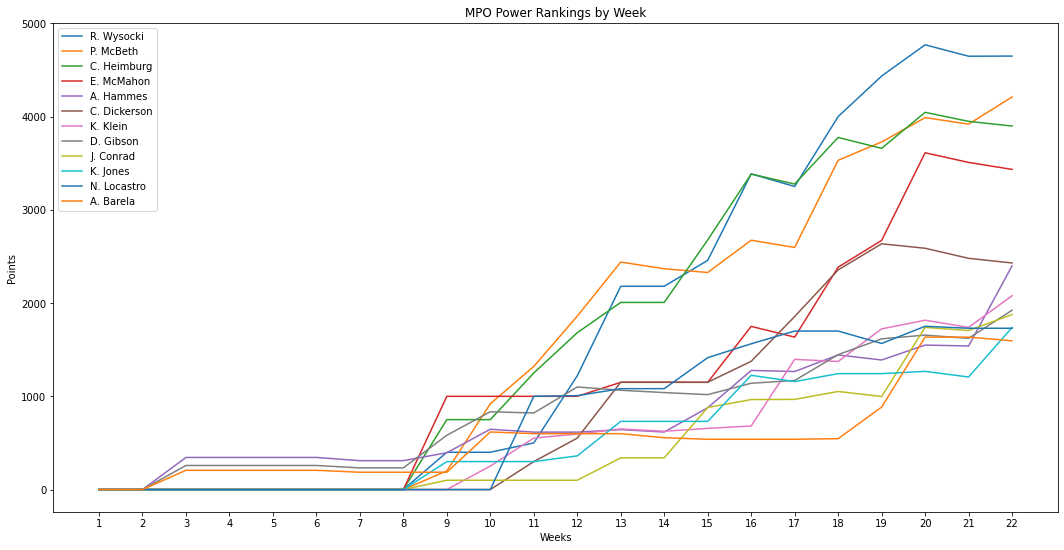

In [126]:
#plotting weekly changes in MPO PR

weeks = [i for i in range(1, this_week + 1)]
MPO_top_twelve = power_rankings_df[power_rankings_df.division == 'MPO'].sort_values(by = 'total_points', ascending = False).head(12)
for index, row in MPO_top_twelve.iterrows():
    MPO_week_updated = []
    for week in weeks:
        scores = []
        for tn in tourneys_list:
        
            place = power_rankings_df[f'{tn}_place'][index]
            if int(place) > 30 or int(place) == 0:
                place_points = 0
            else:
                place_points = place_points_dict[int(place)]
        

#create and fill time penalty columns (4 weeks per penalty)
        
            df1 = Tournaments_Loaded_df[Tournaments_Loaded_df['Nickname'] == tn]
            age_penalty_zone = (week - int(df1.iloc[0,1]))//4
            if age_penalty_zone < 0:
                age_penalty = 0
            else:
                age_penalty = .9**age_penalty_zone

#create and fill tier penalty columns    

            tier_penalty = tier_penalty_dict[df1.iloc[0,2]]
    
#create strength penalty columns

            MPO_strength = 0
            for p in top_money_MPO_list:
                if p in participants_list_dict[tn]:
                    MPO_strength +=1
            if MPO_strength >= 15:
                strength_penalty = 1
                          
            elif MPO_strength >=10:
                strength_penalty = .9
                          
            else: strength_penalty = (.9)**(11 - MPO_strength)
        
    
#compile the final scores
    
            pp = place_points*age_penalty*tier_penalty*strength_penalty
            scores.append(pp)
            while len(scores) > 10:
                scores.remove(min(scores))
            total = sum(scores)
        MPO_week_updated.append(total)
    plt.rcParams["figure.figsize"] = [18,9]
    plt.plot(weeks, MPO_week_updated, label = MPO_top_twelve['name'][index])
    plt.xlabel("Weeks")
    plt.ylabel("Points")
    plt.title("MPO Power Rankings by Week")
    plt.xticks(np.arange(1, this_week+1, 1))
    #plt.savefig('MPO_plot_0602.png', bbox_inches='tight')
    plt.legend()
    


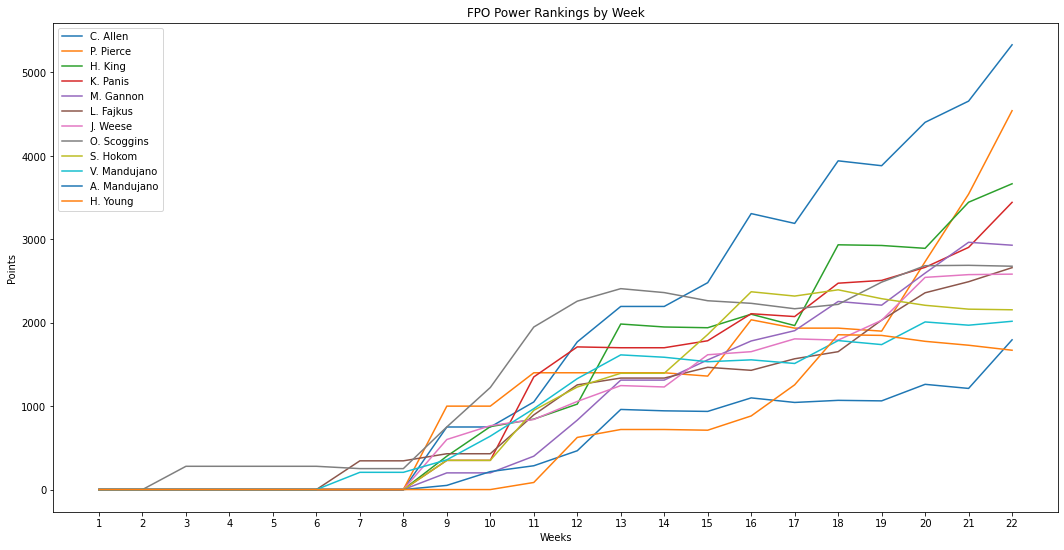

In [127]:
#plotting weekly changes in FPO PR

weeks = [i for i in range(1, this_week + 1 )]
FPO_top_twelve = power_rankings_df[power_rankings_df.division == 'FPO'].sort_values(by = 'total_points', ascending = False).head(12)
for index, row in FPO_top_twelve.iterrows():
    FPO_week_updated = []
    for week in weeks:
        scores = []
        for tn in tourneys_list:
        
            place = power_rankings_df[f'{tn}_place'][index]
            if int(place) > 30 or int(place) == 0:
                place_points = 0
            else:
                place_points = place_points_dict[int(place)]
        

#create and fill time penalty columns (4 weeks per penalty)
        
            df1 = Tournaments_Loaded_df[Tournaments_Loaded_df['Nickname'] == tn]
            age_penalty_zone = (week - int(df1.iloc[0,1]))//4
            if age_penalty_zone < 0:
                age_penalty = 0
            else:
                age_penalty = .9**age_penalty_zone

#create and fill tier penalty columns    

            tier_penalty = tier_penalty_dict[df1.iloc[0,2]]
    
#create strength penalty columns

            FPO_strength = 0
            for p in top_money_FPO_list:
                if p in participants_list_dict[tn]:
                    FPO_strength +=1
            if FPO_strength >= 15:
                strength_penalty = 1
                          
            elif FPO_strength >=10:
                strength_penalty = .9
                          
            else: strength_penalty = (.9)**(11 - FPO_strength)
        
    
#compile the final scores
    
            pp = place_points*age_penalty*tier_penalty*strength_penalty
            scores.append(pp)
            while len(scores) > 10:
                scores.remove(min(scores))
            total = sum(scores)
        FPO_week_updated.append(total)
    plt.rcParams["figure.figsize"] = [18,9]
    plt.plot(weeks, FPO_week_updated, label = FPO_top_twelve['name'][index])
    plt.xlabel("Weeks")
    plt.ylabel("Points")
    plt.title("FPO Power Rankings by Week")
    plt.xticks(np.arange(1, this_week+1, 1))
    plt.legend()
    #plt.savefig('FPO_plot_0602.png', bbox_inches='tight')
    


---
# Work Area

Useful dataframes and lists

In [111]:
#current useful persistant DATAFRAMES

#players_events_df (everything)

#player_prize_df

#Tournaments_Loaded-_

cash_by_state_df = sqlit("SELECT state_province, SUM(total_cash) as total_cash, COUNT(*) as total_players FROM players_events_df GROUP BY state_province ORDER BY 2 DESC")

#nickname_df

#Average_std_away rankings (4 events played)(FPO) = sqlit("SELECT name, events_played, avg_std_away FROM players_events_df WHERE division = 'FPO' AND avg_std_away IS NOT NULL AND events_played >=4  ORDER BY avg_std_away ASC")

#Are there null names? players_events_df[players_events_df['name'].isnull()]

#players with odd divisions? sqlit("SELECT * FROM players_events_df WHERE division != 'MPO' AND division != 'FPO'")


#useful LISTS

#top_money_MPO_list, top_money_FPO_list: top 20

#nickname_participants_list: ids of participants

In [112]:


#stats to do: threats, you're my sunshine, kryptonite, vampire, states money, Red/Blue states, power rankings, second half year improvement, PDGA age




In [113]:
# #best friends...


# top_money_MPO_df = sqlit("SELECT id, name, total_cash from players_events_df WHERE division = 'MPO' ORDER BY total_cash DESC LIMIT 20") 
# top_money_FPO_df = sqlit("SELECT id, name, total_cash from players_events_df WHERE division = 'FPO' ORDER BY total_cash DESC LIMIT 20") 
# top_money_MPO_list = top_money_MPO_df['id'].tolist()
# top_money_FPO_list = top_money_FPO_df['id'].tolist()

# players_join_MPO_df = pd.DataFrame()
# players_join_FPO_df = pd.DataFrame()
# players_join_MPO_df['name'] = top_money_MPO_df['name']
# players_join_FPO_df['name'] = top_money_FPO_df['name']
# players_join_MPO_df['id'] = top_money_MPO_df['id']
# players_join_FPO_df['id'] = top_money_FPO_df['id']
# for player in top_money_MPO_list:
#     best_friend = None
#     avg_place_tog = 0
#     avg_place_ap = 0
#     best_position_difference = 0
#     events_together = 0
#     events_apart = 0
#     for player2 in players_events_df['id'].tolist():
#         place_total_tog = 0
#         place_total_ap = 0
#         events_tog = 0
#         events_ap = 0
#         for tn in tourneys_list:
#             if player in participants_list_dict[f'{tn}']:
#                 player_row = players_events_df[players_events_df.id == player]
#                 if player_row[f'{tn}_DNF'].item() == 'yes':
#                     continue
#                 if player2 in participants_list_dict[f'{tn}']:
#                     place_total_tog += int(player_row[f'{tn}_place'].item())
#                     events_tog += 1
#                 else:
#                     place_total_ap += int(player_row[f'{tn}_place'].item())
#                     events_ap += 1
#         if events_ap > 2 and events_tog > 2 and ((place_total_ap/events_ap) - (place_total_tog/events_tog)) > best_position_difference:
#             best_friend = player2
#             avg_place_tog = place_total_tog/events_tog
#             avg_place_ap = place_total_ap/events_ap
#             best_position_difference = ((place_total_ap/events_ap) - (place_total_tog/events_tog))
#             events_together = events_tog
#             events_apart = events_ap
            
                
#     if best_friend != None:
#         players_join_MPO_df.loc[players_join_MPO_df.id == player, 'best_friend_name'] = players_events_df[players_events_df.id == best_friend]['name'].iloc[0]
#         players_join_MPO_df.loc[players_join_MPO_df.id == player, 'best_friend_id'] = best_friend
#         players_join_MPO_df.loc[players_join_MPO_df.id == player, 'avg_place_tog'] = avg_place_tog
#         players_join_MPO_df.loc[players_join_MPO_df.id == player, 'avg_place_ap'] = avg_place_ap
#         players_join_MPO_df.loc[players_join_MPO_df.id == player, 'best_friend_help'] = best_position_difference
#         players_join_MPO_df.loc[players_join_MPO_df.id == player, 'events_together'] = events_together
#         players_join_MPO_df.loc[players_join_MPO_df.id == player, 'events_apart'] = events_apart
        
        
#     else:
#         players_join_MPO_df.loc[players_join_MPO_df.id == player, 'best_friend_name'] = "Noone"
#         players_join_MPO_df.loc[players_join_MPO_df.id == player, 'best_friend_id'] = '00000'
        
    
    
# players_join_MPO_df 

        
        
        
      
        
        

In [114]:
# for player in top_money_FPO_list:
#     best_friend = None
#     avg_place_tog = 0
#     avg_place_ap = 0
#     best_position_difference = 0
#     events_together = 0
#     events_apart = 0
#     for player2 in players_events_df['id'].tolist():
#         place_total_tog = 0
#         place_total_ap = 0
#         events_tog = 0
#         events_ap = 0
#         for tn in tourneys_list:
#             if player in participants_list_dict[f'{tn}']:
#                 player_row = players_events_df[players_events_df.id == player]
#                 if player_row[f'{tn}_DNF'].item() == 'yes':
#                     continue
#                 if player2 in participants_list_dict[f'{tn}']:
#                     place_total_tog += int(player_row[f'{tn}_place'].item())
#                     events_tog += 1
#                 else:
#                     place_total_ap += int(player_row[f'{tn}_place'].item())
#                     events_ap += 1
#         if events_ap > 2 and events_tog > 2 and ((place_total_ap/events_ap) - (place_total_tog/events_tog)) > best_position_difference:
#             best_friend = player2
#             avg_place_tog = place_total_tog/events_tog
#             avg_place_ap = place_total_ap/events_ap
#             best_position_difference = ((place_total_ap/events_ap) - (place_total_tog/events_tog))
#             events_together = events_tog
#             events_apart = events_ap
            
                
#     if best_friend != None:
#         players_join_FPO_df.loc[players_join_FPO_df.id == player, 'best_friend_name'] = players_events_df[players_events_df.id == best_friend]['name'].iloc[0]
#         players_join_FPO_df.loc[players_join_FPO_df.id == player, 'best_friend_id'] = best_friend
#         players_join_FPO_df.loc[players_join_FPO_df.id == player, 'avg_place_tog'] = avg_place_tog
#         players_join_FPO_df.loc[players_join_FPO_df.id == player, 'avg_place_ap'] = avg_place_ap
#         players_join_FPO_df.loc[players_join_FPO_df.id == player, 'best_friend_help'] = best_position_difference
#         players_join_FPO_df.loc[players_join_FPO_df.id == player, 'events_together'] = events_together
#         players_join_FPO_df.loc[players_join_FPO_df.id == player, 'events_apart'] = events_apart
        
        
#     else:
#         players_join_FPO_df.loc[players_join_FPO_df.id == player, 'best_friend_name'] = "Noone"
#         players_join_FPO_df.loc[players_join_FPO_df.id == player, 'best_friend_id'] = '00000'
        
    
    
# players_join_FPO_df 


In [133]:
# #KEYED to Paige rankings


# #powerrating
# #  1) Tournament place weighted (top 20): 100, 75, 60, 50, 40, 35, 30, 25, 20, 15, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1
# #  2) Decreased by tier
# #  3) Decreased by how many weeks ago
# #  4) Decreased by weak field

# place_points_dict = {0 : 1 , 1 : 1000, 2 : 750, 3 : 600, 4 : 500, 5 : 400, 6 : 350, 7 : 300, 8 : 250, 9 : 200, 10 : 150, 11 : 100, 12 : 95, 13 : 90, 14 : 85, 15 : 80, 16 : 75, 17 : 70, 18 : 65, 19 : 60, 20 : 55, 21 : 50, 22 : 45, 23 : 40, 24 : 35, 25 : 30, 26 : 25, 27 : 20, 28 : 15, 29 : 10, 30 : 5 }
# tier_penalty_dict = {'Major' : 1, 'NT' : 1, 'A' : 0.8, 'A/B' : 0.8}


# #build the df


# power_rankings_df = sqlit(

# '''
# SELECT name 
#         ,id
#         ,division
#         ,sponsor_2021
# FROM players_events_df
# '''

# )

# for tn in tourneys_list:
#     power_rankings_df[f'{tn}_place'] = players_events_df[f'{tn}_place']


# #Find today's week for later use...

# my_date = datetime.date.today()
# year, this_week, day_of_week = my_date.isocalendar()

# #create lists of top money earners

# top_money_MPO_df = sqlit("SELECT id, total_cash from players_events_df WHERE division = 'MPO' ORDER BY total_cash DESC LIMIT 20") 
# top_money_FPO_df = sqlit("SELECT id, total_cash from players_events_df WHERE division = 'FPO' ORDER BY total_cash DESC LIMIT 20") 
# top_money_MPO_list = top_money_MPO_df['id'].tolist()
# top_money_FPO_list = top_money_FPO_df['id'].tolist()

# #Create place_points based on place for each tournament and add to df


# for tn in tourneys_list:
    
#     place_points_list = []
#     for ind in power_rankings_df.index:
        
        
#         place = power_rankings_df[f'{tn}_place'][ind]
#         if int(place) > 30 or int(place) == 0:
#             place_points = 0
#         else:
#             place_points = place_points_dict[int(place)]
        
#         place_points_list.append(place_points)
    
#     power_rankings_df[f'{tn}_place_points'] = place_points_list
    
# #create and fill time penalty columns (4 weeks per penalty)

    
#     df1 = Tournaments_Loaded_df[Tournaments_Loaded_df['Nickname'] == tn]
#     age_penalty_zone = this_week - int(df1.iloc[0,1])
#     power_rankings_df[f'{tn}_age_penalty'] =.96**age_penalty_zone

# #create and fill tier penalty columns    

#     tier_penalty_zone = tier_penalty_dict[df1.iloc[0,2]]
#     power_rankings_df[f'{tn}_tier_penalty'] = tier_penalty_zone
    
# #create strength penalty columns

#     MPO_strength = 0
#     for p in top_money_MPO_list:
#         if p in participants_list_dict[tn]:
#             MPO_strength +=1
#     if MPO_strength >= 15:
#         power_rankings_df[f'{tn}_MPO_strength_penalty'] = 1
                          
#     elif MPO_strength >=10:
#         power_rankings_df[f'{tn}_MPO_strength_penalty'] = .9
                          
#     else: power_rankings_df[f'{tn}_MPO_strength_penalty'] = (.9)**(11 - MPO_strength)
        
#     FPO_strength = 0
#     for p in top_money_FPO_list:
#         if p in participants_list_dict[tn]:
#             FPO_strength +=1
#     if FPO_strength >= 15:
#         power_rankings_df[f'{tn}_FPO_strength_penalty'] = 1
                          
#     elif FPO_strength >=10:
#         power_rankings_df[f'{tn}_FPO_strength_penalty'] = .9
                          
#     else: power_rankings_df[f'{tn}_FPO_strength_penalty'] = (.9)**(11 - FPO_strength)

# #compile the final scores
    
# power_ranking_list = []
# for ind in power_rankings_df.index:
#     scores = []
#     for tn in tourneys_list:
#         if power_rankings_df.division[ind] == 'MPO':
#             power_points = power_rankings_df[f'{tn}_place_points'][ind]*power_rankings_df[f'{tn}_tier_penalty'][ind]*power_rankings_df[f'{tn}_age_penalty'][ind]*power_rankings_df[f'{tn}_MPO_strength_penalty'][ind]
#         else:
#             power_points = power_rankings_df[f'{tn}_place_points'][ind]*power_rankings_df[f'{tn}_tier_penalty'][ind]*power_rankings_df[f'{tn}_age_penalty'][ind]*power_rankings_df[f'{tn}_FPO_strength_penalty'][ind]
#         scores.append(power_points)
#         while len(scores) > 7:
#             scores.remove(min(scores))    
#         pp = sum(scores)                
#     power_ranking_list.append(pp)
# power_rankings_df['total_points_paige'] = power_ranking_list

In [134]:
# #export power keyed to paige
# x = sqlit("SELECT name, total_points_paige as points FROM power_rankings_df WHERE division = 'FPO' ORDER BY total_points_paige DESC LIMIT 20")
# dfi.export(x, 'FPO_limit_7_0602.PNG')

In [117]:
sqlit("SELECT name, events_played, avg_std_away FROM players_events_df WHERE division = 'FPO' AND avg_std_away IS NOT NULL AND events_played >=4  ORDER BY avg_std_away ASC")

,name,events_played,avg_std_away
0,P. Pierce,7,0.907782
1,C. Allen,10,1.061845
2,S. Hokom,7,1.485960
3,M. Bailey,4,1.607012
4,O. Scoggins,11,1.619846
5,H. King,9,1.644447
6,M. Tomaino,5,1.761021
7,H. Young,6,1.880052
8,M. Gannon,11,1.947170
9,V. Mandujano,10,2.040719


In [ ]:
player_prize_df.sort_values(by = 'total_cash', ascending = False).head(50).groupby('sponsor_2021')['id'].count()

In [149]:
cash = player_prize_df.sort_values(by = 'total_cash', ascending = False)[['name', 'division', 'sponsor_2021', 'events_played', 'total_cash', 'avg_prize']].set_index('name').head(50)
dfi.export(cash, 'cash_0604.png')


In [141]:
player_prize_df

,name,id,division,total_cash,sponsor_2021,events_played,LVC_prize,Waco_prize,Texas_prize,JB_prize,SP_prize,SK_prize,Vintage_prize,MAO_prize,VO_prize,Memorial_prize,Paradise_prize,TVC_prize,SSM_prize,Belton_prize,Dogwood_prize,BGO_prize,DDO_prize,COM_prize,LPO_prize,Three_prize,GHP_prize,Dust_prize,Rumble_prize,HUK_prize,PH_prize,Kitsap_prize,OTB_prize,Mich_prize,USW_prize,Norm_prize,SCM_prize,FSO_prize,Tam_prize,avg_prize
0,C. Allen,44184,FPO,16139,Prodigy,10,2500,625,1000,3000,0,0,600,0,0,0,0,0,0,1100,0,0,1900,0,0,0,0,0,0,0,0,0,2000,0,1414,0,2000,0,0,1613.900000
1,M. Gannon,85942,FPO,9050,Discraft,11,750,525,1000,700,0,0,450,700,0,0,0,0,0,600,0,0,775,0,0,0,0,0,0,0,0,0,1150,0,1750,0,650,0,0,822.727273
2,S. Hokom,34563,FPO,5781,MVP,7,975,1000,450,1400,0,621,1025,0,0,0,0,0,0,0,0,0,310,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,825.857143
3,H. King,81351,FPO,13455,Discraft,9,1250,375,3000,525,0,0,0,0,0,1300,0,0,0,255,0,0,3000,0,0,0,0,0,0,0,0,0,0,0,2750,0,1000,0,0,1495.000000
4,V. Mandujano,62879,FPO,6079,Innova,10,650,700,700,0,0,0,0,0,237,1000,0,0,0,425,0,0,680,0,0,0,0,0,0,0,0,0,0,0,0,1037,650,0,0,607.900000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1857,H. Länsivaara,98736,MPO,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
1858,N. Siikala,117855,FPO,0,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000
1859,T. Korve,115093,FPO,0,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000
1860,J. Wihlman,122570,FPO,0,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000
